In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
# WORKING WITH PERFECTLY LINEAR DATASET

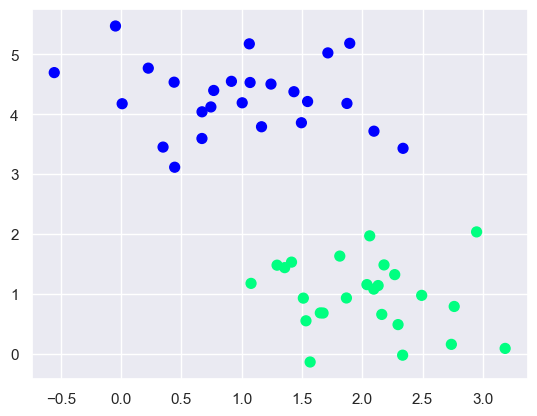

SVC(C=1, kernel='linear')

In [10]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generate example data
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)  # 50 data points

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='winter')
plt.show()

# Create and fit SVC model
model = SVC(kernel='linear', C=1)
model.fit(X, Y)


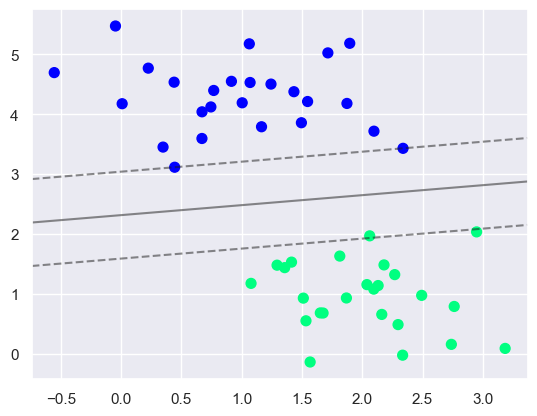

In [18]:
# margin code and support vectors

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T  # Reshape the grid properly
    p = model.decision_function(xy).reshape(X.shape)

    # PLOT DECISION BOUNDARY AND MARGINS
    ax.contour(X, Y, p, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # PLOT SUPPORT VECTORS
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)


In [ ]:
# it is case sensitive to only support vectors agr hmne point bdha bi diye
# to ye support vectors ke point pe hi depend krega.

In [19]:
# THE IMPORTANCE OF SUPPORT VECTORS

In [ ]:
# hmne nich point bdha hai and km kiya hai 60, 20.
# here see that it is case sensitive to support vectors only.

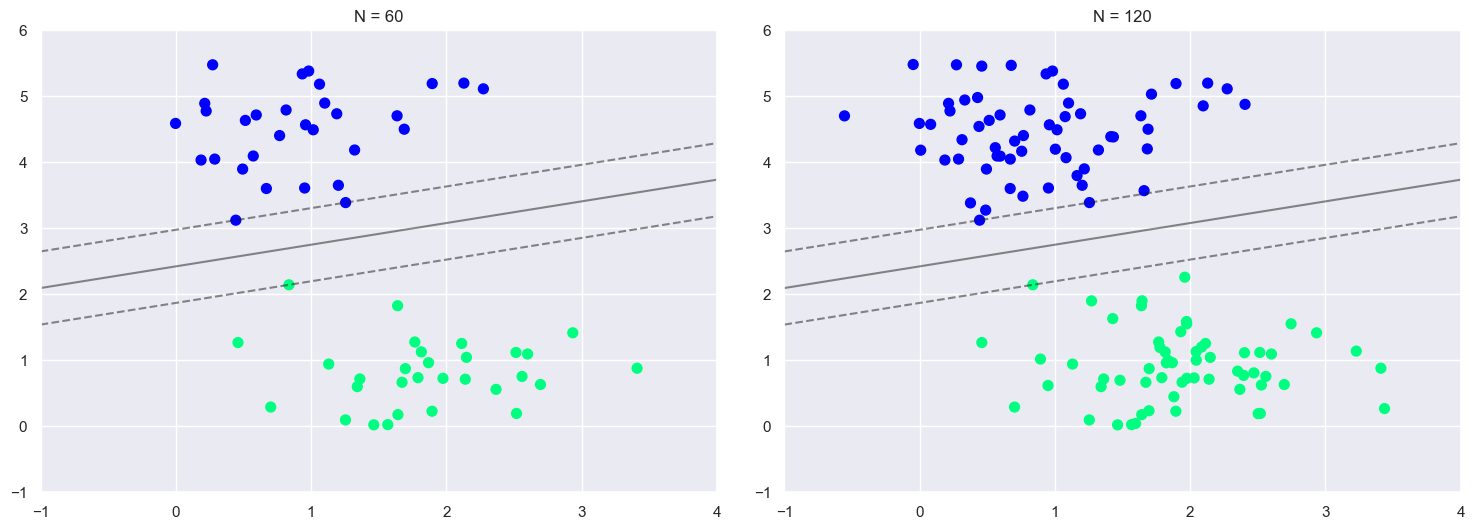

In [27]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)  # Corrected typos: 'kernel' instead of 'kernal', and missing parentheses

    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)  # Corrected typo: 'set_ylin' to 'set_ylim'
    plot_svc_decision_function(model, ax)  # Corrected function name: 'plot_svc_decision_funtion' to 'plot_svc_decision_function'

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [20]:
# WORKING WITH ALMOST LINEARLY SEPARABLE DATASET

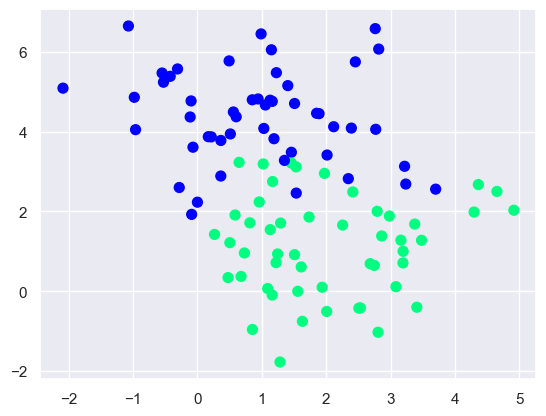

In [25]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

In [1]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).SUM(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3d(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(X, y)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv("C:\\Users\\Rahul\\Downloads\\archive(1)\\User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [80]:
df.shape

(400, 5)

In [81]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [82]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [84]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [85]:
df.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [86]:
df.corr

<bound method DataFrame.corr of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [87]:
df[df.isnull().any(axis=1)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [88]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [89]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [90]:
import pandas as pd
df.drop(['Gender'], axis=1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [91]:
df.corr

<bound method DataFrame.corr of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

<Axes: ylabel='Count'>

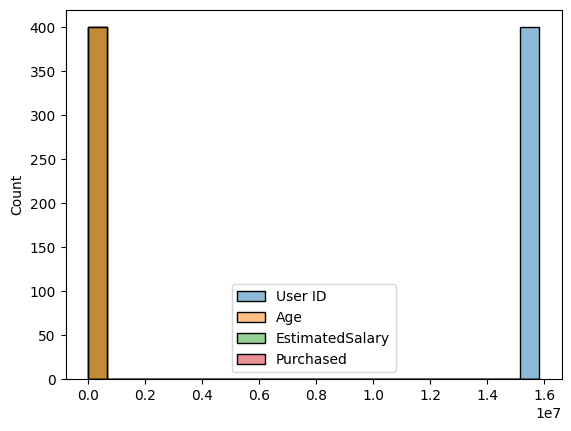

In [100]:
sns.histplot(df)

In [101]:
plt.figure(figsize=(10, 10))  
corr = df.corr(df)
sns.heatmap(df)


ValueError: could not convert string to float: 'Male'

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Before Removing Outliers')

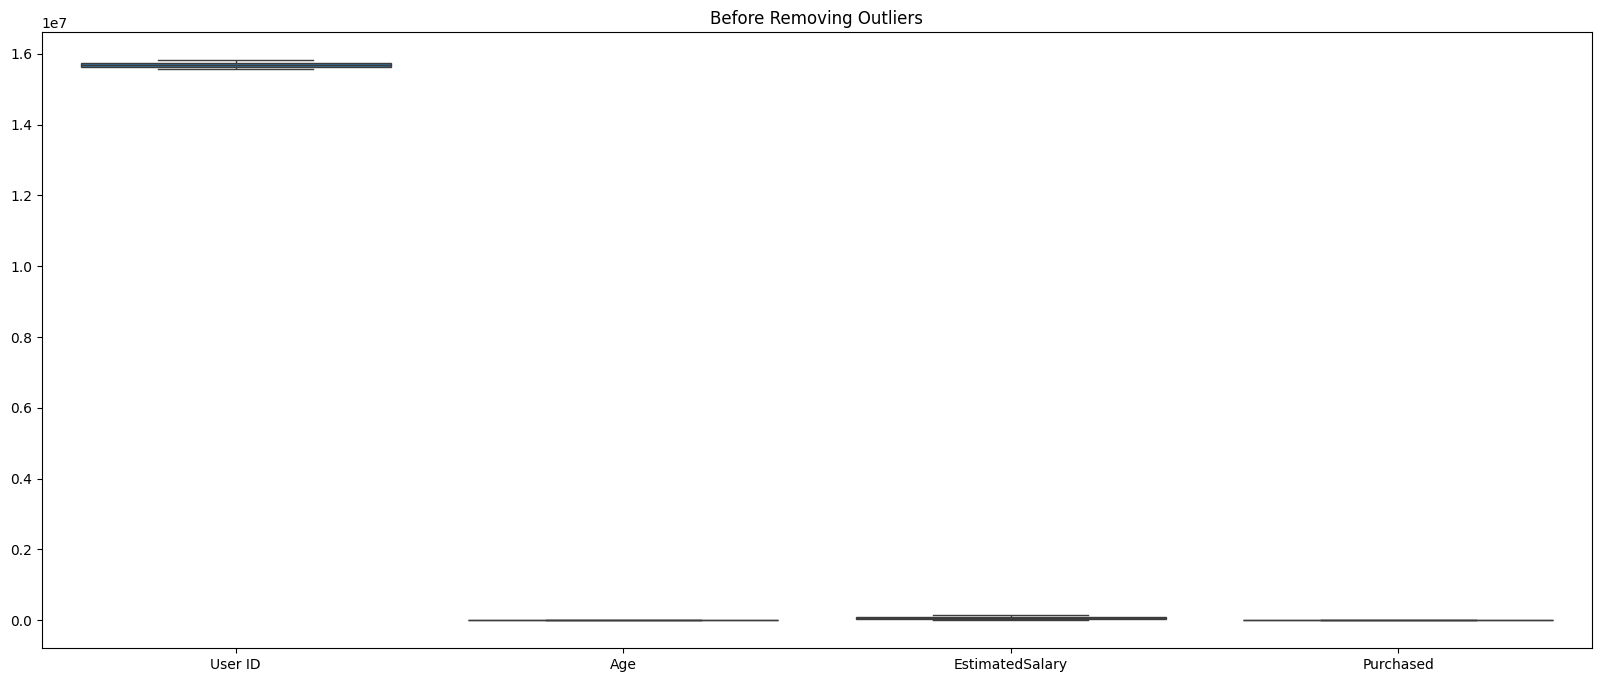

In [98]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

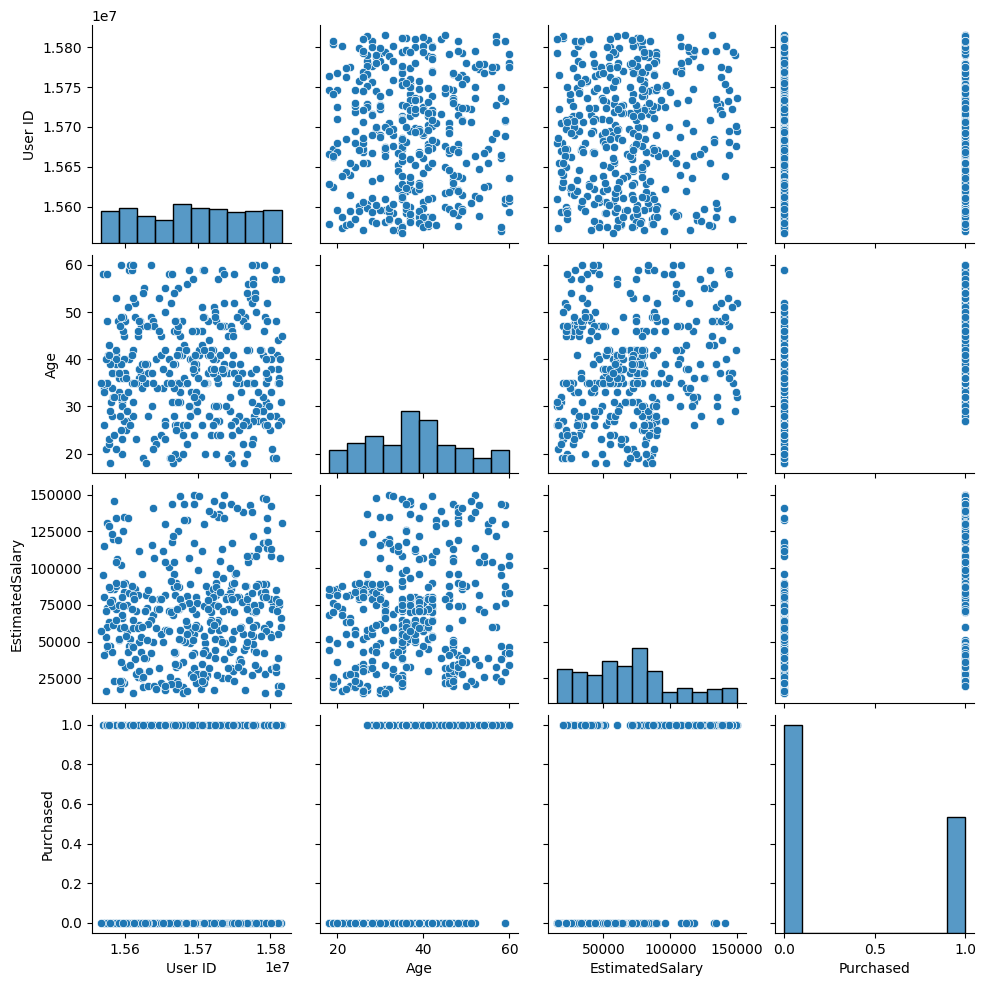

In [97]:
sns.pairplot(df)

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

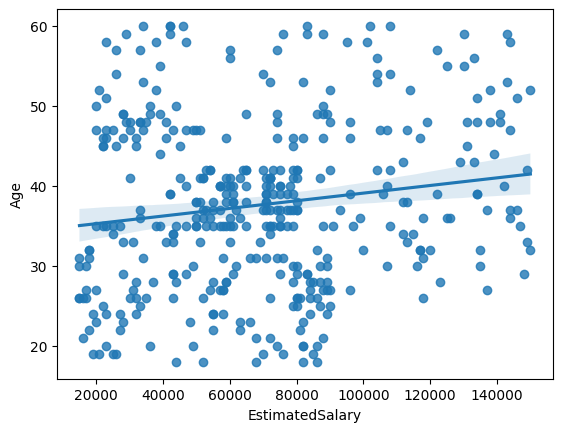

In [104]:
sns.regplot(data = df,x = "EstimatedSalary", y='Age')

In [117]:
#Data Pre-processing Step
# importing libraries

import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
#importing datasets

data_set= pd.read_csv('C:\\Users\\Rahul\\Downloads\\archive(1)\\User_Data.csv')
#Extracting Independent and dependent Variable
x= data_set.iloc[:, [2,3]].values
y= data_set.iloc[:, 4].values
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

x_train


array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [118]:
x_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [112]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [116]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [115]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [1]:
/*
  Name: MySQL Sample Database classicmodels
  Link: http://www.mysqltutorial.org/mysql-sample-database.aspx
*/


/* Create the database */
CREATE DATABASE  IF NOT EXISTS classicmodels;

/* Switch to the classicmodels database */
USE classicmodels;

/* Drop existing tables  */
DROP TABLE IF EXISTS productlines;
DROP TABLE IF EXISTS products;
DROP TABLE IF EXISTS offices;
DROP TABLE IF EXISTS employees;
DROP TABLE IF EXISTS customers; 
DROP TABLE IF EXISTS payments;
DROP TABLE IF EXISTS orders;
DROP TABLE IF EXISTS orderdetails;

/* Create the tables */
CREATE TABLE productlines (
  productLine varchar(50),
  textDescription varchar(4000) DEFAULT NULL,
  htmlDescription mediumtext,
  image mediumblob,
  PRIMARY KEY (productLine)
);

CREATE TABLE products (
  productCode varchar(15),
  productName varchar(70) NOT NULL,
  productLine varchar(50) NOT NULL,
  productScale varchar(10) NOT NULL,
  productVendor varchar(50) NOT NULL,
  productDescription text NOT NULL,
  quantityInStock smallint(6) NOT NULL,
  buyPrice decimal(10,2) NOT NULL,
  MSRP decimal(10,2) NOT NULL,
  PRIMARY KEY (productCode),
  FOREIGN KEY (productLine) REFERENCES productlines (productLine)
);

CREATE TABLE offices (
  officeCode varchar(10),
  city varchar(50) NOT NULL,
  phone varchar(50) NOT NULL,
  addressLine1 varchar(50) NOT NULL,
  addressLine2 varchar(50) DEFAULT NULL,
  state varchar(50) DEFAULT NULL,
  country varchar(50) NOT NULL,
  postalCode varchar(15) NOT NULL,
  territory varchar(10) NOT NULL,
  PRIMARY KEY (officeCode)
);

CREATE TABLE employees (
  employeeNumber int,
  lastName varchar(50) NOT NULL,
  firstName varchar(50) NOT NULL,
  extension varchar(10) NOT NULL,
  email varchar(100) NOT NULL,
  officeCode varchar(10) NOT NULL,
  reportsTo int DEFAULT NULL,
  jobTitle varchar(50) NOT NULL,
  PRIMARY KEY (employeeNumber),
  FOREIGN KEY (reportsTo) REFERENCES employees (employeeNumber),
  FOREIGN KEY (officeCode) REFERENCES offices (officeCode)
);

CREATE TABLE customers (
  customerNumber int,
  customerName varchar(50) NOT NULL,
  contactLastName varchar(50) NOT NULL,
  contactFirstName varchar(50) NOT NULL,
  phone varchar(50) NOT NULL,
  addressLine1 varchar(50) NOT NULL,
  addressLine2 varchar(50) DEFAULT NULL,
  city varchar(50) NOT NULL,
  state varchar(50) DEFAULT NULL,
  postalCode varchar(15) DEFAULT NULL,
  country varchar(50) NOT NULL,
  salesRepEmployeeNumber int DEFAULT NULL,
  creditLimit decimal(10,2) DEFAULT NULL,
  PRIMARY KEY (customerNumber),
  FOREIGN KEY (salesRepEmployeeNumber) REFERENCES employees (employeeNumber)
);

CREATE TABLE payments (
  customerNumber int,
  checkNumber varchar(50) NOT NULL,
  paymentDate date NOT NULL,
  amount decimal(10,2) NOT NULL,
  PRIMARY KEY (customerNumber,checkNumber),
  FOREIGN KEY (customerNumber) REFERENCES customers (customerNumber)
);

CREATE TABLE orders (
  orderNumber int,
  orderDate date NOT NULL,
  requiredDate date NOT NULL,
  shippedDate date DEFAULT NULL,
  status varchar(15) NOT NULL,
  comments text,
  customerNumber int NOT NULL,
  PRIMARY KEY (orderNumber),
  FOREIGN KEY (customerNumber) REFERENCES customers (customerNumber)
);

CREATE TABLE orderdetails (
  orderNumber int,
  productCode varchar(15) NOT NULL,
  quantityOrdered int NOT NULL,
  priceEach decimal(10,2) NOT NULL,
  orderLineNumber smallint(6) NOT NULL,
  PRIMARY KEY (orderNumber,productCode),
  FOREIGN KEY (orderNumber) REFERENCES orders (orderNumber),
  FOREIGN KEY (productCode) REFERENCES products (productCode)
);


/* Inserting data  */
insert  into productlines(productLine,textDescription,htmlDescription,image) values 
('Classic Cars','Attention car enthusiasts: Make your wildest car ownership dreams come true. Whether you are looking for classic muscle cars, dream sports cars or movie-inspired miniatures, you will find great choices in this category. These replicas feature superb attention to detail and craftsmanship and offer features such as working steering system, opening forward compartment, opening rear trunk with removable spare wheel, 4-wheel independent spring suspension, and so on. The models range in size from 1:10 to 1:24 scale and include numerous limited edition and several out-of-production vehicles. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.',NULL,NULL),('Motorcycles','Our motorcycles are state of the art replicas of classic as well as contemporary motorcycle legends such as Harley Davidson, Ducati and Vespa. Models contain stunning details such as official logos, rotating wheels, working kickstand, front suspension, gear-shift lever, footbrake lever, and drive chain. Materials used include diecast and plastic. The models range in size from 1:10 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. All models come fully assembled and ready for display in the home or office. Most include a certificate of authenticity.',NULL,NULL),('Planes','Unique, diecast airplane and helicopter replicas suitable for collections, as well as home, office or classroom decorations. Models contain stunning details such as official logos and insignias, rotating jet engines and propellers, retractable wheels, and so on. Most come fully assembled and with a certificate of authenticity from their manufacturers.',NULL,NULL),('Ships','The perfect holiday or anniversary gift for executives, clients, friends, and family. These handcrafted model ships are unique, stunning works of art that will be treasured for generations! They come fully assembled and ready for display in the home or office. We guarantee the highest quality, and best value.',NULL,NULL),('Trains','Model trains are a rewarding hobby for enthusiasts of all ages. Whether you\'re looking for collectible wooden trains, electric streetcars or locomotives, you\'ll find a number of great choices for any budget within this category. The interactive aspect of trains makes toy trains perfect for young children. The wooden train sets are ideal for children under the age of 5.',NULL,NULL),('Trucks and Buses','The Truck and Bus models are realistic replicas of buses and specialized trucks produced from the early 1920s to present. The models range in size from 1:12 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. Materials used include tin, diecast and plastic. All models include a certificate of authenticity from their manufacturers and are a perfect ornament for the home and office.',NULL,NULL),('Vintage Cars','Our Vintage Car models realistically portray automobiles produced from the early 1900s through the 1940s. Materials used include Bakelite, diecast, plastic and wood. Most of the replicas are in the 1:18 and 1:24 scale sizes, which provide the optimum in detail and accuracy. Prices range from $30.00 up to $180.00 for some special limited edition replicas. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.',NULL,NULL);

insert  into products(productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP) values 
('S10_1678','1969 Harley Davidson Ultimate Chopper','Motorcycles','1:10','Min Lin Diecast','This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.',7933,'48.81','95.70'),('S10_1949','1952 Alpine Renault 1300','Classic Cars','1:10','Classic Metal Creations','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',7305,'98.58','214.30'),('S10_2016','1996 Moto Guzzi 1100i','Motorcycles','1:10','Highway 66 Mini Classics','Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.',6625,'68.99','118.94'),('S10_4698','2003 Harley-Davidson Eagle Drag Bike','Motorcycles','1:10','Red Start Diecast','Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine',5582,'91.02','193.66'),('S10_4757','1972 Alfa Romeo GTA','Classic Cars','1:10','Motor City Art Classics','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',3252,'85.68','136.00'),('S10_4962','1962 LanciaA Delta 16V','Classic Cars','1:10','Second Gear Diecast','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',6791,'103.42','147.74'),('S12_1099','1968 Ford Mustang','Classic Cars','1:12','Autoart Studio Design','Hood, doors and trunk all open to reveal highly detailed interior features. Steering wheel actually turns the front wheels. Color dark green.',68,'95.34','194.57'),('S12_1108','2001 Ferrari Enzo','Classic Cars','1:12','Second Gear Diecast','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',3619,'95.59','207.80'),('S12_1666','1958 Setra Bus','Trucks and Buses','1:12','Welly Diecast Productions','Model features 30 windows, skylights & glare resistant glass, working steering system, original logos',1579,'77.90','136.67'),('S12_2823','2002 Suzuki XREO','Motorcycles','1:12','Unimax Art Galleries','Official logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.',9997,'66.27','150.62'),('S12_3148','1969 Corvair Monza','Classic Cars','1:18','Welly Diecast Productions','1:18 scale die-cast about 10\" long doors open, hood opens, trunk opens and wheels roll',6906,'89.14','151.08'),('S12_3380','1968 Dodge Charger','Classic Cars','1:12','Welly Diecast Productions','1:12 scale model of a 1968 Dodge Charger. Hood, doors and trunk all open to reveal highly detailed interior features. Steering wheel actually turns the front wheels. Color black',9123,'75.16','117.44'),('S12_3891','1969 Ford Falcon','Classic Cars','1:12','Second Gear Diecast','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',1049,'83.05','173.02'),('S12_3990','1970 Plymouth Hemi Cuda','Classic Cars','1:12','Studio M Art Models','Very detailed 1970 Plymouth Cuda model in 1:12 scale. The Cuda is generally accepted as one of the fastest original muscle cars from the 1970s. This model is a reproduction of one of the orginal 652 cars built in 1970. Red color.',5663,'31.92','79.80'),('S12_4473','1957 Chevy Pickup','Trucks and Buses','1:12','Exoto Designs','1:12 scale die-cast about 20\" long Hood opens, Rubber wheels',6125,'55.70','118.50'),('S12_4675','1969 Dodge Charger','Classic Cars','1:12','Welly Diecast Productions','Detailed model of the 1969 Dodge Charger. This model includes finely detailed interior and exterior features. Painted in red and white.',7323,'58.73','115.16'),('S18_1097','1940 Ford Pickup Truck','Trucks and Buses','1:18','Studio M Art Models','This model features soft rubber tires, working steering, rubber mud guards, authentic Ford logos, detailed undercarriage, opening doors and hood,  removable split rear gate, full size spare mounted in bed, detailed interior with opening glove box',2613,'58.33','116.67'),('S18_1129','1993 Mazda RX-7','Classic Cars','1:18','Highway 66 Mini Classics','This model features, opening hood, opening doors, detailed engine, rear spoiler, opening trunk, working steering, tinted windows, baked enamel finish. Color red.',3975,'83.51','141.54'),('S18_1342','1937 Lincoln Berline','Vintage Cars','1:18','Motor City Art Classics','Features opening engine cover, doors, trunk, and fuel filler cap. Color black',8693,'60.62','102.74'),('S18_1367','1936 Mercedes-Benz 500K Special Roadster','Vintage Cars','1:18','Studio M Art Models','This 1:18 scale replica is constructed of heavy die-cast metal and has all the features of the original: working doors and rumble seat, independent spring suspension, detailed interior, working steering system, and a bifold hood that reveals an engine so accurate that it even includes the wiring. All this is topped off with a baked enamel finish. Color white.',8635,'24.26','53.91'),('S18_1589','1965 Aston Martin DB5','Classic Cars','1:18','Classic Metal Creations','Die-cast model of the silver 1965 Aston Martin DB5 in silver. This model includes full wire wheels and doors that open with fully detailed passenger compartment. In 1:18 scale, this model measures approximately 10 inches/20 cm long.',9042,'65.96','124.44'),('S18_1662','1980s Black Hawk Helicopter','Planes','1:18','Red Start Diecast','1:18 scale replica of actual Army\'s UH-60L BLACK HAWK Helicopter. 100% hand-assembled. Features rotating rotor blades, propeller blades and rubber wheels.',5330,'77.27','157.69'),('S18_1749','1917 Grand Touring Sedan','Vintage Cars','1:18','Welly Diecast Productions','This 1:18 scale replica of the 1917 Grand Touring car has all the features you would expect from museum quality reproductions: all four doors and bi-fold hood opening, detailed engine and instrument panel, chrome-look trim, and tufted upholstery, all topped off with a factory baked-enamel finish.',2724,'86.70','170.00'),('S18_1889','1948 Porsche 356-A Roadster','Classic Cars','1:18','Gearbox Collectibles','This precision die-cast replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',8826,'53.90','77.00'),('S18_1984','1995 Honda Civic','Classic Cars','1:18','Min Lin Diecast','This model features, opening hood, opening doors, detailed engine, rear spoiler, opening trunk, working steering, tinted windows, baked enamel finish. Color yellow.',9772,'93.89','142.25'),('S18_2238','1998 Chrysler Plymouth Prowler','Classic Cars','1:18','Gearbox Collectibles','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',4724,'101.51','163.73'),('S18_2248','1911 Ford Town Car','Vintage Cars','1:18','Motor City Art Classics','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system.',540,'33.30','60.54'),('S18_2319','1964 Mercedes Tour Bus','Trucks and Buses','1:18','Unimax Art Galleries','Exact replica. 100+ parts. working steering system, original logos',8258,'74.86','122.73'),('S18_2325','1932 Model A Ford J-Coupe','Vintage Cars','1:18','Autoart Studio Design','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system, chrome-covered spare, opening doors, detailed and wired engine',9354,'58.48','127.13'),('S18_2432','1926 Ford Fire Engine','Trucks and Buses','1:18','Carousel DieCast Legends','Gleaming red handsome appearance. Everything is here the fire hoses, ladder, axes, bells, lanterns, ready to fight any inferno.',2018,'24.92','60.77'),('S18_2581','P-51-D Mustang','Planes','1:72','Gearbox Collectibles','Has retractable wheels and comes with a stand',992,'49.00','84.48'),('S18_2625','1936 Harley Davidson El Knucklehead','Motorcycles','1:18','Welly Diecast Productions','Intricately detailed with chrome accents and trim, official die-struck logos and baked enamel finish.',4357,'24.23','60.57'),('S18_2795','1928 Mercedes-Benz SSK','Vintage Cars','1:18','Gearbox Collectibles','This 1:18 replica features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system, chrome-covered spare, opening doors, detailed and wired engine. Color black.',548,'72.56','168.75'),('S18_2870','1999 Indy 500 Monte Carlo SS','Classic Cars','1:18','Red Start Diecast','Features include opening and closing doors. Color: Red',8164,'56.76','132.00'),('S18_2949','1913 Ford Model T Speedster','Vintage Cars','1:18','Carousel DieCast Legends','This 250 part reproduction includes moving handbrakes, clutch, throttle and foot pedals, squeezable horn, detailed wired engine, removable water, gas, and oil cans, pivoting monocle windshield, all topped with a baked enamel red finish. Each replica comes with an Owners Title and Certificate of Authenticity. Color red.',4189,'60.78','101.31'),('S18_2957','1934 Ford V8 Coupe','Vintage Cars','1:18','Min Lin Diecast','Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System',5649,'34.35','62.46'),('S18_3029','1999 Yamaha Speed Boat','Ships','1:18','Min Lin Diecast','Exact replica. Wood and Metal. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',4259,'51.61','86.02'),('S18_3136','18th Century Vintage Horse Carriage','Vintage Cars','1:18','Red Start Diecast','Hand crafted diecast-like metal horse carriage is re-created in about 1:18 scale of antique horse carriage. This antique style metal Stagecoach is all hand-assembled with many different parts.\r\n\r\nThis collectible metal horse carriage is painted in classic Red, and features turning steering wheel and is entirely hand-finished.',5992,'60.74','104.72'),('S18_3140','1903 Ford Model A','Vintage Cars','1:18','Unimax Art Galleries','Features opening trunk,  working steering system',3913,'68.30','136.59'),('S18_3232','1992 Ferrari 360 Spider red','Classic Cars','1:18','Unimax Art Galleries','his replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',8347,'77.90','169.34'),('S18_3233','1985 Toyota Supra','Classic Cars','1:18','Highway 66 Mini Classics','This model features soft rubber tires, working steering, rubber mud guards, authentic Ford logos, detailed undercarriage, opening doors and hood, removable split rear gate, full size spare mounted in bed, detailed interior with opening glove box',7733,'57.01','107.57'),('S18_3259','Collectable Wooden Train','Trains','1:18','Carousel DieCast Legends','Hand crafted wooden toy train set is in about 1:18 scale, 25 inches in total length including 2 additional carts, of actual vintage train. This antique style wooden toy train model set is all hand-assembled with 100% wood.',6450,'67.56','100.84'),('S18_3278','1969 Dodge Super Bee','Classic Cars','1:18','Min Lin Diecast','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',1917,'49.05','80.41'),('S18_3320','1917 Maxwell Touring Car','Vintage Cars','1:18','Exoto Designs','Features Gold Trim, Full Size Spare Tire, Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System',7913,'57.54','99.21'),('S18_3482','1976 Ford Gran Torino','Classic Cars','1:18','Gearbox Collectibles','Highly detailed 1976 Ford Gran Torino \"Starsky and Hutch\" diecast model. Very well constructed and painted in red and white patterns.',9127,'73.49','146.99'),('S18_3685','1948 Porsche Type 356 Roadster','Classic Cars','1:18','Gearbox Collectibles','This model features working front and rear suspension on accurately replicated and actuating shock absorbers as well as opening engine cover, rear stabilizer flap,  and 4 opening doors.',8990,'62.16','141.28'),('S18_3782','1957 Vespa GS150','Motorcycles','1:18','Studio M Art Models','Features rotating wheels , working kick stand. Comes with stand.',7689,'32.95','62.17'),('S18_3856','1941 Chevrolet Special Deluxe Cabriolet','Vintage Cars','1:18','Exoto Designs','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system, leather upholstery. Color black.',2378,'64.58','105.87'),('S18_4027','1970 Triumph Spitfire','Classic Cars','1:18','Min Lin Diecast','Features include opening and closing doors. Color: White.',5545,'91.92','143.62'),('S18_4409','1932 Alfa Romeo 8C2300 Spider Sport','Vintage Cars','1:18','Exoto Designs','This 1:18 scale precision die cast replica features the 6 front headlights of the original, plus a detailed version of the 142 horsepower straight 8 engine, dual spares and their famous comprehensive dashboard. Color black.',6553,'43.26','92.03'),('S18_4522','1904 Buick Runabout','Vintage Cars','1:18','Exoto Designs','Features opening trunk,  working steering system',8290,'52.66','87.77'),('S18_4600','1940s Ford truck','Trucks and Buses','1:18','Motor City Art Classics','This 1940s Ford Pick-Up truck is re-created in 1:18 scale of original 1940s Ford truck. This antique style metal 1940s Ford Flatbed truck is all hand-assembled. This collectible 1940\'s Pick-Up truck is painted in classic dark green color, and features rotating wheels.',3128,'84.76','121.08'),('S18_4668','1939 Cadillac Limousine','Vintage Cars','1:18','Studio M Art Models','Features completely detailed interior including Velvet flocked drapes,deluxe wood grain floor, and a wood grain casket with seperate chrome handles',6645,'23.14','50.31'),('S18_4721','1957 Corvette Convertible','Classic Cars','1:18','Classic Metal Creations','1957 die cast Corvette Convertible in Roman Red with white sides and whitewall tires. 1:18 scale quality die-cast with detailed engine and underbvody. Now you can own The Classic Corvette.',1249,'69.93','148.80'),('S18_4933','1957 Ford Thunderbird','Classic Cars','1:18','Studio M Art Models','This 1:18 scale precision die-cast replica, with its optional porthole hardtop and factory baked-enamel Thunderbird Bronze finish, is a 100% accurate rendition of this American classic.',3209,'34.21','71.27'),('S24_1046','1970 Chevy Chevelle SS 454','Classic Cars','1:24','Unimax Art Galleries','This model features rotating wheels, working streering system and opening doors. All parts are particularly delicate due to their precise scale and require special care and attention. It should not be picked up by the doors, roof, hood or trunk.',1005,'49.24','73.49'),('S24_1444','1970 Dodge Coronet','Classic Cars','1:24','Highway 66 Mini Classics','1:24 scale die-cast about 18\" long doors open, hood opens and rubber wheels',4074,'32.37','57.80'),('S24_1578','1997 BMW R 1100 S','Motorcycles','1:24','Autoart Studio Design','Detailed scale replica with working suspension and constructed from over 70 parts',7003,'60.86','112.70'),('S24_1628','1966 Shelby Cobra 427 S/C','Classic Cars','1:24','Carousel DieCast Legends','This diecast model of the 1966 Shelby Cobra 427 S/C includes many authentic details and operating parts. The 1:24 scale model of this iconic lighweight sports car from the 1960s comes in silver and it\'s own display case.',8197,'29.18','50.31'),('S24_1785','1928 British Royal Navy Airplane','Planes','1:24','Classic Metal Creations','Official logos and insignias',3627,'66.74','109.42'),('S24_1937','1939 Chevrolet Deluxe Coupe','Vintage Cars','1:24','Motor City Art Classics','This 1:24 scale die-cast replica of the 1939 Chevrolet Deluxe Coupe has the same classy look as the original. Features opening trunk, hood and doors and a showroom quality baked enamel finish.',7332,'22.57','33.19'),('S24_2000','1960 BSA Gold Star DBD34','Motorcycles','1:24','Highway 66 Mini Classics','Detailed scale replica with working suspension and constructed from over 70 parts',15,'37.32','76.17'),('S24_2011','18th century schooner','Ships','1:24','Carousel DieCast Legends','All wood with canvas sails. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with 4 masts, all square-rigged.',1898,'82.34','122.89'),('S24_2022','1938 Cadillac V-16 Presidential Limousine','Vintage Cars','1:24','Classic Metal Creations','This 1:24 scale precision die cast replica of the 1938 Cadillac V-16 Presidential Limousine has all the details of the original, from the flags on the front to an opening back seat compartment complete with telephone and rifle. Features factory baked-enamel black finish, hood goddess ornament, working jump seats.',2847,'20.61','44.80'),('S24_2300','1962 Volkswagen Microbus','Trucks and Buses','1:24','Autoart Studio Design','This 1:18 scale die cast replica of the 1962 Microbus is loaded with features: A working steering system, opening front doors and tailgate, and famous two-tone factory baked enamel finish, are all topped of by the sliding, real fabric, sunroof.',2327,'61.34','127.79'),('S24_2360','1982 Ducati 900 Monster','Motorcycles','1:24','Highway 66 Mini Classics','Features two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand',6840,'47.10','69.26'),('S24_2766','1949 Jaguar XK 120','Classic Cars','1:24','Classic Metal Creations','Precision-engineered from original Jaguar specification in perfect scale ratio. Features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',2350,'47.25','90.87'),('S24_2840','1958 Chevy Corvette Limited Edition','Classic Cars','1:24','Carousel DieCast Legends','The operating parts of this 1958 Chevy Corvette Limited Edition are particularly delicate due to their precise scale and require special care and attention. Features rotating wheels, working streering, opening doors and trunk. Color dark green.',2542,'15.91','35.36'),('S24_2841','1900s Vintage Bi-Plane','Planes','1:24','Autoart Studio Design','Hand crafted diecast-like metal bi-plane is re-created in about 1:24 scale of antique pioneer airplane. All hand-assembled with many different parts. Hand-painted in classic yellow and features correct markings of original airplane.',5942,'34.25','68.51'),('S24_2887','1952 Citroen-15CV','Classic Cars','1:24','Exoto Designs','Precision crafted hand-assembled 1:18 scale reproduction of the 1952 15CV, with its independent spring suspension, working steering system, opening doors and hood, detailed engine and instrument panel, all topped of with a factory fresh baked enamel finish.',1452,'72.82','117.44'),('S24_2972','1982 Lamborghini Diablo','Classic Cars','1:24','Second Gear Diecast','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',7723,'16.24','37.76'),('S24_3151','1912 Ford Model T Delivery Wagon','Vintage Cars','1:24','Min Lin Diecast','This model features chrome trim and grille, opening hood, opening doors, opening trunk, detailed engine, working steering system. Color white.',9173,'46.91','88.51'),('S24_3191','1969 Chevrolet Camaro Z28','Classic Cars','1:24','Exoto Designs','1969 Z/28 Chevy Camaro 1:24 scale replica. The operating parts of this limited edition 1:24 scale diecast model car 1969 Chevy Camaro Z28- hood, trunk, wheels, streering, suspension and doors- are particularly delicate due to their precise scale and require special care and attention.',4695,'50.51','85.61'),('S24_3371','1971 Alpine Renault 1600s','Classic Cars','1:24','Welly Diecast Productions','This 1971 Alpine Renault 1600s replica Features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',7995,'38.58','61.23'),('S24_3420','1937 Horch 930V Limousine','Vintage Cars','1:24','Autoart Studio Design','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system',2902,'26.30','65.75'),('S24_3432','2002 Chevy Corvette','Classic Cars','1:24','Gearbox Collectibles','The operating parts of this limited edition Diecast 2002 Chevy Corvette 50th Anniversary Pace car Limited Edition are particularly delicate due to their precise scale and require special care and attention. Features rotating wheels, poseable streering, opening doors and trunk.',9446,'62.11','107.08'),('S24_3816','1940 Ford Delivery Sedan','Vintage Cars','1:24','Carousel DieCast Legends','Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System. Color black.',6621,'48.64','83.86'),('S24_3856','1956 Porsche 356A Coupe','Classic Cars','1:18','Classic Metal Creations','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',6600,'98.30','140.43'),('S24_3949','Corsair F4U ( Bird Cage)','Planes','1:24','Second Gear Diecast','Has retractable wheels and comes with a stand. Official logos and insignias.',6812,'29.34','68.24'),('S24_3969','1936 Mercedes Benz 500k Roadster','Vintage Cars','1:24','Red Start Diecast','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system and rubber wheels. Color black.',2081,'21.75','41.03'),('S24_4048','1992 Porsche Cayenne Turbo Silver','Classic Cars','1:24','Exoto Designs','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',6582,'69.78','118.28'),('S24_4258','1936 Chrysler Airflow','Vintage Cars','1:24','Second Gear Diecast','Features opening trunk,  working steering system. Color dark green.',4710,'57.46','97.39'),('S24_4278','1900s Vintage Tri-Plane','Planes','1:24','Unimax Art Galleries','Hand crafted diecast-like metal Triplane is Re-created in about 1:24 scale of antique pioneer airplane. This antique style metal triplane is all hand-assembled with many different parts.',2756,'36.23','72.45'),('S24_4620','1961 Chevrolet Impala','Classic Cars','1:18','Classic Metal Creations','This 1:18 scale precision die-cast reproduction of the 1961 Chevrolet Impala has all the features-doors, hood and trunk that open; detailed 409 cubic-inch engine; chrome dashboard and stick shift, two-tone interior; working steering system; all topped of with a factory baked-enamel finish.',7869,'32.33','80.84'),('S32_1268','1980’s GM Manhattan Express','Trucks and Buses','1:32','Motor City Art Classics','This 1980’s era new look Manhattan express is still active, running from the Bronx to mid-town Manhattan. Has 35 opeining windows and working lights. Needs a battery.',5099,'53.93','96.31'),('S32_1374','1997 BMW F650 ST','Motorcycles','1:32','Exoto Designs','Features official die-struck logos and baked enamel finish. Comes with stand.',178,'66.92','99.89'),('S32_2206','1982 Ducati 996 R','Motorcycles','1:32','Gearbox Collectibles','Features rotating wheels , working kick stand. Comes with stand.',9241,'24.14','40.23'),('S32_2509','1954 Greyhound Scenicruiser','Trucks and Buses','1:32','Classic Metal Creations','Model features bi-level seating, 50 windows, skylights & glare resistant glass, working steering system, original logos',2874,'25.98','54.11'),('S32_3207','1950\'s Chicago Surface Lines Streetcar','Trains','1:32','Gearbox Collectibles','This streetcar is a joy to see. It has 80 separate windows, electric wire guides, detailed interiors with seats, poles and drivers controls, rolling and turning wheel assemblies, plus authentic factory baked-enamel finishes (Green Hornet for Chicago and Cream and Crimson for Boston).',8601,'26.72','62.14'),('S32_3522','1996 Peterbilt 379 Stake Bed with Outrigger','Trucks and Buses','1:32','Red Start Diecast','This model features, opening doors, detailed engine, working steering, tinted windows, detailed interior, die-struck logos, removable stakes operating outriggers, detachable second trailer, functioning 360-degree self loader, precision molded resin trailer and trim, baked enamel finish on cab',814,'33.61','64.64'),('S32_4289','1928 Ford Phaeton Deluxe','Vintage Cars','1:32','Highway 66 Mini Classics','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system',136,'33.02','68.79'),('S32_4485','1974 Ducati 350 Mk3 Desmo','Motorcycles','1:32','Second Gear Diecast','This model features two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand',3341,'56.13','102.05'),('S50_1341','1930 Buick Marquette Phaeton','Vintage Cars','1:50','Studio M Art Models','Features opening trunk,  working steering system',7062,'27.06','43.64'),('S50_1392','Diamond T620 Semi-Skirted Tanker','Trucks and Buses','1:50','Highway 66 Mini Classics','This limited edition model is licensed and perfectly scaled for Lionel Trains. The Diamond T620 has been produced in solid precision diecast and painted with a fire baked enamel finish. It comes with a removable tanker and is a perfect model to add authenticity to your static train or car layout or to just have on display.',1016,'68.29','115.75'),('S50_1514','1962 City of Detroit Streetcar','Trains','1:50','Classic Metal Creations','This streetcar is a joy to see. It has 99 separate windows, electric wire guides, detailed interiors with seats, poles and drivers controls, rolling and turning wheel assemblies, plus authentic factory baked-enamel finishes (Green Hornet for Chicago and Cream and Crimson for Boston).',1645,'37.49','58.58'),('S50_4713','2002 Yamaha YZR M1','Motorcycles','1:50','Autoart Studio Design','Features rotating wheels , working kick stand. Comes with stand.',600,'34.17','81.36'),('S700_1138','The Schooner Bluenose','Ships','1:700','Autoart Studio Design','All wood with canvas sails. Measures 31 1/2 inches in Length, 22 inches High and 4 3/4 inches Wide. Many extras.\r\nThe schooner Bluenose was built in Nova Scotia in 1921 to fish the rough waters off the coast of Newfoundland. Because of the Bluenose racing prowess she became the pride of all Canadians. Still featured on stamps and the Canadian dime, the Bluenose was lost off Haiti in 1946.',1897,'34.00','66.67'),('S700_1691','American Airlines: B767-300','Planes','1:700','Min Lin Diecast','Exact replia with official logos and insignias and retractable wheels',5841,'51.15','91.34'),('S700_1938','The Mayflower','Ships','1:700','Studio M Art Models','Measures 31 1/2 inches Long x 25 1/2 inches High x 10 5/8 inches Wide\r\nAll wood with canvas sail. Extras include long boats, rigging, ladders, railing, anchors, side cannons, hand painted, etc.',737,'43.30','86.61'),('S700_2047','HMS Bounty','Ships','1:700','Unimax Art Galleries','Measures 30 inches Long x 27 1/2 inches High x 4 3/4 inches Wide. \r\nMany extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',3501,'39.83','90.52'),('S700_2466','America West Airlines B757-200','Planes','1:700','Motor City Art Classics','Official logos and insignias. Working steering system. Rotating jet engines',9653,'68.80','99.72'),('S700_2610','The USS Constitution Ship','Ships','1:700','Red Start Diecast','All wood with canvas sails. Measures 31 1/2\" Length x 22 3/8\" High x 8 1/4\" Width. Extras include 4 boats on deck, sea sprite on bow, anchors, copper railing, pilot houses, etc.',7083,'33.97','72.28'),('S700_2824','1982 Camaro Z28','Classic Cars','1:18','Carousel DieCast Legends','Features include opening and closing doors. Color: White. \r\nMeasures approximately 9 1/2\" Long.',6934,'46.53','101.15'),('S700_2834','ATA: B757-300','Planes','1:700','Highway 66 Mini Classics','Exact replia with official logos and insignias and retractable wheels',7106,'59.33','118.65'),('S700_3167','F/A 18 Hornet 1/72','Planes','1:72','Motor City Art Classics','10\" Wingspan with retractable landing gears.Comes with pilot',551,'54.40','80.00'),('S700_3505','The Titanic','Ships','1:700','Carousel DieCast Legends','Completed model measures 19 1/2 inches long, 9 inches high, 3inches wide and is in barn red/black. All wood and metal.',1956,'51.09','100.17'),('S700_3962','The Queen Mary','Ships','1:700','Welly Diecast Productions','Exact replica. Wood and Metal. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',5088,'53.63','99.31'),('S700_4002','American Airlines: MD-11S','Planes','1:700','Second Gear Diecast','Polished finish. Exact replia with official logos and insignias and retractable wheels',8820,'36.27','74.03'),('S72_1253','Boeing X-32A JSF','Planes','1:72','Motor City Art Classics','10\" Wingspan with retractable landing gears.Comes with pilot',4857,'32.77','49.66'),('S72_3212','Pont Yacht','Ships','1:72','Unimax Art Galleries','Measures 38 inches Long x 33 3/4 inches High. Includes a stand.\r\nMany extras including rigging, long boats, pilot house, anchors, etc. Comes with 2 masts, all square-rigged',414,'33.30','54.60');

insert  into offices(officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory) values 
('1','San Francisco','+1 650 219 4782','100 Market Street','Suite 300','CA','USA','94080','NA'),('2','Boston','+1 215 837 0825','1550 Court Place','Suite 102','MA','USA','02107','NA'),('3','NYC','+1 212 555 3000','523 East 53rd Street','apt. 5A','NY','USA','10022','NA'),('4','Paris','+33 14 723 4404','43 Rue Jouffroy D\'abbans',NULL,NULL,'France','75017','EMEA'),('5','Tokyo','+81 33 224 5000','4-1 Kioicho',NULL,'Chiyoda-Ku','Japan','102-8578','Japan'),('6','Sydney','+61 2 9264 2451','5-11 Wentworth Avenue','Floor #2',NULL,'Australia','NSW 2010','APAC'),('7','London','+44 20 7877 2041','25 Old Broad Street','Level 7',NULL,'UK','EC2N 1HN','EMEA');

insert  into employees(employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle) values 
(1002,'Murphy','Diane','x5800','dmurphy@classicmodelcars.com','1',NULL,'President'),(1056,'Patterson','Mary','x4611','mpatterso@classicmodelcars.com','1',1002,'VP Sales'),(1076,'Firrelli','Jeff','x9273','jfirrelli@classicmodelcars.com','1',1002,'VP Marketing'),(1088,'Patterson','William','x4871','wpatterson@classicmodelcars.com','6',1056,'Sales Manager (APAC)'),(1102,'Bondur','Gerard','x5408','gbondur@classicmodelcars.com','4',1056,'Sale Manager (EMEA)'),(1143,'Bow','Anthony','x5428','abow@classicmodelcars.com','1',1056,'Sales Manager (NA)'),(1165,'Jennings','Leslie','x3291','ljennings@classicmodelcars.com','1',1143,'Sales Rep'),(1166,'Thompson','Leslie','x4065','lthompson@classicmodelcars.com','1',1143,'Sales Rep'),(1188,'Firrelli','Julie','x2173','jfirrelli@classicmodelcars.com','2',1143,'Sales Rep'),(1216,'Patterson','Steve','x4334','spatterson@classicmodelcars.com','2',1143,'Sales Rep'),(1286,'Tseng','Foon Yue','x2248','ftseng@classicmodelcars.com','3',1143,'Sales Rep'),(1323,'Vanauf','George','x4102','gvanauf@classicmodelcars.com','3',1143,'Sales Rep'),(1337,'Bondur','Loui','x6493','lbondur@classicmodelcars.com','4',1102,'Sales Rep'),(1370,'Hernandez','Gerard','x2028','ghernande@classicmodelcars.com','4',1102,'Sales Rep'),(1401,'Castillo','Pamela','x2759','pcastillo@classicmodelcars.com','4',1102,'Sales Rep'),(1501,'Bott','Larry','x2311','lbott@classicmodelcars.com','7',1102,'Sales Rep'),(1504,'Jones','Barry','x102','bjones@classicmodelcars.com','7',1102,'Sales Rep'),(1611,'Fixter','Andy','x101','afixter@classicmodelcars.com','6',1088,'Sales Rep'),(1612,'Marsh','Peter','x102','pmarsh@classicmodelcars.com','6',1088,'Sales Rep'),(1619,'King','Tom','x103','tking@classicmodelcars.com','6',1088,'Sales Rep'),(1621,'Nishi','Mami','x101','mnishi@classicmodelcars.com','5',1056,'Sales Rep'),(1625,'Kato','Yoshimi','x102','ykato@classicmodelcars.com','5',1621,'Sales Rep'),(1702,'Gerard','Martin','x2312','mgerard@classicmodelcars.com','4',1102,'Sales Rep');

insert  into customers(customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit) values 
(103,'Atelier graphique','Schmitt','Carine ','40.32.2555','54, rue Royale',NULL,'Nantes',NULL,'44000','France',1370,'21000.00'),(112,'Signal Gift Stores','King','Jean','7025551838','8489 Strong St.',NULL,'Las Vegas','NV','83030','USA',1166,'71800.00'),(114,'Australian Collectors, Co.','Ferguson','Peter','03 9520 4555','636 St Kilda Road','Level 3','Melbourne','Victoria','3004','Australia',1611,'117300.00'),(119,'La Rochelle Gifts','Labrune','Janine ','40.67.8555','67, rue des Cinquante Otages',NULL,'Nantes',NULL,'44000','France',1370,'118200.00'),(121,'Baane Mini Imports','Bergulfsen','Jonas ','07-98 9555','Erling Skakkes gate 78',NULL,'Stavern',NULL,'4110','Norway',1504,'81700.00'),(124,'Mini Gifts Distributors Ltd.','Nelson','Susan','4155551450','5677 Strong St.',NULL,'San Rafael','CA','97562','USA',1165,'210500.00'),(125,'Havel & Zbyszek Co','Piestrzeniewicz','Zbyszek ','(26) 642-7555','ul. Filtrowa 68',NULL,'Warszawa',NULL,'01-012','Poland',NULL,'0.00'),(128,'Blauer See Auto, Co.','Keitel','Roland','+49 69 66 90 2555','Lyonerstr. 34',NULL,'Frankfurt',NULL,'60528','Germany',1504,'59700.00'),(129,'Mini Wheels Co.','Murphy','Julie','6505555787','5557 North Pendale Street',NULL,'San Francisco','CA','94217','USA',1165,'64600.00'),(131,'Land of Toys Inc.','Lee','Kwai','2125557818','897 Long Airport Avenue',NULL,'NYC','NY','10022','USA',1323,'114900.00'),(141,'Euro+ Shopping Channel','Freyre','Diego ','(91) 555 94 44','C/ Moralzarzal, 86',NULL,'Madrid',NULL,'28034','Spain',1370,'227600.00'),(144,'Volvo Model Replicas, Co','Berglund','Christina ','0921-12 3555','Berguvsvägen  8',NULL,'Luleå',NULL,'S-958 22','Sweden',1504,'53100.00'),(145,'Danish Wholesale Imports','Petersen','Jytte ','31 12 3555','Vinbæltet 34',NULL,'Kobenhavn',NULL,'1734','Denmark',1401,'83400.00'),(146,'Saveley & Henriot, Co.','Saveley','Mary ','78.32.5555','2, rue du Commerce',NULL,'Lyon',NULL,'69004','France',1337,'123900.00'),(148,'Dragon Souveniers, Ltd.','Natividad','Eric','+65 221 7555','Bronz Sok.','Bronz Apt. 3/6 Tesvikiye','Singapore',NULL,'079903','Singapore',1621,'103800.00'),(151,'Muscle Machine Inc','Young','Jeff','2125557413','4092 Furth Circle','Suite 400','NYC','NY','10022','USA',1286,'138500.00'),(157,'Diecast Classics Inc.','Leong','Kelvin','2155551555','7586 Pompton St.',NULL,'Allentown','PA','70267','USA',1216,'100600.00'),(161,'Technics Stores Inc.','Hashimoto','Juri','6505556809','9408 Furth Circle',NULL,'Burlingame','CA','94217','USA',1165,'84600.00'),(166,'Handji Gifts& Co','Victorino','Wendy','+65 224 1555','106 Linden Road Sandown','2nd Floor','Singapore',NULL,'069045','Singapore',1612,'97900.00'),(167,'Herkku Gifts','Oeztan','Veysel','+47 2267 3215','Brehmen St. 121','PR 334 Sentrum','Bergen',NULL,'N 5804','Norway  ',1504,'96800.00'),(168,'American Souvenirs Inc','Franco','Keith','2035557845','149 Spinnaker Dr.','Suite 101','New Haven','CT','97823','USA',1286,'0.00'),(169,'Porto Imports Co.','de Castro','Isabel ','(1) 356-5555','Estrada da saúde n. 58',NULL,'Lisboa',NULL,'1756','Portugal',NULL,'0.00'),(171,'Daedalus Designs Imports','Rancé','Martine ','20.16.1555','184, chaussée de Tournai',NULL,'Lille',NULL,'59000','France',1370,'82900.00'),(172,'La Corne D\'abondance, Co.','Bertrand','Marie','(1) 42.34.2555','265, boulevard Charonne',NULL,'Paris',NULL,'75012','France',1337,'84300.00'),(173,'Cambridge Collectables Co.','Tseng','Jerry','6175555555','4658 Baden Av.',NULL,'Cambridge','MA','51247','USA',1188,'43400.00'),(175,'Gift Depot Inc.','King','Julie','2035552570','25593 South Bay Ln.',NULL,'Bridgewater','CT','97562','USA',1323,'84300.00'),(177,'Osaka Souveniers Co.','Kentary','Mory','+81 06 6342 5555','1-6-20 Dojima',NULL,'Kita-ku','Osaka',' 530-0003','Japan',1621,'81200.00'),(181,'Vitachrome Inc.','Frick','Michael','2125551500','2678 Kingston Rd.','Suite 101','NYC','NY','10022','USA',1286,'76400.00'),(186,'Toys of Finland, Co.','Karttunen','Matti','90-224 8555','Keskuskatu 45',NULL,'Helsinki',NULL,'21240','Finland',1501,'96500.00'),(187,'AV Stores, Co.','Ashworth','Rachel','(171) 555-1555','Fauntleroy Circus',NULL,'Manchester',NULL,'EC2 5NT','UK',1501,'136800.00'),(189,'Clover Collections, Co.','Cassidy','Dean','+353 1862 1555','25 Maiden Lane','Floor No. 4','Dublin',NULL,'2','Ireland',1504,'69400.00'),(198,'Auto-Moto Classics Inc.','Taylor','Leslie','6175558428','16780 Pompton St.',NULL,'Brickhaven','MA','58339','USA',1216,'23000.00'),(201,'UK Collectables, Ltd.','Devon','Elizabeth','(171) 555-2282','12, Berkeley Gardens Blvd',NULL,'Liverpool',NULL,'WX1 6LT','UK',1501,'92700.00'),(202,'Canadian Gift Exchange Network','Tamuri','Yoshi ','(604) 555-3392','1900 Oak St.',NULL,'Vancouver','BC','V3F 2K1','Canada',1323,'90300.00'),(204,'Online Mini Collectables','Barajas','Miguel','6175557555','7635 Spinnaker Dr.',NULL,'Brickhaven','MA','58339','USA',1188,'68700.00'),(205,'Toys4GrownUps.com','Young','Julie','6265557265','78934 Hillside Dr.',NULL,'Pasadena','CA','90003','USA',1166,'90700.00'),(206,'Asian Shopping Network, Co','Walker','Brydey','+612 9411 1555','Suntec Tower Three','8 Temasek','Singapore',NULL,'038988','Singapore',NULL,'0.00'),(209,'Mini Caravy','Citeaux','Frédérique ','88.60.1555','24, place Kléber',NULL,'Strasbourg',NULL,'67000','France',1370,'53800.00'),(211,'King Kong Collectables, Co.','Gao','Mike','+852 2251 1555','Bank of China Tower','1 Garden Road','Central Hong Kong',NULL,NULL,'Hong Kong',1621,'58600.00'),(216,'Enaco Distributors','Saavedra','Eduardo ','(93) 203 4555','Rambla de Cataluña, 23',NULL,'Barcelona',NULL,'08022','Spain',1702,'60300.00'),(219,'Boards & Toys Co.','Young','Mary','3105552373','4097 Douglas Av.',NULL,'Glendale','CA','92561','USA',1166,'11000.00'),(223,'Natürlich Autos','Kloss','Horst ','0372-555188','Taucherstraße 10',NULL,'Cunewalde',NULL,'01307','Germany',NULL,'0.00'),(227,'Heintze Collectables','Ibsen','Palle','86 21 3555','Smagsloget 45',NULL,'Århus',NULL,'8200','Denmark',1401,'120800.00'),(233,'Québec Home Shopping Network','Fresnière','Jean ','(514) 555-8054','43 rue St. Laurent',NULL,'Montréal','Québec','H1J 1C3','Canada',1286,'48700.00'),(237,'ANG Resellers','Camino','Alejandra ','(91) 745 6555','Gran Vía, 1',NULL,'Madrid',NULL,'28001','Spain',NULL,'0.00'),(239,'Collectable Mini Designs Co.','Thompson','Valarie','7605558146','361 Furth Circle',NULL,'San Diego','CA','91217','USA',1166,'105000.00'),(240,'giftsbymail.co.uk','Bennett','Helen ','(198) 555-8888','Garden House','Crowther Way 23','Cowes','Isle of Wight','PO31 7PJ','UK',1501,'93900.00'),(242,'Alpha Cognac','Roulet','Annette ','61.77.6555','1 rue Alsace-Lorraine',NULL,'Toulouse',NULL,'31000','France',1370,'61100.00'),(247,'Messner Shopping Network','Messner','Renate ','069-0555984','Magazinweg 7',NULL,'Frankfurt',NULL,'60528','Germany',NULL,'0.00'),(249,'Amica Models & Co.','Accorti','Paolo ','011-4988555','Via Monte Bianco 34',NULL,'Torino',NULL,'10100','Italy',1401,'113000.00'),(250,'Lyon Souveniers','Da Silva','Daniel','+33 1 46 62 7555','27 rue du Colonel Pierre Avia',NULL,'Paris',NULL,'75508','France',1337,'68100.00'),(256,'Auto Associés & Cie.','Tonini','Daniel ','30.59.8555','67, avenue de l\'Europe',NULL,'Versailles',NULL,'78000','France',1370,'77900.00'),(259,'Toms Spezialitäten, Ltd','Pfalzheim','Henriette ','0221-5554327','Mehrheimerstr. 369',NULL,'Köln',NULL,'50739','Germany',1504,'120400.00'),(260,'Royal Canadian Collectables, Ltd.','Lincoln','Elizabeth ','(604) 555-4555','23 Tsawassen Blvd.',NULL,'Tsawassen','BC','T2F 8M4','Canada',1323,'89600.00'),(273,'Franken Gifts, Co','Franken','Peter ','089-0877555','Berliner Platz 43',NULL,'München',NULL,'80805','Germany',NULL,'0.00'),(276,'Anna\'s Decorations, Ltd','O\'Hara','Anna','02 9936 8555','201 Miller Street','Level 15','North Sydney','NSW','2060','Australia',1611,'107800.00'),(278,'Rovelli Gifts','Rovelli','Giovanni ','035-640555','Via Ludovico il Moro 22',NULL,'Bergamo',NULL,'24100','Italy',1401,'119600.00'),(282,'Souveniers And Things Co.','Huxley','Adrian','+61 2 9495 8555','Monitor Money Building','815 Pacific Hwy','Chatswood','NSW','2067','Australia',1611,'93300.00'),(286,'Marta\'s Replicas Co.','Hernandez','Marta','6175558555','39323 Spinnaker Dr.',NULL,'Cambridge','MA','51247','USA',1216,'123700.00'),(293,'BG&E Collectables','Harrison','Ed','+41 26 425 50 01','Rte des Arsenaux 41 ',NULL,'Fribourg',NULL,'1700','Switzerland',NULL,'0.00'),(298,'Vida Sport, Ltd','Holz','Mihael','0897-034555','Grenzacherweg 237',NULL,'Genève',NULL,'1203','Switzerland',1702,'141300.00'),(299,'Norway Gifts By Mail, Co.','Klaeboe','Jan','+47 2212 1555','Drammensveien 126A','PB 211 Sentrum','Oslo',NULL,'N 0106','Norway  ',1504,'95100.00'),(303,'Schuyler Imports','Schuyler','Bradley','+31 20 491 9555','Kingsfordweg 151',NULL,'Amsterdam',NULL,'1043 GR','Netherlands',NULL,'0.00'),(307,'Der Hund Imports','Andersen','Mel','030-0074555','Obere Str. 57',NULL,'Berlin',NULL,'12209','Germany',NULL,'0.00'),(311,'Oulu Toy Supplies, Inc.','Koskitalo','Pirkko','981-443655','Torikatu 38',NULL,'Oulu',NULL,'90110','Finland',1501,'90500.00'),(314,'Petit Auto','Dewey','Catherine ','(02) 5554 67','Rue Joseph-Bens 532',NULL,'Bruxelles',NULL,'B-1180','Belgium',1401,'79900.00'),(319,'Mini Classics','Frick','Steve','9145554562','3758 North Pendale Street',NULL,'White Plains','NY','24067','USA',1323,'102700.00'),(320,'Mini Creations Ltd.','Huang','Wing','5085559555','4575 Hillside Dr.',NULL,'New Bedford','MA','50553','USA',1188,'94500.00'),(321,'Corporate Gift Ideas Co.','Brown','Julie','6505551386','7734 Strong St.',NULL,'San Francisco','CA','94217','USA',1165,'105000.00'),(323,'Down Under Souveniers, Inc','Graham','Mike','+64 9 312 5555','162-164 Grafton Road','Level 2','Auckland  ',NULL,NULL,'New Zealand',1612,'88000.00'),(324,'Stylish Desk Decors, Co.','Brown','Ann ','(171) 555-0297','35 King George',NULL,'London',NULL,'WX3 6FW','UK',1501,'77000.00'),(328,'Tekni Collectables Inc.','Brown','William','2015559350','7476 Moss Rd.',NULL,'Newark','NJ','94019','USA',1323,'43000.00'),(333,'Australian Gift Network, Co','Calaghan','Ben','61-7-3844-6555','31 Duncan St. West End',NULL,'South Brisbane','Queensland','4101','Australia',1611,'51600.00'),(334,'Suominen Souveniers','Suominen','Kalle','+358 9 8045 555','Software Engineering Center','SEC Oy','Espoo',NULL,'FIN-02271','Finland',1501,'98800.00'),(335,'Cramer Spezialitäten, Ltd','Cramer','Philip ','0555-09555','Maubelstr. 90',NULL,'Brandenburg',NULL,'14776','Germany',NULL,'0.00'),(339,'Classic Gift Ideas, Inc','Cervantes','Francisca','2155554695','782 First Street',NULL,'Philadelphia','PA','71270','USA',1188,'81100.00'),(344,'CAF Imports','Fernandez','Jesus','+34 913 728 555','Merchants House','27-30 Merchant\'s Quay','Madrid',NULL,'28023','Spain',1702,'59600.00'),(347,'Men \'R\' US Retailers, Ltd.','Chandler','Brian','2155554369','6047 Douglas Av.',NULL,'Los Angeles','CA','91003','USA',1166,'57700.00'),(348,'Asian Treasures, Inc.','McKenna','Patricia ','2967 555','8 Johnstown Road',NULL,'Cork','Co. Cork',NULL,'Ireland',NULL,'0.00'),(350,'Marseille Mini Autos','Lebihan','Laurence ','91.24.4555','12, rue des Bouchers',NULL,'Marseille',NULL,'13008','France',1337,'65000.00'),(353,'Reims Collectables','Henriot','Paul ','26.47.1555','59 rue de l\'Abbaye',NULL,'Reims',NULL,'51100','France',1337,'81100.00'),(356,'SAR Distributors, Co','Kuger','Armand','+27 21 550 3555','1250 Pretorius Street',NULL,'Hatfield','Pretoria','0028','South Africa',NULL,'0.00'),(357,'GiftsForHim.com','MacKinlay','Wales','64-9-3763555','199 Great North Road',NULL,'Auckland',NULL,NULL,'New Zealand',1612,'77700.00'),(361,'Kommission Auto','Josephs','Karin','0251-555259','Luisenstr. 48',NULL,'Münster',NULL,'44087','Germany',NULL,'0.00'),(362,'Gifts4AllAges.com','Yoshido','Juri','6175559555','8616 Spinnaker Dr.',NULL,'Boston','MA','51003','USA',1216,'41900.00'),(363,'Online Diecast Creations Co.','Young','Dorothy','6035558647','2304 Long Airport Avenue',NULL,'Nashua','NH','62005','USA',1216,'114200.00'),(369,'Lisboa Souveniers, Inc','Rodriguez','Lino ','(1) 354-2555','Jardim das rosas n. 32',NULL,'Lisboa',NULL,'1675','Portugal',NULL,'0.00'),(376,'Precious Collectables','Urs','Braun','0452-076555','Hauptstr. 29',NULL,'Bern',NULL,'3012','Switzerland',1702,'0.00'),(379,'Collectables For Less Inc.','Nelson','Allen','6175558555','7825 Douglas Av.',NULL,'Brickhaven','MA','58339','USA',1188,'70700.00'),(381,'Royale Belge','Cartrain','Pascale ','(071) 23 67 2555','Boulevard Tirou, 255',NULL,'Charleroi',NULL,'B-6000','Belgium',1401,'23500.00'),(382,'Salzburg Collectables','Pipps','Georg ','6562-9555','Geislweg 14',NULL,'Salzburg',NULL,'5020','Austria',1401,'71700.00'),(385,'Cruz & Sons Co.','Cruz','Arnold','+63 2 555 3587','15 McCallum Street','NatWest Center #13-03','Makati City',NULL,'1227 MM','Philippines',1621,'81500.00'),(386,'L\'ordine Souveniers','Moroni','Maurizio ','0522-556555','Strada Provinciale 124',NULL,'Reggio Emilia',NULL,'42100','Italy',1401,'121400.00'),(398,'Tokyo Collectables, Ltd','Shimamura','Akiko','+81 3 3584 0555','2-2-8 Roppongi',NULL,'Minato-ku','Tokyo','106-0032','Japan',1621,'94400.00'),(406,'Auto Canal+ Petit','Perrier','Dominique','(1) 47.55.6555','25, rue Lauriston',NULL,'Paris',NULL,'75016','France',1337,'95000.00'),(409,'Stuttgart Collectable Exchange','Müller','Rita ','0711-555361','Adenauerallee 900',NULL,'Stuttgart',NULL,'70563','Germany',NULL,'0.00'),(412,'Extreme Desk Decorations, Ltd','McRoy','Sarah','04 499 9555','101 Lambton Quay','Level 11','Wellington',NULL,NULL,'New Zealand',1612,'86800.00'),(415,'Bavarian Collectables Imports, Co.','Donnermeyer','Michael',' +49 89 61 08 9555','Hansastr. 15',NULL,'Munich',NULL,'80686','Germany',1504,'77000.00'),(424,'Classic Legends Inc.','Hernandez','Maria','2125558493','5905 Pompton St.','Suite 750','NYC','NY','10022','USA',1286,'67500.00'),(443,'Feuer Online Stores, Inc','Feuer','Alexander ','0342-555176','Heerstr. 22',NULL,'Leipzig',NULL,'04179','Germany',NULL,'0.00'),(447,'Gift Ideas Corp.','Lewis','Dan','2035554407','2440 Pompton St.',NULL,'Glendale','CT','97561','USA',1323,'49700.00'),(448,'Scandinavian Gift Ideas','Larsson','Martha','0695-34 6555','Åkergatan 24',NULL,'Bräcke',NULL,'S-844 67','Sweden',1504,'116400.00'),(450,'The Sharp Gifts Warehouse','Frick','Sue','4085553659','3086 Ingle Ln.',NULL,'San Jose','CA','94217','USA',1165,'77600.00'),(452,'Mini Auto Werke','Mendel','Roland ','7675-3555','Kirchgasse 6',NULL,'Graz',NULL,'8010','Austria',1401,'45300.00'),(455,'Super Scale Inc.','Murphy','Leslie','2035559545','567 North Pendale Street',NULL,'New Haven','CT','97823','USA',1286,'95400.00'),(456,'Microscale Inc.','Choi','Yu','2125551957','5290 North Pendale Street','Suite 200','NYC','NY','10022','USA',1286,'39800.00'),(458,'Corrida Auto Replicas, Ltd','Sommer','Martín ','(91) 555 22 82','C/ Araquil, 67',NULL,'Madrid',NULL,'28023','Spain',1702,'104600.00'),(459,'Warburg Exchange','Ottlieb','Sven ','0241-039123','Walserweg 21',NULL,'Aachen',NULL,'52066','Germany',NULL,'0.00'),(462,'FunGiftIdeas.com','Benitez','Violeta','5085552555','1785 First Street',NULL,'New Bedford','MA','50553','USA',1216,'85800.00'),(465,'Anton Designs, Ltd.','Anton','Carmen','+34 913 728555','c/ Gobelas, 19-1 Urb. La Florida',NULL,'Madrid',NULL,'28023','Spain',NULL,'0.00'),(471,'Australian Collectables, Ltd','Clenahan','Sean','61-9-3844-6555','7 Allen Street',NULL,'Glen Waverly','Victoria','3150','Australia',1611,'60300.00'),(473,'Frau da Collezione','Ricotti','Franco','+39 022515555','20093 Cologno Monzese','Alessandro Volta 16','Milan',NULL,NULL,'Italy',1401,'34800.00'),(475,'West Coast Collectables Co.','Thompson','Steve','3105553722','3675 Furth Circle',NULL,'Burbank','CA','94019','USA',1166,'55400.00'),(477,'Mit Vergnügen & Co.','Moos','Hanna ','0621-08555','Forsterstr. 57',NULL,'Mannheim',NULL,'68306','Germany',NULL,'0.00'),(480,'Kremlin Collectables, Co.','Semenov','Alexander ','+7 812 293 0521','2 Pobedy Square',NULL,'Saint Petersburg',NULL,'196143','Russia',NULL,'0.00'),(481,'Raanan Stores, Inc','Altagar,G M','Raanan','+ 972 9 959 8555','3 Hagalim Blv.',NULL,'Herzlia',NULL,'47625','Israel',NULL,'0.00'),(484,'Iberia Gift Imports, Corp.','Roel','José Pedro ','(95) 555 82 82','C/ Romero, 33',NULL,'Sevilla',NULL,'41101','Spain',1702,'65700.00'),(486,'Motor Mint Distributors Inc.','Salazar','Rosa','2155559857','11328 Douglas Av.',NULL,'Philadelphia','PA','71270','USA',1323,'72600.00'),(487,'Signal Collectibles Ltd.','Taylor','Sue','4155554312','2793 Furth Circle',NULL,'Brisbane','CA','94217','USA',1165,'60300.00'),(489,'Double Decker Gift Stores, Ltd','Smith','Thomas ','(171) 555-7555','120 Hanover Sq.',NULL,'London',NULL,'WA1 1DP','UK',1501,'43300.00'),(495,'Diecast Collectables','Franco','Valarie','6175552555','6251 Ingle Ln.',NULL,'Boston','MA','51003','USA',1188,'85100.00'),(496,'Kelly\'s Gift Shop','Snowden','Tony','+64 9 5555500','Arenales 1938 3\'A\'',NULL,'Auckland  ',NULL,NULL,'New Zealand',1612,'110000.00');

insert  into orders(orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber) values 
(10100,'2003-01-06','2003-01-13','2003-01-10','Shipped',NULL,363),(10101,'2003-01-09','2003-01-18','2003-01-11','Shipped','Check on availability.',128),(10102,'2003-01-10','2003-01-18','2003-01-14','Shipped',NULL,181),(10103,'2003-01-29','2003-02-07','2003-02-02','Shipped',NULL,121),(10104,'2003-01-31','2003-02-09','2003-02-01','Shipped',NULL,141),(10105,'2003-02-11','2003-02-21','2003-02-12','Shipped',NULL,145),(10106,'2003-02-17','2003-02-24','2003-02-21','Shipped',NULL,278),(10107,'2003-02-24','2003-03-03','2003-02-26','Shipped','Difficult to negotiate with customer. We need more marketing materials',131),(10108,'2003-03-03','2003-03-12','2003-03-08','Shipped',NULL,385),(10109,'2003-03-10','2003-03-19','2003-03-11','Shipped','Customer requested that FedEx Ground is used for this shipping',486),(10110,'2003-03-18','2003-03-24','2003-03-20','Shipped',NULL,187),(10111,'2003-03-25','2003-03-31','2003-03-30','Shipped',NULL,129),(10112,'2003-03-24','2003-04-03','2003-03-29','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',144),(10113,'2003-03-26','2003-04-02','2003-03-27','Shipped',NULL,124),(10114,'2003-04-01','2003-04-07','2003-04-02','Shipped',NULL,172),(10115,'2003-04-04','2003-04-12','2003-04-07','Shipped',NULL,424),(10116,'2003-04-11','2003-04-19','2003-04-13','Shipped',NULL,381),(10117,'2003-04-16','2003-04-24','2003-04-17','Shipped',NULL,148),(10118,'2003-04-21','2003-04-29','2003-04-26','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',216),(10119,'2003-04-28','2003-05-05','2003-05-02','Shipped',NULL,382),(10120,'2003-04-29','2003-05-08','2003-05-01','Shipped',NULL,114),(10121,'2003-05-07','2003-05-13','2003-05-13','Shipped',NULL,353),(10122,'2003-05-08','2003-05-16','2003-05-13','Shipped',NULL,350),(10123,'2003-05-20','2003-05-29','2003-05-22','Shipped',NULL,103),(10124,'2003-05-21','2003-05-29','2003-05-25','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',112),(10125,'2003-05-21','2003-05-27','2003-05-24','Shipped',NULL,114),(10126,'2003-05-28','2003-06-07','2003-06-02','Shipped',NULL,458),(10127,'2003-06-03','2003-06-09','2003-06-06','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',151),(10128,'2003-06-06','2003-06-12','2003-06-11','Shipped',NULL,141),(10129,'2003-06-12','2003-06-18','2003-06-14','Shipped',NULL,324),(10130,'2003-06-16','2003-06-24','2003-06-21','Shipped',NULL,198),(10131,'2003-06-16','2003-06-25','2003-06-21','Shipped',NULL,447),(10132,'2003-06-25','2003-07-01','2003-06-28','Shipped',NULL,323),(10133,'2003-06-27','2003-07-04','2003-07-03','Shipped',NULL,141),(10134,'2003-07-01','2003-07-10','2003-07-05','Shipped',NULL,250),(10135,'2003-07-02','2003-07-12','2003-07-03','Shipped',NULL,124),(10136,'2003-07-04','2003-07-14','2003-07-06','Shipped','Customer is interested in buying more Ferrari models',242),(10137,'2003-07-10','2003-07-20','2003-07-14','Shipped',NULL,353),(10138,'2003-07-07','2003-07-16','2003-07-13','Shipped',NULL,496),(10139,'2003-07-16','2003-07-23','2003-07-21','Shipped',NULL,282),(10140,'2003-07-24','2003-08-02','2003-07-30','Shipped',NULL,161),(10141,'2003-08-01','2003-08-09','2003-08-04','Shipped',NULL,334),(10142,'2003-08-08','2003-08-16','2003-08-13','Shipped',NULL,124),(10143,'2003-08-10','2003-08-18','2003-08-12','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',320),(10144,'2003-08-13','2003-08-21','2003-08-14','Shipped',NULL,381),(10145,'2003-08-25','2003-09-02','2003-08-31','Shipped',NULL,205),(10146,'2003-09-03','2003-09-13','2003-09-06','Shipped',NULL,447),(10147,'2003-09-05','2003-09-12','2003-09-09','Shipped',NULL,379),(10148,'2003-09-11','2003-09-21','2003-09-15','Shipped','They want to reevaluate their terms agreement with Finance.',276),(10149,'2003-09-12','2003-09-18','2003-09-17','Shipped',NULL,487),(10150,'2003-09-19','2003-09-27','2003-09-21','Shipped','They want to reevaluate their terms agreement with Finance.',148),(10151,'2003-09-21','2003-09-30','2003-09-24','Shipped',NULL,311),(10152,'2003-09-25','2003-10-03','2003-10-01','Shipped',NULL,333),(10153,'2003-09-28','2003-10-05','2003-10-03','Shipped',NULL,141),(10154,'2003-10-02','2003-10-12','2003-10-08','Shipped',NULL,219),(10155,'2003-10-06','2003-10-13','2003-10-07','Shipped',NULL,186),(10156,'2003-10-08','2003-10-17','2003-10-11','Shipped',NULL,141),(10157,'2003-10-09','2003-10-15','2003-10-14','Shipped',NULL,473),(10158,'2003-10-10','2003-10-18','2003-10-15','Shipped',NULL,121),(10159,'2003-10-10','2003-10-19','2003-10-16','Shipped',NULL,321),(10160,'2003-10-11','2003-10-17','2003-10-17','Shipped',NULL,347),(10161,'2003-10-17','2003-10-25','2003-10-20','Shipped',NULL,227),(10162,'2003-10-18','2003-10-26','2003-10-19','Shipped',NULL,321),(10163,'2003-10-20','2003-10-27','2003-10-24','Shipped',NULL,424),(10164,'2003-10-21','2003-10-30','2003-10-23','Resolved','This order was disputed, but resolved on 11/1/2003; Customer doesn\'t like the colors and precision of the models.',452),(10165,'2003-10-22','2003-10-31','2003-12-26','Shipped','This order was on hold because customers\'s credit limit had been exceeded. Order will ship when payment is received',148),(10166,'2003-10-21','2003-10-30','2003-10-27','Shipped',NULL,462),(10167,'2003-10-23','2003-10-30',NULL,'Cancelled','Customer called to cancel. The warehouse was notified in time and the order didn\'t ship. They have a new VP of Sales and are shifting their sales model. Our VP of Sales should contact them.',448),(10168,'2003-10-28','2003-11-03','2003-11-01','Shipped',NULL,161),(10169,'2003-11-04','2003-11-14','2003-11-09','Shipped',NULL,276),(10170,'2003-11-04','2003-11-12','2003-11-07','Shipped',NULL,452),(10171,'2003-11-05','2003-11-13','2003-11-07','Shipped',NULL,233),(10172,'2003-11-05','2003-11-14','2003-11-11','Shipped',NULL,175),(10173,'2003-11-05','2003-11-15','2003-11-09','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',278),(10174,'2003-11-06','2003-11-15','2003-11-10','Shipped',NULL,333),(10175,'2003-11-06','2003-11-14','2003-11-09','Shipped',NULL,324),(10176,'2003-11-06','2003-11-15','2003-11-12','Shipped',NULL,386),(10177,'2003-11-07','2003-11-17','2003-11-12','Shipped',NULL,344),(10178,'2003-11-08','2003-11-16','2003-11-10','Shipped','Custom shipping instructions sent to warehouse',242),(10179,'2003-11-11','2003-11-17','2003-11-13','Cancelled','Customer cancelled due to urgent budgeting issues. Must be cautious when dealing with them in the future. Since order shipped already we must discuss who would cover the shipping charges.',496),(10180,'2003-11-11','2003-11-19','2003-11-14','Shipped',NULL,171),(10181,'2003-11-12','2003-11-19','2003-11-15','Shipped',NULL,167),(10182,'2003-11-12','2003-11-21','2003-11-18','Shipped',NULL,124),(10183,'2003-11-13','2003-11-22','2003-11-15','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',339),(10184,'2003-11-14','2003-11-22','2003-11-20','Shipped',NULL,484),(10185,'2003-11-14','2003-11-21','2003-11-20','Shipped',NULL,320),(10186,'2003-11-14','2003-11-20','2003-11-18','Shipped','They want to reevaluate their terms agreement with the VP of Sales',489),(10187,'2003-11-15','2003-11-24','2003-11-16','Shipped',NULL,211),(10188,'2003-11-18','2003-11-26','2003-11-24','Shipped',NULL,167),(10189,'2003-11-18','2003-11-25','2003-11-24','Shipped','They want to reevaluate their terms agreement with Finance.',205),(10190,'2003-11-19','2003-11-29','2003-11-20','Shipped',NULL,141),(10191,'2003-11-20','2003-11-30','2003-11-24','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',259),(10192,'2003-11-20','2003-11-29','2003-11-25','Shipped',NULL,363),(10193,'2003-11-21','2003-11-28','2003-11-27','Shipped',NULL,471),(10194,'2003-11-25','2003-12-02','2003-11-26','Shipped',NULL,146),(10195,'2003-11-25','2003-12-01','2003-11-28','Shipped',NULL,319),(10196,'2003-11-26','2003-12-03','2003-12-01','Shipped',NULL,455),(10197,'2003-11-26','2003-12-02','2003-12-01','Shipped','Customer inquired about remote controlled models and gold models.',216),(10198,'2003-11-27','2003-12-06','2003-12-03','Shipped',NULL,385),(10199,'2003-12-01','2003-12-10','2003-12-06','Shipped',NULL,475),(10200,'2003-12-01','2003-12-09','2003-12-06','Shipped',NULL,211),(10201,'2003-12-01','2003-12-11','2003-12-02','Shipped',NULL,129),(10202,'2003-12-02','2003-12-09','2003-12-06','Shipped',NULL,357),(10203,'2003-12-02','2003-12-11','2003-12-07','Shipped',NULL,141),(10204,'2003-12-02','2003-12-10','2003-12-04','Shipped',NULL,151),(10205,'2003-12-03','2003-12-09','2003-12-07','Shipped',' I need all the information I can get on our competitors.',141),(10206,'2003-12-05','2003-12-13','2003-12-08','Shipped','Can we renegotiate this one?',202),(10207,'2003-12-09','2003-12-17','2003-12-11','Shipped','Check on availability.',495),(10208,'2004-01-02','2004-01-11','2004-01-04','Shipped',NULL,146),(10209,'2004-01-09','2004-01-15','2004-01-12','Shipped',NULL,347),(10210,'2004-01-12','2004-01-22','2004-01-20','Shipped',NULL,177),(10211,'2004-01-15','2004-01-25','2004-01-18','Shipped',NULL,406),(10212,'2004-01-16','2004-01-24','2004-01-18','Shipped',NULL,141),(10213,'2004-01-22','2004-01-28','2004-01-27','Shipped','Difficult to negotiate with customer. We need more marketing materials',489),(10214,'2004-01-26','2004-02-04','2004-01-29','Shipped',NULL,458),(10215,'2004-01-29','2004-02-08','2004-02-01','Shipped','Customer requested that FedEx Ground is used for this shipping',475),(10216,'2004-02-02','2004-02-10','2004-02-04','Shipped',NULL,256),(10217,'2004-02-04','2004-02-14','2004-02-06','Shipped',NULL,166),(10218,'2004-02-09','2004-02-16','2004-02-11','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',473),(10219,'2004-02-10','2004-02-17','2004-02-12','Shipped',NULL,487),(10220,'2004-02-12','2004-02-19','2004-02-16','Shipped',NULL,189),(10221,'2004-02-18','2004-02-26','2004-02-19','Shipped',NULL,314),(10222,'2004-02-19','2004-02-27','2004-02-20','Shipped',NULL,239),(10223,'2004-02-20','2004-02-29','2004-02-24','Shipped',NULL,114),(10224,'2004-02-21','2004-03-02','2004-02-26','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',171),(10225,'2004-02-22','2004-03-01','2004-02-24','Shipped',NULL,298),(10226,'2004-02-26','2004-03-06','2004-03-02','Shipped',NULL,239),(10227,'2004-03-02','2004-03-12','2004-03-08','Shipped',NULL,146),(10228,'2004-03-10','2004-03-18','2004-03-13','Shipped',NULL,173),(10229,'2004-03-11','2004-03-20','2004-03-12','Shipped',NULL,124),(10230,'2004-03-15','2004-03-24','2004-03-20','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',128),(10231,'2004-03-19','2004-03-26','2004-03-25','Shipped',NULL,344),(10232,'2004-03-20','2004-03-30','2004-03-25','Shipped',NULL,240),(10233,'2004-03-29','2004-04-04','2004-04-02','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',328),(10234,'2004-03-30','2004-04-05','2004-04-02','Shipped',NULL,412),(10235,'2004-04-02','2004-04-12','2004-04-06','Shipped',NULL,260),(10236,'2004-04-03','2004-04-11','2004-04-08','Shipped',NULL,486),(10237,'2004-04-05','2004-04-12','2004-04-10','Shipped',NULL,181),(10238,'2004-04-09','2004-04-16','2004-04-10','Shipped',NULL,145),(10239,'2004-04-12','2004-04-21','2004-04-17','Shipped',NULL,311),(10240,'2004-04-13','2004-04-20','2004-04-20','Shipped',NULL,177),(10241,'2004-04-13','2004-04-20','2004-04-19','Shipped',NULL,209),(10242,'2004-04-20','2004-04-28','2004-04-25','Shipped','Customer is interested in buying more Ferrari models',456),(10243,'2004-04-26','2004-05-03','2004-04-28','Shipped',NULL,495),(10244,'2004-04-29','2004-05-09','2004-05-04','Shipped',NULL,141),(10245,'2004-05-04','2004-05-12','2004-05-09','Shipped',NULL,455),(10246,'2004-05-05','2004-05-13','2004-05-06','Shipped',NULL,141),(10247,'2004-05-05','2004-05-11','2004-05-08','Shipped',NULL,334),(10248,'2004-05-07','2004-05-14',NULL,'Cancelled','Order was mistakenly placed. The warehouse noticed the lack of documentation.',131),(10249,'2004-05-08','2004-05-17','2004-05-11','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',173),(10250,'2004-05-11','2004-05-19','2004-05-15','Shipped',NULL,450),(10251,'2004-05-18','2004-05-24','2004-05-24','Shipped',NULL,328),(10252,'2004-05-26','2004-06-04','2004-05-29','Shipped',NULL,406),(10253,'2004-06-01','2004-06-09','2004-06-02','Cancelled','Customer disputed the order and we agreed to cancel it. We must be more cautions with this customer going forward, since they are very hard to please. We must cover the shipping fees.',201),(10254,'2004-06-03','2004-06-13','2004-06-04','Shipped','Customer requested that DHL is used for this shipping',323),(10255,'2004-06-04','2004-06-12','2004-06-09','Shipped',NULL,209),(10256,'2004-06-08','2004-06-16','2004-06-10','Shipped',NULL,145),(10257,'2004-06-14','2004-06-24','2004-06-15','Shipped',NULL,450),(10258,'2004-06-15','2004-06-25','2004-06-23','Shipped',NULL,398),(10259,'2004-06-15','2004-06-22','2004-06-17','Shipped',NULL,166),(10260,'2004-06-16','2004-06-22',NULL,'Cancelled','Customer heard complaints from their customers and called to cancel this order. Will notify the Sales Manager.',357),(10261,'2004-06-17','2004-06-25','2004-06-22','Shipped',NULL,233),(10262,'2004-06-24','2004-07-01',NULL,'Cancelled','This customer found a better offer from one of our competitors. Will call back to renegotiate.',141),(10263,'2004-06-28','2004-07-04','2004-07-02','Shipped',NULL,175),(10264,'2004-06-30','2004-07-06','2004-07-01','Shipped','Customer will send a truck to our local warehouse on 7/1/2004',362),(10265,'2004-07-02','2004-07-09','2004-07-07','Shipped',NULL,471),(10266,'2004-07-06','2004-07-14','2004-07-10','Shipped',NULL,386),(10267,'2004-07-07','2004-07-17','2004-07-09','Shipped',NULL,151),(10268,'2004-07-12','2004-07-18','2004-07-14','Shipped',NULL,412),(10269,'2004-07-16','2004-07-22','2004-07-18','Shipped',NULL,382),(10270,'2004-07-19','2004-07-27','2004-07-24','Shipped','Can we renegotiate this one?',282),(10271,'2004-07-20','2004-07-29','2004-07-23','Shipped',NULL,124),(10272,'2004-07-20','2004-07-26','2004-07-22','Shipped',NULL,157),(10273,'2004-07-21','2004-07-28','2004-07-22','Shipped',NULL,314),(10274,'2004-07-21','2004-07-29','2004-07-22','Shipped',NULL,379),(10275,'2004-07-23','2004-08-02','2004-07-29','Shipped',NULL,119),(10276,'2004-08-02','2004-08-11','2004-08-08','Shipped',NULL,204),(10277,'2004-08-04','2004-08-12','2004-08-05','Shipped',NULL,148),(10278,'2004-08-06','2004-08-16','2004-08-09','Shipped',NULL,112),(10279,'2004-08-09','2004-08-19','2004-08-15','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',141),(10280,'2004-08-17','2004-08-27','2004-08-19','Shipped',NULL,249),(10281,'2004-08-19','2004-08-28','2004-08-23','Shipped',NULL,157),(10282,'2004-08-20','2004-08-26','2004-08-22','Shipped',NULL,124),(10283,'2004-08-20','2004-08-30','2004-08-23','Shipped',NULL,260),(10284,'2004-08-21','2004-08-29','2004-08-26','Shipped','Custom shipping instructions sent to warehouse',299),(10285,'2004-08-27','2004-09-04','2004-08-31','Shipped',NULL,286),(10286,'2004-08-28','2004-09-06','2004-09-01','Shipped',NULL,172),(10287,'2004-08-30','2004-09-06','2004-09-01','Shipped',NULL,298),(10288,'2004-09-01','2004-09-11','2004-09-05','Shipped',NULL,166),(10289,'2004-09-03','2004-09-13','2004-09-04','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',167),(10290,'2004-09-07','2004-09-15','2004-09-13','Shipped',NULL,198),(10291,'2004-09-08','2004-09-17','2004-09-14','Shipped',NULL,448),(10292,'2004-09-08','2004-09-18','2004-09-11','Shipped','They want to reevaluate their terms agreement with Finance.',131),(10293,'2004-09-09','2004-09-18','2004-09-14','Shipped',NULL,249),(10294,'2004-09-10','2004-09-17','2004-09-14','Shipped',NULL,204),(10295,'2004-09-10','2004-09-17','2004-09-14','Shipped','They want to reevaluate their terms agreement with Finance.',362),(10296,'2004-09-15','2004-09-22','2004-09-16','Shipped',NULL,415),(10297,'2004-09-16','2004-09-22','2004-09-21','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',189),(10298,'2004-09-27','2004-10-05','2004-10-01','Shipped',NULL,103),(10299,'2004-09-30','2004-10-10','2004-10-01','Shipped',NULL,186),(10300,'2003-10-04','2003-10-13','2003-10-09','Shipped',NULL,128),(10301,'2003-10-05','2003-10-15','2003-10-08','Shipped',NULL,299),(10302,'2003-10-06','2003-10-16','2003-10-07','Shipped',NULL,201),(10303,'2004-10-06','2004-10-14','2004-10-09','Shipped','Customer inquired about remote controlled models and gold models.',484),(10304,'2004-10-11','2004-10-20','2004-10-17','Shipped',NULL,256),(10305,'2004-10-13','2004-10-22','2004-10-15','Shipped','Check on availability.',286),(10306,'2004-10-14','2004-10-21','2004-10-17','Shipped',NULL,187),(10307,'2004-10-14','2004-10-23','2004-10-20','Shipped',NULL,339),(10308,'2004-10-15','2004-10-24','2004-10-20','Shipped','Customer requested that FedEx Ground is used for this shipping',319),(10309,'2004-10-15','2004-10-24','2004-10-18','Shipped',NULL,121),(10310,'2004-10-16','2004-10-24','2004-10-18','Shipped',NULL,259),(10311,'2004-10-16','2004-10-23','2004-10-20','Shipped','Difficult to negotiate with customer. We need more marketing materials',141),(10312,'2004-10-21','2004-10-27','2004-10-23','Shipped',NULL,124),(10313,'2004-10-22','2004-10-28','2004-10-25','Shipped','Customer requested that FedEx Ground is used for this shipping',202),(10314,'2004-10-22','2004-11-01','2004-10-23','Shipped',NULL,227),(10315,'2004-10-29','2004-11-08','2004-10-30','Shipped',NULL,119),(10316,'2004-11-01','2004-11-09','2004-11-07','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',240),(10317,'2004-11-02','2004-11-12','2004-11-08','Shipped',NULL,161),(10318,'2004-11-02','2004-11-09','2004-11-07','Shipped',NULL,157),(10319,'2004-11-03','2004-11-11','2004-11-06','Shipped','Customer requested that DHL is used for this shipping',456),(10320,'2004-11-03','2004-11-13','2004-11-07','Shipped',NULL,144),(10321,'2004-11-04','2004-11-12','2004-11-07','Shipped',NULL,462),(10322,'2004-11-04','2004-11-12','2004-11-10','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',363),(10323,'2004-11-05','2004-11-12','2004-11-09','Shipped',NULL,128),(10324,'2004-11-05','2004-11-11','2004-11-08','Shipped',NULL,181),(10325,'2004-11-05','2004-11-13','2004-11-08','Shipped',NULL,121),(10326,'2004-11-09','2004-11-16','2004-11-10','Shipped',NULL,144),(10327,'2004-11-10','2004-11-19','2004-11-13','Resolved','Order was disputed and resolved on 12/1/04. The Sales Manager was involved. Customer claims the scales of the models don\'t match what was discussed.',145),(10328,'2004-11-12','2004-11-21','2004-11-18','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',278),(10329,'2004-11-15','2004-11-24','2004-11-16','Shipped',NULL,131),(10330,'2004-11-16','2004-11-25','2004-11-21','Shipped',NULL,385),(10331,'2004-11-17','2004-11-23','2004-11-23','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',486),(10332,'2004-11-17','2004-11-25','2004-11-18','Shipped',NULL,187),(10333,'2004-11-18','2004-11-27','2004-11-20','Shipped',NULL,129),(10334,'2004-11-19','2004-11-28',NULL,'On Hold','The outstaniding balance for this customer exceeds their credit limit. Order will be shipped when a payment is received.',144),(10335,'2004-11-19','2004-11-29','2004-11-23','Shipped',NULL,124),(10336,'2004-11-20','2004-11-26','2004-11-24','Shipped','Customer requested that DHL is used for this shipping',172),(10337,'2004-11-21','2004-11-30','2004-11-26','Shipped',NULL,424),(10338,'2004-11-22','2004-12-02','2004-11-27','Shipped',NULL,381),(10339,'2004-11-23','2004-11-30','2004-11-30','Shipped',NULL,398),(10340,'2004-11-24','2004-12-01','2004-11-25','Shipped','Customer is interested in buying more Ferrari models',216),(10341,'2004-11-24','2004-12-01','2004-11-29','Shipped',NULL,382),(10342,'2004-11-24','2004-12-01','2004-11-29','Shipped',NULL,114),(10343,'2004-11-24','2004-12-01','2004-11-26','Shipped',NULL,353),(10344,'2004-11-25','2004-12-02','2004-11-29','Shipped',NULL,350),(10345,'2004-11-25','2004-12-01','2004-11-26','Shipped',NULL,103),(10346,'2004-11-29','2004-12-05','2004-11-30','Shipped',NULL,112),(10347,'2004-11-29','2004-12-07','2004-11-30','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',114),(10348,'2004-11-01','2004-11-08','2004-11-05','Shipped',NULL,458),(10349,'2004-12-01','2004-12-07','2004-12-03','Shipped',NULL,151),(10350,'2004-12-02','2004-12-08','2004-12-05','Shipped',NULL,141),(10351,'2004-12-03','2004-12-11','2004-12-07','Shipped',NULL,324),(10352,'2004-12-03','2004-12-12','2004-12-09','Shipped',NULL,198),(10353,'2004-12-04','2004-12-11','2004-12-05','Shipped',NULL,447),(10354,'2004-12-04','2004-12-10','2004-12-05','Shipped',NULL,323),(10355,'2004-12-07','2004-12-14','2004-12-13','Shipped',NULL,141),(10356,'2004-12-09','2004-12-15','2004-12-12','Shipped',NULL,250),(10357,'2004-12-10','2004-12-16','2004-12-14','Shipped',NULL,124),(10358,'2004-12-10','2004-12-16','2004-12-16','Shipped','Customer requested that DHL is used for this shipping',141),(10359,'2004-12-15','2004-12-23','2004-12-18','Shipped',NULL,353),(10360,'2004-12-16','2004-12-22','2004-12-18','Shipped',NULL,496),(10361,'2004-12-17','2004-12-24','2004-12-20','Shipped',NULL,282),(10362,'2005-01-05','2005-01-16','2005-01-10','Shipped',NULL,161),(10363,'2005-01-06','2005-01-12','2005-01-10','Shipped',NULL,334),(10364,'2005-01-06','2005-01-17','2005-01-09','Shipped',NULL,350),(10365,'2005-01-07','2005-01-18','2005-01-11','Shipped',NULL,320),(10366,'2005-01-10','2005-01-19','2005-01-12','Shipped',NULL,381),(10367,'2005-01-12','2005-01-21','2005-01-16','Resolved','This order was disputed and resolved on 2/1/2005. Customer claimed that container with shipment was damaged. FedEx\'s investigation proved this wrong.',205),(10368,'2005-01-19','2005-01-27','2005-01-24','Shipped','Can we renegotiate this one?',124),(10369,'2005-01-20','2005-01-28','2005-01-24','Shipped',NULL,379),(10370,'2005-01-20','2005-02-01','2005-01-25','Shipped',NULL,276),(10371,'2005-01-23','2005-02-03','2005-01-25','Shipped',NULL,124),(10372,'2005-01-26','2005-02-05','2005-01-28','Shipped',NULL,398),(10373,'2005-01-31','2005-02-08','2005-02-06','Shipped',NULL,311),(10374,'2005-02-02','2005-02-09','2005-02-03','Shipped',NULL,333),(10375,'2005-02-03','2005-02-10','2005-02-06','Shipped',NULL,119),(10376,'2005-02-08','2005-02-18','2005-02-13','Shipped',NULL,219),(10377,'2005-02-09','2005-02-21','2005-02-12','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',186),(10378,'2005-02-10','2005-02-18','2005-02-11','Shipped',NULL,141),(10379,'2005-02-10','2005-02-18','2005-02-11','Shipped',NULL,141),(10380,'2005-02-16','2005-02-24','2005-02-18','Shipped',NULL,141),(10381,'2005-02-17','2005-02-25','2005-02-18','Shipped',NULL,321),(10382,'2005-02-17','2005-02-23','2005-02-18','Shipped','Custom shipping instructions sent to warehouse',124),(10383,'2005-02-22','2005-03-02','2005-02-25','Shipped',NULL,141),(10384,'2005-02-23','2005-03-06','2005-02-27','Shipped',NULL,321),(10385,'2005-02-28','2005-03-09','2005-03-01','Shipped',NULL,124),(10386,'2005-03-01','2005-03-09','2005-03-06','Resolved','Disputed then Resolved on 3/15/2005. Customer doesn\'t like the craftsmaship of the models.',141),(10387,'2005-03-02','2005-03-09','2005-03-06','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',148),(10388,'2005-03-03','2005-03-11','2005-03-09','Shipped',NULL,462),(10389,'2005-03-03','2005-03-09','2005-03-08','Shipped',NULL,448),(10390,'2005-03-04','2005-03-11','2005-03-07','Shipped','They want to reevaluate their terms agreement with Finance.',124),(10391,'2005-03-09','2005-03-20','2005-03-15','Shipped',NULL,276),(10392,'2005-03-10','2005-03-18','2005-03-12','Shipped',NULL,452),(10393,'2005-03-11','2005-03-22','2005-03-14','Shipped','They want to reevaluate their terms agreement with Finance.',323),(10394,'2005-03-15','2005-03-25','2005-03-19','Shipped',NULL,141),(10395,'2005-03-17','2005-03-24','2005-03-23','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',250),(10396,'2005-03-23','2005-04-02','2005-03-28','Shipped',NULL,124),(10397,'2005-03-28','2005-04-09','2005-04-01','Shipped',NULL,242),(10398,'2005-03-30','2005-04-09','2005-03-31','Shipped',NULL,353),(10399,'2005-04-01','2005-04-12','2005-04-03','Shipped',NULL,496),(10400,'2005-04-01','2005-04-11','2005-04-04','Shipped','Customer requested that DHL is used for this shipping',450),(10401,'2005-04-03','2005-04-14',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',328),(10402,'2005-04-07','2005-04-14','2005-04-12','Shipped',NULL,406),(10403,'2005-04-08','2005-04-18','2005-04-11','Shipped',NULL,201),(10404,'2005-04-08','2005-04-14','2005-04-11','Shipped',NULL,323),(10405,'2005-04-14','2005-04-24','2005-04-20','Shipped',NULL,209),(10406,'2005-04-15','2005-04-25','2005-04-21','Disputed','Customer claims container with shipment was damaged during shipping and some items were missing. I am talking to FedEx about this.',145),(10407,'2005-04-22','2005-05-04',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',450),(10408,'2005-04-22','2005-04-29','2005-04-27','Shipped',NULL,398),(10409,'2005-04-23','2005-05-05','2005-04-24','Shipped',NULL,166),(10410,'2005-04-29','2005-05-10','2005-04-30','Shipped',NULL,357),(10411,'2005-05-01','2005-05-08','2005-05-06','Shipped',NULL,233),(10412,'2005-05-03','2005-05-13','2005-05-05','Shipped',NULL,141),(10413,'2005-05-05','2005-05-14','2005-05-09','Shipped','Customer requested that DHL is used for this shipping',175),(10414,'2005-05-06','2005-05-13',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',362),(10415,'2005-05-09','2005-05-20','2005-05-12','Disputed','Customer claims the scales of the models don\'t match what was discussed. I keep all the paperwork though to prove otherwise',471),(10416,'2005-05-10','2005-05-16','2005-05-14','Shipped',NULL,386),(10417,'2005-05-13','2005-05-19','2005-05-19','Disputed','Customer doesn\'t like the colors and precision of the models.',141),(10418,'2005-05-16','2005-05-24','2005-05-20','Shipped',NULL,412),(10419,'2005-05-17','2005-05-28','2005-05-19','Shipped',NULL,382),(10420,'2005-05-29','2005-06-07',NULL,'In Process',NULL,282),(10421,'2005-05-29','2005-06-06',NULL,'In Process','Custom shipping instructions were sent to warehouse',124),(10422,'2005-05-30','2005-06-11',NULL,'In Process',NULL,157),(10423,'2005-05-30','2005-06-05',NULL,'In Process',NULL,314),(10424,'2005-05-31','2005-06-08',NULL,'In Process',NULL,141),(10425,'2005-05-31','2005-06-07',NULL,'In Process',NULL,119);

insert  into payments(customerNumber,checkNumber,paymentDate,amount) values 
(103,'HQ336336','2004-10-19','6066.78'),(103,'JM555205','2003-06-05','14571.44'),(103,'OM314933','2004-12-18','1676.14'),(112,'BO864823','2004-12-17','14191.12'),(112,'HQ55022','2003-06-06','32641.98'),(112,'ND748579','2004-08-20','33347.88'),(114,'GG31455','2003-05-20','45864.03'),(114,'MA765515','2004-12-15','82261.22'),(114,'NP603840','2003-05-31','7565.08'),(114,'NR27552','2004-03-10','44894.74'),(119,'DB933704','2004-11-14','19501.82'),(119,'LN373447','2004-08-08','47924.19'),(119,'NG94694','2005-02-22','49523.67'),(121,'DB889831','2003-02-16','50218.95'),(121,'FD317790','2003-10-28','1491.38'),(121,'KI831359','2004-11-04','17876.32'),(121,'MA302151','2004-11-28','34638.14'),(124,'AE215433','2005-03-05','101244.59'),(124,'BG255406','2004-08-28','85410.87'),(124,'CQ287967','2003-04-11','11044.30'),(124,'ET64396','2005-04-16','83598.04'),(124,'HI366474','2004-12-27','47142.70'),(124,'HR86578','2004-11-02','55639.66'),(124,'KI131716','2003-08-15','111654.40'),(124,'LF217299','2004-03-26','43369.30'),(124,'NT141748','2003-11-25','45084.38'),(128,'DI925118','2003-01-28','10549.01'),(128,'FA465482','2003-10-18','24101.81'),(128,'FH668230','2004-03-24','33820.62'),(128,'IP383901','2004-11-18','7466.32'),(129,'DM826140','2004-12-08','26248.78'),(129,'ID449593','2003-12-11','23923.93'),(129,'PI42991','2003-04-09','16537.85'),(131,'CL442705','2003-03-12','22292.62'),(131,'MA724562','2004-12-02','50025.35'),(131,'NB445135','2004-09-11','35321.97'),(141,'AU364101','2003-07-19','36251.03'),(141,'DB583216','2004-11-01','36140.38'),(141,'DL460618','2005-05-19','46895.48'),(141,'HJ32686','2004-01-30','59830.55'),(141,'ID10962','2004-12-31','116208.40'),(141,'IN446258','2005-03-25','65071.26'),(141,'JE105477','2005-03-18','120166.58'),(141,'JN355280','2003-10-26','49539.37'),(141,'JN722010','2003-02-25','40206.20'),(141,'KT52578','2003-12-09','63843.55'),(141,'MC46946','2004-07-09','35420.74'),(141,'MF629602','2004-08-16','20009.53'),(141,'NU627706','2004-05-17','26155.91'),(144,'IR846303','2004-12-12','36005.71'),(144,'LA685678','2003-04-09','7674.94'),(145,'CN328545','2004-07-03','4710.73'),(145,'ED39322','2004-04-26','28211.70'),(145,'HR182688','2004-12-01','20564.86'),(145,'JJ246391','2003-02-20','53959.21'),(146,'FP549817','2004-03-18','40978.53'),(146,'FU793410','2004-01-16','49614.72'),(146,'LJ160635','2003-12-10','39712.10'),(148,'BI507030','2003-04-22','44380.15'),(148,'DD635282','2004-08-11','2611.84'),(148,'KM172879','2003-12-26','105743.00'),(148,'ME497970','2005-03-27','3516.04'),(151,'BF686658','2003-12-22','58793.53'),(151,'GB852215','2004-07-26','20314.44'),(151,'IP568906','2003-06-18','58841.35'),(151,'KI884577','2004-12-14','39964.63'),(157,'HI618861','2004-11-19','35152.12'),(157,'NN711988','2004-09-07','63357.13'),(161,'BR352384','2004-11-14','2434.25'),(161,'BR478494','2003-11-18','50743.65'),(161,'KG644125','2005-02-02','12692.19'),(161,'NI908214','2003-08-05','38675.13'),(166,'BQ327613','2004-09-16','38785.48'),(166,'DC979307','2004-07-07','44160.92'),(166,'LA318629','2004-02-28','22474.17'),(167,'ED743615','2004-09-19','12538.01'),(167,'GN228846','2003-12-03','85024.46'),(171,'GB878038','2004-03-15','18997.89'),(171,'IL104425','2003-11-22','42783.81'),(172,'AD832091','2004-09-09','1960.80'),(172,'CE51751','2004-12-04','51209.58'),(172,'EH208589','2003-04-20','33383.14'),(173,'GP545698','2004-05-13','11843.45'),(173,'IG462397','2004-03-29','20355.24'),(175,'CITI3434344','2005-05-19','28500.78'),(175,'IO448913','2003-11-19','24879.08'),(175,'PI15215','2004-07-10','42044.77'),(177,'AU750837','2004-04-17','15183.63'),(177,'CI381435','2004-01-19','47177.59'),(181,'CM564612','2004-04-25','22602.36'),(181,'GQ132144','2003-01-30','5494.78'),(181,'OH367219','2004-11-16','44400.50'),(186,'AE192287','2005-03-10','23602.90'),(186,'AK412714','2003-10-27','37602.48'),(186,'KA602407','2004-10-21','34341.08'),(187,'AM968797','2004-11-03','52825.29'),(187,'BQ39062','2004-12-08','47159.11'),(187,'KL124726','2003-03-27','48425.69'),(189,'BO711618','2004-10-03','17359.53'),(189,'NM916675','2004-03-01','32538.74'),(198,'FI192930','2004-12-06','9658.74'),(198,'HQ920205','2003-07-06','6036.96'),(198,'IS946883','2004-09-21','5858.56'),(201,'DP677013','2003-10-20','23908.24'),(201,'OO846801','2004-06-15','37258.94'),(202,'HI358554','2003-12-18','36527.61'),(202,'IQ627690','2004-11-08','33594.58'),(204,'GC697638','2004-08-13','51152.86'),(204,'IS150005','2004-09-24','4424.40'),(205,'GL756480','2003-12-04','3879.96'),(205,'LL562733','2003-09-05','50342.74'),(205,'NM739638','2005-02-06','39580.60'),(209,'BOAF82044','2005-05-03','35157.75'),(209,'ED520529','2004-06-21','4632.31'),(209,'PH785937','2004-05-04','36069.26'),(211,'BJ535230','2003-12-09','45480.79'),(216,'BG407567','2003-05-09','3101.40'),(216,'ML780814','2004-12-06','24945.21'),(216,'MM342086','2003-12-14','40473.86'),(219,'BN17870','2005-03-02','3452.75'),(219,'BR941480','2003-10-18','4465.85'),(227,'MQ413968','2003-10-31','36164.46'),(227,'NU21326','2004-11-02','53745.34'),(233,'BOFA23232','2005-05-20','29070.38'),(233,'II180006','2004-07-01','22997.45'),(233,'JG981190','2003-11-18','16909.84'),(239,'NQ865547','2004-03-15','80375.24'),(240,'IF245157','2004-11-16','46788.14'),(240,'JO719695','2004-03-28','24995.61'),(242,'AF40894','2003-11-22','33818.34'),(242,'HR224331','2005-06-03','12432.32'),(242,'KI744716','2003-07-21','14232.70'),(249,'IJ399820','2004-09-19','33924.24'),(249,'NE404084','2004-09-04','48298.99'),(250,'EQ12267','2005-05-17','17928.09'),(250,'HD284647','2004-12-30','26311.63'),(250,'HN114306','2003-07-18','23419.47'),(256,'EP227123','2004-02-10','5759.42'),(256,'HE84936','2004-10-22','53116.99'),(259,'EU280955','2004-11-06','61234.67'),(259,'GB361972','2003-12-07','27988.47'),(260,'IO164641','2004-08-30','37527.58'),(260,'NH776924','2004-04-24','29284.42'),(276,'EM979878','2005-02-09','27083.78'),(276,'KM841847','2003-11-13','38547.19'),(276,'LE432182','2003-09-28','41554.73'),(276,'OJ819725','2005-04-30','29848.52'),(278,'BJ483870','2004-12-05','37654.09'),(278,'GP636783','2003-03-02','52151.81'),(278,'NI983021','2003-11-24','37723.79'),(282,'IA793562','2003-08-03','24013.52'),(282,'JT819493','2004-08-02','35806.73'),(282,'OD327378','2005-01-03','31835.36'),(286,'DR578578','2004-10-28','47411.33'),(286,'KH910279','2004-09-05','43134.04'),(298,'AJ574927','2004-03-13','47375.92'),(298,'LF501133','2004-09-18','61402.00'),(299,'AD304085','2003-10-24','36798.88'),(299,'NR157385','2004-09-05','32260.16'),(311,'DG336041','2005-02-15','46770.52'),(311,'FA728475','2003-10-06','32723.04'),(311,'NQ966143','2004-04-25','16212.59'),(314,'LQ244073','2004-08-09','45352.47'),(314,'MD809704','2004-03-03','16901.38'),(319,'HL685576','2004-11-06','42339.76'),(319,'OM548174','2003-12-07','36092.40'),(320,'GJ597719','2005-01-18','8307.28'),(320,'HO576374','2003-08-20','41016.75'),(320,'MU817160','2003-11-24','52548.49'),(321,'DJ15149','2003-11-03','85559.12'),(321,'LA556321','2005-03-15','46781.66'),(323,'AL493079','2005-05-23','75020.13'),(323,'ES347491','2004-06-24','37281.36'),(323,'HG738664','2003-07-05','2880.00'),(323,'PQ803830','2004-12-24','39440.59'),(324,'DQ409197','2004-12-13','13671.82'),(324,'FP443161','2003-07-07','29429.14'),(324,'HB150714','2003-11-23','37455.77'),(328,'EN930356','2004-04-16','7178.66'),(328,'NR631421','2004-05-30','31102.85'),(333,'HL209210','2003-11-15','23936.53'),(333,'JK479662','2003-10-17','9821.32'),(333,'NF959653','2005-03-01','21432.31'),(334,'CS435306','2005-01-27','45785.34'),(334,'HH517378','2003-08-16','29716.86'),(334,'LF737277','2004-05-22','28394.54'),(339,'AP286625','2004-10-24','23333.06'),(339,'DA98827','2003-11-28','34606.28'),(344,'AF246722','2003-11-24','31428.21'),(344,'NJ906924','2004-04-02','15322.93'),(347,'DG700707','2004-01-18','21053.69'),(347,'LG808674','2003-10-24','20452.50'),(350,'BQ602907','2004-12-11','18888.31'),(350,'CI471510','2003-05-25','50824.66'),(350,'OB648482','2005-01-29','1834.56'),(353,'CO351193','2005-01-10','49705.52'),(353,'ED878227','2003-07-21','13920.26'),(353,'GT878649','2003-05-21','16700.47'),(353,'HJ618252','2005-06-09','46656.94'),(357,'AG240323','2003-12-16','20220.04'),(357,'NB291497','2004-05-15','36442.34'),(362,'FP170292','2004-07-11','18473.71'),(362,'OG208861','2004-09-21','15059.76'),(363,'HL575273','2004-11-17','50799.69'),(363,'IS232033','2003-01-16','10223.83'),(363,'PN238558','2003-12-05','55425.77'),(379,'CA762595','2005-02-12','28322.83'),(379,'FR499138','2003-09-16','32680.31'),(379,'GB890854','2004-08-02','12530.51'),(381,'BC726082','2004-12-03','12081.52'),(381,'CC475233','2003-04-19','1627.56'),(381,'GB117430','2005-02-03','14379.90'),(381,'MS154481','2003-08-22','1128.20'),(382,'CC871084','2003-05-12','35826.33'),(382,'CT821147','2004-08-01','6419.84'),(382,'PH29054','2004-11-27','42813.83'),(385,'BN347084','2003-12-02','20644.24'),(385,'CP804873','2004-11-19','15822.84'),(385,'EK785462','2003-03-09','51001.22'),(386,'DO106109','2003-11-18','38524.29'),(386,'HG438769','2004-07-18','51619.02'),(398,'AJ478695','2005-02-14','33967.73'),(398,'DO787644','2004-06-21','22037.91'),(398,'JPMR4544','2005-05-18','615.45'),(398,'KB54275','2004-11-29','48927.64'),(406,'BJMPR4545','2005-04-23','12190.85'),(406,'HJ217687','2004-01-28','49165.16'),(406,'NA197101','2004-06-17','25080.96'),(412,'GH197075','2004-07-25','35034.57'),(412,'PJ434867','2004-04-14','31670.37'),(415,'ER54537','2004-09-28','31310.09'),(424,'KF480160','2004-12-07','25505.98'),(424,'LM271923','2003-04-16','21665.98'),(424,'OA595449','2003-10-31','22042.37'),(447,'AO757239','2003-09-15','6631.36'),(447,'ER615123','2003-06-25','17032.29'),(447,'OU516561','2004-12-17','26304.13'),(448,'FS299615','2005-04-18','27966.54'),(448,'KR822727','2004-09-30','48809.90'),(450,'EF485824','2004-06-21','59551.38'),(452,'ED473873','2003-11-15','27121.90'),(452,'FN640986','2003-11-20','15130.97'),(452,'HG635467','2005-05-03','8807.12'),(455,'HA777606','2003-12-05','38139.18'),(455,'IR662429','2004-05-12','32239.47'),(456,'GJ715659','2004-11-13','27550.51'),(456,'MO743231','2004-04-30','1679.92'),(458,'DD995006','2004-11-15','33145.56'),(458,'NA377824','2004-02-06','22162.61'),(458,'OO606861','2003-06-13','57131.92'),(462,'ED203908','2005-04-15','30293.77'),(462,'GC60330','2003-11-08','9977.85'),(462,'PE176846','2004-11-27','48355.87'),(471,'AB661578','2004-07-28','9415.13'),(471,'CO645196','2003-12-10','35505.63'),(473,'LL427009','2004-02-17','7612.06'),(473,'PC688499','2003-10-27','17746.26'),(475,'JP113227','2003-12-09','7678.25'),(475,'PB951268','2004-02-13','36070.47'),(484,'GK294076','2004-10-26','3474.66'),(484,'JH546765','2003-11-29','47513.19'),(486,'BL66528','2004-04-14','5899.38'),(486,'HS86661','2004-11-23','45994.07'),(486,'JB117768','2003-03-20','25833.14'),(487,'AH612904','2003-09-28','29997.09'),(487,'PT550181','2004-02-29','12573.28'),(489,'OC773849','2003-12-04','22275.73'),(489,'PO860906','2004-01-31','7310.42'),(495,'BH167026','2003-12-26','59265.14'),(495,'FN155234','2004-05-14','6276.60'),(496,'EU531600','2005-05-25','30253.75'),(496,'MB342426','2003-07-16','32077.44'),(496,'MN89921','2004-12-31','52166.00');

insert  into orderdetails(orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber) values 
(10100,'S18_1749',30,'136.00',3),(10100,'S18_2248',50,'55.09',2),(10100,'S18_4409',22,'75.46',4),(10100,'S24_3969',49,'35.29',1),(10101,'S18_2325',25,'108.06',4),(10101,'S18_2795',26,'167.06',1),(10101,'S24_1937',45,'32.53',3),(10101,'S24_2022',46,'44.35',2),(10102,'S18_1342',39,'95.55',2),(10102,'S18_1367',41,'43.13',1),(10103,'S10_1949',26,'214.30',11),(10103,'S10_4962',42,'119.67',4),(10103,'S12_1666',27,'121.64',8),(10103,'S18_1097',35,'94.50',10),(10103,'S18_2432',22,'58.34',2),(10103,'S18_2949',27,'92.19',12),(10103,'S18_2957',35,'61.84',14),(10103,'S18_3136',25,'86.92',13),(10103,'S18_3320',46,'86.31',16),(10103,'S18_4600',36,'98.07',5),(10103,'S18_4668',41,'40.75',9),(10103,'S24_2300',36,'107.34',1),(10103,'S24_4258',25,'88.62',15),(10103,'S32_1268',31,'92.46',3),(10103,'S32_3522',45,'63.35',7),(10103,'S700_2824',42,'94.07',6),(10104,'S12_3148',34,'131.44',1),(10104,'S12_4473',41,'111.39',9),(10104,'S18_2238',24,'135.90',8),(10104,'S18_2319',29,'122.73',12),(10104,'S18_3232',23,'165.95',13),(10104,'S18_4027',38,'119.20',3),(10104,'S24_1444',35,'52.02',6),(10104,'S24_2840',44,'30.41',10),(10104,'S24_4048',26,'106.45',5),(10104,'S32_2509',35,'51.95',11),(10104,'S32_3207',49,'56.55',4),(10104,'S50_1392',33,'114.59',7),(10104,'S50_1514',32,'53.31',2),(10105,'S10_4757',50,'127.84',2),(10105,'S12_1108',41,'205.72',15),(10105,'S12_3891',29,'141.88',14),(10105,'S18_3140',22,'136.59',11),(10105,'S18_3259',38,'87.73',13),(10105,'S18_4522',41,'75.48',10),(10105,'S24_2011',43,'117.97',9),(10105,'S24_3151',44,'73.46',4),(10105,'S24_3816',50,'75.47',1),(10105,'S700_1138',41,'54.00',5),(10105,'S700_1938',29,'86.61',12),(10105,'S700_2610',31,'60.72',3),(10105,'S700_3505',39,'92.16',6),(10105,'S700_3962',22,'99.31',7),(10105,'S72_3212',25,'44.77',8),(10106,'S18_1662',36,'134.04',12),(10106,'S18_2581',34,'81.10',2),(10106,'S18_3029',41,'80.86',18),(10106,'S18_3856',41,'94.22',17),(10106,'S24_1785',28,'107.23',4),(10106,'S24_2841',49,'65.77',13),(10106,'S24_3420',31,'55.89',14),(10106,'S24_3949',50,'55.96',11),(10106,'S24_4278',26,'71.00',3),(10106,'S32_4289',33,'65.35',5),(10106,'S50_1341',39,'35.78',6),(10106,'S700_1691',31,'91.34',7),(10106,'S700_2047',30,'85.09',16),(10106,'S700_2466',34,'99.72',9),(10106,'S700_2834',32,'113.90',1),(10106,'S700_3167',44,'76.00',8),(10106,'S700_4002',48,'70.33',10),(10106,'S72_1253',48,'43.70',15),(10107,'S10_1678',30,'81.35',2),(10107,'S10_2016',39,'105.86',5),(10107,'S10_4698',27,'172.36',4),(10107,'S12_2823',21,'122.00',1),(10107,'S18_2625',29,'52.70',6),(10107,'S24_1578',25,'96.92',3),(10107,'S24_2000',38,'73.12',7),(10107,'S32_1374',20,'88.90',8),(10108,'S12_1099',33,'165.38',6),(10108,'S12_3380',45,'96.30',4),(10108,'S12_3990',39,'75.81',7),(10108,'S12_4675',36,'107.10',3),(10108,'S18_1889',38,'67.76',2),(10108,'S18_3278',26,'73.17',9),(10108,'S18_3482',29,'132.29',8),(10108,'S18_3782',43,'52.84',12),(10108,'S18_4721',44,'139.87',11),(10108,'S24_2360',35,'64.41',15),(10108,'S24_3371',30,'60.01',5),(10108,'S24_3856',40,'132.00',1),(10108,'S24_4620',31,'67.10',10),(10108,'S32_2206',27,'36.21',13),(10108,'S32_4485',31,'87.76',16),(10108,'S50_4713',34,'74.85',14),(10109,'S18_1129',26,'117.48',4),(10109,'S18_1984',38,'137.98',3),(10109,'S18_2870',26,'126.72',1),(10109,'S18_3232',46,'160.87',5),(10109,'S18_3685',47,'125.74',2),(10109,'S24_2972',29,'32.10',6),(10110,'S18_1589',37,'118.22',16),(10110,'S18_1749',42,'153.00',7),(10110,'S18_2248',32,'51.46',6),(10110,'S18_2325',33,'115.69',4),(10110,'S18_2795',31,'163.69',1),(10110,'S18_4409',28,'81.91',8),(10110,'S18_4933',42,'62.00',9),(10110,'S24_1046',36,'72.02',13),(10110,'S24_1628',29,'43.27',15),(10110,'S24_1937',20,'28.88',3),(10110,'S24_2022',39,'40.77',2),(10110,'S24_2766',43,'82.69',11),(10110,'S24_2887',46,'112.74',10),(10110,'S24_3191',27,'80.47',12),(10110,'S24_3432',37,'96.37',14),(10110,'S24_3969',48,'35.29',5),(10111,'S18_1342',33,'87.33',6),(10111,'S18_1367',48,'48.52',5),(10111,'S18_2957',28,'53.09',2),(10111,'S18_3136',43,'94.25',1),(10111,'S18_3320',39,'91.27',4),(10111,'S24_4258',26,'85.70',3),(10112,'S10_1949',29,'197.16',1),(10112,'S18_2949',23,'85.10',2),(10113,'S12_1666',21,'121.64',2),(10113,'S18_1097',49,'101.50',4),(10113,'S18_4668',50,'43.27',3),(10113,'S32_3522',23,'58.82',1),(10114,'S10_4962',31,'128.53',8),(10114,'S18_2319',39,'106.78',3),(10114,'S18_2432',45,'53.48',6),(10114,'S18_3232',48,'169.34',4),(10114,'S18_4600',41,'105.34',9),(10114,'S24_2300',21,'102.23',5),(10114,'S24_2840',24,'28.64',1),(10114,'S32_1268',32,'88.61',7),(10114,'S32_2509',28,'43.83',2),(10114,'S700_2824',42,'82.94',10),(10115,'S12_4473',46,'111.39',5),(10115,'S18_2238',46,'140.81',4),(10115,'S24_1444',47,'56.64',2),(10115,'S24_4048',44,'106.45',1),(10115,'S50_1392',27,'100.70',3),(10116,'S32_3207',27,'60.28',1),(10117,'S12_1108',33,'195.33',9),(10117,'S12_3148',43,'148.06',10),(10117,'S12_3891',39,'173.02',8),(10117,'S18_3140',26,'121.57',5),(10117,'S18_3259',21,'81.68',7),(10117,'S18_4027',22,'122.08',12),(10117,'S18_4522',23,'73.73',4),(10117,'S24_2011',41,'119.20',3),(10117,'S50_1514',21,'55.65',11),(10117,'S700_1938',38,'75.35',6),(10117,'S700_3962',45,'89.38',1),(10117,'S72_3212',50,'52.42',2),(10118,'S700_3505',36,'86.15',1),(10119,'S10_4757',46,'112.88',11),(10119,'S18_1662',43,'151.38',3),(10119,'S18_3029',21,'74.84',9),(10119,'S18_3856',27,'95.28',8),(10119,'S24_2841',41,'64.40',4),(10119,'S24_3151',35,'72.58',13),(10119,'S24_3420',20,'63.12',5),(10119,'S24_3816',35,'82.18',10),(10119,'S24_3949',28,'62.10',2),(10119,'S700_1138',25,'57.34',14),(10119,'S700_2047',29,'74.23',7),(10119,'S700_2610',38,'67.22',12),(10119,'S700_4002',26,'63.67',1),(10119,'S72_1253',28,'40.22',6),(10120,'S10_2016',29,'118.94',3),(10120,'S10_4698',46,'158.80',2),(10120,'S18_2581',29,'82.79',8),(10120,'S18_2625',46,'57.54',4),(10120,'S24_1578',35,'110.45',1),(10120,'S24_1785',39,'93.01',10),(10120,'S24_2000',34,'72.36',5),(10120,'S24_4278',29,'71.73',9),(10120,'S32_1374',22,'94.90',6),(10120,'S32_4289',29,'68.79',11),(10120,'S50_1341',49,'41.46',12),(10120,'S700_1691',47,'91.34',13),(10120,'S700_2466',24,'81.77',15),(10120,'S700_2834',24,'106.79',7),(10120,'S700_3167',43,'72.00',14),(10121,'S10_1678',34,'86.13',5),(10121,'S12_2823',50,'126.52',4),(10121,'S24_2360',32,'58.18',2),(10121,'S32_4485',25,'95.93',3),(10121,'S50_4713',44,'72.41',1),(10122,'S12_1099',42,'155.66',10),(10122,'S12_3380',37,'113.92',8),(10122,'S12_3990',32,'65.44',11),(10122,'S12_4675',20,'104.80',7),(10122,'S18_1129',34,'114.65',2),(10122,'S18_1889',43,'62.37',6),(10122,'S18_1984',31,'113.80',1),(10122,'S18_3232',25,'137.17',3),(10122,'S18_3278',21,'69.15',13),(10122,'S18_3482',21,'133.76',12),(10122,'S18_3782',35,'59.06',16),(10122,'S18_4721',28,'145.82',15),(10122,'S24_2972',39,'34.74',4),(10122,'S24_3371',34,'50.82',9),(10122,'S24_3856',43,'136.22',5),(10122,'S24_4620',29,'67.10',14),(10122,'S32_2206',31,'33.79',17),(10123,'S18_1589',26,'120.71',2),(10123,'S18_2870',46,'114.84',3),(10123,'S18_3685',34,'117.26',4),(10123,'S24_1628',50,'43.27',1),(10124,'S18_1749',21,'153.00',6),(10124,'S18_2248',42,'58.12',5),(10124,'S18_2325',42,'111.87',3),(10124,'S18_4409',36,'75.46',7),(10124,'S18_4933',23,'66.28',8),(10124,'S24_1046',22,'62.47',12),(10124,'S24_1937',45,'30.53',2),(10124,'S24_2022',22,'36.29',1),(10124,'S24_2766',32,'74.51',10),(10124,'S24_2887',25,'93.95',9),(10124,'S24_3191',49,'76.19',11),(10124,'S24_3432',43,'101.73',13),(10124,'S24_3969',46,'36.11',4),(10125,'S18_1342',32,'89.38',1),(10125,'S18_2795',34,'138.38',2),(10126,'S10_1949',38,'205.73',11),(10126,'S10_4962',22,'122.62',4),(10126,'S12_1666',21,'135.30',8),(10126,'S18_1097',38,'116.67',10),(10126,'S18_1367',42,'51.21',17),(10126,'S18_2432',43,'51.05',2),(10126,'S18_2949',31,'93.21',12),(10126,'S18_2957',46,'61.84',14),(10126,'S18_3136',30,'93.20',13),(10126,'S18_3320',38,'94.25',16),(10126,'S18_4600',50,'102.92',5),(10126,'S18_4668',43,'47.29',9),(10126,'S24_2300',27,'122.68',1),(10126,'S24_4258',34,'83.76',15),(10126,'S32_1268',43,'82.83',3),(10126,'S32_3522',26,'62.05',7),(10126,'S700_2824',45,'97.10',6),(10127,'S12_1108',46,'193.25',2),(10127,'S12_3148',46,'140.50',3),(10127,'S12_3891',42,'169.56',1),(10127,'S12_4473',24,'100.73',11),(10127,'S18_2238',45,'140.81',10),(10127,'S18_2319',45,'114.14',14),(10127,'S18_3232',22,'149.02',15),(10127,'S18_4027',25,'126.39',5),(10127,'S24_1444',20,'50.86',8),(10127,'S24_2840',39,'34.30',12),(10127,'S24_4048',20,'107.63',7),(10127,'S32_2509',45,'46.53',13),(10127,'S32_3207',29,'60.90',6),(10127,'S50_1392',46,'111.12',9),(10127,'S50_1514',46,'55.65',4),(10128,'S18_3140',41,'120.20',2),(10128,'S18_3259',41,'80.67',4),(10128,'S18_4522',43,'77.24',1),(10128,'S700_1938',32,'72.75',3),(10129,'S10_4757',33,'123.76',2),(10129,'S24_2011',45,'113.06',9),(10129,'S24_3151',41,'81.43',4),(10129,'S24_3816',50,'76.31',1),(10129,'S700_1138',31,'58.67',5),(10129,'S700_2610',45,'72.28',3),(10129,'S700_3505',42,'90.15',6),(10129,'S700_3962',30,'94.34',7),(10129,'S72_3212',32,'44.23',8),(10130,'S18_3029',40,'68.82',2),(10130,'S18_3856',33,'99.52',1),(10131,'S18_1662',21,'141.92',4),(10131,'S24_2841',35,'60.97',5),(10131,'S24_3420',29,'52.60',6),(10131,'S24_3949',50,'54.59',3),(10131,'S700_2047',22,'76.94',8),(10131,'S700_2466',40,'86.76',1),(10131,'S700_4002',26,'63.67',2),(10131,'S72_1253',21,'40.22',7),(10132,'S700_3167',36,'80.00',1),(10133,'S18_2581',49,'80.26',3),(10133,'S24_1785',41,'109.42',5),(10133,'S24_4278',46,'61.58',4),(10133,'S32_1374',23,'80.91',1),(10133,'S32_4289',49,'67.41',6),(10133,'S50_1341',27,'37.09',7),(10133,'S700_1691',24,'76.73',8),(10133,'S700_2834',27,'115.09',2),(10134,'S10_1678',41,'90.92',2),(10134,'S10_2016',27,'116.56',5),(10134,'S10_4698',31,'187.85',4),(10134,'S12_2823',20,'131.04',1),(10134,'S18_2625',30,'51.48',6),(10134,'S24_1578',35,'94.67',3),(10134,'S24_2000',43,'75.41',7),(10135,'S12_1099',42,'173.17',7),(10135,'S12_3380',48,'110.39',5),(10135,'S12_3990',24,'72.62',8),(10135,'S12_4675',29,'103.64',4),(10135,'S18_1889',48,'66.99',3),(10135,'S18_3278',45,'65.94',10),(10135,'S18_3482',42,'139.64',9),(10135,'S18_3782',45,'49.74',13),(10135,'S18_4721',31,'133.92',12),(10135,'S24_2360',29,'67.18',16),(10135,'S24_2972',20,'34.36',1),(10135,'S24_3371',27,'52.05',6),(10135,'S24_3856',47,'139.03',2),(10135,'S24_4620',23,'76.80',11),(10135,'S32_2206',33,'38.62',14),(10135,'S32_4485',30,'91.85',17),(10135,'S50_4713',44,'78.92',15),(10136,'S18_1129',25,'117.48',2),(10136,'S18_1984',36,'120.91',1),(10136,'S18_3232',41,'169.34',3),(10137,'S18_1589',44,'115.73',2),(10137,'S18_2870',37,'110.88',3),(10137,'S18_3685',31,'118.68',4),(10137,'S24_1628',26,'40.25',1),(10138,'S18_1749',33,'149.60',6),(10138,'S18_2248',22,'51.46',5),(10138,'S18_2325',38,'114.42',3),(10138,'S18_4409',47,'79.15',7),(10138,'S18_4933',23,'64.86',8),(10138,'S24_1046',45,'59.53',12),(10138,'S24_1937',22,'33.19',2),(10138,'S24_2022',33,'38.53',1),(10138,'S24_2766',28,'73.60',10),(10138,'S24_2887',30,'96.30',9),(10138,'S24_3191',49,'77.05',11),(10138,'S24_3432',21,'99.58',13),(10138,'S24_3969',29,'32.82',4),(10139,'S18_1342',31,'89.38',7),(10139,'S18_1367',49,'52.83',6),(10139,'S18_2795',41,'151.88',8),(10139,'S18_2949',46,'91.18',1),(10139,'S18_2957',20,'52.47',3),(10139,'S18_3136',20,'101.58',2),(10139,'S18_3320',30,'81.35',5),(10139,'S24_4258',29,'93.49',4),(10140,'S10_1949',37,'186.44',11),(10140,'S10_4962',26,'131.49',4),(10140,'S12_1666',38,'118.90',8),(10140,'S18_1097',32,'95.67',10),(10140,'S18_2432',46,'51.05',2),(10140,'S18_4600',40,'100.50',5),(10140,'S18_4668',29,'40.25',9),(10140,'S24_2300',47,'118.84',1),(10140,'S32_1268',26,'87.64',3),(10140,'S32_3522',28,'62.05',7),(10140,'S700_2824',36,'101.15',6),(10141,'S12_4473',21,'114.95',5),(10141,'S18_2238',39,'160.46',4),(10141,'S18_2319',47,'103.09',8),(10141,'S18_3232',34,'143.94',9),(10141,'S24_1444',20,'50.86',2),(10141,'S24_2840',21,'32.18',6),(10141,'S24_4048',40,'104.09',1),(10141,'S32_2509',24,'53.03',7),(10141,'S50_1392',44,'94.92',3),(10142,'S12_1108',33,'166.24',12),(10142,'S12_3148',33,'140.50',13),(10142,'S12_3891',46,'167.83',11),(10142,'S18_3140',47,'129.76',8),(10142,'S18_3259',22,'95.80',10),(10142,'S18_4027',24,'122.08',15),(10142,'S18_4522',24,'79.87',7),(10142,'S24_2011',33,'114.29',6),(10142,'S24_3151',49,'74.35',1),(10142,'S32_3207',42,'60.90',16),(10142,'S50_1514',42,'56.24',14),(10142,'S700_1138',41,'55.34',2),(10142,'S700_1938',43,'77.08',9),(10142,'S700_3505',21,'92.16',3),(10142,'S700_3962',38,'91.37',4),(10142,'S72_3212',39,'46.96',5),(10143,'S10_4757',49,'133.28',15),(10143,'S18_1662',32,'126.15',7),(10143,'S18_3029',46,'70.54',13),(10143,'S18_3856',34,'99.52',12),(10143,'S24_2841',27,'63.71',8),(10143,'S24_3420',33,'59.83',9),(10143,'S24_3816',23,'74.64',14),(10143,'S24_3949',28,'55.96',6),(10143,'S50_1341',34,'34.91',1),(10143,'S700_1691',36,'86.77',2),(10143,'S700_2047',26,'87.80',11),(10143,'S700_2466',26,'79.78',4),(10143,'S700_2610',31,'69.39',16),(10143,'S700_3167',28,'70.40',3),(10143,'S700_4002',34,'65.15',5),(10143,'S72_1253',37,'49.66',10),(10144,'S32_4289',20,'56.41',1),(10145,'S10_1678',45,'76.56',6),(10145,'S10_2016',37,'104.67',9),(10145,'S10_4698',33,'154.93',8),(10145,'S12_2823',49,'146.10',5),(10145,'S18_2581',30,'71.81',14),(10145,'S18_2625',30,'52.70',10),(10145,'S24_1578',43,'103.68',7),(10145,'S24_1785',40,'87.54',16),(10145,'S24_2000',47,'63.98',11),(10145,'S24_2360',27,'56.10',3),(10145,'S24_4278',33,'71.73',15),(10145,'S32_1374',33,'99.89',12),(10145,'S32_2206',31,'39.43',1),(10145,'S32_4485',27,'95.93',4),(10145,'S50_4713',38,'73.22',2),(10145,'S700_2834',20,'113.90',13),(10146,'S18_3782',47,'60.30',2),(10146,'S18_4721',29,'130.94',1),(10147,'S12_1099',48,'161.49',7),(10147,'S12_3380',31,'110.39',5),(10147,'S12_3990',21,'74.21',8),(10147,'S12_4675',33,'97.89',4),(10147,'S18_1889',26,'70.84',3),(10147,'S18_3278',36,'74.78',10),(10147,'S18_3482',37,'129.35',9),(10147,'S24_2972',25,'33.23',1),(10147,'S24_3371',30,'48.98',6),(10147,'S24_3856',23,'123.58',2),(10147,'S24_4620',31,'72.76',11),(10148,'S18_1129',23,'114.65',13),(10148,'S18_1589',47,'108.26',9),(10148,'S18_1984',25,'136.56',12),(10148,'S18_2870',27,'113.52',10),(10148,'S18_3232',32,'143.94',14),(10148,'S18_3685',28,'135.63',11),(10148,'S18_4409',34,'83.75',1),(10148,'S18_4933',29,'66.28',2),(10148,'S24_1046',25,'65.41',6),(10148,'S24_1628',47,'46.29',8),(10148,'S24_2766',21,'77.24',4),(10148,'S24_2887',34,'115.09',3),(10148,'S24_3191',31,'71.91',5),(10148,'S24_3432',27,'96.37',7),(10149,'S18_1342',50,'87.33',4),(10149,'S18_1367',30,'48.52',3),(10149,'S18_1749',34,'156.40',11),(10149,'S18_2248',24,'50.85',10),(10149,'S18_2325',33,'125.86',8),(10149,'S18_2795',23,'167.06',5),(10149,'S18_3320',42,'89.29',2),(10149,'S24_1937',36,'31.20',7),(10149,'S24_2022',49,'39.87',6),(10149,'S24_3969',26,'38.57',9),(10149,'S24_4258',20,'90.57',1),(10150,'S10_1949',45,'182.16',8),(10150,'S10_4962',20,'121.15',1),(10150,'S12_1666',30,'135.30',5),(10150,'S18_1097',34,'95.67',7),(10150,'S18_2949',47,'93.21',9),(10150,'S18_2957',30,'56.21',11),(10150,'S18_3136',26,'97.39',10),(10150,'S18_4600',49,'111.39',2),(10150,'S18_4668',30,'47.29',6),(10150,'S32_3522',49,'62.05',4),(10150,'S700_2824',20,'95.08',3),(10151,'S12_4473',24,'114.95',3),(10151,'S18_2238',43,'152.27',2),(10151,'S18_2319',49,'106.78',6),(10151,'S18_2432',39,'58.34',9),(10151,'S18_3232',21,'167.65',7),(10151,'S24_2300',42,'109.90',8),(10151,'S24_2840',30,'29.35',4),(10151,'S32_1268',27,'84.75',10),(10151,'S32_2509',41,'43.29',5),(10151,'S50_1392',26,'108.81',1),(10152,'S18_4027',35,'117.77',1),(10152,'S24_1444',25,'49.13',4),(10152,'S24_4048',23,'112.37',3),(10152,'S32_3207',33,'57.17',2),(10153,'S12_1108',20,'201.57',11),(10153,'S12_3148',42,'128.42',12),(10153,'S12_3891',49,'155.72',10),(10153,'S18_3140',31,'125.66',7),(10153,'S18_3259',29,'82.69',9),(10153,'S18_4522',22,'82.50',6),(10153,'S24_2011',40,'111.83',5),(10153,'S50_1514',31,'53.31',13),(10153,'S700_1138',43,'58.00',1),(10153,'S700_1938',31,'80.55',8),(10153,'S700_3505',50,'87.15',2),(10153,'S700_3962',20,'85.41',3),(10153,'S72_3212',50,'51.87',4),(10154,'S24_3151',31,'75.23',2),(10154,'S700_2610',36,'59.27',1),(10155,'S10_4757',32,'129.20',13),(10155,'S18_1662',38,'138.77',5),(10155,'S18_3029',44,'83.44',11),(10155,'S18_3856',29,'105.87',10),(10155,'S24_2841',23,'62.34',6),(10155,'S24_3420',34,'56.55',7),(10155,'S24_3816',37,'76.31',12),(10155,'S24_3949',44,'58.69',4),(10155,'S700_2047',32,'89.61',9),(10155,'S700_2466',20,'87.75',2),(10155,'S700_3167',43,'76.80',1),(10155,'S700_4002',44,'70.33',3),(10155,'S72_1253',34,'49.16',8),(10156,'S50_1341',20,'43.64',1),(10156,'S700_1691',48,'77.64',2),(10157,'S18_2581',33,'69.27',3),(10157,'S24_1785',40,'89.72',5),(10157,'S24_4278',33,'66.65',4),(10157,'S32_1374',34,'83.91',1),(10157,'S32_4289',28,'56.41',6),(10157,'S700_2834',48,'109.16',2),(10158,'S24_2000',22,'67.79',1),(10159,'S10_1678',49,'81.35',14),(10159,'S10_2016',37,'101.10',17),(10159,'S10_4698',22,'170.42',16),(10159,'S12_1099',41,'188.73',2),(10159,'S12_2823',38,'131.04',13),(10159,'S12_3990',24,'67.03',3),(10159,'S18_2625',42,'51.48',18),(10159,'S18_3278',21,'66.74',5),(10159,'S18_3482',25,'129.35',4),(10159,'S18_3782',21,'54.71',8),(10159,'S18_4721',32,'142.85',7),(10159,'S24_1578',44,'100.30',15),(10159,'S24_2360',27,'67.18',11),(10159,'S24_3371',50,'49.60',1),(10159,'S24_4620',23,'80.84',6),(10159,'S32_2206',35,'39.43',9),(10159,'S32_4485',23,'86.74',12),(10159,'S50_4713',31,'78.11',10),(10160,'S12_3380',46,'96.30',6),(10160,'S12_4675',50,'93.28',5),(10160,'S18_1889',38,'70.84',4),(10160,'S18_3232',20,'140.55',1),(10160,'S24_2972',42,'30.59',2),(10160,'S24_3856',35,'130.60',3),(10161,'S18_1129',28,'121.72',12),(10161,'S18_1589',43,'102.04',8),(10161,'S18_1984',48,'139.41',11),(10161,'S18_2870',23,'125.40',9),(10161,'S18_3685',36,'132.80',10),(10161,'S18_4933',25,'62.72',1),(10161,'S24_1046',37,'73.49',5),(10161,'S24_1628',23,'47.29',7),(10161,'S24_2766',20,'82.69',3),(10161,'S24_2887',25,'108.04',2),(10161,'S24_3191',20,'72.77',4),(10161,'S24_3432',30,'94.23',6),(10162,'S18_1342',48,'87.33',2),(10162,'S18_1367',45,'45.28',1),(10162,'S18_1749',29,'141.10',9),(10162,'S18_2248',27,'53.28',8),(10162,'S18_2325',38,'113.15',6),(10162,'S18_2795',48,'156.94',3),(10162,'S18_4409',39,'86.51',10),(10162,'S24_1937',37,'27.55',5),(10162,'S24_2022',43,'38.98',4),(10162,'S24_3969',37,'32.82',7),(10163,'S10_1949',21,'212.16',1),(10163,'S18_2949',31,'101.31',2),(10163,'S18_2957',48,'59.96',4),(10163,'S18_3136',40,'101.58',3),(10163,'S18_3320',43,'80.36',6),(10163,'S24_4258',42,'96.42',5),(10164,'S10_4962',21,'143.31',2),(10164,'S12_1666',49,'121.64',6),(10164,'S18_1097',36,'103.84',8),(10164,'S18_4600',45,'107.76',3),(10164,'S18_4668',25,'46.29',7),(10164,'S32_1268',24,'91.49',1),(10164,'S32_3522',49,'57.53',5),(10164,'S700_2824',39,'86.99',4),(10165,'S12_1108',44,'168.32',3),(10165,'S12_3148',34,'123.89',4),(10165,'S12_3891',27,'152.26',2),(10165,'S12_4473',48,'109.02',12),(10165,'S18_2238',29,'134.26',11),(10165,'S18_2319',46,'120.28',15),(10165,'S18_2432',31,'60.77',18),(10165,'S18_3232',47,'154.10',16),(10165,'S18_3259',50,'84.71',1),(10165,'S18_4027',28,'123.51',6),(10165,'S24_1444',25,'46.82',9),(10165,'S24_2300',32,'117.57',17),(10165,'S24_2840',27,'31.12',13),(10165,'S24_4048',24,'106.45',8),(10165,'S32_2509',48,'50.86',14),(10165,'S32_3207',44,'55.30',7),(10165,'S50_1392',48,'106.49',10),(10165,'S50_1514',38,'49.21',5),(10166,'S18_3140',43,'136.59',2),(10166,'S18_4522',26,'72.85',1),(10166,'S700_1938',29,'76.22',3),(10167,'S10_4757',44,'123.76',9),(10167,'S18_1662',43,'141.92',1),(10167,'S18_3029',46,'69.68',7),(10167,'S18_3856',34,'84.70',6),(10167,'S24_2011',33,'110.60',16),(10167,'S24_2841',21,'54.81',2),(10167,'S24_3151',20,'77.00',11),(10167,'S24_3420',32,'64.44',3),(10167,'S24_3816',29,'73.80',8),(10167,'S700_1138',43,'66.00',12),(10167,'S700_2047',29,'87.80',5),(10167,'S700_2610',46,'62.16',10),(10167,'S700_3505',24,'85.14',13),(10167,'S700_3962',28,'83.42',14),(10167,'S72_1253',40,'42.71',4),(10167,'S72_3212',38,'43.68',15),(10168,'S10_1678',36,'94.74',1),(10168,'S10_2016',27,'97.53',4),(10168,'S10_4698',20,'160.74',3),(10168,'S18_2581',21,'75.19',9),(10168,'S18_2625',46,'49.06',5),(10168,'S24_1578',50,'103.68',2),(10168,'S24_1785',49,'93.01',11),(10168,'S24_2000',29,'72.36',6),(10168,'S24_3949',27,'57.32',18),(10168,'S24_4278',48,'68.10',10),(10168,'S32_1374',28,'89.90',7),(10168,'S32_4289',31,'57.78',12),(10168,'S50_1341',48,'39.71',13),(10168,'S700_1691',28,'91.34',14),(10168,'S700_2466',31,'87.75',16),(10168,'S700_2834',36,'94.92',8),(10168,'S700_3167',48,'72.00',15),(10168,'S700_4002',39,'67.37',17),(10169,'S12_1099',30,'163.44',2),(10169,'S12_2823',35,'126.52',13),(10169,'S12_3990',36,'71.82',3),(10169,'S18_3278',32,'65.13',5),(10169,'S18_3482',36,'136.70',4),(10169,'S18_3782',38,'52.84',8),(10169,'S18_4721',33,'120.53',7),(10169,'S24_2360',38,'66.49',11),(10169,'S24_3371',34,'53.27',1),(10169,'S24_4620',24,'77.61',6),(10169,'S32_2206',26,'37.01',9),(10169,'S32_4485',34,'83.68',12),(10169,'S50_4713',48,'75.66',10),(10170,'S12_3380',47,'116.27',4),(10170,'S12_4675',41,'93.28',3),(10170,'S18_1889',20,'70.07',2),(10170,'S24_3856',34,'130.60',1),(10171,'S18_1129',35,'134.46',2),(10171,'S18_1984',35,'128.03',1),(10171,'S18_3232',39,'165.95',3),(10171,'S24_2972',36,'34.74',4),(10172,'S18_1589',42,'109.51',6),(10172,'S18_2870',39,'117.48',7),(10172,'S18_3685',48,'139.87',8),(10172,'S24_1046',32,'61.00',3),(10172,'S24_1628',34,'43.27',5),(10172,'S24_2766',22,'79.97',1),(10172,'S24_3191',24,'77.91',2),(10172,'S24_3432',22,'87.81',4),(10173,'S18_1342',43,'101.71',6),(10173,'S18_1367',48,'51.75',5),(10173,'S18_1749',24,'168.30',13),(10173,'S18_2248',26,'55.09',12),(10173,'S18_2325',31,'127.13',10),(10173,'S18_2795',22,'140.06',7),(10173,'S18_2957',28,'56.84',2),(10173,'S18_3136',31,'86.92',1),(10173,'S18_3320',29,'90.28',4),(10173,'S18_4409',21,'77.31',14),(10173,'S18_4933',39,'58.44',15),(10173,'S24_1937',31,'29.87',9),(10173,'S24_2022',27,'39.42',8),(10173,'S24_2887',23,'98.65',16),(10173,'S24_3969',35,'35.70',11),(10173,'S24_4258',22,'93.49',3),(10174,'S10_1949',34,'207.87',4),(10174,'S12_1666',43,'113.44',1),(10174,'S18_1097',48,'108.50',3),(10174,'S18_2949',46,'100.30',5),(10174,'S18_4668',49,'44.27',2),(10175,'S10_4962',33,'119.67',9),(10175,'S12_4473',26,'109.02',1),(10175,'S18_2319',48,'101.87',4),(10175,'S18_2432',41,'59.55',7),(10175,'S18_3232',29,'150.71',5),(10175,'S18_4600',47,'102.92',10),(10175,'S24_2300',28,'121.40',6),(10175,'S24_2840',37,'32.18',2),(10175,'S32_1268',22,'89.57',8),(10175,'S32_2509',50,'50.86',3),(10175,'S32_3522',29,'56.24',12),(10175,'S700_2824',42,'80.92',11),(10176,'S12_1108',33,'166.24',2),(10176,'S12_3148',47,'145.04',3),(10176,'S12_3891',50,'160.91',1),(10176,'S18_2238',20,'139.17',10),(10176,'S18_4027',36,'140.75',5),(10176,'S24_1444',27,'55.49',8),(10176,'S24_4048',29,'101.72',7),(10176,'S32_3207',22,'62.14',6),(10176,'S50_1392',23,'109.96',9),(10176,'S50_1514',38,'52.14',4),(10177,'S18_3140',23,'113.37',9),(10177,'S18_3259',29,'92.77',11),(10177,'S18_4522',35,'82.50',8),(10177,'S24_2011',50,'115.52',7),(10177,'S24_3151',45,'79.66',2),(10177,'S700_1138',24,'58.67',3),(10177,'S700_1938',31,'77.95',10),(10177,'S700_2610',32,'64.33',1),(10177,'S700_3505',44,'88.15',4),(10177,'S700_3962',24,'83.42',5),(10177,'S72_3212',40,'52.96',6),(10178,'S10_4757',24,'131.92',12),(10178,'S18_1662',42,'127.73',4),(10178,'S18_3029',41,'70.54',10),(10178,'S18_3856',48,'104.81',9),(10178,'S24_2841',34,'67.82',5),(10178,'S24_3420',27,'65.75',6),(10178,'S24_3816',21,'68.77',11),(10178,'S24_3949',30,'64.15',3),(10178,'S700_2047',34,'86.90',8),(10178,'S700_2466',22,'91.74',1),(10178,'S700_4002',45,'68.11',2),(10178,'S72_1253',45,'41.71',7),(10179,'S18_2581',24,'82.79',3),(10179,'S24_1785',47,'105.04',5),(10179,'S24_4278',27,'66.65',4),(10179,'S32_1374',45,'86.90',1),(10179,'S32_4289',24,'63.97',6),(10179,'S50_1341',34,'43.20',7),(10179,'S700_1691',23,'75.81',8),(10179,'S700_2834',25,'98.48',2),(10179,'S700_3167',39,'80.00',9),(10180,'S10_1678',29,'76.56',9),(10180,'S10_2016',42,'99.91',12),(10180,'S10_4698',41,'164.61',11),(10180,'S12_2823',40,'131.04',8),(10180,'S18_2625',25,'48.46',13),(10180,'S18_3782',21,'59.06',3),(10180,'S18_4721',44,'147.31',2),(10180,'S24_1578',48,'98.05',10),(10180,'S24_2000',28,'61.70',14),(10180,'S24_2360',35,'60.95',6),(10180,'S24_4620',28,'68.71',1),(10180,'S32_2206',34,'33.39',4),(10180,'S32_4485',22,'102.05',7),(10180,'S50_4713',21,'74.85',5),(10181,'S12_1099',27,'155.66',14),(10181,'S12_3380',28,'113.92',12),(10181,'S12_3990',20,'67.03',15),(10181,'S12_4675',36,'107.10',11),(10181,'S18_1129',44,'124.56',6),(10181,'S18_1589',42,'124.44',2),(10181,'S18_1889',22,'74.69',10),(10181,'S18_1984',21,'129.45',5),(10181,'S18_2870',27,'130.68',3),(10181,'S18_3232',45,'147.33',7),(10181,'S18_3278',30,'73.17',17),(10181,'S18_3482',22,'120.53',16),(10181,'S18_3685',39,'137.04',4),(10181,'S24_1628',34,'45.28',1),(10181,'S24_2972',37,'32.85',8),(10181,'S24_3371',23,'54.49',13),(10181,'S24_3856',25,'122.17',9),(10182,'S18_1342',25,'83.22',3),(10182,'S18_1367',32,'44.21',2),(10182,'S18_1749',44,'159.80',10),(10182,'S18_2248',38,'54.49',9),(10182,'S18_2325',20,'105.52',7),(10182,'S18_2795',21,'135.00',4),(10182,'S18_3320',33,'86.31',1),(10182,'S18_4409',36,'88.35',11),(10182,'S18_4933',44,'61.29',12),(10182,'S24_1046',47,'63.20',16),(10182,'S24_1937',39,'31.86',6),(10182,'S24_2022',31,'39.87',5),(10182,'S24_2766',36,'87.24',14),(10182,'S24_2887',20,'116.27',13),(10182,'S24_3191',33,'73.62',15),(10182,'S24_3432',49,'95.30',17),(10182,'S24_3969',23,'34.88',8),(10183,'S10_1949',23,'180.01',8),(10183,'S10_4962',28,'127.06',1),(10183,'S12_1666',41,'114.80',5),(10183,'S18_1097',21,'108.50',7),(10183,'S18_2949',37,'91.18',9),(10183,'S18_2957',39,'51.22',11),(10183,'S18_3136',22,'90.06',10),(10183,'S18_4600',21,'118.66',2),(10183,'S18_4668',40,'42.26',6),(10183,'S24_4258',47,'81.81',12),(10183,'S32_3522',49,'52.36',4),(10183,'S700_2824',23,'85.98',3),(10184,'S12_4473',37,'105.47',6),(10184,'S18_2238',46,'145.72',5),(10184,'S18_2319',46,'119.05',9),(10184,'S18_2432',44,'60.77',12),(10184,'S18_3232',28,'165.95',10),(10184,'S24_1444',31,'57.22',3),(10184,'S24_2300',24,'117.57',11),(10184,'S24_2840',42,'30.06',7),(10184,'S24_4048',49,'114.73',2),(10184,'S32_1268',46,'84.75',13),(10184,'S32_2509',33,'52.49',8),(10184,'S32_3207',48,'59.03',1),(10184,'S50_1392',45,'92.60',4),(10185,'S12_1108',21,'195.33',13),(10185,'S12_3148',33,'146.55',14),(10185,'S12_3891',43,'147.07',12),(10185,'S18_3140',28,'124.30',9),(10185,'S18_3259',49,'94.79',11),(10185,'S18_4027',39,'127.82',16),(10185,'S18_4522',47,'87.77',8),(10185,'S24_2011',30,'105.69',7),(10185,'S24_3151',33,'83.20',2),(10185,'S50_1514',20,'46.86',15),(10185,'S700_1138',21,'64.67',3),(10185,'S700_1938',30,'79.68',10),(10185,'S700_2610',39,'61.44',1),(10185,'S700_3505',37,'99.17',4),(10185,'S700_3962',22,'93.35',5),(10185,'S72_3212',28,'47.50',6),(10186,'S10_4757',26,'108.80',9),(10186,'S18_1662',32,'137.19',1),(10186,'S18_3029',32,'73.12',7),(10186,'S18_3856',46,'98.46',6),(10186,'S24_2841',22,'60.29',2),(10186,'S24_3420',21,'59.83',3),(10186,'S24_3816',36,'68.77',8),(10186,'S700_2047',24,'80.56',5),(10186,'S72_1253',28,'42.71',4),(10187,'S18_2581',45,'70.12',1),(10187,'S24_1785',46,'96.29',3),(10187,'S24_3949',43,'55.96',10),(10187,'S24_4278',33,'64.48',2),(10187,'S32_4289',31,'61.22',4),(10187,'S50_1341',41,'39.71',5),(10187,'S700_1691',34,'84.95',6),(10187,'S700_2466',44,'95.73',8),(10187,'S700_3167',34,'72.00',7),(10187,'S700_4002',44,'70.33',9),(10188,'S10_1678',48,'95.70',1),(10188,'S10_2016',38,'111.80',4),(10188,'S10_4698',45,'182.04',3),(10188,'S18_2625',32,'52.09',5),(10188,'S24_1578',25,'95.80',2),(10188,'S24_2000',40,'61.70',6),(10188,'S32_1374',44,'81.91',7),(10188,'S700_2834',29,'96.11',8),(10189,'S12_2823',28,'138.57',1),(10190,'S24_2360',42,'58.87',3),(10190,'S32_2206',46,'38.62',1),(10190,'S32_4485',42,'89.80',4),(10190,'S50_4713',40,'67.53',2),(10191,'S12_1099',21,'155.66',3),(10191,'S12_3380',40,'104.52',1),(10191,'S12_3990',30,'70.22',4),(10191,'S18_3278',36,'75.59',6),(10191,'S18_3482',23,'119.06',5),(10191,'S18_3782',43,'60.93',9),(10191,'S18_4721',32,'136.90',8),(10191,'S24_3371',48,'53.27',2),(10191,'S24_4620',44,'77.61',7),(10192,'S12_4675',27,'99.04',16),(10192,'S18_1129',22,'140.12',11),(10192,'S18_1589',29,'100.80',7),(10192,'S18_1889',45,'70.84',15),(10192,'S18_1984',47,'128.03',10),(10192,'S18_2870',38,'110.88',8),(10192,'S18_3232',26,'137.17',12),(10192,'S18_3685',45,'125.74',9),(10192,'S24_1046',37,'72.02',4),(10192,'S24_1628',47,'49.30',6),(10192,'S24_2766',46,'86.33',2),(10192,'S24_2887',23,'112.74',1),(10192,'S24_2972',30,'33.23',13),(10192,'S24_3191',32,'69.34',3),(10192,'S24_3432',46,'93.16',5),(10192,'S24_3856',45,'112.34',14),(10193,'S18_1342',28,'92.47',7),(10193,'S18_1367',46,'46.36',6),(10193,'S18_1749',21,'153.00',14),(10193,'S18_2248',42,'60.54',13),(10193,'S18_2325',44,'115.69',11),(10193,'S18_2795',22,'143.44',8),(10193,'S18_2949',28,'87.13',1),(10193,'S18_2957',24,'53.09',3),(10193,'S18_3136',23,'97.39',2),(10193,'S18_3320',32,'79.37',5),(10193,'S18_4409',24,'92.03',15),(10193,'S18_4933',25,'66.28',16),(10193,'S24_1937',26,'32.19',10),(10193,'S24_2022',20,'44.80',9),(10193,'S24_3969',22,'38.16',12),(10193,'S24_4258',20,'92.52',4),(10194,'S10_1949',42,'203.59',11),(10194,'S10_4962',26,'134.44',4),(10194,'S12_1666',38,'124.37',8),(10194,'S18_1097',21,'103.84',10),(10194,'S18_2432',45,'51.05',2),(10194,'S18_4600',32,'113.82',5),(10194,'S18_4668',41,'47.79',9),(10194,'S24_2300',49,'112.46',1),(10194,'S32_1268',37,'77.05',3),(10194,'S32_3522',39,'61.41',7),(10194,'S700_2824',26,'80.92',6),(10195,'S12_4473',49,'118.50',6),(10195,'S18_2238',27,'139.17',5),(10195,'S18_2319',35,'112.91',9),(10195,'S18_3232',50,'150.71',10),(10195,'S24_1444',44,'54.33',3),(10195,'S24_2840',32,'31.82',7),(10195,'S24_4048',34,'95.81',2),(10195,'S32_2509',32,'51.95',8),(10195,'S32_3207',33,'59.03',1),(10195,'S50_1392',49,'97.23',4),(10196,'S12_1108',47,'203.64',5),(10196,'S12_3148',24,'151.08',6),(10196,'S12_3891',38,'147.07',4),(10196,'S18_3140',49,'127.03',1),(10196,'S18_3259',35,'81.68',3),(10196,'S18_4027',27,'126.39',8),(10196,'S50_1514',46,'56.82',7),(10196,'S700_1938',50,'84.88',2),(10197,'S10_4757',45,'118.32',6),(10197,'S18_3029',46,'83.44',4),(10197,'S18_3856',22,'85.75',3),(10197,'S18_4522',50,'78.99',14),(10197,'S24_2011',41,'109.37',13),(10197,'S24_3151',47,'83.20',8),(10197,'S24_3816',22,'67.93',5),(10197,'S700_1138',23,'60.00',9),(10197,'S700_2047',24,'78.75',2),(10197,'S700_2610',50,'66.50',7),(10197,'S700_3505',27,'100.17',10),(10197,'S700_3962',35,'88.39',11),(10197,'S72_1253',29,'39.73',1),(10197,'S72_3212',42,'48.59',12),(10198,'S18_1662',42,'149.81',4),(10198,'S24_2841',48,'60.97',5),(10198,'S24_3420',27,'61.81',6),(10198,'S24_3949',43,'65.51',3),(10198,'S700_2466',42,'94.73',1),(10198,'S700_4002',40,'74.03',2),(10199,'S50_1341',29,'37.97',1),(10199,'S700_1691',48,'81.29',2),(10199,'S700_3167',38,'70.40',3),(10200,'S18_2581',28,'74.34',3),(10200,'S24_1785',33,'99.57',5),(10200,'S24_4278',39,'70.28',4),(10200,'S32_1374',35,'80.91',1),(10200,'S32_4289',27,'65.35',6),(10200,'S700_2834',39,'115.09',2),(10201,'S10_1678',22,'82.30',2),(10201,'S10_2016',24,'116.56',5),(10201,'S10_4698',49,'191.72',4),(10201,'S12_2823',25,'126.52',1),(10201,'S18_2625',30,'48.46',6),(10201,'S24_1578',39,'93.54',3),(10201,'S24_2000',25,'66.27',7),(10202,'S18_3782',30,'55.33',3),(10202,'S18_4721',43,'124.99',2),(10202,'S24_2360',50,'56.10',6),(10202,'S24_4620',50,'75.18',1),(10202,'S32_2206',27,'33.39',4),(10202,'S32_4485',31,'81.64',7),(10202,'S50_4713',40,'79.73',5),(10203,'S12_1099',20,'161.49',8),(10203,'S12_3380',20,'111.57',6),(10203,'S12_3990',44,'63.84',9),(10203,'S12_4675',47,'115.16',5),(10203,'S18_1889',45,'73.15',4),(10203,'S18_3232',48,'157.49',1),(10203,'S18_3278',33,'66.74',11),(10203,'S18_3482',32,'127.88',10),(10203,'S24_2972',21,'33.23',2),(10203,'S24_3371',34,'56.94',7),(10203,'S24_3856',47,'140.43',3),(10204,'S18_1129',42,'114.65',17),(10204,'S18_1589',40,'113.24',13),(10204,'S18_1749',33,'153.00',4),(10204,'S18_1984',38,'133.72',16),(10204,'S18_2248',23,'59.33',3),(10204,'S18_2325',26,'119.50',1),(10204,'S18_2870',27,'106.92',14),(10204,'S18_3685',35,'132.80',15),(10204,'S18_4409',29,'83.75',5),(10204,'S18_4933',45,'69.84',6),(10204,'S24_1046',20,'69.82',10),(10204,'S24_1628',45,'46.79',12),(10204,'S24_2766',47,'79.06',8),(10204,'S24_2887',42,'112.74',7),(10204,'S24_3191',40,'84.75',9),(10204,'S24_3432',48,'104.94',11),(10204,'S24_3969',39,'34.88',2),(10205,'S18_1342',36,'98.63',2),(10205,'S18_1367',48,'45.82',1),(10205,'S18_2795',40,'138.38',3),(10205,'S24_1937',32,'27.88',5),(10205,'S24_2022',24,'36.74',4),(10206,'S10_1949',47,'203.59',6),(10206,'S12_1666',28,'109.34',3),(10206,'S18_1097',34,'115.50',5),(10206,'S18_2949',37,'98.27',7),(10206,'S18_2957',28,'51.84',9),(10206,'S18_3136',30,'102.63',8),(10206,'S18_3320',28,'99.21',11),(10206,'S18_4668',21,'45.78',4),(10206,'S24_4258',33,'95.44',10),(10206,'S32_3522',36,'54.94',2),(10206,'S700_2824',33,'89.01',1),(10207,'S10_4962',31,'125.58',15),(10207,'S12_4473',34,'95.99',7),(10207,'S18_2238',44,'140.81',6),(10207,'S18_2319',43,'109.23',10),(10207,'S18_2432',37,'60.77',13),(10207,'S18_3232',25,'140.55',11),(10207,'S18_4027',40,'143.62',1),(10207,'S18_4600',47,'119.87',16),(10207,'S24_1444',49,'57.80',4),(10207,'S24_2300',46,'127.79',12),(10207,'S24_2840',42,'30.76',8),(10207,'S24_4048',28,'108.82',3),(10207,'S32_1268',49,'84.75',14),(10207,'S32_2509',27,'51.95',9),(10207,'S32_3207',45,'55.30',2),(10207,'S50_1392',28,'106.49',5),(10208,'S12_1108',46,'176.63',13),(10208,'S12_3148',26,'128.42',14),(10208,'S12_3891',20,'152.26',12),(10208,'S18_3140',24,'117.47',9),(10208,'S18_3259',48,'96.81',11),(10208,'S18_4522',45,'72.85',8),(10208,'S24_2011',35,'122.89',7),(10208,'S24_3151',20,'80.54',2),(10208,'S50_1514',30,'57.99',15),(10208,'S700_1138',38,'56.67',3),(10208,'S700_1938',40,'73.62',10),(10208,'S700_2610',46,'63.61',1),(10208,'S700_3505',37,'95.16',4),(10208,'S700_3962',33,'95.34',5),(10208,'S72_3212',42,'48.05',6),(10209,'S10_4757',39,'129.20',8),(10209,'S18_3029',28,'82.58',6),(10209,'S18_3856',20,'97.40',5),(10209,'S24_2841',43,'66.45',1),(10209,'S24_3420',36,'56.55',2),(10209,'S24_3816',22,'79.67',7),(10209,'S700_2047',33,'90.52',4),(10209,'S72_1253',48,'44.20',3),(10210,'S10_2016',23,'112.99',2),(10210,'S10_4698',34,'189.79',1),(10210,'S18_1662',31,'141.92',17),(10210,'S18_2581',50,'68.43',7),(10210,'S18_2625',40,'51.48',3),(10210,'S24_1785',27,'100.67',9),(10210,'S24_2000',30,'63.22',4),(10210,'S24_3949',29,'56.64',16),(10210,'S24_4278',40,'68.10',8),(10210,'S32_1374',46,'84.91',5),(10210,'S32_4289',39,'57.10',10),(10210,'S50_1341',43,'43.20',11),(10210,'S700_1691',21,'87.69',12),(10210,'S700_2466',26,'93.74',14),(10210,'S700_2834',25,'98.48',6),(10210,'S700_3167',31,'64.00',13),(10210,'S700_4002',42,'60.70',15),(10211,'S10_1678',41,'90.92',14),(10211,'S12_1099',41,'171.22',2),(10211,'S12_2823',36,'126.52',13),(10211,'S12_3990',28,'79.80',3),(10211,'S18_3278',35,'73.17',5),(10211,'S18_3482',28,'138.17',4),(10211,'S18_3782',46,'60.30',8),(10211,'S18_4721',41,'148.80',7),(10211,'S24_1578',25,'109.32',15),(10211,'S24_2360',21,'62.33',11),(10211,'S24_3371',48,'52.66',1),(10211,'S24_4620',22,'80.84',6),(10211,'S32_2206',41,'39.83',9),(10211,'S32_4485',37,'94.91',12),(10211,'S50_4713',40,'70.78',10),(10212,'S12_3380',39,'99.82',16),(10212,'S12_4675',33,'110.55',15),(10212,'S18_1129',29,'117.48',10),(10212,'S18_1589',38,'105.77',6),(10212,'S18_1889',20,'64.68',14),(10212,'S18_1984',41,'133.72',9),(10212,'S18_2870',40,'117.48',7),(10212,'S18_3232',40,'155.79',11),(10212,'S18_3685',45,'115.85',8),(10212,'S24_1046',41,'61.73',3),(10212,'S24_1628',45,'43.27',5),(10212,'S24_2766',45,'81.78',1),(10212,'S24_2972',34,'37.38',12),(10212,'S24_3191',27,'77.91',2),(10212,'S24_3432',46,'100.66',4),(10212,'S24_3856',49,'117.96',13),(10213,'S18_4409',38,'84.67',1),(10213,'S18_4933',25,'58.44',2),(10213,'S24_2887',27,'97.48',3),(10214,'S18_1749',30,'166.60',7),(10214,'S18_2248',21,'53.28',6),(10214,'S18_2325',27,'125.86',4),(10214,'S18_2795',50,'167.06',1),(10214,'S24_1937',20,'32.19',3),(10214,'S24_2022',49,'39.87',2),(10214,'S24_3969',44,'38.57',5),(10215,'S10_1949',35,'205.73',3),(10215,'S18_1097',46,'100.34',2),(10215,'S18_1342',27,'92.47',10),(10215,'S18_1367',33,'53.91',9),(10215,'S18_2949',49,'97.26',4),(10215,'S18_2957',31,'56.21',6),(10215,'S18_3136',49,'89.01',5),(10215,'S18_3320',41,'84.33',8),(10215,'S18_4668',46,'42.76',1),(10215,'S24_4258',39,'94.47',7),(10216,'S12_1666',43,'133.94',1),(10217,'S10_4962',48,'132.97',4),(10217,'S18_2432',35,'58.34',2),(10217,'S18_4600',38,'118.66',5),(10217,'S24_2300',28,'103.51',1),(10217,'S32_1268',21,'78.97',3),(10217,'S32_3522',39,'56.24',7),(10217,'S700_2824',31,'90.02',6),(10218,'S18_2319',22,'110.46',1),(10218,'S18_3232',34,'152.41',2),(10219,'S12_4473',48,'94.80',2),(10219,'S18_2238',43,'132.62',1),(10219,'S24_2840',21,'31.12',3),(10219,'S32_2509',35,'47.62',4),(10220,'S12_1108',32,'189.10',2),(10220,'S12_3148',30,'151.08',3),(10220,'S12_3891',27,'166.10',1),(10220,'S18_4027',50,'126.39',5),(10220,'S24_1444',26,'48.55',8),(10220,'S24_4048',37,'101.72',7),(10220,'S32_3207',20,'49.71',6),(10220,'S50_1392',37,'92.60',9),(10220,'S50_1514',30,'56.82',4),(10221,'S18_3140',33,'133.86',3),(10221,'S18_3259',23,'89.75',5),(10221,'S18_4522',39,'84.26',2),(10221,'S24_2011',49,'113.06',1),(10221,'S700_1938',23,'69.29',4),(10222,'S10_4757',49,'133.28',12),(10222,'S18_1662',49,'137.19',4),(10222,'S18_3029',49,'79.14',10),(10222,'S18_3856',45,'88.93',9),(10222,'S24_2841',32,'56.86',5),(10222,'S24_3151',47,'74.35',14),(10222,'S24_3420',43,'61.15',6),(10222,'S24_3816',46,'77.99',11),(10222,'S24_3949',48,'55.27',3),(10222,'S700_1138',31,'58.67',15),(10222,'S700_2047',26,'80.56',8),(10222,'S700_2466',37,'90.75',1),(10222,'S700_2610',36,'69.39',13),(10222,'S700_3505',38,'84.14',16),(10222,'S700_3962',31,'81.43',17),(10222,'S700_4002',43,'66.63',2),(10222,'S72_1253',31,'45.19',7),(10222,'S72_3212',36,'48.59',18),(10223,'S10_1678',37,'80.39',1),(10223,'S10_2016',47,'110.61',4),(10223,'S10_4698',49,'189.79',3),(10223,'S18_2581',47,'67.58',9),(10223,'S18_2625',28,'58.75',5),(10223,'S24_1578',32,'104.81',2),(10223,'S24_1785',34,'87.54',11),(10223,'S24_2000',38,'60.94',6),(10223,'S24_4278',23,'68.10',10),(10223,'S32_1374',21,'90.90',7),(10223,'S32_4289',20,'66.73',12),(10223,'S50_1341',41,'41.02',13),(10223,'S700_1691',25,'84.03',14),(10223,'S700_2834',29,'113.90',8),(10223,'S700_3167',26,'79.20',15),(10224,'S12_2823',43,'141.58',6),(10224,'S18_3782',38,'57.20',1),(10224,'S24_2360',37,'60.26',4),(10224,'S32_2206',43,'37.01',2),(10224,'S32_4485',30,'94.91',5),(10224,'S50_4713',50,'81.36',3),(10225,'S12_1099',27,'157.60',9),(10225,'S12_3380',25,'101.00',7),(10225,'S12_3990',37,'64.64',10),(10225,'S12_4675',21,'100.19',6),(10225,'S18_1129',32,'116.06',1),(10225,'S18_1889',47,'71.61',5),(10225,'S18_3232',43,'162.57',2),(10225,'S18_3278',37,'69.96',12),(10225,'S18_3482',27,'119.06',11),(10225,'S18_4721',35,'135.41',14),(10225,'S24_2972',42,'34.74',3),(10225,'S24_3371',24,'51.43',8),(10225,'S24_3856',40,'130.60',4),(10225,'S24_4620',46,'77.61',13),(10226,'S18_1589',38,'108.26',4),(10226,'S18_1984',24,'129.45',7),(10226,'S18_2870',24,'125.40',5),(10226,'S18_3685',46,'122.91',6),(10226,'S24_1046',21,'65.41',1),(10226,'S24_1628',36,'47.79',3),(10226,'S24_3432',48,'95.30',2),(10227,'S18_1342',25,'85.27',3),(10227,'S18_1367',31,'50.14',2),(10227,'S18_1749',26,'136.00',10),(10227,'S18_2248',28,'59.93',9),(10227,'S18_2325',46,'118.23',7),(10227,'S18_2795',29,'146.81',4),(10227,'S18_3320',33,'99.21',1),(10227,'S18_4409',34,'87.43',11),(10227,'S18_4933',37,'70.56',12),(10227,'S24_1937',42,'27.22',6),(10227,'S24_2022',24,'39.42',5),(10227,'S24_2766',47,'84.51',14),(10227,'S24_2887',33,'102.17',13),(10227,'S24_3191',40,'78.76',15),(10227,'S24_3969',27,'34.88',8),(10228,'S10_1949',29,'214.30',2),(10228,'S18_1097',32,'100.34',1),(10228,'S18_2949',24,'101.31',3),(10228,'S18_2957',45,'57.46',5),(10228,'S18_3136',31,'100.53',4),(10228,'S24_4258',33,'84.73',6),(10229,'S10_4962',50,'138.88',9),(10229,'S12_1666',25,'110.70',13),(10229,'S12_4473',36,'95.99',1),(10229,'S18_2319',26,'104.32',4),(10229,'S18_2432',28,'53.48',7),(10229,'S18_3232',22,'157.49',5),(10229,'S18_4600',41,'119.87',10),(10229,'S18_4668',39,'43.77',14),(10229,'S24_2300',48,'115.01',6),(10229,'S24_2840',33,'34.65',2),(10229,'S32_1268',25,'78.97',8),(10229,'S32_2509',23,'49.78',3),(10229,'S32_3522',30,'52.36',12),(10229,'S700_2824',50,'91.04',11),(10230,'S12_3148',43,'128.42',1),(10230,'S18_2238',49,'153.91',8),(10230,'S18_4027',42,'142.18',3),(10230,'S24_1444',36,'47.40',6),(10230,'S24_4048',45,'99.36',5),(10230,'S32_3207',46,'59.03',4),(10230,'S50_1392',34,'100.70',7),(10230,'S50_1514',43,'57.41',2),(10231,'S12_1108',42,'193.25',2),(10231,'S12_3891',49,'147.07',1),(10232,'S18_3140',22,'133.86',6),(10232,'S18_3259',48,'97.81',8),(10232,'S18_4522',23,'78.12',5),(10232,'S24_2011',46,'113.06',4),(10232,'S700_1938',26,'84.88',7),(10232,'S700_3505',48,'86.15',1),(10232,'S700_3962',35,'81.43',2),(10232,'S72_3212',24,'48.59',3),(10233,'S24_3151',40,'70.81',2),(10233,'S700_1138',36,'66.00',3),(10233,'S700_2610',29,'67.94',1),(10234,'S10_4757',48,'118.32',9),(10234,'S18_1662',50,'146.65',1),(10234,'S18_3029',48,'84.30',7),(10234,'S18_3856',39,'85.75',6),(10234,'S24_2841',44,'67.14',2),(10234,'S24_3420',25,'65.09',3),(10234,'S24_3816',31,'78.83',8),(10234,'S700_2047',29,'83.28',5),(10234,'S72_1253',40,'45.69',4),(10235,'S18_2581',24,'81.95',3),(10235,'S24_1785',23,'89.72',5),(10235,'S24_3949',33,'55.27',12),(10235,'S24_4278',40,'63.03',4),(10235,'S32_1374',41,'90.90',1),(10235,'S32_4289',34,'66.73',6),(10235,'S50_1341',41,'37.09',7),(10235,'S700_1691',25,'88.60',8),(10235,'S700_2466',38,'92.74',10),(10235,'S700_2834',25,'116.28',2),(10235,'S700_3167',32,'73.60',9),(10235,'S700_4002',34,'70.33',11),(10236,'S10_2016',22,'105.86',1),(10236,'S18_2625',23,'52.70',2),(10236,'S24_2000',36,'65.51',3),(10237,'S10_1678',23,'91.87',7),(10237,'S10_4698',39,'158.80',9),(10237,'S12_2823',32,'129.53',6),(10237,'S18_3782',26,'49.74',1),(10237,'S24_1578',20,'109.32',8),(10237,'S24_2360',26,'62.33',4),(10237,'S32_2206',26,'35.00',2),(10237,'S32_4485',27,'94.91',5),(10237,'S50_4713',20,'78.92',3),(10238,'S12_1099',28,'161.49',3),(10238,'S12_3380',29,'104.52',1),(10238,'S12_3990',20,'73.42',4),(10238,'S18_3278',41,'68.35',6),(10238,'S18_3482',49,'144.05',5),(10238,'S18_4721',44,'120.53',8),(10238,'S24_3371',47,'53.88',2),(10238,'S24_4620',22,'67.91',7),(10239,'S12_4675',21,'100.19',5),(10239,'S18_1889',46,'70.07',4),(10239,'S18_3232',47,'135.47',1),(10239,'S24_2972',20,'32.47',2),(10239,'S24_3856',29,'133.41',3),(10240,'S18_1129',41,'125.97',3),(10240,'S18_1984',37,'136.56',2),(10240,'S18_3685',37,'134.22',1),(10241,'S18_1589',21,'119.46',11),(10241,'S18_1749',41,'153.00',2),(10241,'S18_2248',33,'55.70',1),(10241,'S18_2870',44,'126.72',12),(10241,'S18_4409',42,'77.31',3),(10241,'S18_4933',30,'62.72',4),(10241,'S24_1046',22,'72.02',8),(10241,'S24_1628',21,'47.29',10),(10241,'S24_2766',47,'89.05',6),(10241,'S24_2887',28,'117.44',5),(10241,'S24_3191',26,'69.34',7),(10241,'S24_3432',27,'107.08',9),(10242,'S24_3969',46,'36.52',1),(10243,'S18_2325',47,'111.87',2),(10243,'S24_1937',33,'30.87',1),(10244,'S18_1342',40,'99.66',7),(10244,'S18_1367',20,'48.52',6),(10244,'S18_2795',43,'141.75',8),(10244,'S18_2949',30,'87.13',1),(10244,'S18_2957',24,'54.96',3),(10244,'S18_3136',29,'85.87',2),(10244,'S18_3320',36,'87.30',5),(10244,'S24_2022',39,'42.11',9),(10244,'S24_4258',40,'97.39',4),(10245,'S10_1949',34,'195.01',9),(10245,'S10_4962',28,'147.74',2),(10245,'S12_1666',38,'120.27',6),(10245,'S18_1097',29,'114.34',8),(10245,'S18_4600',21,'111.39',3),(10245,'S18_4668',45,'48.80',7),(10245,'S32_1268',37,'81.86',1),(10245,'S32_3522',44,'54.94',5),(10245,'S700_2824',44,'81.93',4),(10246,'S12_4473',46,'99.54',5),(10246,'S18_2238',40,'144.08',4),(10246,'S18_2319',22,'100.64',8),(10246,'S18_2432',30,'57.73',11),(10246,'S18_3232',36,'145.63',9),(10246,'S24_1444',44,'46.24',2),(10246,'S24_2300',29,'118.84',10),(10246,'S24_2840',49,'34.65',6),(10246,'S24_4048',46,'100.54',1),(10246,'S32_2509',35,'45.45',7),(10246,'S50_1392',22,'113.44',3),(10247,'S12_1108',44,'195.33',2),(10247,'S12_3148',25,'140.50',3),(10247,'S12_3891',27,'167.83',1),(10247,'S18_4027',48,'143.62',5),(10247,'S32_3207',40,'58.41',6),(10247,'S50_1514',49,'51.55',4),(10248,'S10_4757',20,'126.48',3),(10248,'S18_3029',21,'80.86',1),(10248,'S18_3140',32,'133.86',12),(10248,'S18_3259',42,'95.80',14),(10248,'S18_4522',42,'87.77',11),(10248,'S24_2011',48,'122.89',10),(10248,'S24_3151',30,'85.85',5),(10248,'S24_3816',23,'83.02',2),(10248,'S700_1138',36,'66.00',6),(10248,'S700_1938',40,'81.41',13),(10248,'S700_2610',32,'69.39',4),(10248,'S700_3505',30,'84.14',7),(10248,'S700_3962',35,'92.36',8),(10248,'S72_3212',23,'53.51',9),(10249,'S18_3856',46,'88.93',5),(10249,'S24_2841',20,'54.81',1),(10249,'S24_3420',25,'65.75',2),(10249,'S700_2047',40,'85.99',4),(10249,'S72_1253',32,'49.16',3),(10250,'S18_1662',45,'148.23',14),(10250,'S18_2581',27,'84.48',4),(10250,'S24_1785',31,'95.20',6),(10250,'S24_2000',32,'63.22',1),(10250,'S24_3949',40,'61.42',13),(10250,'S24_4278',37,'72.45',5),(10250,'S32_1374',31,'99.89',2),(10250,'S32_4289',50,'62.60',7),(10250,'S50_1341',36,'36.66',8),(10250,'S700_1691',31,'91.34',9),(10250,'S700_2466',35,'90.75',11),(10250,'S700_2834',44,'98.48',3),(10250,'S700_3167',44,'76.00',10),(10250,'S700_4002',38,'65.89',12),(10251,'S10_1678',59,'93.79',2),(10251,'S10_2016',44,'115.37',5),(10251,'S10_4698',43,'172.36',4),(10251,'S12_2823',46,'129.53',1),(10251,'S18_2625',44,'58.15',6),(10251,'S24_1578',50,'91.29',3),(10252,'S18_3278',20,'74.78',2),(10252,'S18_3482',41,'145.52',1),(10252,'S18_3782',31,'50.36',5),(10252,'S18_4721',26,'127.97',4),(10252,'S24_2360',47,'63.03',8),(10252,'S24_4620',38,'69.52',3),(10252,'S32_2206',36,'36.21',6),(10252,'S32_4485',25,'93.89',9),(10252,'S50_4713',48,'72.41',7),(10253,'S12_1099',24,'157.60',13),(10253,'S12_3380',22,'102.17',11),(10253,'S12_3990',25,'67.03',14),(10253,'S12_4675',41,'109.40',10),(10253,'S18_1129',26,'130.22',5),(10253,'S18_1589',24,'103.29',1),(10253,'S18_1889',23,'67.76',9),(10253,'S18_1984',33,'130.87',4),(10253,'S18_2870',37,'114.84',2),(10253,'S18_3232',40,'145.63',6),(10253,'S18_3685',31,'139.87',3),(10253,'S24_2972',40,'34.74',7),(10253,'S24_3371',24,'50.82',12),(10253,'S24_3856',39,'115.15',8),(10254,'S18_1749',49,'137.70',5),(10254,'S18_2248',36,'55.09',4),(10254,'S18_2325',41,'102.98',2),(10254,'S18_4409',34,'80.99',6),(10254,'S18_4933',30,'59.87',7),(10254,'S24_1046',34,'66.88',11),(10254,'S24_1628',32,'43.27',13),(10254,'S24_1937',38,'28.88',1),(10254,'S24_2766',31,'85.42',9),(10254,'S24_2887',33,'111.57',8),(10254,'S24_3191',42,'69.34',10),(10254,'S24_3432',49,'101.73',12),(10254,'S24_3969',20,'39.80',3),(10255,'S18_2795',24,'135.00',1),(10255,'S24_2022',37,'37.63',2),(10256,'S18_1342',34,'93.49',2),(10256,'S18_1367',29,'52.83',1),(10257,'S18_2949',50,'92.19',1),(10257,'S18_2957',49,'59.34',3),(10257,'S18_3136',37,'83.78',2),(10257,'S18_3320',26,'91.27',5),(10257,'S24_4258',46,'81.81',4),(10258,'S10_1949',32,'177.87',6),(10258,'S12_1666',41,'133.94',3),(10258,'S18_1097',41,'113.17',5),(10258,'S18_4668',21,'49.81',4),(10258,'S32_3522',20,'62.70',2),(10258,'S700_2824',45,'86.99',1),(10259,'S10_4962',26,'121.15',12),(10259,'S12_4473',46,'117.32',4),(10259,'S18_2238',30,'134.26',3),(10259,'S18_2319',34,'120.28',7),(10259,'S18_2432',30,'59.55',10),(10259,'S18_3232',27,'152.41',8),(10259,'S18_4600',41,'107.76',13),(10259,'S24_1444',28,'46.82',1),(10259,'S24_2300',47,'121.40',9),(10259,'S24_2840',31,'31.47',5),(10259,'S32_1268',45,'95.35',11),(10259,'S32_2509',40,'45.99',6),(10259,'S50_1392',29,'105.33',2),(10260,'S12_1108',46,'180.79',5),(10260,'S12_3148',30,'140.50',6),(10260,'S12_3891',44,'169.56',4),(10260,'S18_3140',32,'121.57',1),(10260,'S18_3259',29,'92.77',3),(10260,'S18_4027',23,'137.88',8),(10260,'S24_4048',23,'117.10',10),(10260,'S32_3207',27,'55.30',9),(10260,'S50_1514',21,'56.24',7),(10260,'S700_1938',33,'80.55',2),(10261,'S10_4757',27,'116.96',1),(10261,'S18_4522',20,'80.75',9),(10261,'S24_2011',36,'105.69',8),(10261,'S24_3151',22,'79.66',3),(10261,'S700_1138',34,'64.00',4),(10261,'S700_2610',44,'58.55',2),(10261,'S700_3505',25,'89.15',5),(10261,'S700_3962',50,'88.39',6),(10261,'S72_3212',29,'43.68',7),(10262,'S18_1662',49,'157.69',9),(10262,'S18_3029',32,'81.72',15),(10262,'S18_3856',34,'85.75',14),(10262,'S24_1785',34,'98.48',1),(10262,'S24_2841',24,'63.71',10),(10262,'S24_3420',46,'65.75',11),(10262,'S24_3816',49,'82.18',16),(10262,'S24_3949',48,'58.69',8),(10262,'S32_4289',40,'63.97',2),(10262,'S50_1341',49,'35.78',3),(10262,'S700_1691',40,'87.69',4),(10262,'S700_2047',44,'83.28',13),(10262,'S700_2466',33,'81.77',6),(10262,'S700_3167',27,'64.80',5),(10262,'S700_4002',35,'64.41',7),(10262,'S72_1253',21,'41.71',12),(10263,'S10_1678',34,'89.00',2),(10263,'S10_2016',40,'107.05',5),(10263,'S10_4698',41,'193.66',4),(10263,'S12_2823',48,'123.51',1),(10263,'S18_2581',33,'67.58',10),(10263,'S18_2625',34,'50.27',6),(10263,'S24_1578',42,'109.32',3),(10263,'S24_2000',37,'67.03',7),(10263,'S24_4278',24,'59.41',11),(10263,'S32_1374',31,'93.90',8),(10263,'S700_2834',47,'117.46',9),(10264,'S18_3782',48,'58.44',3),(10264,'S18_4721',20,'124.99',2),(10264,'S24_2360',37,'61.64',6),(10264,'S24_4620',47,'75.18',1),(10264,'S32_2206',20,'39.02',4),(10264,'S32_4485',34,'100.01',7),(10264,'S50_4713',47,'67.53',5),(10265,'S18_3278',45,'74.78',2),(10265,'S18_3482',49,'123.47',1),(10266,'S12_1099',44,'188.73',14),(10266,'S12_3380',22,'110.39',12),(10266,'S12_3990',35,'67.83',15),(10266,'S12_4675',40,'112.86',11),(10266,'S18_1129',21,'131.63',6),(10266,'S18_1589',36,'99.55',2),(10266,'S18_1889',33,'77.00',10),(10266,'S18_1984',49,'139.41',5),(10266,'S18_2870',20,'113.52',3),(10266,'S18_3232',29,'137.17',7),(10266,'S18_3685',33,'127.15',4),(10266,'S24_1628',28,'40.25',1),(10266,'S24_2972',34,'35.12',8),(10266,'S24_3371',47,'56.33',13),(10266,'S24_3856',24,'119.37',9),(10267,'S18_4933',36,'71.27',1),(10267,'S24_1046',40,'72.02',5),(10267,'S24_2766',38,'76.33',3),(10267,'S24_2887',43,'93.95',2),(10267,'S24_3191',44,'83.90',4),(10267,'S24_3432',43,'98.51',6),(10268,'S18_1342',49,'93.49',3),(10268,'S18_1367',26,'45.82',2),(10268,'S18_1749',34,'164.90',10),(10268,'S18_2248',31,'60.54',9),(10268,'S18_2325',50,'124.59',7),(10268,'S18_2795',35,'148.50',4),(10268,'S18_3320',39,'96.23',1),(10268,'S18_4409',35,'84.67',11),(10268,'S24_1937',33,'31.86',6),(10268,'S24_2022',40,'36.29',5),(10268,'S24_3969',30,'37.75',8),(10269,'S18_2957',32,'57.46',1),(10269,'S24_4258',48,'95.44',2),(10270,'S10_1949',21,'171.44',9),(10270,'S10_4962',32,'124.10',2),(10270,'S12_1666',28,'135.30',6),(10270,'S18_1097',43,'94.50',8),(10270,'S18_2949',31,'81.05',10),(10270,'S18_3136',38,'85.87',11),(10270,'S18_4600',38,'107.76',3),(10270,'S18_4668',44,'40.25',7),(10270,'S32_1268',32,'93.42',1),(10270,'S32_3522',21,'52.36',5),(10270,'S700_2824',46,'101.15',4),(10271,'S12_4473',31,'99.54',5),(10271,'S18_2238',50,'147.36',4),(10271,'S18_2319',50,'121.50',8),(10271,'S18_2432',25,'59.55',11),(10271,'S18_3232',20,'169.34',9),(10271,'S24_1444',45,'49.71',2),(10271,'S24_2300',43,'122.68',10),(10271,'S24_2840',38,'28.64',6),(10271,'S24_4048',22,'110.00',1),(10271,'S32_2509',35,'51.95',7),(10271,'S50_1392',34,'93.76',3),(10272,'S12_1108',35,'187.02',2),(10272,'S12_3148',27,'123.89',3),(10272,'S12_3891',39,'148.80',1),(10272,'S18_4027',25,'126.39',5),(10272,'S32_3207',45,'56.55',6),(10272,'S50_1514',43,'53.89',4),(10273,'S10_4757',30,'136.00',4),(10273,'S18_3029',34,'84.30',2),(10273,'S18_3140',40,'117.47',13),(10273,'S18_3259',47,'87.73',15),(10273,'S18_3856',50,'105.87',1),(10273,'S18_4522',33,'72.85',12),(10273,'S24_2011',22,'103.23',11),(10273,'S24_3151',27,'84.08',6),(10273,'S24_3816',48,'83.86',3),(10273,'S700_1138',21,'66.00',7),(10273,'S700_1938',21,'77.95',14),(10273,'S700_2610',42,'57.82',5),(10273,'S700_3505',40,'91.15',8),(10273,'S700_3962',26,'89.38',9),(10273,'S72_3212',37,'51.32',10),(10274,'S18_1662',41,'129.31',1),(10274,'S24_2841',40,'56.86',2),(10274,'S24_3420',24,'65.09',3),(10274,'S700_2047',24,'75.13',5),(10274,'S72_1253',32,'49.66',4),(10275,'S10_1678',45,'81.35',1),(10275,'S10_2016',22,'115.37',4),(10275,'S10_4698',36,'154.93',3),(10275,'S18_2581',35,'70.12',9),(10275,'S18_2625',37,'52.09',5),(10275,'S24_1578',21,'105.94',2),(10275,'S24_1785',25,'97.38',11),(10275,'S24_2000',30,'61.70',6),(10275,'S24_3949',41,'58.00',18),(10275,'S24_4278',27,'67.38',10),(10275,'S32_1374',23,'89.90',7),(10275,'S32_4289',28,'58.47',12),(10275,'S50_1341',38,'40.15',13),(10275,'S700_1691',32,'85.86',14),(10275,'S700_2466',39,'82.77',16),(10275,'S700_2834',48,'102.04',8),(10275,'S700_3167',43,'72.00',15),(10275,'S700_4002',31,'59.96',17),(10276,'S12_1099',50,'184.84',3),(10276,'S12_2823',43,'150.62',14),(10276,'S12_3380',47,'104.52',1),(10276,'S12_3990',38,'67.83',4),(10276,'S18_3278',38,'78.00',6),(10276,'S18_3482',30,'139.64',5),(10276,'S18_3782',33,'54.71',9),(10276,'S18_4721',48,'120.53',8),(10276,'S24_2360',46,'61.64',12),(10276,'S24_3371',20,'58.17',2),(10276,'S24_4620',48,'67.10',7),(10276,'S32_2206',27,'35.40',10),(10276,'S32_4485',38,'94.91',13),(10276,'S50_4713',21,'67.53',11),(10277,'S12_4675',28,'93.28',1),(10278,'S18_1129',34,'114.65',6),(10278,'S18_1589',23,'107.02',2),(10278,'S18_1889',29,'73.15',10),(10278,'S18_1984',29,'118.07',5),(10278,'S18_2870',39,'117.48',3),(10278,'S18_3232',42,'167.65',7),(10278,'S18_3685',31,'114.44',4),(10278,'S24_1628',35,'48.80',1),(10278,'S24_2972',31,'37.38',8),(10278,'S24_3856',25,'136.22',9),(10279,'S18_4933',26,'68.42',1),(10279,'S24_1046',32,'68.35',5),(10279,'S24_2766',49,'76.33',3),(10279,'S24_2887',48,'106.87',2),(10279,'S24_3191',33,'78.76',4),(10279,'S24_3432',48,'95.30',6),(10280,'S10_1949',34,'205.73',2),(10280,'S18_1097',24,'98.00',1),(10280,'S18_1342',50,'87.33',9),(10280,'S18_1367',27,'47.44',8),(10280,'S18_1749',26,'161.50',16),(10280,'S18_2248',25,'53.28',15),(10280,'S18_2325',37,'109.33',13),(10280,'S18_2795',22,'158.63',10),(10280,'S18_2949',46,'82.06',3),(10280,'S18_2957',43,'54.34',5),(10280,'S18_3136',29,'102.63',4),(10280,'S18_3320',34,'99.21',7),(10280,'S18_4409',35,'77.31',17),(10280,'S24_1937',20,'29.87',12),(10280,'S24_2022',45,'36.29',11),(10280,'S24_3969',33,'35.29',14),(10280,'S24_4258',21,'79.86',6),(10281,'S10_4962',44,'132.97',9),(10281,'S12_1666',25,'127.10',13),(10281,'S12_4473',41,'98.36',1),(10281,'S18_2319',48,'114.14',4),(10281,'S18_2432',29,'56.52',7),(10281,'S18_3232',25,'135.47',5),(10281,'S18_4600',25,'96.86',10),(10281,'S18_4668',44,'42.76',14),(10281,'S24_2300',25,'112.46',6),(10281,'S24_2840',20,'33.95',2),(10281,'S32_1268',29,'80.90',8),(10281,'S32_2509',31,'44.91',3),(10281,'S32_3522',36,'59.47',12),(10281,'S700_2824',27,'89.01',11),(10282,'S12_1108',41,'176.63',5),(10282,'S12_3148',27,'142.02',6),(10282,'S12_3891',24,'169.56',4),(10282,'S18_2238',23,'147.36',13),(10282,'S18_3140',43,'122.93',1),(10282,'S18_3259',36,'88.74',3),(10282,'S18_4027',31,'132.13',8),(10282,'S24_1444',29,'49.71',11),(10282,'S24_4048',39,'96.99',10),(10282,'S32_3207',36,'51.58',9),(10282,'S50_1392',38,'114.59',12),(10282,'S50_1514',37,'56.24',7),(10282,'S700_1938',43,'77.95',2),(10283,'S10_4757',25,'130.56',6),(10283,'S18_3029',21,'78.28',4),(10283,'S18_3856',46,'100.58',3),(10283,'S18_4522',34,'71.97',14),(10283,'S24_2011',42,'99.54',13),(10283,'S24_3151',34,'80.54',8),(10283,'S24_3816',33,'77.15',5),(10283,'S700_1138',45,'62.00',9),(10283,'S700_2047',20,'74.23',2),(10283,'S700_2610',47,'68.67',7),(10283,'S700_3505',22,'88.15',10),(10283,'S700_3962',38,'85.41',11),(10283,'S72_1253',43,'41.22',1),(10283,'S72_3212',33,'49.14',12),(10284,'S18_1662',45,'137.19',11),(10284,'S18_2581',31,'68.43',1),(10284,'S24_1785',22,'101.76',3),(10284,'S24_2841',30,'65.08',12),(10284,'S24_3420',39,'59.83',13),(10284,'S24_3949',21,'65.51',10),(10284,'S24_4278',21,'66.65',2),(10284,'S32_4289',50,'60.54',4),(10284,'S50_1341',33,'35.78',5),(10284,'S700_1691',24,'87.69',6),(10284,'S700_2466',45,'95.73',8),(10284,'S700_3167',25,'68.00',7),(10284,'S700_4002',32,'73.29',9),(10285,'S10_1678',36,'95.70',6),(10285,'S10_2016',47,'110.61',9),(10285,'S10_4698',27,'166.55',8),(10285,'S12_2823',49,'131.04',5),(10285,'S18_2625',20,'50.88',10),(10285,'S24_1578',34,'91.29',7),(10285,'S24_2000',39,'61.70',11),(10285,'S24_2360',38,'64.41',3),(10285,'S32_1374',37,'82.91',12),(10285,'S32_2206',37,'36.61',1),(10285,'S32_4485',26,'100.01',4),(10285,'S50_4713',39,'76.48',2),(10285,'S700_2834',45,'102.04',13),(10286,'S18_3782',38,'51.60',1),(10287,'S12_1099',21,'190.68',12),(10287,'S12_3380',45,'117.44',10),(10287,'S12_3990',41,'74.21',13),(10287,'S12_4675',23,'107.10',9),(10287,'S18_1129',41,'113.23',4),(10287,'S18_1889',44,'61.60',8),(10287,'S18_1984',24,'123.76',3),(10287,'S18_2870',44,'114.84',1),(10287,'S18_3232',36,'137.17',5),(10287,'S18_3278',43,'68.35',15),(10287,'S18_3482',40,'127.88',14),(10287,'S18_3685',27,'139.87',2),(10287,'S18_4721',34,'119.04',17),(10287,'S24_2972',36,'31.34',6),(10287,'S24_3371',20,'58.17',11),(10287,'S24_3856',36,'137.62',7),(10287,'S24_4620',40,'79.22',16),(10288,'S18_1589',20,'120.71',14),(10288,'S18_1749',32,'168.30',5),(10288,'S18_2248',28,'50.25',4),(10288,'S18_2325',31,'102.98',2),(10288,'S18_4409',35,'90.19',6),(10288,'S18_4933',23,'57.02',7),(10288,'S24_1046',36,'66.88',11),(10288,'S24_1628',50,'49.30',13),(10288,'S24_1937',29,'32.19',1),(10288,'S24_2766',35,'81.78',9),(10288,'S24_2887',48,'109.22',8),(10288,'S24_3191',34,'76.19',10),(10288,'S24_3432',41,'101.73',12),(10288,'S24_3969',33,'37.75',3),(10289,'S18_1342',38,'92.47',2),(10289,'S18_1367',24,'44.75',1),(10289,'S18_2795',43,'141.75',3),(10289,'S24_2022',45,'41.22',4),(10290,'S18_3320',26,'80.36',2),(10290,'S24_4258',45,'83.76',1),(10291,'S10_1949',37,'210.01',11),(10291,'S10_4962',30,'141.83',4),(10291,'S12_1666',41,'123.00',8),(10291,'S18_1097',41,'96.84',10),(10291,'S18_2432',26,'52.26',2),(10291,'S18_2949',47,'99.28',12),(10291,'S18_2957',37,'56.21',14),(10291,'S18_3136',23,'93.20',13),(10291,'S18_4600',48,'96.86',5),(10291,'S18_4668',29,'45.28',9),(10291,'S24_2300',48,'109.90',1),(10291,'S32_1268',26,'82.83',3),(10291,'S32_3522',32,'53.00',7),(10291,'S700_2824',28,'86.99',6),(10292,'S12_4473',21,'94.80',8),(10292,'S18_2238',26,'140.81',7),(10292,'S18_2319',41,'103.09',11),(10292,'S18_3232',21,'147.33',12),(10292,'S18_4027',44,'114.90',2),(10292,'S24_1444',40,'48.55',5),(10292,'S24_2840',39,'34.30',9),(10292,'S24_4048',27,'113.55',4),(10292,'S32_2509',50,'54.11',10),(10292,'S32_3207',31,'59.65',3),(10292,'S50_1392',41,'113.44',6),(10292,'S50_1514',35,'49.79',1),(10293,'S12_1108',46,'187.02',8),(10293,'S12_3148',24,'129.93',9),(10293,'S12_3891',45,'171.29',7),(10293,'S18_3140',24,'110.64',4),(10293,'S18_3259',22,'91.76',6),(10293,'S18_4522',49,'72.85',3),(10293,'S24_2011',21,'111.83',2),(10293,'S700_1938',29,'77.95',5),(10293,'S72_3212',32,'51.32',1),(10294,'S700_3962',45,'98.32',1),(10295,'S10_4757',24,'136.00',1),(10295,'S24_3151',46,'84.08',3),(10295,'S700_1138',26,'62.00',4),(10295,'S700_2610',44,'71.56',2),(10295,'S700_3505',34,'93.16',5),(10296,'S18_1662',36,'146.65',7),(10296,'S18_3029',21,'69.68',13),(10296,'S18_3856',22,'105.87',12),(10296,'S24_2841',21,'60.97',8),(10296,'S24_3420',31,'63.78',9),(10296,'S24_3816',22,'83.02',14),(10296,'S24_3949',32,'63.46',6),(10296,'S50_1341',26,'41.02',1),(10296,'S700_1691',42,'75.81',2),(10296,'S700_2047',34,'89.61',11),(10296,'S700_2466',24,'96.73',4),(10296,'S700_3167',22,'74.40',3),(10296,'S700_4002',47,'61.44',5),(10296,'S72_1253',21,'46.68',10),(10297,'S18_2581',25,'81.95',4),(10297,'S24_1785',32,'107.23',6),(10297,'S24_2000',32,'70.08',1),(10297,'S24_4278',23,'71.73',5),(10297,'S32_1374',26,'88.90',2),(10297,'S32_4289',28,'63.29',7),(10297,'S700_2834',35,'111.53',3),(10298,'S10_2016',39,'105.86',1),(10298,'S18_2625',32,'60.57',2),(10299,'S10_1678',23,'76.56',9),(10299,'S10_4698',29,'164.61',11),(10299,'S12_2823',24,'123.51',8),(10299,'S18_3782',39,'62.17',3),(10299,'S18_4721',49,'119.04',2),(10299,'S24_1578',47,'107.07',10),(10299,'S24_2360',33,'58.87',6),(10299,'S24_4620',32,'66.29',1),(10299,'S32_2206',24,'36.21',4),(10299,'S32_4485',38,'84.70',7),(10299,'S50_4713',44,'77.29',5),(10300,'S12_1099',33,'184.84',5),(10300,'S12_3380',29,'116.27',3),(10300,'S12_3990',22,'76.61',6),(10300,'S12_4675',23,'95.58',2),(10300,'S18_1889',41,'63.14',1),(10300,'S18_3278',49,'65.94',8),(10300,'S18_3482',23,'144.05',7),(10300,'S24_3371',31,'52.05',4),(10301,'S18_1129',37,'114.65',8),(10301,'S18_1589',32,'118.22',4),(10301,'S18_1984',47,'119.49',7),(10301,'S18_2870',22,'113.52',5),(10301,'S18_3232',23,'135.47',9),(10301,'S18_3685',39,'137.04',6),(10301,'S24_1046',27,'64.67',1),(10301,'S24_1628',22,'40.75',3),(10301,'S24_2972',48,'32.10',10),(10301,'S24_3432',22,'86.73',2),(10301,'S24_3856',50,'122.17',11),(10302,'S18_1749',43,'166.60',1),(10302,'S18_4409',38,'82.83',2),(10302,'S18_4933',23,'70.56',3),(10302,'S24_2766',49,'75.42',5),(10302,'S24_2887',45,'104.52',4),(10302,'S24_3191',48,'74.48',6),(10303,'S18_2248',46,'56.91',2),(10303,'S24_3969',24,'35.70',1),(10304,'S10_1949',47,'201.44',6),(10304,'S12_1666',39,'117.54',3),(10304,'S18_1097',46,'106.17',5),(10304,'S18_1342',37,'95.55',13),(10304,'S18_1367',37,'46.90',12),(10304,'S18_2325',24,'102.98',17),(10304,'S18_2795',20,'141.75',14),(10304,'S18_2949',46,'98.27',7),(10304,'S18_2957',24,'54.34',9),(10304,'S18_3136',26,'90.06',8),(10304,'S18_3320',38,'95.24',11),(10304,'S18_4668',34,'44.27',4),(10304,'S24_1937',23,'29.21',16),(10304,'S24_2022',44,'42.11',15),(10304,'S24_4258',33,'80.83',10),(10304,'S32_3522',36,'52.36',2),(10304,'S700_2824',40,'80.92',1),(10305,'S10_4962',38,'130.01',13),(10305,'S12_4473',38,'107.84',5),(10305,'S18_2238',27,'132.62',4),(10305,'S18_2319',36,'117.82',8),(10305,'S18_2432',41,'58.95',11),(10305,'S18_3232',37,'160.87',9),(10305,'S18_4600',22,'112.60',14),(10305,'S24_1444',45,'48.55',2),(10305,'S24_2300',24,'107.34',10),(10305,'S24_2840',48,'30.76',6),(10305,'S24_4048',36,'118.28',1),(10305,'S32_1268',28,'94.38',12),(10305,'S32_2509',40,'48.70',7),(10305,'S50_1392',42,'109.96',3),(10306,'S12_1108',31,'182.86',13),(10306,'S12_3148',34,'145.04',14),(10306,'S12_3891',20,'145.34',12),(10306,'S18_3140',32,'114.74',9),(10306,'S18_3259',40,'83.70',11),(10306,'S18_4027',23,'126.39',16),(10306,'S18_4522',39,'85.14',8),(10306,'S24_2011',29,'109.37',7),(10306,'S24_3151',31,'76.12',2),(10306,'S32_3207',46,'60.28',17),(10306,'S50_1514',34,'51.55',15),(10306,'S700_1138',50,'61.34',3),(10306,'S700_1938',38,'73.62',10),(10306,'S700_2610',43,'62.16',1),(10306,'S700_3505',32,'99.17',4),(10306,'S700_3962',30,'87.39',5),(10306,'S72_3212',35,'48.05',6),(10307,'S10_4757',22,'118.32',9),(10307,'S18_1662',39,'135.61',1),(10307,'S18_3029',31,'71.40',7),(10307,'S18_3856',48,'92.11',6),(10307,'S24_2841',25,'58.23',2),(10307,'S24_3420',22,'64.44',3),(10307,'S24_3816',22,'75.47',8),(10307,'S700_2047',34,'81.47',5),(10307,'S72_1253',34,'44.20',4),(10308,'S10_2016',34,'115.37',2),(10308,'S10_4698',20,'187.85',1),(10308,'S18_2581',27,'81.95',7),(10308,'S18_2625',34,'48.46',3),(10308,'S24_1785',31,'99.57',9),(10308,'S24_2000',47,'68.55',4),(10308,'S24_3949',43,'58.00',16),(10308,'S24_4278',44,'71.73',8),(10308,'S32_1374',24,'99.89',5),(10308,'S32_4289',46,'61.22',10),(10308,'S50_1341',47,'37.09',11),(10308,'S700_1691',21,'73.07',12),(10308,'S700_2466',35,'88.75',14),(10308,'S700_2834',31,'100.85',6),(10308,'S700_3167',21,'79.20',13),(10308,'S700_4002',39,'62.93',15),(10309,'S10_1678',41,'94.74',5),(10309,'S12_2823',26,'144.60',4),(10309,'S24_1578',21,'96.92',6),(10309,'S24_2360',24,'59.56',2),(10309,'S32_4485',50,'93.89',3),(10309,'S50_4713',28,'74.04',1),(10310,'S12_1099',33,'165.38',10),(10310,'S12_3380',24,'105.70',8),(10310,'S12_3990',49,'77.41',11),(10310,'S12_4675',25,'101.34',7),(10310,'S18_1129',37,'128.80',2),(10310,'S18_1889',20,'66.99',6),(10310,'S18_1984',24,'129.45',1),(10310,'S18_3232',48,'159.18',3),(10310,'S18_3278',27,'70.76',13),(10310,'S18_3482',49,'122.00',12),(10310,'S18_3782',42,'59.06',16),(10310,'S18_4721',40,'133.92',15),(10310,'S24_2972',33,'33.23',4),(10310,'S24_3371',38,'50.21',9),(10310,'S24_3856',45,'139.03',5),(10310,'S24_4620',49,'75.18',14),(10310,'S32_2206',36,'38.62',17),(10311,'S18_1589',29,'124.44',9),(10311,'S18_2870',43,'114.84',10),(10311,'S18_3685',32,'134.22',11),(10311,'S18_4409',41,'92.03',1),(10311,'S18_4933',25,'66.99',2),(10311,'S24_1046',26,'70.55',6),(10311,'S24_1628',45,'48.80',8),(10311,'S24_2766',28,'89.05',4),(10311,'S24_2887',43,'116.27',3),(10311,'S24_3191',25,'85.61',5),(10311,'S24_3432',46,'91.02',7),(10312,'S10_1949',48,'214.30',3),(10312,'S18_1097',32,'101.50',2),(10312,'S18_1342',43,'102.74',10),(10312,'S18_1367',25,'43.67',9),(10312,'S18_1749',48,'146.20',17),(10312,'S18_2248',30,'48.43',16),(10312,'S18_2325',31,'111.87',14),(10312,'S18_2795',25,'150.19',11),(10312,'S18_2949',37,'91.18',4),(10312,'S18_2957',35,'54.34',6),(10312,'S18_3136',38,'93.20',5),(10312,'S18_3320',33,'84.33',8),(10312,'S18_4668',39,'44.27',1),(10312,'S24_1937',39,'27.88',13),(10312,'S24_2022',23,'43.46',12),(10312,'S24_3969',31,'40.21',15),(10312,'S24_4258',44,'96.42',7),(10313,'S10_4962',40,'141.83',7),(10313,'S12_1666',21,'131.20',11),(10313,'S18_2319',29,'109.23',2),(10313,'S18_2432',34,'52.87',5),(10313,'S18_3232',25,'143.94',3),(10313,'S18_4600',28,'110.18',8),(10313,'S24_2300',42,'102.23',4),(10313,'S32_1268',27,'96.31',6),(10313,'S32_2509',38,'48.70',1),(10313,'S32_3522',34,'55.59',10),(10313,'S700_2824',30,'96.09',9),(10314,'S12_1108',38,'176.63',5),(10314,'S12_3148',46,'125.40',6),(10314,'S12_3891',36,'169.56',4),(10314,'S12_4473',45,'95.99',14),(10314,'S18_2238',42,'135.90',13),(10314,'S18_3140',20,'129.76',1),(10314,'S18_3259',23,'84.71',3),(10314,'S18_4027',29,'129.26',8),(10314,'S24_1444',44,'51.44',11),(10314,'S24_2840',39,'31.82',15),(10314,'S24_4048',38,'111.18',10),(10314,'S32_3207',35,'58.41',9),(10314,'S50_1392',28,'115.75',12),(10314,'S50_1514',38,'50.38',7),(10314,'S700_1938',23,'83.15',2),(10315,'S18_4522',36,'78.12',7),(10315,'S24_2011',35,'111.83',6),(10315,'S24_3151',24,'78.77',1),(10315,'S700_1138',41,'60.67',2),(10315,'S700_3505',31,'99.17',3),(10315,'S700_3962',37,'88.39',4),(10315,'S72_3212',40,'51.32',5),(10316,'S10_4757',33,'126.48',17),(10316,'S18_1662',27,'140.34',9),(10316,'S18_3029',21,'72.26',15),(10316,'S18_3856',47,'89.99',14),(10316,'S24_1785',25,'93.01',1),(10316,'S24_2841',34,'67.14',10),(10316,'S24_3420',47,'55.23',11),(10316,'S24_3816',25,'77.15',16),(10316,'S24_3949',30,'67.56',8),(10316,'S32_4289',24,'59.16',2),(10316,'S50_1341',34,'36.66',3),(10316,'S700_1691',34,'74.90',4),(10316,'S700_2047',45,'73.32',13),(10316,'S700_2466',23,'85.76',6),(10316,'S700_2610',48,'67.22',18),(10316,'S700_3167',48,'77.60',5),(10316,'S700_4002',44,'68.11',7),(10316,'S72_1253',34,'43.70',12),(10317,'S24_4278',35,'69.55',1),(10318,'S10_1678',46,'84.22',1),(10318,'S10_2016',45,'102.29',4),(10318,'S10_4698',37,'189.79',3),(10318,'S18_2581',31,'81.95',9),(10318,'S18_2625',42,'49.67',5),(10318,'S24_1578',48,'93.54',2),(10318,'S24_2000',26,'60.94',6),(10318,'S32_1374',47,'81.91',7),(10318,'S700_2834',50,'102.04',8),(10319,'S12_2823',30,'134.05',9),(10319,'S18_3278',46,'77.19',1),(10319,'S18_3782',44,'54.71',4),(10319,'S18_4721',45,'120.53',3),(10319,'S24_2360',31,'65.80',7),(10319,'S24_4620',43,'78.41',2),(10319,'S32_2206',29,'35.00',5),(10319,'S32_4485',22,'96.95',8),(10319,'S50_4713',45,'79.73',6),(10320,'S12_1099',31,'184.84',3),(10320,'S12_3380',35,'102.17',1),(10320,'S12_3990',38,'63.84',4),(10320,'S18_3482',25,'139.64',5),(10320,'S24_3371',26,'60.62',2),(10321,'S12_4675',24,'105.95',15),(10321,'S18_1129',41,'123.14',10),(10321,'S18_1589',44,'120.71',6),(10321,'S18_1889',37,'73.92',14),(10321,'S18_1984',25,'142.25',9),(10321,'S18_2870',27,'126.72',7),(10321,'S18_3232',33,'164.26',11),(10321,'S18_3685',28,'138.45',8),(10321,'S24_1046',30,'68.35',3),(10321,'S24_1628',48,'42.76',5),(10321,'S24_2766',30,'74.51',1),(10321,'S24_2972',37,'31.72',12),(10321,'S24_3191',39,'81.33',2),(10321,'S24_3432',21,'103.87',4),(10321,'S24_3856',26,'137.62',13),(10322,'S10_1949',40,'180.01',1),(10322,'S10_4962',46,'141.83',8),(10322,'S12_1666',27,'136.67',9),(10322,'S18_1097',22,'101.50',10),(10322,'S18_1342',43,'92.47',14),(10322,'S18_1367',41,'44.21',5),(10322,'S18_2325',50,'120.77',6),(10322,'S18_2432',35,'57.12',11),(10322,'S18_2795',36,'158.63',2),(10322,'S18_2949',33,'100.30',12),(10322,'S18_2957',41,'54.34',13),(10322,'S18_3136',48,'90.06',7),(10322,'S24_1937',20,'26.55',3),(10322,'S24_2022',30,'40.77',4),(10323,'S18_3320',33,'88.30',2),(10323,'S18_4600',47,'96.86',1),(10324,'S12_3148',27,'148.06',1),(10324,'S12_4473',26,'100.73',7),(10324,'S18_2238',47,'142.45',8),(10324,'S18_2319',33,'105.55',10),(10324,'S18_3232',27,'137.17',12),(10324,'S18_4027',49,'120.64',13),(10324,'S18_4668',38,'49.81',6),(10324,'S24_1444',25,'49.71',14),(10324,'S24_2300',31,'107.34',2),(10324,'S24_2840',30,'29.35',9),(10324,'S24_4258',33,'95.44',3),(10324,'S32_1268',20,'91.49',11),(10324,'S32_3522',48,'60.76',4),(10324,'S700_2824',34,'80.92',5),(10325,'S10_4757',47,'111.52',6),(10325,'S12_1108',42,'193.25',8),(10325,'S12_3891',24,'166.10',1),(10325,'S18_3140',24,'114.74',9),(10325,'S24_4048',44,'114.73',5),(10325,'S32_2509',38,'44.37',3),(10325,'S32_3207',28,'55.30',2),(10325,'S50_1392',38,'99.55',4),(10325,'S50_1514',44,'56.24',7),(10326,'S18_3259',32,'94.79',6),(10326,'S18_4522',50,'73.73',5),(10326,'S24_2011',41,'120.43',4),(10326,'S24_3151',41,'86.74',3),(10326,'S24_3816',20,'81.34',2),(10326,'S700_1138',39,'60.67',1),(10327,'S18_1662',25,'154.54',6),(10327,'S18_2581',45,'74.34',8),(10327,'S18_3029',25,'74.84',5),(10327,'S700_1938',20,'79.68',7),(10327,'S700_2610',21,'65.05',1),(10327,'S700_3505',43,'85.14',2),(10327,'S700_3962',37,'83.42',3),(10327,'S72_3212',37,'48.05',4),(10328,'S18_3856',34,'104.81',6),(10328,'S24_1785',47,'87.54',14),(10328,'S24_2841',48,'67.82',1),(10328,'S24_3420',20,'56.55',2),(10328,'S24_3949',35,'55.96',3),(10328,'S24_4278',43,'69.55',4),(10328,'S32_4289',24,'57.10',5),(10328,'S50_1341',34,'42.33',7),(10328,'S700_1691',27,'84.03',8),(10328,'S700_2047',41,'75.13',9),(10328,'S700_2466',37,'95.73',10),(10328,'S700_2834',33,'117.46',11),(10328,'S700_3167',33,'71.20',13),(10328,'S700_4002',39,'69.59',12),(10329,'S10_1678',42,'80.39',1),(10329,'S10_2016',20,'109.42',2),(10329,'S10_4698',26,'164.61',3),(10329,'S12_1099',41,'182.90',5),(10329,'S12_2823',24,'128.03',6),(10329,'S12_3380',46,'117.44',13),(10329,'S12_3990',33,'74.21',14),(10329,'S12_4675',39,'102.49',15),(10329,'S18_1889',29,'66.22',9),(10329,'S18_2625',38,'55.72',12),(10329,'S18_3278',38,'65.13',10),(10329,'S24_1578',30,'104.81',7),(10329,'S24_2000',37,'71.60',4),(10329,'S32_1374',45,'80.91',11),(10329,'S72_1253',44,'41.22',8),(10330,'S18_3482',37,'136.70',3),(10330,'S18_3782',29,'59.06',2),(10330,'S18_4721',50,'133.92',4),(10330,'S24_2360',42,'56.10',1),(10331,'S18_1129',46,'120.31',6),(10331,'S18_1589',44,'99.55',14),(10331,'S18_1749',44,'154.70',7),(10331,'S18_1984',30,'135.14',8),(10331,'S18_2870',26,'130.68',10),(10331,'S18_3232',27,'169.34',11),(10331,'S18_3685',26,'132.80',12),(10331,'S24_2972',27,'37.00',13),(10331,'S24_3371',25,'55.11',9),(10331,'S24_3856',21,'139.03',1),(10331,'S24_4620',41,'70.33',2),(10331,'S32_2206',28,'33.39',3),(10331,'S32_4485',32,'100.01',4),(10331,'S50_4713',20,'74.04',5),(10332,'S18_1342',46,'89.38',15),(10332,'S18_1367',27,'51.21',16),(10332,'S18_2248',38,'53.88',9),(10332,'S18_2325',35,'116.96',8),(10332,'S18_2795',24,'138.38',1),(10332,'S18_2957',26,'53.09',17),(10332,'S18_3136',40,'100.53',18),(10332,'S18_4409',50,'92.03',2),(10332,'S18_4933',21,'70.56',3),(10332,'S24_1046',23,'61.73',4),(10332,'S24_1628',20,'47.29',5),(10332,'S24_1937',45,'29.87',6),(10332,'S24_2022',26,'43.01',10),(10332,'S24_2766',39,'84.51',7),(10332,'S24_2887',44,'108.04',11),(10332,'S24_3191',45,'77.91',12),(10332,'S24_3432',31,'94.23',13),(10332,'S24_3969',41,'34.47',14),(10333,'S10_1949',26,'188.58',3),(10333,'S12_1666',33,'121.64',6),(10333,'S18_1097',29,'110.84',7),(10333,'S18_2949',31,'95.23',5),(10333,'S18_3320',46,'95.24',2),(10333,'S18_4668',24,'42.26',8),(10333,'S24_4258',39,'95.44',1),(10333,'S32_3522',33,'62.05',4),(10334,'S10_4962',26,'130.01',2),(10334,'S18_2319',46,'108.00',6),(10334,'S18_2432',34,'52.87',1),(10334,'S18_3232',20,'147.33',3),(10334,'S18_4600',49,'101.71',4),(10334,'S24_2300',42,'117.57',5),(10335,'S24_2840',33,'32.88',2),(10335,'S32_1268',44,'77.05',1),(10335,'S32_2509',40,'49.78',3),(10336,'S12_1108',33,'176.63',10),(10336,'S12_3148',33,'126.91',11),(10336,'S12_3891',49,'141.88',1),(10336,'S12_4473',38,'95.99',3),(10336,'S18_2238',49,'153.91',6),(10336,'S18_3140',48,'135.22',12),(10336,'S18_3259',21,'100.84',7),(10336,'S24_1444',45,'49.71',4),(10336,'S24_4048',31,'113.55',5),(10336,'S32_3207',31,'59.03',9),(10336,'S50_1392',23,'109.96',8),(10336,'S700_2824',46,'94.07',2),(10337,'S10_4757',25,'131.92',8),(10337,'S18_4027',36,'140.75',3),(10337,'S18_4522',29,'76.36',2),(10337,'S24_2011',29,'119.20',4),(10337,'S50_1514',21,'54.48',6),(10337,'S700_1938',36,'73.62',9),(10337,'S700_3505',31,'84.14',1),(10337,'S700_3962',36,'83.42',7),(10337,'S72_3212',42,'49.14',5),(10338,'S18_1662',41,'137.19',1),(10338,'S18_3029',28,'80.86',3),(10338,'S18_3856',45,'93.17',2),(10339,'S10_2016',40,'117.75',4),(10339,'S10_4698',39,'178.17',3),(10339,'S18_2581',27,'79.41',2),(10339,'S18_2625',30,'48.46',1),(10339,'S24_1578',27,'96.92',10),(10339,'S24_1785',21,'106.14',7),(10339,'S24_2841',55,'67.82',12),(10339,'S24_3151',55,'73.46',13),(10339,'S24_3420',29,'57.86',14),(10339,'S24_3816',42,'72.96',16),(10339,'S24_3949',45,'57.32',11),(10339,'S700_1138',22,'53.34',5),(10339,'S700_2047',55,'86.90',15),(10339,'S700_2610',50,'62.16',9),(10339,'S700_4002',50,'66.63',8),(10339,'S72_1253',27,'49.66',6),(10340,'S24_2000',55,'62.46',8),(10340,'S24_4278',40,'63.76',1),(10340,'S32_1374',55,'95.89',2),(10340,'S32_4289',39,'67.41',3),(10340,'S50_1341',40,'37.09',4),(10340,'S700_1691',30,'73.99',5),(10340,'S700_2466',55,'81.77',7),(10340,'S700_2834',29,'98.48',6),(10341,'S10_1678',41,'84.22',9),(10341,'S12_1099',45,'192.62',2),(10341,'S12_2823',55,'120.50',8),(10341,'S12_3380',44,'111.57',1),(10341,'S12_3990',36,'77.41',10),(10341,'S12_4675',55,'109.40',7),(10341,'S24_2360',32,'63.03',6),(10341,'S32_4485',31,'95.93',4),(10341,'S50_4713',38,'78.11',3),(10341,'S700_3167',34,'70.40',5),(10342,'S18_1129',40,'118.89',2),(10342,'S18_1889',55,'63.14',1),(10342,'S18_1984',22,'115.22',3),(10342,'S18_3232',30,'167.65',4),(10342,'S18_3278',25,'76.39',5),(10342,'S18_3482',55,'136.70',7),(10342,'S18_3782',26,'57.82',8),(10342,'S18_4721',38,'124.99',11),(10342,'S24_2972',39,'30.59',9),(10342,'S24_3371',48,'60.01',10),(10342,'S24_3856',42,'112.34',6),(10343,'S18_1589',36,'109.51',4),(10343,'S18_2870',25,'118.80',3),(10343,'S18_3685',44,'127.15',2),(10343,'S24_1628',27,'44.78',6),(10343,'S24_4620',30,'76.80',1),(10343,'S32_2206',29,'37.41',5),(10344,'S18_1749',45,'168.30',1),(10344,'S18_2248',40,'49.04',2),(10344,'S18_2325',30,'118.23',3),(10344,'S18_4409',21,'80.99',4),(10344,'S18_4933',26,'68.42',5),(10344,'S24_1046',29,'61.00',7),(10344,'S24_1937',20,'27.88',6),(10345,'S24_2022',43,'38.98',1),(10346,'S18_1342',42,'88.36',3),(10346,'S24_2766',25,'87.24',1),(10346,'S24_2887',24,'117.44',5),(10346,'S24_3191',24,'80.47',2),(10346,'S24_3432',26,'103.87',6),(10346,'S24_3969',22,'38.57',4),(10347,'S10_1949',30,'188.58',1),(10347,'S10_4962',27,'132.97',2),(10347,'S12_1666',29,'132.57',3),(10347,'S18_1097',42,'113.17',5),(10347,'S18_1367',21,'46.36',7),(10347,'S18_2432',50,'51.05',8),(10347,'S18_2795',21,'136.69',6),(10347,'S18_2949',48,'84.09',9),(10347,'S18_2957',34,'60.59',10),(10347,'S18_3136',45,'95.30',11),(10347,'S18_3320',26,'84.33',12),(10347,'S18_4600',45,'115.03',4),(10348,'S12_1108',48,'207.80',8),(10348,'S12_3148',47,'122.37',4),(10348,'S18_4668',29,'43.77',6),(10348,'S24_2300',37,'107.34',1),(10348,'S24_4258',39,'82.78',2),(10348,'S32_1268',42,'90.53',3),(10348,'S32_3522',31,'62.70',5),(10348,'S700_2824',32,'100.14',7),(10349,'S12_3891',26,'166.10',10),(10349,'S12_4473',48,'114.95',9),(10349,'S18_2238',38,'142.45',8),(10349,'S18_2319',38,'117.82',7),(10349,'S18_3232',48,'164.26',6),(10349,'S18_4027',34,'140.75',5),(10349,'S24_1444',48,'50.29',4),(10349,'S24_2840',36,'31.47',3),(10349,'S24_4048',23,'111.18',2),(10349,'S32_2509',33,'44.37',1),(10350,'S10_4757',26,'110.16',5),(10350,'S18_3029',43,'84.30',6),(10350,'S18_3140',44,'135.22',1),(10350,'S18_3259',41,'94.79',2),(10350,'S18_4522',30,'70.22',3),(10350,'S24_2011',34,'98.31',7),(10350,'S24_3151',30,'86.74',9),(10350,'S24_3816',25,'77.15',10),(10350,'S32_3207',27,'61.52',14),(10350,'S50_1392',31,'104.18',8),(10350,'S50_1514',44,'56.82',17),(10350,'S700_1138',46,'56.00',11),(10350,'S700_1938',28,'76.22',4),(10350,'S700_2610',29,'68.67',12),(10350,'S700_3505',31,'87.15',13),(10350,'S700_3962',25,'97.32',16),(10350,'S72_3212',20,'48.05',15),(10351,'S18_1662',39,'143.50',1),(10351,'S18_3856',20,'104.81',2),(10351,'S24_2841',25,'64.40',5),(10351,'S24_3420',38,'53.92',4),(10351,'S24_3949',34,'68.24',3),(10352,'S700_2047',23,'75.13',3),(10352,'S700_2466',49,'87.75',2),(10352,'S700_4002',22,'62.19',1),(10352,'S72_1253',49,'46.18',4),(10353,'S18_2581',27,'71.81',1),(10353,'S24_1785',28,'107.23',2),(10353,'S24_4278',35,'69.55',3),(10353,'S32_1374',46,'86.90',5),(10353,'S32_4289',40,'68.10',7),(10353,'S50_1341',40,'35.78',8),(10353,'S700_1691',39,'73.07',9),(10353,'S700_2834',48,'98.48',4),(10353,'S700_3167',43,'74.40',6),(10354,'S10_1678',42,'84.22',6),(10354,'S10_2016',20,'95.15',2),(10354,'S10_4698',42,'178.17',3),(10354,'S12_1099',31,'157.60',9),(10354,'S12_2823',35,'141.58',4),(10354,'S12_3380',29,'98.65',11),(10354,'S12_3990',23,'76.61',12),(10354,'S12_4675',28,'100.19',13),(10354,'S18_1889',21,'76.23',8),(10354,'S18_2625',28,'49.06',10),(10354,'S18_3278',36,'69.15',7),(10354,'S24_1578',21,'96.92',5),(10354,'S24_2000',28,'62.46',1),(10355,'S18_3482',23,'117.59',7),(10355,'S18_3782',31,'60.30',1),(10355,'S18_4721',25,'124.99',2),(10355,'S24_2360',41,'56.10',3),(10355,'S24_2972',36,'37.38',4),(10355,'S24_3371',44,'60.62',6),(10355,'S24_3856',32,'137.62',8),(10355,'S24_4620',28,'75.18',9),(10355,'S32_2206',38,'32.99',10),(10355,'S32_4485',40,'93.89',5),(10356,'S18_1129',43,'120.31',8),(10356,'S18_1342',50,'82.19',9),(10356,'S18_1367',22,'44.75',6),(10356,'S18_1984',27,'130.87',2),(10356,'S18_2325',29,'106.79',3),(10356,'S18_2795',30,'158.63',1),(10356,'S24_1937',48,'31.86',5),(10356,'S24_2022',26,'42.11',7),(10356,'S50_4713',26,'78.11',4),(10357,'S10_1949',32,'199.30',10),(10357,'S10_4962',43,'135.92',9),(10357,'S12_1666',49,'109.34',8),(10357,'S18_1097',39,'112.00',1),(10357,'S18_2432',41,'58.95',7),(10357,'S18_2949',41,'91.18',6),(10357,'S18_2957',49,'59.34',5),(10357,'S18_3136',44,'104.72',4),(10357,'S18_3320',25,'84.33',3),(10357,'S18_4600',28,'105.34',2),(10358,'S12_3148',49,'129.93',5),(10358,'S12_4473',42,'98.36',9),(10358,'S18_2238',20,'142.45',10),(10358,'S18_2319',20,'99.41',11),(10358,'S18_3232',32,'137.17',12),(10358,'S18_4027',25,'117.77',13),(10358,'S18_4668',30,'46.29',8),(10358,'S24_1444',44,'56.07',14),(10358,'S24_2300',41,'127.79',7),(10358,'S24_2840',36,'33.59',4),(10358,'S24_4258',41,'88.62',6),(10358,'S32_1268',41,'82.83',1),(10358,'S32_3522',36,'51.71',2),(10358,'S700_2824',27,'85.98',3),(10359,'S10_4757',48,'122.40',6),(10359,'S12_1108',42,'180.79',8),(10359,'S12_3891',49,'162.64',5),(10359,'S24_4048',22,'108.82',7),(10359,'S32_2509',36,'45.45',3),(10359,'S32_3207',22,'62.14',1),(10359,'S50_1392',46,'99.55',2),(10359,'S50_1514',25,'47.45',4),(10360,'S18_1662',50,'126.15',12),(10360,'S18_2581',41,'68.43',13),(10360,'S18_3029',46,'71.40',14),(10360,'S18_3140',29,'122.93',8),(10360,'S18_3259',29,'94.79',18),(10360,'S18_3856',40,'101.64',15),(10360,'S18_4522',40,'76.36',1),(10360,'S24_1785',22,'106.14',17),(10360,'S24_2011',31,'100.77',2),(10360,'S24_2841',49,'55.49',16),(10360,'S24_3151',36,'70.81',3),(10360,'S24_3816',22,'78.83',4),(10360,'S700_1138',32,'64.67',5),(10360,'S700_1938',26,'86.61',6),(10360,'S700_2610',30,'70.11',7),(10360,'S700_3505',35,'83.14',9),(10360,'S700_3962',31,'92.36',10),(10360,'S72_3212',31,'54.05',11),(10361,'S10_1678',20,'92.83',13),(10361,'S10_2016',26,'114.18',8),(10361,'S24_3420',34,'62.46',6),(10361,'S24_3949',26,'61.42',7),(10361,'S24_4278',25,'68.83',1),(10361,'S32_4289',49,'56.41',2),(10361,'S50_1341',33,'35.78',3),(10361,'S700_1691',20,'88.60',4),(10361,'S700_2047',24,'85.99',14),(10361,'S700_2466',26,'91.74',9),(10361,'S700_2834',44,'107.97',5),(10361,'S700_3167',44,'76.80',10),(10361,'S700_4002',35,'62.19',11),(10361,'S72_1253',23,'47.67',12),(10362,'S10_4698',22,'182.04',4),(10362,'S12_2823',22,'131.04',1),(10362,'S18_2625',23,'53.91',3),(10362,'S24_1578',50,'91.29',2),(10363,'S12_1099',33,'180.95',3),(10363,'S12_3380',34,'106.87',4),(10363,'S12_3990',34,'68.63',5),(10363,'S12_4675',46,'103.64',6),(10363,'S18_1889',22,'61.60',7),(10363,'S18_3278',46,'69.15',10),(10363,'S18_3482',24,'124.94',11),(10363,'S18_3782',32,'52.22',12),(10363,'S18_4721',28,'123.50',13),(10363,'S24_2000',21,'70.08',8),(10363,'S24_2360',43,'56.10',14),(10363,'S24_3371',21,'52.05',15),(10363,'S24_3856',31,'113.75',1),(10363,'S24_4620',43,'75.99',9),(10363,'S32_1374',50,'92.90',2),(10364,'S32_2206',48,'38.22',1),(10365,'S18_1129',30,'116.06',1),(10365,'S32_4485',22,'82.66',3),(10365,'S50_4713',44,'68.34',2),(10366,'S18_1984',34,'116.65',3),(10366,'S18_2870',49,'105.60',2),(10366,'S18_3232',34,'154.10',1),(10367,'S18_1589',49,'105.77',1),(10367,'S18_1749',37,'144.50',3),(10367,'S18_2248',45,'50.25',4),(10367,'S18_2325',27,'124.59',5),(10367,'S18_2795',32,'140.06',7),(10367,'S18_3685',46,'131.39',6),(10367,'S18_4409',43,'77.31',8),(10367,'S18_4933',44,'66.99',9),(10367,'S24_1046',21,'72.76',10),(10367,'S24_1628',38,'50.31',11),(10367,'S24_1937',23,'29.54',13),(10367,'S24_2022',28,'43.01',12),(10367,'S24_2972',36,'36.25',2),(10368,'S24_2766',40,'73.60',2),(10368,'S24_2887',31,'115.09',5),(10368,'S24_3191',46,'83.04',1),(10368,'S24_3432',20,'93.16',4),(10368,'S24_3969',46,'36.52',3),(10369,'S10_1949',41,'195.01',2),(10369,'S18_1342',44,'89.38',8),(10369,'S18_1367',32,'46.36',7),(10369,'S18_2949',42,'100.30',1),(10369,'S18_2957',28,'51.84',6),(10369,'S18_3136',21,'90.06',5),(10369,'S18_3320',45,'80.36',4),(10369,'S24_4258',40,'93.49',3),(10370,'S10_4962',35,'128.53',4),(10370,'S12_1666',49,'128.47',8),(10370,'S18_1097',27,'100.34',1),(10370,'S18_2319',22,'101.87',5),(10370,'S18_2432',22,'60.16',7),(10370,'S18_3232',27,'167.65',9),(10370,'S18_4600',29,'105.34',6),(10370,'S18_4668',20,'41.76',2),(10370,'S32_3522',25,'63.99',3),(10371,'S12_1108',32,'178.71',6),(10371,'S12_4473',49,'104.28',4),(10371,'S18_2238',25,'160.46',7),(10371,'S24_1444',25,'53.75',12),(10371,'S24_2300',20,'126.51',5),(10371,'S24_2840',45,'35.01',8),(10371,'S24_4048',28,'95.81',9),(10371,'S32_1268',26,'82.83',1),(10371,'S32_2509',20,'44.37',2),(10371,'S32_3207',30,'53.44',11),(10371,'S50_1392',48,'97.23',10),(10371,'S700_2824',34,'83.95',3),(10372,'S12_3148',40,'146.55',4),(10372,'S12_3891',34,'140.15',1),(10372,'S18_3140',28,'131.13',3),(10372,'S18_3259',25,'91.76',5),(10372,'S18_4027',48,'119.20',6),(10372,'S18_4522',41,'78.99',7),(10372,'S24_2011',37,'102.00',8),(10372,'S50_1514',24,'56.82',9),(10372,'S700_1938',44,'74.48',2),(10373,'S10_4757',39,'118.32',3),(10373,'S18_1662',28,'143.50',4),(10373,'S18_3029',22,'75.70',5),(10373,'S18_3856',50,'99.52',6),(10373,'S24_2841',38,'58.92',7),(10373,'S24_3151',33,'82.31',12),(10373,'S24_3420',46,'53.92',11),(10373,'S24_3816',23,'83.86',10),(10373,'S24_3949',39,'62.10',13),(10373,'S700_1138',44,'58.00',14),(10373,'S700_2047',32,'76.94',15),(10373,'S700_2610',41,'69.39',16),(10373,'S700_3505',34,'94.16',2),(10373,'S700_3962',37,'83.42',8),(10373,'S700_4002',45,'68.11',17),(10373,'S72_1253',25,'44.20',9),(10373,'S72_3212',29,'48.05',1),(10374,'S10_2016',39,'115.37',5),(10374,'S10_4698',22,'158.80',1),(10374,'S18_2581',42,'75.19',2),(10374,'S18_2625',22,'48.46',4),(10374,'S24_1578',38,'112.70',6),(10374,'S24_1785',46,'107.23',3),(10375,'S10_1678',21,'76.56',12),(10375,'S12_1099',45,'184.84',7),(10375,'S12_2823',49,'150.62',13),(10375,'S24_2000',23,'67.03',9),(10375,'S24_2360',20,'60.26',14),(10375,'S24_4278',43,'60.13',2),(10375,'S32_1374',37,'87.90',3),(10375,'S32_4289',44,'59.85',4),(10375,'S32_4485',41,'96.95',15),(10375,'S50_1341',49,'36.22',5),(10375,'S50_4713',49,'69.16',8),(10375,'S700_1691',37,'86.77',6),(10375,'S700_2466',33,'94.73',1),(10375,'S700_2834',25,'98.48',10),(10375,'S700_3167',44,'69.60',11),(10376,'S12_3380',35,'98.65',1),(10377,'S12_3990',24,'65.44',5),(10377,'S12_4675',50,'112.86',1),(10377,'S18_1129',35,'124.56',2),(10377,'S18_1889',31,'61.60',4),(10377,'S18_1984',36,'125.18',6),(10377,'S18_3232',39,'143.94',3),(10378,'S18_1589',34,'121.95',5),(10378,'S18_3278',22,'66.74',4),(10378,'S18_3482',43,'146.99',10),(10378,'S18_3782',28,'60.30',9),(10378,'S18_4721',49,'122.02',8),(10378,'S24_2972',41,'30.59',7),(10378,'S24_3371',46,'52.66',6),(10378,'S24_3856',33,'129.20',3),(10378,'S24_4620',41,'80.84',2),(10378,'S32_2206',40,'35.80',1),(10379,'S18_1749',39,'156.40',2),(10379,'S18_2248',27,'50.85',1),(10379,'S18_2870',29,'113.52',5),(10379,'S18_3685',32,'134.22',4),(10379,'S24_1628',32,'48.80',3),(10380,'S18_1342',27,'88.36',13),(10380,'S18_2325',40,'119.50',10),(10380,'S18_2795',21,'156.94',8),(10380,'S18_4409',32,'78.23',1),(10380,'S18_4933',24,'66.99',2),(10380,'S24_1046',34,'66.88',3),(10380,'S24_1937',32,'29.87',4),(10380,'S24_2022',27,'37.63',5),(10380,'S24_2766',36,'77.24',6),(10380,'S24_2887',44,'111.57',7),(10380,'S24_3191',44,'77.05',9),(10380,'S24_3432',34,'91.02',11),(10380,'S24_3969',43,'32.82',12),(10381,'S10_1949',36,'182.16',3),(10381,'S10_4962',37,'138.88',6),(10381,'S12_1666',20,'132.57',1),(10381,'S18_1097',48,'114.34',2),(10381,'S18_1367',25,'49.60',9),(10381,'S18_2432',35,'60.77',7),(10381,'S18_2949',41,'100.30',8),(10381,'S18_2957',40,'51.22',4),(10381,'S18_3136',35,'93.20',5),(10382,'S12_1108',34,'166.24',10),(10382,'S12_3148',37,'145.04',11),(10382,'S12_3891',34,'143.61',12),(10382,'S12_4473',32,'103.10',13),(10382,'S18_2238',25,'160.46',5),(10382,'S18_3320',50,'84.33',7),(10382,'S18_4600',39,'115.03',1),(10382,'S18_4668',39,'46.29',2),(10382,'S24_2300',20,'120.12',3),(10382,'S24_4258',33,'97.39',4),(10382,'S32_1268',26,'85.72',6),(10382,'S32_3522',48,'57.53',8),(10382,'S700_2824',34,'101.15',9),(10383,'S18_2319',27,'119.05',11),(10383,'S18_3140',24,'125.66',9),(10383,'S18_3232',47,'155.79',6),(10383,'S18_3259',26,'83.70',12),(10383,'S18_4027',38,'137.88',1),(10383,'S18_4522',28,'77.24',7),(10383,'S24_1444',22,'52.60',2),(10383,'S24_2840',40,'33.24',3),(10383,'S24_4048',21,'117.10',4),(10383,'S32_2509',32,'53.57',5),(10383,'S32_3207',44,'55.93',8),(10383,'S50_1392',29,'94.92',13),(10383,'S50_1514',38,'48.62',10),(10384,'S10_4757',34,'129.20',4),(10384,'S24_2011',28,'114.29',3),(10384,'S24_3151',43,'71.69',2),(10384,'S700_1938',49,'71.02',1),(10385,'S24_3816',37,'78.83',2),(10385,'S700_1138',25,'62.00',1),(10386,'S18_1662',25,'130.88',7),(10386,'S18_2581',21,'72.65',18),(10386,'S18_3029',37,'73.12',5),(10386,'S18_3856',22,'100.58',6),(10386,'S24_1785',33,'101.76',11),(10386,'S24_2841',39,'56.86',1),(10386,'S24_3420',35,'54.57',9),(10386,'S24_3949',41,'55.96',12),(10386,'S24_4278',50,'71.73',8),(10386,'S700_2047',29,'85.09',13),(10386,'S700_2466',37,'90.75',14),(10386,'S700_2610',37,'67.22',10),(10386,'S700_3167',32,'68.00',17),(10386,'S700_3505',45,'83.14',2),(10386,'S700_3962',30,'80.44',3),(10386,'S700_4002',44,'59.22',15),(10386,'S72_1253',50,'47.67',16),(10386,'S72_3212',43,'52.42',4),(10387,'S32_1374',44,'79.91',1),(10388,'S10_1678',42,'80.39',4),(10388,'S10_2016',50,'118.94',5),(10388,'S10_4698',21,'156.86',7),(10388,'S12_2823',44,'125.01',6),(10388,'S32_4289',35,'58.47',8),(10388,'S50_1341',27,'41.02',1),(10388,'S700_1691',46,'74.90',2),(10388,'S700_2834',50,'111.53',3),(10389,'S12_1099',26,'182.90',4),(10389,'S12_3380',25,'95.13',6),(10389,'S12_3990',36,'76.61',7),(10389,'S12_4675',47,'102.49',8),(10389,'S18_1889',49,'63.91',3),(10389,'S18_2625',39,'52.09',5),(10389,'S24_1578',45,'112.70',1),(10389,'S24_2000',49,'61.70',2),(10390,'S18_1129',36,'117.48',14),(10390,'S18_1984',34,'132.29',15),(10390,'S18_2325',31,'102.98',16),(10390,'S18_2795',26,'162.00',7),(10390,'S18_3278',40,'75.59',9),(10390,'S18_3482',50,'135.23',1),(10390,'S18_3782',36,'54.09',2),(10390,'S18_4721',49,'122.02',3),(10390,'S24_2360',35,'67.87',4),(10390,'S24_2972',37,'35.87',5),(10390,'S24_3371',46,'51.43',6),(10390,'S24_3856',45,'134.81',8),(10390,'S24_4620',30,'66.29',10),(10390,'S32_2206',41,'39.02',11),(10390,'S32_4485',45,'101.03',12),(10390,'S50_4713',22,'81.36',13),(10391,'S10_1949',24,'195.01',4),(10391,'S10_4962',37,'121.15',7),(10391,'S12_1666',39,'110.70',9),(10391,'S18_1097',29,'114.34',10),(10391,'S18_1342',35,'102.74',2),(10391,'S18_1367',42,'47.44',3),(10391,'S18_2432',44,'57.73',5),(10391,'S18_2949',32,'99.28',6),(10391,'S24_1937',33,'26.55',8),(10391,'S24_2022',24,'36.29',1),(10392,'S18_2957',37,'61.21',3),(10392,'S18_3136',29,'103.67',2),(10392,'S18_3320',36,'98.22',1),(10393,'S12_3148',35,'145.04',8),(10393,'S12_4473',32,'99.54',10),(10393,'S18_2238',20,'137.53',11),(10393,'S18_2319',38,'104.32',7),(10393,'S18_4600',30,'106.55',9),(10393,'S18_4668',44,'41.76',1),(10393,'S24_2300',33,'112.46',2),(10393,'S24_4258',33,'88.62',3),(10393,'S32_1268',38,'84.75',4),(10393,'S32_3522',31,'63.35',5),(10393,'S700_2824',21,'83.95',6),(10394,'S18_3232',22,'135.47',5),(10394,'S18_4027',37,'124.95',1),(10394,'S24_1444',31,'53.18',2),(10394,'S24_2840',46,'35.36',6),(10394,'S24_4048',37,'104.09',7),(10394,'S32_2509',36,'47.08',3),(10394,'S32_3207',30,'55.93',4),(10395,'S10_4757',32,'125.12',2),(10395,'S12_1108',33,'205.72',1),(10395,'S50_1392',46,'98.39',4),(10395,'S50_1514',45,'57.99',3),(10396,'S12_3891',33,'155.72',3),(10396,'S18_3140',33,'129.76',2),(10396,'S18_3259',24,'91.76',4),(10396,'S18_4522',45,'83.38',5),(10396,'S24_2011',49,'100.77',6),(10396,'S24_3151',27,'77.00',7),(10396,'S24_3816',37,'77.99',8),(10396,'S700_1138',39,'62.00',1),(10397,'S700_1938',32,'69.29',5),(10397,'S700_2610',22,'62.88',4),(10397,'S700_3505',48,'86.15',3),(10397,'S700_3962',36,'80.44',2),(10397,'S72_3212',34,'52.96',1),(10398,'S18_1662',33,'130.88',11),(10398,'S18_2581',34,'82.79',15),(10398,'S18_3029',28,'70.54',18),(10398,'S18_3856',45,'92.11',17),(10398,'S24_1785',43,'100.67',16),(10398,'S24_2841',28,'60.29',3),(10398,'S24_3420',34,'61.15',13),(10398,'S24_3949',41,'56.64',2),(10398,'S24_4278',45,'65.93',14),(10398,'S32_4289',22,'60.54',4),(10398,'S50_1341',49,'38.84',5),(10398,'S700_1691',47,'78.55',6),(10398,'S700_2047',36,'75.13',7),(10398,'S700_2466',22,'98.72',8),(10398,'S700_2834',23,'102.04',9),(10398,'S700_3167',29,'76.80',10),(10398,'S700_4002',36,'62.19',12),(10398,'S72_1253',34,'41.22',1),(10399,'S10_1678',40,'77.52',8),(10399,'S10_2016',51,'99.91',7),(10399,'S10_4698',22,'156.86',6),(10399,'S12_2823',29,'123.51',5),(10399,'S18_2625',30,'51.48',4),(10399,'S24_1578',57,'104.81',3),(10399,'S24_2000',58,'75.41',2),(10399,'S32_1374',32,'97.89',1),(10400,'S10_4757',64,'134.64',9),(10400,'S18_1662',34,'129.31',1),(10400,'S18_3029',30,'74.84',7),(10400,'S18_3856',58,'88.93',6),(10400,'S24_2841',24,'55.49',2),(10400,'S24_3420',38,'59.18',3),(10400,'S24_3816',42,'74.64',8),(10400,'S700_2047',46,'82.37',5),(10400,'S72_1253',20,'41.71',4),(10401,'S18_2581',42,'75.19',3),(10401,'S24_1785',38,'87.54',5),(10401,'S24_3949',64,'59.37',12),(10401,'S24_4278',52,'65.93',4),(10401,'S32_1374',49,'81.91',1),(10401,'S32_4289',62,'62.60',6),(10401,'S50_1341',56,'41.46',7),(10401,'S700_1691',11,'77.64',8),(10401,'S700_2466',85,'98.72',10),(10401,'S700_2834',21,'96.11',2),(10401,'S700_3167',77,'73.60',9),(10401,'S700_4002',40,'66.63',11),(10402,'S10_2016',45,'118.94',1),(10402,'S18_2625',55,'58.15',2),(10402,'S24_2000',59,'61.70',3),(10403,'S10_1678',24,'85.17',7),(10403,'S10_4698',66,'174.29',9),(10403,'S12_2823',66,'122.00',6),(10403,'S18_3782',36,'55.33',1),(10403,'S24_1578',46,'109.32',8),(10403,'S24_2360',27,'57.49',4),(10403,'S32_2206',30,'35.80',2),(10403,'S32_4485',45,'88.78',5),(10403,'S50_4713',31,'65.09',3),(10404,'S12_1099',64,'163.44',3),(10404,'S12_3380',43,'102.17',1),(10404,'S12_3990',77,'67.03',4),(10404,'S18_3278',90,'67.54',6),(10404,'S18_3482',28,'127.88',5),(10404,'S18_4721',48,'124.99',8),(10404,'S24_3371',49,'53.27',2),(10404,'S24_4620',48,'65.48',7),(10405,'S12_4675',97,'115.16',5),(10405,'S18_1889',61,'72.38',4),(10405,'S18_3232',55,'147.33',1),(10405,'S24_2972',47,'37.38',2),(10405,'S24_3856',76,'127.79',3),(10406,'S18_1129',61,'124.56',3),(10406,'S18_1984',48,'133.72',2),(10406,'S18_3685',65,'117.26',1),(10407,'S18_1589',59,'114.48',11),(10407,'S18_1749',76,'141.10',2),(10407,'S18_2248',42,'58.12',1),(10407,'S18_2870',41,'132.00',12),(10407,'S18_4409',6,'91.11',3),(10407,'S18_4933',66,'64.14',4),(10407,'S24_1046',26,'68.35',8),(10407,'S24_1628',64,'45.78',10),(10407,'S24_2766',76,'81.78',6),(10407,'S24_2887',59,'98.65',5),(10407,'S24_3191',13,'77.05',7),(10407,'S24_3432',43,'101.73',9),(10408,'S24_3969',15,'41.03',1),(10409,'S18_2325',6,'104.25',2),(10409,'S24_1937',61,'27.88',1),(10410,'S18_1342',65,'99.66',7),(10410,'S18_1367',44,'51.21',6),(10410,'S18_2795',56,'145.13',8),(10410,'S18_2949',47,'93.21',1),(10410,'S18_2957',53,'49.97',3),(10410,'S18_3136',34,'84.82',2),(10410,'S18_3320',44,'81.35',5),(10410,'S24_2022',31,'42.56',9),(10410,'S24_4258',50,'95.44',4),(10411,'S10_1949',23,'205.73',9),(10411,'S10_4962',27,'144.79',2),(10411,'S12_1666',40,'110.70',6),(10411,'S18_1097',27,'109.67',8),(10411,'S18_4600',46,'106.55',3),(10411,'S18_4668',35,'41.25',7),(10411,'S32_1268',26,'78.01',1),(10411,'S32_3522',27,'60.76',5),(10411,'S700_2824',34,'89.01',4),(10412,'S12_4473',54,'100.73',5),(10412,'S18_2238',41,'150.63',4),(10412,'S18_2319',56,'120.28',8),(10412,'S18_2432',47,'49.83',11),(10412,'S18_3232',60,'157.49',9),(10412,'S24_1444',21,'47.40',2),(10412,'S24_2300',70,'109.90',10),(10412,'S24_2840',30,'32.88',6),(10412,'S24_4048',31,'108.82',1),(10412,'S32_2509',19,'50.86',7),(10412,'S50_1392',26,'105.33',3),(10413,'S12_1108',36,'201.57',2),(10413,'S12_3148',47,'145.04',3),(10413,'S12_3891',22,'173.02',1),(10413,'S18_4027',49,'133.57',5),(10413,'S32_3207',24,'56.55',6),(10413,'S50_1514',51,'53.31',4),(10414,'S10_4757',49,'114.24',3),(10414,'S18_3029',44,'77.42',1),(10414,'S18_3140',41,'128.39',12),(10414,'S18_3259',48,'85.71',14),(10414,'S18_4522',56,'83.38',11),(10414,'S24_2011',43,'108.14',10),(10414,'S24_3151',60,'72.58',5),(10414,'S24_3816',51,'72.96',2),(10414,'S700_1138',37,'62.00',6),(10414,'S700_1938',34,'74.48',13),(10414,'S700_2610',31,'61.44',4),(10414,'S700_3505',28,'84.14',7),(10414,'S700_3962',40,'84.41',8),(10414,'S72_3212',47,'54.60',9),(10415,'S18_3856',51,'86.81',5),(10415,'S24_2841',21,'60.97',1),(10415,'S24_3420',18,'59.83',2),(10415,'S700_2047',32,'73.32',4),(10415,'S72_1253',42,'43.20',3),(10416,'S18_1662',24,'129.31',14),(10416,'S18_2581',15,'70.96',4),(10416,'S24_1785',47,'90.82',6),(10416,'S24_2000',32,'62.46',1),(10416,'S24_3949',18,'64.83',13),(10416,'S24_4278',48,'70.28',5),(10416,'S32_1374',45,'86.90',2),(10416,'S32_4289',26,'68.10',7),(10416,'S50_1341',37,'39.71',8),(10416,'S700_1691',23,'88.60',9),(10416,'S700_2466',22,'84.76',11),(10416,'S700_2834',41,'98.48',3),(10416,'S700_3167',39,'65.60',10),(10416,'S700_4002',43,'63.67',12),(10417,'S10_1678',66,'79.43',2),(10417,'S10_2016',45,'116.56',5),(10417,'S10_4698',56,'162.67',4),(10417,'S12_2823',21,'144.60',1),(10417,'S18_2625',36,'58.75',6),(10417,'S24_1578',35,'109.32',3),(10418,'S18_3278',16,'70.76',2),(10418,'S18_3482',27,'139.64',1),(10418,'S18_3782',33,'56.57',5),(10418,'S18_4721',28,'120.53',4),(10418,'S24_2360',52,'64.41',8),(10418,'S24_4620',10,'66.29',3),(10418,'S32_2206',43,'36.61',6),(10418,'S32_4485',50,'100.01',9),(10418,'S50_4713',40,'72.41',7),(10419,'S12_1099',12,'182.90',13),(10419,'S12_3380',10,'111.57',11),(10419,'S12_3990',34,'64.64',14),(10419,'S12_4675',32,'99.04',10),(10419,'S18_1129',38,'117.48',5),(10419,'S18_1589',37,'100.80',1),(10419,'S18_1889',39,'67.76',9),(10419,'S18_1984',34,'133.72',4),(10419,'S18_2870',55,'116.16',2),(10419,'S18_3232',35,'165.95',6),(10419,'S18_3685',43,'114.44',3),(10419,'S24_2972',15,'32.10',7),(10419,'S24_3371',55,'52.66',12),(10419,'S24_3856',70,'112.34',8),(10420,'S18_1749',37,'153.00',5),(10420,'S18_2248',36,'52.06',4),(10420,'S18_2325',45,'116.96',2),(10420,'S18_4409',66,'73.62',6),(10420,'S18_4933',36,'68.42',7),(10420,'S24_1046',60,'60.26',11),(10420,'S24_1628',37,'48.80',13),(10420,'S24_1937',45,'32.19',1),(10420,'S24_2766',39,'76.33',9),(10420,'S24_2887',55,'115.09',8),(10420,'S24_3191',35,'77.05',10),(10420,'S24_3432',26,'104.94',12),(10420,'S24_3969',15,'35.29',3),(10421,'S18_2795',35,'167.06',1),(10421,'S24_2022',40,'44.80',2),(10422,'S18_1342',51,'91.44',2),(10422,'S18_1367',25,'47.44',1),(10423,'S18_2949',10,'89.15',1),(10423,'S18_2957',31,'56.21',3),(10423,'S18_3136',21,'98.44',2),(10423,'S18_3320',21,'80.36',5),(10423,'S24_4258',28,'78.89',4),(10424,'S10_1949',50,'201.44',6),(10424,'S12_1666',49,'121.64',3),(10424,'S18_1097',54,'108.50',5),(10424,'S18_4668',26,'40.25',4),(10424,'S32_3522',44,'54.94',2),(10424,'S700_2824',46,'85.98',1),(10425,'S10_4962',38,'131.49',12),(10425,'S12_4473',33,'95.99',4),(10425,'S18_2238',28,'147.36',3),(10425,'S18_2319',38,'117.82',7),(10425,'S18_2432',19,'48.62',10),(10425,'S18_3232',28,'140.55',8),(10425,'S18_4600',38,'107.76',13),(10425,'S24_1444',55,'53.75',1),(10425,'S24_2300',49,'127.79',9),(10425,'S24_2840',31,'31.82',5),(10425,'S32_1268',41,'83.79',11),(10425,'S32_2509',11,'50.32',6),(10425,'S50_1392',18,'94.92',2);

IndentationError: unexpected indent (936007099.py, line 2)

In [2]:
/*
  Name: MySQL Sample Database classicmodels
  Link: http://www.mysqltutorial.org/mysql-sample-database.aspx
*/


/* Create the database */
CREATE DATABASE  IF NOT EXISTS classicmodels;

/* Switch to the classicmodels database */
USE classicmodels;

/* Drop existing tables  */
DROP TABLE IF EXISTS productlines;
DROP TABLE IF EXISTS products;
DROP TABLE IF EXISTS offices;
DROP TABLE IF EXISTS employees;
DROP TABLE IF EXISTS customers; 
DROP TABLE IF EXISTS payments;
DROP TABLE IF EXISTS orders;
DROP TABLE IF EXISTS orderdetails;

/* Create the tables */
CREATE TABLE productlines (
  productLine varchar(50),
  textDescription varchar(4000) DEFAULT NULL,
  htmlDescription mediumtext,
  image mediumblob,
  PRIMARY KEY (productLine)
);

CREATE TABLE products (
  productCode varchar(15),
  productName varchar(70) NOT NULL,
  productLine varchar(50) NOT NULL,
  productScale varchar(10) NOT NULL,
  productVendor varchar(50) NOT NULL,
  productDescription text NOT NULL,
  quantityInStock smallint(6) NOT NULL,
  buyPrice decimal(10,2) NOT NULL,
  MSRP decimal(10,2) NOT NULL,
  PRIMARY KEY (productCode),
  FOREIGN KEY (productLine) REFERENCES productlines (productLine)
);

CREATE TABLE offices (
  officeCode varchar(10),
  city varchar(50) NOT NULL,
  phone varchar(50) NOT NULL,
  addressLine1 varchar(50) NOT NULL,
  addressLine2 varchar(50) DEFAULT NULL,
  state varchar(50) DEFAULT NULL,
  country varchar(50) NOT NULL,
  postalCode varchar(15) NOT NULL,
  territory varchar(10) NOT NULL,
  PRIMARY KEY (officeCode)
);

CREATE TABLE employees (
  employeeNumber int,
  lastName varchar(50) NOT NULL,
  firstName varchar(50) NOT NULL,
  extension varchar(10) NOT NULL,
  email varchar(100) NOT NULL,
  officeCode varchar(10) NOT NULL,
  reportsTo int DEFAULT NULL,
  jobTitle varchar(50) NOT NULL,
  PRIMARY KEY (employeeNumber),
  FOREIGN KEY (reportsTo) REFERENCES employees (employeeNumber),
  FOREIGN KEY (officeCode) REFERENCES offices (officeCode)
);

CREATE TABLE customers (
  customerNumber int,
  customerName varchar(50) NOT NULL,
  contactLastName varchar(50) NOT NULL,
  contactFirstName varchar(50) NOT NULL,
  phone varchar(50) NOT NULL,
  addressLine1 varchar(50) NOT NULL,
  addressLine2 varchar(50) DEFAULT NULL,
  city varchar(50) NOT NULL,
  state varchar(50) DEFAULT NULL,
  postalCode varchar(15) DEFAULT NULL,
  country varchar(50) NOT NULL,
  salesRepEmployeeNumber int DEFAULT NULL,
  creditLimit decimal(10,2) DEFAULT NULL,
  PRIMARY KEY (customerNumber),
  FOREIGN KEY (salesRepEmployeeNumber) REFERENCES employees (employeeNumber)
);

CREATE TABLE payments (
  customerNumber int,
  checkNumber varchar(50) NOT NULL,
  paymentDate date NOT NULL,
  amount decimal(10,2) NOT NULL,
  PRIMARY KEY (customerNumber,checkNumber),
  FOREIGN KEY (customerNumber) REFERENCES customers (customerNumber)
);

CREATE TABLE orders (
  orderNumber int,
  orderDate date NOT NULL,
  requiredDate date NOT NULL,
  shippedDate date DEFAULT NULL,
  status varchar(15) NOT NULL,
  comments text,
  customerNumber int NOT NULL,
  PRIMARY KEY (orderNumber),
  FOREIGN KEY (customerNumber) REFERENCES customers (customerNumber)
);

CREATE TABLE orderdetails (
  orderNumber int,
  productCode varchar(15) NOT NULL,
  quantityOrdered int NOT NULL,
  priceEach decimal(10,2) NOT NULL,
  orderLineNumber smallint(6) NOT NULL,
  PRIMARY KEY (orderNumber,productCode),
  FOREIGN KEY (orderNumber) REFERENCES orders (orderNumber),
  FOREIGN KEY (productCode) REFERENCES products (productCode)
);


/* Inserting data  */
insert  into productlines(productLine,textDescription,htmlDescription,image) values 
('Classic Cars','Attention car enthusiasts: Make your wildest car ownership dreams come true. Whether you are looking for classic muscle cars, dream sports cars or movie-inspired miniatures, you will find great choices in this category. These replicas feature superb attention to detail and craftsmanship and offer features such as working steering system, opening forward compartment, opening rear trunk with removable spare wheel, 4-wheel independent spring suspension, and so on. The models range in size from 1:10 to 1:24 scale and include numerous limited edition and several out-of-production vehicles. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.',NULL,NULL),('Motorcycles','Our motorcycles are state of the art replicas of classic as well as contemporary motorcycle legends such as Harley Davidson, Ducati and Vespa. Models contain stunning details such as official logos, rotating wheels, working kickstand, front suspension, gear-shift lever, footbrake lever, and drive chain. Materials used include diecast and plastic. The models range in size from 1:10 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. All models come fully assembled and ready for display in the home or office. Most include a certificate of authenticity.',NULL,NULL),('Planes','Unique, diecast airplane and helicopter replicas suitable for collections, as well as home, office or classroom decorations. Models contain stunning details such as official logos and insignias, rotating jet engines and propellers, retractable wheels, and so on. Most come fully assembled and with a certificate of authenticity from their manufacturers.',NULL,NULL),('Ships','The perfect holiday or anniversary gift for executives, clients, friends, and family. These handcrafted model ships are unique, stunning works of art that will be treasured for generations! They come fully assembled and ready for display in the home or office. We guarantee the highest quality, and best value.',NULL,NULL),('Trains','Model trains are a rewarding hobby for enthusiasts of all ages. Whether you\'re looking for collectible wooden trains, electric streetcars or locomotives, you\'ll find a number of great choices for any budget within this category. The interactive aspect of trains makes toy trains perfect for young children. The wooden train sets are ideal for children under the age of 5.',NULL,NULL),('Trucks and Buses','The Truck and Bus models are realistic replicas of buses and specialized trucks produced from the early 1920s to present. The models range in size from 1:12 to 1:50 scale and include numerous limited edition and several out-of-production vehicles. Materials used include tin, diecast and plastic. All models include a certificate of authenticity from their manufacturers and are a perfect ornament for the home and office.',NULL,NULL),('Vintage Cars','Our Vintage Car models realistically portray automobiles produced from the early 1900s through the 1940s. Materials used include Bakelite, diecast, plastic and wood. Most of the replicas are in the 1:18 and 1:24 scale sizes, which provide the optimum in detail and accuracy. Prices range from $30.00 up to $180.00 for some special limited edition replicas. All models include a certificate of authenticity from their manufacturers and come fully assembled and ready for display in the home or office.',NULL,NULL);

insert  into products(productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP) values 
('S10_1678','1969 Harley Davidson Ultimate Chopper','Motorcycles','1:10','Min Lin Diecast','This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.',7933,'48.81','95.70'),('S10_1949','1952 Alpine Renault 1300','Classic Cars','1:10','Classic Metal Creations','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',7305,'98.58','214.30'),('S10_2016','1996 Moto Guzzi 1100i','Motorcycles','1:10','Highway 66 Mini Classics','Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.',6625,'68.99','118.94'),('S10_4698','2003 Harley-Davidson Eagle Drag Bike','Motorcycles','1:10','Red Start Diecast','Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine',5582,'91.02','193.66'),('S10_4757','1972 Alfa Romeo GTA','Classic Cars','1:10','Motor City Art Classics','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',3252,'85.68','136.00'),('S10_4962','1962 LanciaA Delta 16V','Classic Cars','1:10','Second Gear Diecast','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',6791,'103.42','147.74'),('S12_1099','1968 Ford Mustang','Classic Cars','1:12','Autoart Studio Design','Hood, doors and trunk all open to reveal highly detailed interior features. Steering wheel actually turns the front wheels. Color dark green.',68,'95.34','194.57'),('S12_1108','2001 Ferrari Enzo','Classic Cars','1:12','Second Gear Diecast','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',3619,'95.59','207.80'),('S12_1666','1958 Setra Bus','Trucks and Buses','1:12','Welly Diecast Productions','Model features 30 windows, skylights & glare resistant glass, working steering system, original logos',1579,'77.90','136.67'),('S12_2823','2002 Suzuki XREO','Motorcycles','1:12','Unimax Art Galleries','Official logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.',9997,'66.27','150.62'),('S12_3148','1969 Corvair Monza','Classic Cars','1:18','Welly Diecast Productions','1:18 scale die-cast about 10\" long doors open, hood opens, trunk opens and wheels roll',6906,'89.14','151.08'),('S12_3380','1968 Dodge Charger','Classic Cars','1:12','Welly Diecast Productions','1:12 scale model of a 1968 Dodge Charger. Hood, doors and trunk all open to reveal highly detailed interior features. Steering wheel actually turns the front wheels. Color black',9123,'75.16','117.44'),('S12_3891','1969 Ford Falcon','Classic Cars','1:12','Second Gear Diecast','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',1049,'83.05','173.02'),('S12_3990','1970 Plymouth Hemi Cuda','Classic Cars','1:12','Studio M Art Models','Very detailed 1970 Plymouth Cuda model in 1:12 scale. The Cuda is generally accepted as one of the fastest original muscle cars from the 1970s. This model is a reproduction of one of the orginal 652 cars built in 1970. Red color.',5663,'31.92','79.80'),('S12_4473','1957 Chevy Pickup','Trucks and Buses','1:12','Exoto Designs','1:12 scale die-cast about 20\" long Hood opens, Rubber wheels',6125,'55.70','118.50'),('S12_4675','1969 Dodge Charger','Classic Cars','1:12','Welly Diecast Productions','Detailed model of the 1969 Dodge Charger. This model includes finely detailed interior and exterior features. Painted in red and white.',7323,'58.73','115.16'),('S18_1097','1940 Ford Pickup Truck','Trucks and Buses','1:18','Studio M Art Models','This model features soft rubber tires, working steering, rubber mud guards, authentic Ford logos, detailed undercarriage, opening doors and hood,  removable split rear gate, full size spare mounted in bed, detailed interior with opening glove box',2613,'58.33','116.67'),('S18_1129','1993 Mazda RX-7','Classic Cars','1:18','Highway 66 Mini Classics','This model features, opening hood, opening doors, detailed engine, rear spoiler, opening trunk, working steering, tinted windows, baked enamel finish. Color red.',3975,'83.51','141.54'),('S18_1342','1937 Lincoln Berline','Vintage Cars','1:18','Motor City Art Classics','Features opening engine cover, doors, trunk, and fuel filler cap. Color black',8693,'60.62','102.74'),('S18_1367','1936 Mercedes-Benz 500K Special Roadster','Vintage Cars','1:18','Studio M Art Models','This 1:18 scale replica is constructed of heavy die-cast metal and has all the features of the original: working doors and rumble seat, independent spring suspension, detailed interior, working steering system, and a bifold hood that reveals an engine so accurate that it even includes the wiring. All this is topped off with a baked enamel finish. Color white.',8635,'24.26','53.91'),('S18_1589','1965 Aston Martin DB5','Classic Cars','1:18','Classic Metal Creations','Die-cast model of the silver 1965 Aston Martin DB5 in silver. This model includes full wire wheels and doors that open with fully detailed passenger compartment. In 1:18 scale, this model measures approximately 10 inches/20 cm long.',9042,'65.96','124.44'),('S18_1662','1980s Black Hawk Helicopter','Planes','1:18','Red Start Diecast','1:18 scale replica of actual Army\'s UH-60L BLACK HAWK Helicopter. 100% hand-assembled. Features rotating rotor blades, propeller blades and rubber wheels.',5330,'77.27','157.69'),('S18_1749','1917 Grand Touring Sedan','Vintage Cars','1:18','Welly Diecast Productions','This 1:18 scale replica of the 1917 Grand Touring car has all the features you would expect from museum quality reproductions: all four doors and bi-fold hood opening, detailed engine and instrument panel, chrome-look trim, and tufted upholstery, all topped off with a factory baked-enamel finish.',2724,'86.70','170.00'),('S18_1889','1948 Porsche 356-A Roadster','Classic Cars','1:18','Gearbox Collectibles','This precision die-cast replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',8826,'53.90','77.00'),('S18_1984','1995 Honda Civic','Classic Cars','1:18','Min Lin Diecast','This model features, opening hood, opening doors, detailed engine, rear spoiler, opening trunk, working steering, tinted windows, baked enamel finish. Color yellow.',9772,'93.89','142.25'),('S18_2238','1998 Chrysler Plymouth Prowler','Classic Cars','1:18','Gearbox Collectibles','Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',4724,'101.51','163.73'),('S18_2248','1911 Ford Town Car','Vintage Cars','1:18','Motor City Art Classics','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system.',540,'33.30','60.54'),('S18_2319','1964 Mercedes Tour Bus','Trucks and Buses','1:18','Unimax Art Galleries','Exact replica. 100+ parts. working steering system, original logos',8258,'74.86','122.73'),('S18_2325','1932 Model A Ford J-Coupe','Vintage Cars','1:18','Autoart Studio Design','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system, chrome-covered spare, opening doors, detailed and wired engine',9354,'58.48','127.13'),('S18_2432','1926 Ford Fire Engine','Trucks and Buses','1:18','Carousel DieCast Legends','Gleaming red handsome appearance. Everything is here the fire hoses, ladder, axes, bells, lanterns, ready to fight any inferno.',2018,'24.92','60.77'),('S18_2581','P-51-D Mustang','Planes','1:72','Gearbox Collectibles','Has retractable wheels and comes with a stand',992,'49.00','84.48'),('S18_2625','1936 Harley Davidson El Knucklehead','Motorcycles','1:18','Welly Diecast Productions','Intricately detailed with chrome accents and trim, official die-struck logos and baked enamel finish.',4357,'24.23','60.57'),('S18_2795','1928 Mercedes-Benz SSK','Vintage Cars','1:18','Gearbox Collectibles','This 1:18 replica features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system, chrome-covered spare, opening doors, detailed and wired engine. Color black.',548,'72.56','168.75'),('S18_2870','1999 Indy 500 Monte Carlo SS','Classic Cars','1:18','Red Start Diecast','Features include opening and closing doors. Color: Red',8164,'56.76','132.00'),('S18_2949','1913 Ford Model T Speedster','Vintage Cars','1:18','Carousel DieCast Legends','This 250 part reproduction includes moving handbrakes, clutch, throttle and foot pedals, squeezable horn, detailed wired engine, removable water, gas, and oil cans, pivoting monocle windshield, all topped with a baked enamel red finish. Each replica comes with an Owners Title and Certificate of Authenticity. Color red.',4189,'60.78','101.31'),('S18_2957','1934 Ford V8 Coupe','Vintage Cars','1:18','Min Lin Diecast','Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System',5649,'34.35','62.46'),('S18_3029','1999 Yamaha Speed Boat','Ships','1:18','Min Lin Diecast','Exact replica. Wood and Metal. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',4259,'51.61','86.02'),('S18_3136','18th Century Vintage Horse Carriage','Vintage Cars','1:18','Red Start Diecast','Hand crafted diecast-like metal horse carriage is re-created in about 1:18 scale of antique horse carriage. This antique style metal Stagecoach is all hand-assembled with many different parts.\r\n\r\nThis collectible metal horse carriage is painted in classic Red, and features turning steering wheel and is entirely hand-finished.',5992,'60.74','104.72'),('S18_3140','1903 Ford Model A','Vintage Cars','1:18','Unimax Art Galleries','Features opening trunk,  working steering system',3913,'68.30','136.59'),('S18_3232','1992 Ferrari 360 Spider red','Classic Cars','1:18','Unimax Art Galleries','his replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',8347,'77.90','169.34'),('S18_3233','1985 Toyota Supra','Classic Cars','1:18','Highway 66 Mini Classics','This model features soft rubber tires, working steering, rubber mud guards, authentic Ford logos, detailed undercarriage, opening doors and hood, removable split rear gate, full size spare mounted in bed, detailed interior with opening glove box',7733,'57.01','107.57'),('S18_3259','Collectable Wooden Train','Trains','1:18','Carousel DieCast Legends','Hand crafted wooden toy train set is in about 1:18 scale, 25 inches in total length including 2 additional carts, of actual vintage train. This antique style wooden toy train model set is all hand-assembled with 100% wood.',6450,'67.56','100.84'),('S18_3278','1969 Dodge Super Bee','Classic Cars','1:18','Min Lin Diecast','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',1917,'49.05','80.41'),('S18_3320','1917 Maxwell Touring Car','Vintage Cars','1:18','Exoto Designs','Features Gold Trim, Full Size Spare Tire, Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System',7913,'57.54','99.21'),('S18_3482','1976 Ford Gran Torino','Classic Cars','1:18','Gearbox Collectibles','Highly detailed 1976 Ford Gran Torino \"Starsky and Hutch\" diecast model. Very well constructed and painted in red and white patterns.',9127,'73.49','146.99'),('S18_3685','1948 Porsche Type 356 Roadster','Classic Cars','1:18','Gearbox Collectibles','This model features working front and rear suspension on accurately replicated and actuating shock absorbers as well as opening engine cover, rear stabilizer flap,  and 4 opening doors.',8990,'62.16','141.28'),('S18_3782','1957 Vespa GS150','Motorcycles','1:18','Studio M Art Models','Features rotating wheels , working kick stand. Comes with stand.',7689,'32.95','62.17'),('S18_3856','1941 Chevrolet Special Deluxe Cabriolet','Vintage Cars','1:18','Exoto Designs','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system, leather upholstery. Color black.',2378,'64.58','105.87'),('S18_4027','1970 Triumph Spitfire','Classic Cars','1:18','Min Lin Diecast','Features include opening and closing doors. Color: White.',5545,'91.92','143.62'),('S18_4409','1932 Alfa Romeo 8C2300 Spider Sport','Vintage Cars','1:18','Exoto Designs','This 1:18 scale precision die cast replica features the 6 front headlights of the original, plus a detailed version of the 142 horsepower straight 8 engine, dual spares and their famous comprehensive dashboard. Color black.',6553,'43.26','92.03'),('S18_4522','1904 Buick Runabout','Vintage Cars','1:18','Exoto Designs','Features opening trunk,  working steering system',8290,'52.66','87.77'),('S18_4600','1940s Ford truck','Trucks and Buses','1:18','Motor City Art Classics','This 1940s Ford Pick-Up truck is re-created in 1:18 scale of original 1940s Ford truck. This antique style metal 1940s Ford Flatbed truck is all hand-assembled. This collectible 1940\'s Pick-Up truck is painted in classic dark green color, and features rotating wheels.',3128,'84.76','121.08'),('S18_4668','1939 Cadillac Limousine','Vintage Cars','1:18','Studio M Art Models','Features completely detailed interior including Velvet flocked drapes,deluxe wood grain floor, and a wood grain casket with seperate chrome handles',6645,'23.14','50.31'),('S18_4721','1957 Corvette Convertible','Classic Cars','1:18','Classic Metal Creations','1957 die cast Corvette Convertible in Roman Red with white sides and whitewall tires. 1:18 scale quality die-cast with detailed engine and underbvody. Now you can own The Classic Corvette.',1249,'69.93','148.80'),('S18_4933','1957 Ford Thunderbird','Classic Cars','1:18','Studio M Art Models','This 1:18 scale precision die-cast replica, with its optional porthole hardtop and factory baked-enamel Thunderbird Bronze finish, is a 100% accurate rendition of this American classic.',3209,'34.21','71.27'),('S24_1046','1970 Chevy Chevelle SS 454','Classic Cars','1:24','Unimax Art Galleries','This model features rotating wheels, working streering system and opening doors. All parts are particularly delicate due to their precise scale and require special care and attention. It should not be picked up by the doors, roof, hood or trunk.',1005,'49.24','73.49'),('S24_1444','1970 Dodge Coronet','Classic Cars','1:24','Highway 66 Mini Classics','1:24 scale die-cast about 18\" long doors open, hood opens and rubber wheels',4074,'32.37','57.80'),('S24_1578','1997 BMW R 1100 S','Motorcycles','1:24','Autoart Studio Design','Detailed scale replica with working suspension and constructed from over 70 parts',7003,'60.86','112.70'),('S24_1628','1966 Shelby Cobra 427 S/C','Classic Cars','1:24','Carousel DieCast Legends','This diecast model of the 1966 Shelby Cobra 427 S/C includes many authentic details and operating parts. The 1:24 scale model of this iconic lighweight sports car from the 1960s comes in silver and it\'s own display case.',8197,'29.18','50.31'),('S24_1785','1928 British Royal Navy Airplane','Planes','1:24','Classic Metal Creations','Official logos and insignias',3627,'66.74','109.42'),('S24_1937','1939 Chevrolet Deluxe Coupe','Vintage Cars','1:24','Motor City Art Classics','This 1:24 scale die-cast replica of the 1939 Chevrolet Deluxe Coupe has the same classy look as the original. Features opening trunk, hood and doors and a showroom quality baked enamel finish.',7332,'22.57','33.19'),('S24_2000','1960 BSA Gold Star DBD34','Motorcycles','1:24','Highway 66 Mini Classics','Detailed scale replica with working suspension and constructed from over 70 parts',15,'37.32','76.17'),('S24_2011','18th century schooner','Ships','1:24','Carousel DieCast Legends','All wood with canvas sails. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with 4 masts, all square-rigged.',1898,'82.34','122.89'),('S24_2022','1938 Cadillac V-16 Presidential Limousine','Vintage Cars','1:24','Classic Metal Creations','This 1:24 scale precision die cast replica of the 1938 Cadillac V-16 Presidential Limousine has all the details of the original, from the flags on the front to an opening back seat compartment complete with telephone and rifle. Features factory baked-enamel black finish, hood goddess ornament, working jump seats.',2847,'20.61','44.80'),('S24_2300','1962 Volkswagen Microbus','Trucks and Buses','1:24','Autoart Studio Design','This 1:18 scale die cast replica of the 1962 Microbus is loaded with features: A working steering system, opening front doors and tailgate, and famous two-tone factory baked enamel finish, are all topped of by the sliding, real fabric, sunroof.',2327,'61.34','127.79'),('S24_2360','1982 Ducati 900 Monster','Motorcycles','1:24','Highway 66 Mini Classics','Features two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand',6840,'47.10','69.26'),('S24_2766','1949 Jaguar XK 120','Classic Cars','1:24','Classic Metal Creations','Precision-engineered from original Jaguar specification in perfect scale ratio. Features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',2350,'47.25','90.87'),('S24_2840','1958 Chevy Corvette Limited Edition','Classic Cars','1:24','Carousel DieCast Legends','The operating parts of this 1958 Chevy Corvette Limited Edition are particularly delicate due to their precise scale and require special care and attention. Features rotating wheels, working streering, opening doors and trunk. Color dark green.',2542,'15.91','35.36'),('S24_2841','1900s Vintage Bi-Plane','Planes','1:24','Autoart Studio Design','Hand crafted diecast-like metal bi-plane is re-created in about 1:24 scale of antique pioneer airplane. All hand-assembled with many different parts. Hand-painted in classic yellow and features correct markings of original airplane.',5942,'34.25','68.51'),('S24_2887','1952 Citroen-15CV','Classic Cars','1:24','Exoto Designs','Precision crafted hand-assembled 1:18 scale reproduction of the 1952 15CV, with its independent spring suspension, working steering system, opening doors and hood, detailed engine and instrument panel, all topped of with a factory fresh baked enamel finish.',1452,'72.82','117.44'),('S24_2972','1982 Lamborghini Diablo','Classic Cars','1:24','Second Gear Diecast','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',7723,'16.24','37.76'),('S24_3151','1912 Ford Model T Delivery Wagon','Vintage Cars','1:24','Min Lin Diecast','This model features chrome trim and grille, opening hood, opening doors, opening trunk, detailed engine, working steering system. Color white.',9173,'46.91','88.51'),('S24_3191','1969 Chevrolet Camaro Z28','Classic Cars','1:24','Exoto Designs','1969 Z/28 Chevy Camaro 1:24 scale replica. The operating parts of this limited edition 1:24 scale diecast model car 1969 Chevy Camaro Z28- hood, trunk, wheels, streering, suspension and doors- are particularly delicate due to their precise scale and require special care and attention.',4695,'50.51','85.61'),('S24_3371','1971 Alpine Renault 1600s','Classic Cars','1:24','Welly Diecast Productions','This 1971 Alpine Renault 1600s replica Features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',7995,'38.58','61.23'),('S24_3420','1937 Horch 930V Limousine','Vintage Cars','1:24','Autoart Studio Design','Features opening hood, opening doors, opening trunk, wide white wall tires, front door arm rests, working steering system',2902,'26.30','65.75'),('S24_3432','2002 Chevy Corvette','Classic Cars','1:24','Gearbox Collectibles','The operating parts of this limited edition Diecast 2002 Chevy Corvette 50th Anniversary Pace car Limited Edition are particularly delicate due to their precise scale and require special care and attention. Features rotating wheels, poseable streering, opening doors and trunk.',9446,'62.11','107.08'),('S24_3816','1940 Ford Delivery Sedan','Vintage Cars','1:24','Carousel DieCast Legends','Chrome Trim, Chrome Grille, Opening Hood, Opening Doors, Opening Trunk, Detailed Engine, Working Steering System. Color black.',6621,'48.64','83.86'),('S24_3856','1956 Porsche 356A Coupe','Classic Cars','1:18','Classic Metal Creations','Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.',6600,'98.30','140.43'),('S24_3949','Corsair F4U ( Bird Cage)','Planes','1:24','Second Gear Diecast','Has retractable wheels and comes with a stand. Official logos and insignias.',6812,'29.34','68.24'),('S24_3969','1936 Mercedes Benz 500k Roadster','Vintage Cars','1:24','Red Start Diecast','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system and rubber wheels. Color black.',2081,'21.75','41.03'),('S24_4048','1992 Porsche Cayenne Turbo Silver','Classic Cars','1:24','Exoto Designs','This replica features opening doors, superb detail and craftsmanship, working steering system, opening forward compartment, opening rear trunk with removable spare, 4 wheel independent spring suspension as well as factory baked enamel finish.',6582,'69.78','118.28'),('S24_4258','1936 Chrysler Airflow','Vintage Cars','1:24','Second Gear Diecast','Features opening trunk,  working steering system. Color dark green.',4710,'57.46','97.39'),('S24_4278','1900s Vintage Tri-Plane','Planes','1:24','Unimax Art Galleries','Hand crafted diecast-like metal Triplane is Re-created in about 1:24 scale of antique pioneer airplane. This antique style metal triplane is all hand-assembled with many different parts.',2756,'36.23','72.45'),('S24_4620','1961 Chevrolet Impala','Classic Cars','1:18','Classic Metal Creations','This 1:18 scale precision die-cast reproduction of the 1961 Chevrolet Impala has all the features-doors, hood and trunk that open; detailed 409 cubic-inch engine; chrome dashboard and stick shift, two-tone interior; working steering system; all topped of with a factory baked-enamel finish.',7869,'32.33','80.84'),('S32_1268','1980’s GM Manhattan Express','Trucks and Buses','1:32','Motor City Art Classics','This 1980’s era new look Manhattan express is still active, running from the Bronx to mid-town Manhattan. Has 35 opeining windows and working lights. Needs a battery.',5099,'53.93','96.31'),('S32_1374','1997 BMW F650 ST','Motorcycles','1:32','Exoto Designs','Features official die-struck logos and baked enamel finish. Comes with stand.',178,'66.92','99.89'),('S32_2206','1982 Ducati 996 R','Motorcycles','1:32','Gearbox Collectibles','Features rotating wheels , working kick stand. Comes with stand.',9241,'24.14','40.23'),('S32_2509','1954 Greyhound Scenicruiser','Trucks and Buses','1:32','Classic Metal Creations','Model features bi-level seating, 50 windows, skylights & glare resistant glass, working steering system, original logos',2874,'25.98','54.11'),('S32_3207','1950\'s Chicago Surface Lines Streetcar','Trains','1:32','Gearbox Collectibles','This streetcar is a joy to see. It has 80 separate windows, electric wire guides, detailed interiors with seats, poles and drivers controls, rolling and turning wheel assemblies, plus authentic factory baked-enamel finishes (Green Hornet for Chicago and Cream and Crimson for Boston).',8601,'26.72','62.14'),('S32_3522','1996 Peterbilt 379 Stake Bed with Outrigger','Trucks and Buses','1:32','Red Start Diecast','This model features, opening doors, detailed engine, working steering, tinted windows, detailed interior, die-struck logos, removable stakes operating outriggers, detachable second trailer, functioning 360-degree self loader, precision molded resin trailer and trim, baked enamel finish on cab',814,'33.61','64.64'),('S32_4289','1928 Ford Phaeton Deluxe','Vintage Cars','1:32','Highway 66 Mini Classics','This model features grille-mounted chrome horn, lift-up louvered hood, fold-down rumble seat, working steering system',136,'33.02','68.79'),('S32_4485','1974 Ducati 350 Mk3 Desmo','Motorcycles','1:32','Second Gear Diecast','This model features two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand',3341,'56.13','102.05'),('S50_1341','1930 Buick Marquette Phaeton','Vintage Cars','1:50','Studio M Art Models','Features opening trunk,  working steering system',7062,'27.06','43.64'),('S50_1392','Diamond T620 Semi-Skirted Tanker','Trucks and Buses','1:50','Highway 66 Mini Classics','This limited edition model is licensed and perfectly scaled for Lionel Trains. The Diamond T620 has been produced in solid precision diecast and painted with a fire baked enamel finish. It comes with a removable tanker and is a perfect model to add authenticity to your static train or car layout or to just have on display.',1016,'68.29','115.75'),('S50_1514','1962 City of Detroit Streetcar','Trains','1:50','Classic Metal Creations','This streetcar is a joy to see. It has 99 separate windows, electric wire guides, detailed interiors with seats, poles and drivers controls, rolling and turning wheel assemblies, plus authentic factory baked-enamel finishes (Green Hornet for Chicago and Cream and Crimson for Boston).',1645,'37.49','58.58'),('S50_4713','2002 Yamaha YZR M1','Motorcycles','1:50','Autoart Studio Design','Features rotating wheels , working kick stand. Comes with stand.',600,'34.17','81.36'),('S700_1138','The Schooner Bluenose','Ships','1:700','Autoart Studio Design','All wood with canvas sails. Measures 31 1/2 inches in Length, 22 inches High and 4 3/4 inches Wide. Many extras.\r\nThe schooner Bluenose was built in Nova Scotia in 1921 to fish the rough waters off the coast of Newfoundland. Because of the Bluenose racing prowess she became the pride of all Canadians. Still featured on stamps and the Canadian dime, the Bluenose was lost off Haiti in 1946.',1897,'34.00','66.67'),('S700_1691','American Airlines: B767-300','Planes','1:700','Min Lin Diecast','Exact replia with official logos and insignias and retractable wheels',5841,'51.15','91.34'),('S700_1938','The Mayflower','Ships','1:700','Studio M Art Models','Measures 31 1/2 inches Long x 25 1/2 inches High x 10 5/8 inches Wide\r\nAll wood with canvas sail. Extras include long boats, rigging, ladders, railing, anchors, side cannons, hand painted, etc.',737,'43.30','86.61'),('S700_2047','HMS Bounty','Ships','1:700','Unimax Art Galleries','Measures 30 inches Long x 27 1/2 inches High x 4 3/4 inches Wide. \r\nMany extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',3501,'39.83','90.52'),('S700_2466','America West Airlines B757-200','Planes','1:700','Motor City Art Classics','Official logos and insignias. Working steering system. Rotating jet engines',9653,'68.80','99.72'),('S700_2610','The USS Constitution Ship','Ships','1:700','Red Start Diecast','All wood with canvas sails. Measures 31 1/2\" Length x 22 3/8\" High x 8 1/4\" Width. Extras include 4 boats on deck, sea sprite on bow, anchors, copper railing, pilot houses, etc.',7083,'33.97','72.28'),('S700_2824','1982 Camaro Z28','Classic Cars','1:18','Carousel DieCast Legends','Features include opening and closing doors. Color: White. \r\nMeasures approximately 9 1/2\" Long.',6934,'46.53','101.15'),('S700_2834','ATA: B757-300','Planes','1:700','Highway 66 Mini Classics','Exact replia with official logos and insignias and retractable wheels',7106,'59.33','118.65'),('S700_3167','F/A 18 Hornet 1/72','Planes','1:72','Motor City Art Classics','10\" Wingspan with retractable landing gears.Comes with pilot',551,'54.40','80.00'),('S700_3505','The Titanic','Ships','1:700','Carousel DieCast Legends','Completed model measures 19 1/2 inches long, 9 inches high, 3inches wide and is in barn red/black. All wood and metal.',1956,'51.09','100.17'),('S700_3962','The Queen Mary','Ships','1:700','Welly Diecast Productions','Exact replica. Wood and Metal. Many extras including rigging, long boats, pilot house, anchors, etc. Comes with three masts, all square-rigged.',5088,'53.63','99.31'),('S700_4002','American Airlines: MD-11S','Planes','1:700','Second Gear Diecast','Polished finish. Exact replia with official logos and insignias and retractable wheels',8820,'36.27','74.03'),('S72_1253','Boeing X-32A JSF','Planes','1:72','Motor City Art Classics','10\" Wingspan with retractable landing gears.Comes with pilot',4857,'32.77','49.66'),('S72_3212','Pont Yacht','Ships','1:72','Unimax Art Galleries','Measures 38 inches Long x 33 3/4 inches High. Includes a stand.\r\nMany extras including rigging, long boats, pilot house, anchors, etc. Comes with 2 masts, all square-rigged',414,'33.30','54.60');

insert  into offices(officeCode,city,phone,addressLine1,addressLine2,state,country,postalCode,territory) values 
('1','San Francisco','+1 650 219 4782','100 Market Street','Suite 300','CA','USA','94080','NA'),('2','Boston','+1 215 837 0825','1550 Court Place','Suite 102','MA','USA','02107','NA'),('3','NYC','+1 212 555 3000','523 East 53rd Street','apt. 5A','NY','USA','10022','NA'),('4','Paris','+33 14 723 4404','43 Rue Jouffroy D\'abbans',NULL,NULL,'France','75017','EMEA'),('5','Tokyo','+81 33 224 5000','4-1 Kioicho',NULL,'Chiyoda-Ku','Japan','102-8578','Japan'),('6','Sydney','+61 2 9264 2451','5-11 Wentworth Avenue','Floor #2',NULL,'Australia','NSW 2010','APAC'),('7','London','+44 20 7877 2041','25 Old Broad Street','Level 7',NULL,'UK','EC2N 1HN','EMEA');

insert  into employees(employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle) values 
(1002,'Murphy','Diane','x5800','dmurphy@classicmodelcars.com','1',NULL,'President'),(1056,'Patterson','Mary','x4611','mpatterso@classicmodelcars.com','1',1002,'VP Sales'),(1076,'Firrelli','Jeff','x9273','jfirrelli@classicmodelcars.com','1',1002,'VP Marketing'),(1088,'Patterson','William','x4871','wpatterson@classicmodelcars.com','6',1056,'Sales Manager (APAC)'),(1102,'Bondur','Gerard','x5408','gbondur@classicmodelcars.com','4',1056,'Sale Manager (EMEA)'),(1143,'Bow','Anthony','x5428','abow@classicmodelcars.com','1',1056,'Sales Manager (NA)'),(1165,'Jennings','Leslie','x3291','ljennings@classicmodelcars.com','1',1143,'Sales Rep'),(1166,'Thompson','Leslie','x4065','lthompson@classicmodelcars.com','1',1143,'Sales Rep'),(1188,'Firrelli','Julie','x2173','jfirrelli@classicmodelcars.com','2',1143,'Sales Rep'),(1216,'Patterson','Steve','x4334','spatterson@classicmodelcars.com','2',1143,'Sales Rep'),(1286,'Tseng','Foon Yue','x2248','ftseng@classicmodelcars.com','3',1143,'Sales Rep'),(1323,'Vanauf','George','x4102','gvanauf@classicmodelcars.com','3',1143,'Sales Rep'),(1337,'Bondur','Loui','x6493','lbondur@classicmodelcars.com','4',1102,'Sales Rep'),(1370,'Hernandez','Gerard','x2028','ghernande@classicmodelcars.com','4',1102,'Sales Rep'),(1401,'Castillo','Pamela','x2759','pcastillo@classicmodelcars.com','4',1102,'Sales Rep'),(1501,'Bott','Larry','x2311','lbott@classicmodelcars.com','7',1102,'Sales Rep'),(1504,'Jones','Barry','x102','bjones@classicmodelcars.com','7',1102,'Sales Rep'),(1611,'Fixter','Andy','x101','afixter@classicmodelcars.com','6',1088,'Sales Rep'),(1612,'Marsh','Peter','x102','pmarsh@classicmodelcars.com','6',1088,'Sales Rep'),(1619,'King','Tom','x103','tking@classicmodelcars.com','6',1088,'Sales Rep'),(1621,'Nishi','Mami','x101','mnishi@classicmodelcars.com','5',1056,'Sales Rep'),(1625,'Kato','Yoshimi','x102','ykato@classicmodelcars.com','5',1621,'Sales Rep'),(1702,'Gerard','Martin','x2312','mgerard@classicmodelcars.com','4',1102,'Sales Rep');

insert  into customers(customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit) values 
(103,'Atelier graphique','Schmitt','Carine ','40.32.2555','54, rue Royale',NULL,'Nantes',NULL,'44000','France',1370,'21000.00'),(112,'Signal Gift Stores','King','Jean','7025551838','8489 Strong St.',NULL,'Las Vegas','NV','83030','USA',1166,'71800.00'),(114,'Australian Collectors, Co.','Ferguson','Peter','03 9520 4555','636 St Kilda Road','Level 3','Melbourne','Victoria','3004','Australia',1611,'117300.00'),(119,'La Rochelle Gifts','Labrune','Janine ','40.67.8555','67, rue des Cinquante Otages',NULL,'Nantes',NULL,'44000','France',1370,'118200.00'),(121,'Baane Mini Imports','Bergulfsen','Jonas ','07-98 9555','Erling Skakkes gate 78',NULL,'Stavern',NULL,'4110','Norway',1504,'81700.00'),(124,'Mini Gifts Distributors Ltd.','Nelson','Susan','4155551450','5677 Strong St.',NULL,'San Rafael','CA','97562','USA',1165,'210500.00'),(125,'Havel & Zbyszek Co','Piestrzeniewicz','Zbyszek ','(26) 642-7555','ul. Filtrowa 68',NULL,'Warszawa',NULL,'01-012','Poland',NULL,'0.00'),(128,'Blauer See Auto, Co.','Keitel','Roland','+49 69 66 90 2555','Lyonerstr. 34',NULL,'Frankfurt',NULL,'60528','Germany',1504,'59700.00'),(129,'Mini Wheels Co.','Murphy','Julie','6505555787','5557 North Pendale Street',NULL,'San Francisco','CA','94217','USA',1165,'64600.00'),(131,'Land of Toys Inc.','Lee','Kwai','2125557818','897 Long Airport Avenue',NULL,'NYC','NY','10022','USA',1323,'114900.00'),(141,'Euro+ Shopping Channel','Freyre','Diego ','(91) 555 94 44','C/ Moralzarzal, 86',NULL,'Madrid',NULL,'28034','Spain',1370,'227600.00'),(144,'Volvo Model Replicas, Co','Berglund','Christina ','0921-12 3555','Berguvsvägen  8',NULL,'Luleå',NULL,'S-958 22','Sweden',1504,'53100.00'),(145,'Danish Wholesale Imports','Petersen','Jytte ','31 12 3555','Vinbæltet 34',NULL,'Kobenhavn',NULL,'1734','Denmark',1401,'83400.00'),(146,'Saveley & Henriot, Co.','Saveley','Mary ','78.32.5555','2, rue du Commerce',NULL,'Lyon',NULL,'69004','France',1337,'123900.00'),(148,'Dragon Souveniers, Ltd.','Natividad','Eric','+65 221 7555','Bronz Sok.','Bronz Apt. 3/6 Tesvikiye','Singapore',NULL,'079903','Singapore',1621,'103800.00'),(151,'Muscle Machine Inc','Young','Jeff','2125557413','4092 Furth Circle','Suite 400','NYC','NY','10022','USA',1286,'138500.00'),(157,'Diecast Classics Inc.','Leong','Kelvin','2155551555','7586 Pompton St.',NULL,'Allentown','PA','70267','USA',1216,'100600.00'),(161,'Technics Stores Inc.','Hashimoto','Juri','6505556809','9408 Furth Circle',NULL,'Burlingame','CA','94217','USA',1165,'84600.00'),(166,'Handji Gifts& Co','Victorino','Wendy','+65 224 1555','106 Linden Road Sandown','2nd Floor','Singapore',NULL,'069045','Singapore',1612,'97900.00'),(167,'Herkku Gifts','Oeztan','Veysel','+47 2267 3215','Brehmen St. 121','PR 334 Sentrum','Bergen',NULL,'N 5804','Norway  ',1504,'96800.00'),(168,'American Souvenirs Inc','Franco','Keith','2035557845','149 Spinnaker Dr.','Suite 101','New Haven','CT','97823','USA',1286,'0.00'),(169,'Porto Imports Co.','de Castro','Isabel ','(1) 356-5555','Estrada da saúde n. 58',NULL,'Lisboa',NULL,'1756','Portugal',NULL,'0.00'),(171,'Daedalus Designs Imports','Rancé','Martine ','20.16.1555','184, chaussée de Tournai',NULL,'Lille',NULL,'59000','France',1370,'82900.00'),(172,'La Corne D\'abondance, Co.','Bertrand','Marie','(1) 42.34.2555','265, boulevard Charonne',NULL,'Paris',NULL,'75012','France',1337,'84300.00'),(173,'Cambridge Collectables Co.','Tseng','Jerry','6175555555','4658 Baden Av.',NULL,'Cambridge','MA','51247','USA',1188,'43400.00'),(175,'Gift Depot Inc.','King','Julie','2035552570','25593 South Bay Ln.',NULL,'Bridgewater','CT','97562','USA',1323,'84300.00'),(177,'Osaka Souveniers Co.','Kentary','Mory','+81 06 6342 5555','1-6-20 Dojima',NULL,'Kita-ku','Osaka',' 530-0003','Japan',1621,'81200.00'),(181,'Vitachrome Inc.','Frick','Michael','2125551500','2678 Kingston Rd.','Suite 101','NYC','NY','10022','USA',1286,'76400.00'),(186,'Toys of Finland, Co.','Karttunen','Matti','90-224 8555','Keskuskatu 45',NULL,'Helsinki',NULL,'21240','Finland',1501,'96500.00'),(187,'AV Stores, Co.','Ashworth','Rachel','(171) 555-1555','Fauntleroy Circus',NULL,'Manchester',NULL,'EC2 5NT','UK',1501,'136800.00'),(189,'Clover Collections, Co.','Cassidy','Dean','+353 1862 1555','25 Maiden Lane','Floor No. 4','Dublin',NULL,'2','Ireland',1504,'69400.00'),(198,'Auto-Moto Classics Inc.','Taylor','Leslie','6175558428','16780 Pompton St.',NULL,'Brickhaven','MA','58339','USA',1216,'23000.00'),(201,'UK Collectables, Ltd.','Devon','Elizabeth','(171) 555-2282','12, Berkeley Gardens Blvd',NULL,'Liverpool',NULL,'WX1 6LT','UK',1501,'92700.00'),(202,'Canadian Gift Exchange Network','Tamuri','Yoshi ','(604) 555-3392','1900 Oak St.',NULL,'Vancouver','BC','V3F 2K1','Canada',1323,'90300.00'),(204,'Online Mini Collectables','Barajas','Miguel','6175557555','7635 Spinnaker Dr.',NULL,'Brickhaven','MA','58339','USA',1188,'68700.00'),(205,'Toys4GrownUps.com','Young','Julie','6265557265','78934 Hillside Dr.',NULL,'Pasadena','CA','90003','USA',1166,'90700.00'),(206,'Asian Shopping Network, Co','Walker','Brydey','+612 9411 1555','Suntec Tower Three','8 Temasek','Singapore',NULL,'038988','Singapore',NULL,'0.00'),(209,'Mini Caravy','Citeaux','Frédérique ','88.60.1555','24, place Kléber',NULL,'Strasbourg',NULL,'67000','France',1370,'53800.00'),(211,'King Kong Collectables, Co.','Gao','Mike','+852 2251 1555','Bank of China Tower','1 Garden Road','Central Hong Kong',NULL,NULL,'Hong Kong',1621,'58600.00'),(216,'Enaco Distributors','Saavedra','Eduardo ','(93) 203 4555','Rambla de Cataluña, 23',NULL,'Barcelona',NULL,'08022','Spain',1702,'60300.00'),(219,'Boards & Toys Co.','Young','Mary','3105552373','4097 Douglas Av.',NULL,'Glendale','CA','92561','USA',1166,'11000.00'),(223,'Natürlich Autos','Kloss','Horst ','0372-555188','Taucherstraße 10',NULL,'Cunewalde',NULL,'01307','Germany',NULL,'0.00'),(227,'Heintze Collectables','Ibsen','Palle','86 21 3555','Smagsloget 45',NULL,'Århus',NULL,'8200','Denmark',1401,'120800.00'),(233,'Québec Home Shopping Network','Fresnière','Jean ','(514) 555-8054','43 rue St. Laurent',NULL,'Montréal','Québec','H1J 1C3','Canada',1286,'48700.00'),(237,'ANG Resellers','Camino','Alejandra ','(91) 745 6555','Gran Vía, 1',NULL,'Madrid',NULL,'28001','Spain',NULL,'0.00'),(239,'Collectable Mini Designs Co.','Thompson','Valarie','7605558146','361 Furth Circle',NULL,'San Diego','CA','91217','USA',1166,'105000.00'),(240,'giftsbymail.co.uk','Bennett','Helen ','(198) 555-8888','Garden House','Crowther Way 23','Cowes','Isle of Wight','PO31 7PJ','UK',1501,'93900.00'),(242,'Alpha Cognac','Roulet','Annette ','61.77.6555','1 rue Alsace-Lorraine',NULL,'Toulouse',NULL,'31000','France',1370,'61100.00'),(247,'Messner Shopping Network','Messner','Renate ','069-0555984','Magazinweg 7',NULL,'Frankfurt',NULL,'60528','Germany',NULL,'0.00'),(249,'Amica Models & Co.','Accorti','Paolo ','011-4988555','Via Monte Bianco 34',NULL,'Torino',NULL,'10100','Italy',1401,'113000.00'),(250,'Lyon Souveniers','Da Silva','Daniel','+33 1 46 62 7555','27 rue du Colonel Pierre Avia',NULL,'Paris',NULL,'75508','France',1337,'68100.00'),(256,'Auto Associés & Cie.','Tonini','Daniel ','30.59.8555','67, avenue de l\'Europe',NULL,'Versailles',NULL,'78000','France',1370,'77900.00'),(259,'Toms Spezialitäten, Ltd','Pfalzheim','Henriette ','0221-5554327','Mehrheimerstr. 369',NULL,'Köln',NULL,'50739','Germany',1504,'120400.00'),(260,'Royal Canadian Collectables, Ltd.','Lincoln','Elizabeth ','(604) 555-4555','23 Tsawassen Blvd.',NULL,'Tsawassen','BC','T2F 8M4','Canada',1323,'89600.00'),(273,'Franken Gifts, Co','Franken','Peter ','089-0877555','Berliner Platz 43',NULL,'München',NULL,'80805','Germany',NULL,'0.00'),(276,'Anna\'s Decorations, Ltd','O\'Hara','Anna','02 9936 8555','201 Miller Street','Level 15','North Sydney','NSW','2060','Australia',1611,'107800.00'),(278,'Rovelli Gifts','Rovelli','Giovanni ','035-640555','Via Ludovico il Moro 22',NULL,'Bergamo',NULL,'24100','Italy',1401,'119600.00'),(282,'Souveniers And Things Co.','Huxley','Adrian','+61 2 9495 8555','Monitor Money Building','815 Pacific Hwy','Chatswood','NSW','2067','Australia',1611,'93300.00'),(286,'Marta\'s Replicas Co.','Hernandez','Marta','6175558555','39323 Spinnaker Dr.',NULL,'Cambridge','MA','51247','USA',1216,'123700.00'),(293,'BG&E Collectables','Harrison','Ed','+41 26 425 50 01','Rte des Arsenaux 41 ',NULL,'Fribourg',NULL,'1700','Switzerland',NULL,'0.00'),(298,'Vida Sport, Ltd','Holz','Mihael','0897-034555','Grenzacherweg 237',NULL,'Genève',NULL,'1203','Switzerland',1702,'141300.00'),(299,'Norway Gifts By Mail, Co.','Klaeboe','Jan','+47 2212 1555','Drammensveien 126A','PB 211 Sentrum','Oslo',NULL,'N 0106','Norway  ',1504,'95100.00'),(303,'Schuyler Imports','Schuyler','Bradley','+31 20 491 9555','Kingsfordweg 151',NULL,'Amsterdam',NULL,'1043 GR','Netherlands',NULL,'0.00'),(307,'Der Hund Imports','Andersen','Mel','030-0074555','Obere Str. 57',NULL,'Berlin',NULL,'12209','Germany',NULL,'0.00'),(311,'Oulu Toy Supplies, Inc.','Koskitalo','Pirkko','981-443655','Torikatu 38',NULL,'Oulu',NULL,'90110','Finland',1501,'90500.00'),(314,'Petit Auto','Dewey','Catherine ','(02) 5554 67','Rue Joseph-Bens 532',NULL,'Bruxelles',NULL,'B-1180','Belgium',1401,'79900.00'),(319,'Mini Classics','Frick','Steve','9145554562','3758 North Pendale Street',NULL,'White Plains','NY','24067','USA',1323,'102700.00'),(320,'Mini Creations Ltd.','Huang','Wing','5085559555','4575 Hillside Dr.',NULL,'New Bedford','MA','50553','USA',1188,'94500.00'),(321,'Corporate Gift Ideas Co.','Brown','Julie','6505551386','7734 Strong St.',NULL,'San Francisco','CA','94217','USA',1165,'105000.00'),(323,'Down Under Souveniers, Inc','Graham','Mike','+64 9 312 5555','162-164 Grafton Road','Level 2','Auckland  ',NULL,NULL,'New Zealand',1612,'88000.00'),(324,'Stylish Desk Decors, Co.','Brown','Ann ','(171) 555-0297','35 King George',NULL,'London',NULL,'WX3 6FW','UK',1501,'77000.00'),(328,'Tekni Collectables Inc.','Brown','William','2015559350','7476 Moss Rd.',NULL,'Newark','NJ','94019','USA',1323,'43000.00'),(333,'Australian Gift Network, Co','Calaghan','Ben','61-7-3844-6555','31 Duncan St. West End',NULL,'South Brisbane','Queensland','4101','Australia',1611,'51600.00'),(334,'Suominen Souveniers','Suominen','Kalle','+358 9 8045 555','Software Engineering Center','SEC Oy','Espoo',NULL,'FIN-02271','Finland',1501,'98800.00'),(335,'Cramer Spezialitäten, Ltd','Cramer','Philip ','0555-09555','Maubelstr. 90',NULL,'Brandenburg',NULL,'14776','Germany',NULL,'0.00'),(339,'Classic Gift Ideas, Inc','Cervantes','Francisca','2155554695','782 First Street',NULL,'Philadelphia','PA','71270','USA',1188,'81100.00'),(344,'CAF Imports','Fernandez','Jesus','+34 913 728 555','Merchants House','27-30 Merchant\'s Quay','Madrid',NULL,'28023','Spain',1702,'59600.00'),(347,'Men \'R\' US Retailers, Ltd.','Chandler','Brian','2155554369','6047 Douglas Av.',NULL,'Los Angeles','CA','91003','USA',1166,'57700.00'),(348,'Asian Treasures, Inc.','McKenna','Patricia ','2967 555','8 Johnstown Road',NULL,'Cork','Co. Cork',NULL,'Ireland',NULL,'0.00'),(350,'Marseille Mini Autos','Lebihan','Laurence ','91.24.4555','12, rue des Bouchers',NULL,'Marseille',NULL,'13008','France',1337,'65000.00'),(353,'Reims Collectables','Henriot','Paul ','26.47.1555','59 rue de l\'Abbaye',NULL,'Reims',NULL,'51100','France',1337,'81100.00'),(356,'SAR Distributors, Co','Kuger','Armand','+27 21 550 3555','1250 Pretorius Street',NULL,'Hatfield','Pretoria','0028','South Africa',NULL,'0.00'),(357,'GiftsForHim.com','MacKinlay','Wales','64-9-3763555','199 Great North Road',NULL,'Auckland',NULL,NULL,'New Zealand',1612,'77700.00'),(361,'Kommission Auto','Josephs','Karin','0251-555259','Luisenstr. 48',NULL,'Münster',NULL,'44087','Germany',NULL,'0.00'),(362,'Gifts4AllAges.com','Yoshido','Juri','6175559555','8616 Spinnaker Dr.',NULL,'Boston','MA','51003','USA',1216,'41900.00'),(363,'Online Diecast Creations Co.','Young','Dorothy','6035558647','2304 Long Airport Avenue',NULL,'Nashua','NH','62005','USA',1216,'114200.00'),(369,'Lisboa Souveniers, Inc','Rodriguez','Lino ','(1) 354-2555','Jardim das rosas n. 32',NULL,'Lisboa',NULL,'1675','Portugal',NULL,'0.00'),(376,'Precious Collectables','Urs','Braun','0452-076555','Hauptstr. 29',NULL,'Bern',NULL,'3012','Switzerland',1702,'0.00'),(379,'Collectables For Less Inc.','Nelson','Allen','6175558555','7825 Douglas Av.',NULL,'Brickhaven','MA','58339','USA',1188,'70700.00'),(381,'Royale Belge','Cartrain','Pascale ','(071) 23 67 2555','Boulevard Tirou, 255',NULL,'Charleroi',NULL,'B-6000','Belgium',1401,'23500.00'),(382,'Salzburg Collectables','Pipps','Georg ','6562-9555','Geislweg 14',NULL,'Salzburg',NULL,'5020','Austria',1401,'71700.00'),(385,'Cruz & Sons Co.','Cruz','Arnold','+63 2 555 3587','15 McCallum Street','NatWest Center #13-03','Makati City',NULL,'1227 MM','Philippines',1621,'81500.00'),(386,'L\'ordine Souveniers','Moroni','Maurizio ','0522-556555','Strada Provinciale 124',NULL,'Reggio Emilia',NULL,'42100','Italy',1401,'121400.00'),(398,'Tokyo Collectables, Ltd','Shimamura','Akiko','+81 3 3584 0555','2-2-8 Roppongi',NULL,'Minato-ku','Tokyo','106-0032','Japan',1621,'94400.00'),(406,'Auto Canal+ Petit','Perrier','Dominique','(1) 47.55.6555','25, rue Lauriston',NULL,'Paris',NULL,'75016','France',1337,'95000.00'),(409,'Stuttgart Collectable Exchange','Müller','Rita ','0711-555361','Adenauerallee 900',NULL,'Stuttgart',NULL,'70563','Germany',NULL,'0.00'),(412,'Extreme Desk Decorations, Ltd','McRoy','Sarah','04 499 9555','101 Lambton Quay','Level 11','Wellington',NULL,NULL,'New Zealand',1612,'86800.00'),(415,'Bavarian Collectables Imports, Co.','Donnermeyer','Michael',' +49 89 61 08 9555','Hansastr. 15',NULL,'Munich',NULL,'80686','Germany',1504,'77000.00'),(424,'Classic Legends Inc.','Hernandez','Maria','2125558493','5905 Pompton St.','Suite 750','NYC','NY','10022','USA',1286,'67500.00'),(443,'Feuer Online Stores, Inc','Feuer','Alexander ','0342-555176','Heerstr. 22',NULL,'Leipzig',NULL,'04179','Germany',NULL,'0.00'),(447,'Gift Ideas Corp.','Lewis','Dan','2035554407','2440 Pompton St.',NULL,'Glendale','CT','97561','USA',1323,'49700.00'),(448,'Scandinavian Gift Ideas','Larsson','Martha','0695-34 6555','Åkergatan 24',NULL,'Bräcke',NULL,'S-844 67','Sweden',1504,'116400.00'),(450,'The Sharp Gifts Warehouse','Frick','Sue','4085553659','3086 Ingle Ln.',NULL,'San Jose','CA','94217','USA',1165,'77600.00'),(452,'Mini Auto Werke','Mendel','Roland ','7675-3555','Kirchgasse 6',NULL,'Graz',NULL,'8010','Austria',1401,'45300.00'),(455,'Super Scale Inc.','Murphy','Leslie','2035559545','567 North Pendale Street',NULL,'New Haven','CT','97823','USA',1286,'95400.00'),(456,'Microscale Inc.','Choi','Yu','2125551957','5290 North Pendale Street','Suite 200','NYC','NY','10022','USA',1286,'39800.00'),(458,'Corrida Auto Replicas, Ltd','Sommer','Martín ','(91) 555 22 82','C/ Araquil, 67',NULL,'Madrid',NULL,'28023','Spain',1702,'104600.00'),(459,'Warburg Exchange','Ottlieb','Sven ','0241-039123','Walserweg 21',NULL,'Aachen',NULL,'52066','Germany',NULL,'0.00'),(462,'FunGiftIdeas.com','Benitez','Violeta','5085552555','1785 First Street',NULL,'New Bedford','MA','50553','USA',1216,'85800.00'),(465,'Anton Designs, Ltd.','Anton','Carmen','+34 913 728555','c/ Gobelas, 19-1 Urb. La Florida',NULL,'Madrid',NULL,'28023','Spain',NULL,'0.00'),(471,'Australian Collectables, Ltd','Clenahan','Sean','61-9-3844-6555','7 Allen Street',NULL,'Glen Waverly','Victoria','3150','Australia',1611,'60300.00'),(473,'Frau da Collezione','Ricotti','Franco','+39 022515555','20093 Cologno Monzese','Alessandro Volta 16','Milan',NULL,NULL,'Italy',1401,'34800.00'),(475,'West Coast Collectables Co.','Thompson','Steve','3105553722','3675 Furth Circle',NULL,'Burbank','CA','94019','USA',1166,'55400.00'),(477,'Mit Vergnügen & Co.','Moos','Hanna ','0621-08555','Forsterstr. 57',NULL,'Mannheim',NULL,'68306','Germany',NULL,'0.00'),(480,'Kremlin Collectables, Co.','Semenov','Alexander ','+7 812 293 0521','2 Pobedy Square',NULL,'Saint Petersburg',NULL,'196143','Russia',NULL,'0.00'),(481,'Raanan Stores, Inc','Altagar,G M','Raanan','+ 972 9 959 8555','3 Hagalim Blv.',NULL,'Herzlia',NULL,'47625','Israel',NULL,'0.00'),(484,'Iberia Gift Imports, Corp.','Roel','José Pedro ','(95) 555 82 82','C/ Romero, 33',NULL,'Sevilla',NULL,'41101','Spain',1702,'65700.00'),(486,'Motor Mint Distributors Inc.','Salazar','Rosa','2155559857','11328 Douglas Av.',NULL,'Philadelphia','PA','71270','USA',1323,'72600.00'),(487,'Signal Collectibles Ltd.','Taylor','Sue','4155554312','2793 Furth Circle',NULL,'Brisbane','CA','94217','USA',1165,'60300.00'),(489,'Double Decker Gift Stores, Ltd','Smith','Thomas ','(171) 555-7555','120 Hanover Sq.',NULL,'London',NULL,'WA1 1DP','UK',1501,'43300.00'),(495,'Diecast Collectables','Franco','Valarie','6175552555','6251 Ingle Ln.',NULL,'Boston','MA','51003','USA',1188,'85100.00'),(496,'Kelly\'s Gift Shop','Snowden','Tony','+64 9 5555500','Arenales 1938 3\'A\'',NULL,'Auckland  ',NULL,NULL,'New Zealand',1612,'110000.00');

insert  into orders(orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber) values 
(10100,'2003-01-06','2003-01-13','2003-01-10','Shipped',NULL,363),(10101,'2003-01-09','2003-01-18','2003-01-11','Shipped','Check on availability.',128),(10102,'2003-01-10','2003-01-18','2003-01-14','Shipped',NULL,181),(10103,'2003-01-29','2003-02-07','2003-02-02','Shipped',NULL,121),(10104,'2003-01-31','2003-02-09','2003-02-01','Shipped',NULL,141),(10105,'2003-02-11','2003-02-21','2003-02-12','Shipped',NULL,145),(10106,'2003-02-17','2003-02-24','2003-02-21','Shipped',NULL,278),(10107,'2003-02-24','2003-03-03','2003-02-26','Shipped','Difficult to negotiate with customer. We need more marketing materials',131),(10108,'2003-03-03','2003-03-12','2003-03-08','Shipped',NULL,385),(10109,'2003-03-10','2003-03-19','2003-03-11','Shipped','Customer requested that FedEx Ground is used for this shipping',486),(10110,'2003-03-18','2003-03-24','2003-03-20','Shipped',NULL,187),(10111,'2003-03-25','2003-03-31','2003-03-30','Shipped',NULL,129),(10112,'2003-03-24','2003-04-03','2003-03-29','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',144),(10113,'2003-03-26','2003-04-02','2003-03-27','Shipped',NULL,124),(10114,'2003-04-01','2003-04-07','2003-04-02','Shipped',NULL,172),(10115,'2003-04-04','2003-04-12','2003-04-07','Shipped',NULL,424),(10116,'2003-04-11','2003-04-19','2003-04-13','Shipped',NULL,381),(10117,'2003-04-16','2003-04-24','2003-04-17','Shipped',NULL,148),(10118,'2003-04-21','2003-04-29','2003-04-26','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',216),(10119,'2003-04-28','2003-05-05','2003-05-02','Shipped',NULL,382),(10120,'2003-04-29','2003-05-08','2003-05-01','Shipped',NULL,114),(10121,'2003-05-07','2003-05-13','2003-05-13','Shipped',NULL,353),(10122,'2003-05-08','2003-05-16','2003-05-13','Shipped',NULL,350),(10123,'2003-05-20','2003-05-29','2003-05-22','Shipped',NULL,103),(10124,'2003-05-21','2003-05-29','2003-05-25','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',112),(10125,'2003-05-21','2003-05-27','2003-05-24','Shipped',NULL,114),(10126,'2003-05-28','2003-06-07','2003-06-02','Shipped',NULL,458),(10127,'2003-06-03','2003-06-09','2003-06-06','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',151),(10128,'2003-06-06','2003-06-12','2003-06-11','Shipped',NULL,141),(10129,'2003-06-12','2003-06-18','2003-06-14','Shipped',NULL,324),(10130,'2003-06-16','2003-06-24','2003-06-21','Shipped',NULL,198),(10131,'2003-06-16','2003-06-25','2003-06-21','Shipped',NULL,447),(10132,'2003-06-25','2003-07-01','2003-06-28','Shipped',NULL,323),(10133,'2003-06-27','2003-07-04','2003-07-03','Shipped',NULL,141),(10134,'2003-07-01','2003-07-10','2003-07-05','Shipped',NULL,250),(10135,'2003-07-02','2003-07-12','2003-07-03','Shipped',NULL,124),(10136,'2003-07-04','2003-07-14','2003-07-06','Shipped','Customer is interested in buying more Ferrari models',242),(10137,'2003-07-10','2003-07-20','2003-07-14','Shipped',NULL,353),(10138,'2003-07-07','2003-07-16','2003-07-13','Shipped',NULL,496),(10139,'2003-07-16','2003-07-23','2003-07-21','Shipped',NULL,282),(10140,'2003-07-24','2003-08-02','2003-07-30','Shipped',NULL,161),(10141,'2003-08-01','2003-08-09','2003-08-04','Shipped',NULL,334),(10142,'2003-08-08','2003-08-16','2003-08-13','Shipped',NULL,124),(10143,'2003-08-10','2003-08-18','2003-08-12','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',320),(10144,'2003-08-13','2003-08-21','2003-08-14','Shipped',NULL,381),(10145,'2003-08-25','2003-09-02','2003-08-31','Shipped',NULL,205),(10146,'2003-09-03','2003-09-13','2003-09-06','Shipped',NULL,447),(10147,'2003-09-05','2003-09-12','2003-09-09','Shipped',NULL,379),(10148,'2003-09-11','2003-09-21','2003-09-15','Shipped','They want to reevaluate their terms agreement with Finance.',276),(10149,'2003-09-12','2003-09-18','2003-09-17','Shipped',NULL,487),(10150,'2003-09-19','2003-09-27','2003-09-21','Shipped','They want to reevaluate their terms agreement with Finance.',148),(10151,'2003-09-21','2003-09-30','2003-09-24','Shipped',NULL,311),(10152,'2003-09-25','2003-10-03','2003-10-01','Shipped',NULL,333),(10153,'2003-09-28','2003-10-05','2003-10-03','Shipped',NULL,141),(10154,'2003-10-02','2003-10-12','2003-10-08','Shipped',NULL,219),(10155,'2003-10-06','2003-10-13','2003-10-07','Shipped',NULL,186),(10156,'2003-10-08','2003-10-17','2003-10-11','Shipped',NULL,141),(10157,'2003-10-09','2003-10-15','2003-10-14','Shipped',NULL,473),(10158,'2003-10-10','2003-10-18','2003-10-15','Shipped',NULL,121),(10159,'2003-10-10','2003-10-19','2003-10-16','Shipped',NULL,321),(10160,'2003-10-11','2003-10-17','2003-10-17','Shipped',NULL,347),(10161,'2003-10-17','2003-10-25','2003-10-20','Shipped',NULL,227),(10162,'2003-10-18','2003-10-26','2003-10-19','Shipped',NULL,321),(10163,'2003-10-20','2003-10-27','2003-10-24','Shipped',NULL,424),(10164,'2003-10-21','2003-10-30','2003-10-23','Resolved','This order was disputed, but resolved on 11/1/2003; Customer doesn\'t like the colors and precision of the models.',452),(10165,'2003-10-22','2003-10-31','2003-12-26','Shipped','This order was on hold because customers\'s credit limit had been exceeded. Order will ship when payment is received',148),(10166,'2003-10-21','2003-10-30','2003-10-27','Shipped',NULL,462),(10167,'2003-10-23','2003-10-30',NULL,'Cancelled','Customer called to cancel. The warehouse was notified in time and the order didn\'t ship. They have a new VP of Sales and are shifting their sales model. Our VP of Sales should contact them.',448),(10168,'2003-10-28','2003-11-03','2003-11-01','Shipped',NULL,161),(10169,'2003-11-04','2003-11-14','2003-11-09','Shipped',NULL,276),(10170,'2003-11-04','2003-11-12','2003-11-07','Shipped',NULL,452),(10171,'2003-11-05','2003-11-13','2003-11-07','Shipped',NULL,233),(10172,'2003-11-05','2003-11-14','2003-11-11','Shipped',NULL,175),(10173,'2003-11-05','2003-11-15','2003-11-09','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',278),(10174,'2003-11-06','2003-11-15','2003-11-10','Shipped',NULL,333),(10175,'2003-11-06','2003-11-14','2003-11-09','Shipped',NULL,324),(10176,'2003-11-06','2003-11-15','2003-11-12','Shipped',NULL,386),(10177,'2003-11-07','2003-11-17','2003-11-12','Shipped',NULL,344),(10178,'2003-11-08','2003-11-16','2003-11-10','Shipped','Custom shipping instructions sent to warehouse',242),(10179,'2003-11-11','2003-11-17','2003-11-13','Cancelled','Customer cancelled due to urgent budgeting issues. Must be cautious when dealing with them in the future. Since order shipped already we must discuss who would cover the shipping charges.',496),(10180,'2003-11-11','2003-11-19','2003-11-14','Shipped',NULL,171),(10181,'2003-11-12','2003-11-19','2003-11-15','Shipped',NULL,167),(10182,'2003-11-12','2003-11-21','2003-11-18','Shipped',NULL,124),(10183,'2003-11-13','2003-11-22','2003-11-15','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',339),(10184,'2003-11-14','2003-11-22','2003-11-20','Shipped',NULL,484),(10185,'2003-11-14','2003-11-21','2003-11-20','Shipped',NULL,320),(10186,'2003-11-14','2003-11-20','2003-11-18','Shipped','They want to reevaluate their terms agreement with the VP of Sales',489),(10187,'2003-11-15','2003-11-24','2003-11-16','Shipped',NULL,211),(10188,'2003-11-18','2003-11-26','2003-11-24','Shipped',NULL,167),(10189,'2003-11-18','2003-11-25','2003-11-24','Shipped','They want to reevaluate their terms agreement with Finance.',205),(10190,'2003-11-19','2003-11-29','2003-11-20','Shipped',NULL,141),(10191,'2003-11-20','2003-11-30','2003-11-24','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',259),(10192,'2003-11-20','2003-11-29','2003-11-25','Shipped',NULL,363),(10193,'2003-11-21','2003-11-28','2003-11-27','Shipped',NULL,471),(10194,'2003-11-25','2003-12-02','2003-11-26','Shipped',NULL,146),(10195,'2003-11-25','2003-12-01','2003-11-28','Shipped',NULL,319),(10196,'2003-11-26','2003-12-03','2003-12-01','Shipped',NULL,455),(10197,'2003-11-26','2003-12-02','2003-12-01','Shipped','Customer inquired about remote controlled models and gold models.',216),(10198,'2003-11-27','2003-12-06','2003-12-03','Shipped',NULL,385),(10199,'2003-12-01','2003-12-10','2003-12-06','Shipped',NULL,475),(10200,'2003-12-01','2003-12-09','2003-12-06','Shipped',NULL,211),(10201,'2003-12-01','2003-12-11','2003-12-02','Shipped',NULL,129),(10202,'2003-12-02','2003-12-09','2003-12-06','Shipped',NULL,357),(10203,'2003-12-02','2003-12-11','2003-12-07','Shipped',NULL,141),(10204,'2003-12-02','2003-12-10','2003-12-04','Shipped',NULL,151),(10205,'2003-12-03','2003-12-09','2003-12-07','Shipped',' I need all the information I can get on our competitors.',141),(10206,'2003-12-05','2003-12-13','2003-12-08','Shipped','Can we renegotiate this one?',202),(10207,'2003-12-09','2003-12-17','2003-12-11','Shipped','Check on availability.',495),(10208,'2004-01-02','2004-01-11','2004-01-04','Shipped',NULL,146),(10209,'2004-01-09','2004-01-15','2004-01-12','Shipped',NULL,347),(10210,'2004-01-12','2004-01-22','2004-01-20','Shipped',NULL,177),(10211,'2004-01-15','2004-01-25','2004-01-18','Shipped',NULL,406),(10212,'2004-01-16','2004-01-24','2004-01-18','Shipped',NULL,141),(10213,'2004-01-22','2004-01-28','2004-01-27','Shipped','Difficult to negotiate with customer. We need more marketing materials',489),(10214,'2004-01-26','2004-02-04','2004-01-29','Shipped',NULL,458),(10215,'2004-01-29','2004-02-08','2004-02-01','Shipped','Customer requested that FedEx Ground is used for this shipping',475),(10216,'2004-02-02','2004-02-10','2004-02-04','Shipped',NULL,256),(10217,'2004-02-04','2004-02-14','2004-02-06','Shipped',NULL,166),(10218,'2004-02-09','2004-02-16','2004-02-11','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',473),(10219,'2004-02-10','2004-02-17','2004-02-12','Shipped',NULL,487),(10220,'2004-02-12','2004-02-19','2004-02-16','Shipped',NULL,189),(10221,'2004-02-18','2004-02-26','2004-02-19','Shipped',NULL,314),(10222,'2004-02-19','2004-02-27','2004-02-20','Shipped',NULL,239),(10223,'2004-02-20','2004-02-29','2004-02-24','Shipped',NULL,114),(10224,'2004-02-21','2004-03-02','2004-02-26','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',171),(10225,'2004-02-22','2004-03-01','2004-02-24','Shipped',NULL,298),(10226,'2004-02-26','2004-03-06','2004-03-02','Shipped',NULL,239),(10227,'2004-03-02','2004-03-12','2004-03-08','Shipped',NULL,146),(10228,'2004-03-10','2004-03-18','2004-03-13','Shipped',NULL,173),(10229,'2004-03-11','2004-03-20','2004-03-12','Shipped',NULL,124),(10230,'2004-03-15','2004-03-24','2004-03-20','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',128),(10231,'2004-03-19','2004-03-26','2004-03-25','Shipped',NULL,344),(10232,'2004-03-20','2004-03-30','2004-03-25','Shipped',NULL,240),(10233,'2004-03-29','2004-04-04','2004-04-02','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',328),(10234,'2004-03-30','2004-04-05','2004-04-02','Shipped',NULL,412),(10235,'2004-04-02','2004-04-12','2004-04-06','Shipped',NULL,260),(10236,'2004-04-03','2004-04-11','2004-04-08','Shipped',NULL,486),(10237,'2004-04-05','2004-04-12','2004-04-10','Shipped',NULL,181),(10238,'2004-04-09','2004-04-16','2004-04-10','Shipped',NULL,145),(10239,'2004-04-12','2004-04-21','2004-04-17','Shipped',NULL,311),(10240,'2004-04-13','2004-04-20','2004-04-20','Shipped',NULL,177),(10241,'2004-04-13','2004-04-20','2004-04-19','Shipped',NULL,209),(10242,'2004-04-20','2004-04-28','2004-04-25','Shipped','Customer is interested in buying more Ferrari models',456),(10243,'2004-04-26','2004-05-03','2004-04-28','Shipped',NULL,495),(10244,'2004-04-29','2004-05-09','2004-05-04','Shipped',NULL,141),(10245,'2004-05-04','2004-05-12','2004-05-09','Shipped',NULL,455),(10246,'2004-05-05','2004-05-13','2004-05-06','Shipped',NULL,141),(10247,'2004-05-05','2004-05-11','2004-05-08','Shipped',NULL,334),(10248,'2004-05-07','2004-05-14',NULL,'Cancelled','Order was mistakenly placed. The warehouse noticed the lack of documentation.',131),(10249,'2004-05-08','2004-05-17','2004-05-11','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',173),(10250,'2004-05-11','2004-05-19','2004-05-15','Shipped',NULL,450),(10251,'2004-05-18','2004-05-24','2004-05-24','Shipped',NULL,328),(10252,'2004-05-26','2004-06-04','2004-05-29','Shipped',NULL,406),(10253,'2004-06-01','2004-06-09','2004-06-02','Cancelled','Customer disputed the order and we agreed to cancel it. We must be more cautions with this customer going forward, since they are very hard to please. We must cover the shipping fees.',201),(10254,'2004-06-03','2004-06-13','2004-06-04','Shipped','Customer requested that DHL is used for this shipping',323),(10255,'2004-06-04','2004-06-12','2004-06-09','Shipped',NULL,209),(10256,'2004-06-08','2004-06-16','2004-06-10','Shipped',NULL,145),(10257,'2004-06-14','2004-06-24','2004-06-15','Shipped',NULL,450),(10258,'2004-06-15','2004-06-25','2004-06-23','Shipped',NULL,398),(10259,'2004-06-15','2004-06-22','2004-06-17','Shipped',NULL,166),(10260,'2004-06-16','2004-06-22',NULL,'Cancelled','Customer heard complaints from their customers and called to cancel this order. Will notify the Sales Manager.',357),(10261,'2004-06-17','2004-06-25','2004-06-22','Shipped',NULL,233),(10262,'2004-06-24','2004-07-01',NULL,'Cancelled','This customer found a better offer from one of our competitors. Will call back to renegotiate.',141),(10263,'2004-06-28','2004-07-04','2004-07-02','Shipped',NULL,175),(10264,'2004-06-30','2004-07-06','2004-07-01','Shipped','Customer will send a truck to our local warehouse on 7/1/2004',362),(10265,'2004-07-02','2004-07-09','2004-07-07','Shipped',NULL,471),(10266,'2004-07-06','2004-07-14','2004-07-10','Shipped',NULL,386),(10267,'2004-07-07','2004-07-17','2004-07-09','Shipped',NULL,151),(10268,'2004-07-12','2004-07-18','2004-07-14','Shipped',NULL,412),(10269,'2004-07-16','2004-07-22','2004-07-18','Shipped',NULL,382),(10270,'2004-07-19','2004-07-27','2004-07-24','Shipped','Can we renegotiate this one?',282),(10271,'2004-07-20','2004-07-29','2004-07-23','Shipped',NULL,124),(10272,'2004-07-20','2004-07-26','2004-07-22','Shipped',NULL,157),(10273,'2004-07-21','2004-07-28','2004-07-22','Shipped',NULL,314),(10274,'2004-07-21','2004-07-29','2004-07-22','Shipped',NULL,379),(10275,'2004-07-23','2004-08-02','2004-07-29','Shipped',NULL,119),(10276,'2004-08-02','2004-08-11','2004-08-08','Shipped',NULL,204),(10277,'2004-08-04','2004-08-12','2004-08-05','Shipped',NULL,148),(10278,'2004-08-06','2004-08-16','2004-08-09','Shipped',NULL,112),(10279,'2004-08-09','2004-08-19','2004-08-15','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',141),(10280,'2004-08-17','2004-08-27','2004-08-19','Shipped',NULL,249),(10281,'2004-08-19','2004-08-28','2004-08-23','Shipped',NULL,157),(10282,'2004-08-20','2004-08-26','2004-08-22','Shipped',NULL,124),(10283,'2004-08-20','2004-08-30','2004-08-23','Shipped',NULL,260),(10284,'2004-08-21','2004-08-29','2004-08-26','Shipped','Custom shipping instructions sent to warehouse',299),(10285,'2004-08-27','2004-09-04','2004-08-31','Shipped',NULL,286),(10286,'2004-08-28','2004-09-06','2004-09-01','Shipped',NULL,172),(10287,'2004-08-30','2004-09-06','2004-09-01','Shipped',NULL,298),(10288,'2004-09-01','2004-09-11','2004-09-05','Shipped',NULL,166),(10289,'2004-09-03','2004-09-13','2004-09-04','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',167),(10290,'2004-09-07','2004-09-15','2004-09-13','Shipped',NULL,198),(10291,'2004-09-08','2004-09-17','2004-09-14','Shipped',NULL,448),(10292,'2004-09-08','2004-09-18','2004-09-11','Shipped','They want to reevaluate their terms agreement with Finance.',131),(10293,'2004-09-09','2004-09-18','2004-09-14','Shipped',NULL,249),(10294,'2004-09-10','2004-09-17','2004-09-14','Shipped',NULL,204),(10295,'2004-09-10','2004-09-17','2004-09-14','Shipped','They want to reevaluate their terms agreement with Finance.',362),(10296,'2004-09-15','2004-09-22','2004-09-16','Shipped',NULL,415),(10297,'2004-09-16','2004-09-22','2004-09-21','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',189),(10298,'2004-09-27','2004-10-05','2004-10-01','Shipped',NULL,103),(10299,'2004-09-30','2004-10-10','2004-10-01','Shipped',NULL,186),(10300,'2003-10-04','2003-10-13','2003-10-09','Shipped',NULL,128),(10301,'2003-10-05','2003-10-15','2003-10-08','Shipped',NULL,299),(10302,'2003-10-06','2003-10-16','2003-10-07','Shipped',NULL,201),(10303,'2004-10-06','2004-10-14','2004-10-09','Shipped','Customer inquired about remote controlled models and gold models.',484),(10304,'2004-10-11','2004-10-20','2004-10-17','Shipped',NULL,256),(10305,'2004-10-13','2004-10-22','2004-10-15','Shipped','Check on availability.',286),(10306,'2004-10-14','2004-10-21','2004-10-17','Shipped',NULL,187),(10307,'2004-10-14','2004-10-23','2004-10-20','Shipped',NULL,339),(10308,'2004-10-15','2004-10-24','2004-10-20','Shipped','Customer requested that FedEx Ground is used for this shipping',319),(10309,'2004-10-15','2004-10-24','2004-10-18','Shipped',NULL,121),(10310,'2004-10-16','2004-10-24','2004-10-18','Shipped',NULL,259),(10311,'2004-10-16','2004-10-23','2004-10-20','Shipped','Difficult to negotiate with customer. We need more marketing materials',141),(10312,'2004-10-21','2004-10-27','2004-10-23','Shipped',NULL,124),(10313,'2004-10-22','2004-10-28','2004-10-25','Shipped','Customer requested that FedEx Ground is used for this shipping',202),(10314,'2004-10-22','2004-11-01','2004-10-23','Shipped',NULL,227),(10315,'2004-10-29','2004-11-08','2004-10-30','Shipped',NULL,119),(10316,'2004-11-01','2004-11-09','2004-11-07','Shipped','Customer requested that ad materials (such as posters, pamphlets) be included in the shippment',240),(10317,'2004-11-02','2004-11-12','2004-11-08','Shipped',NULL,161),(10318,'2004-11-02','2004-11-09','2004-11-07','Shipped',NULL,157),(10319,'2004-11-03','2004-11-11','2004-11-06','Shipped','Customer requested that DHL is used for this shipping',456),(10320,'2004-11-03','2004-11-13','2004-11-07','Shipped',NULL,144),(10321,'2004-11-04','2004-11-12','2004-11-07','Shipped',NULL,462),(10322,'2004-11-04','2004-11-12','2004-11-10','Shipped','Customer has worked with some of our vendors in the past and is aware of their MSRP',363),(10323,'2004-11-05','2004-11-12','2004-11-09','Shipped',NULL,128),(10324,'2004-11-05','2004-11-11','2004-11-08','Shipped',NULL,181),(10325,'2004-11-05','2004-11-13','2004-11-08','Shipped',NULL,121),(10326,'2004-11-09','2004-11-16','2004-11-10','Shipped',NULL,144),(10327,'2004-11-10','2004-11-19','2004-11-13','Resolved','Order was disputed and resolved on 12/1/04. The Sales Manager was involved. Customer claims the scales of the models don\'t match what was discussed.',145),(10328,'2004-11-12','2004-11-21','2004-11-18','Shipped','Customer very concerned about the exact color of the models. There is high risk that he may dispute the order because there is a slight color mismatch',278),(10329,'2004-11-15','2004-11-24','2004-11-16','Shipped',NULL,131),(10330,'2004-11-16','2004-11-25','2004-11-21','Shipped',NULL,385),(10331,'2004-11-17','2004-11-23','2004-11-23','Shipped','Customer requested special shippment. The instructions were passed along to the warehouse',486),(10332,'2004-11-17','2004-11-25','2004-11-18','Shipped',NULL,187),(10333,'2004-11-18','2004-11-27','2004-11-20','Shipped',NULL,129),(10334,'2004-11-19','2004-11-28',NULL,'On Hold','The outstaniding balance for this customer exceeds their credit limit. Order will be shipped when a payment is received.',144),(10335,'2004-11-19','2004-11-29','2004-11-23','Shipped',NULL,124),(10336,'2004-11-20','2004-11-26','2004-11-24','Shipped','Customer requested that DHL is used for this shipping',172),(10337,'2004-11-21','2004-11-30','2004-11-26','Shipped',NULL,424),(10338,'2004-11-22','2004-12-02','2004-11-27','Shipped',NULL,381),(10339,'2004-11-23','2004-11-30','2004-11-30','Shipped',NULL,398),(10340,'2004-11-24','2004-12-01','2004-11-25','Shipped','Customer is interested in buying more Ferrari models',216),(10341,'2004-11-24','2004-12-01','2004-11-29','Shipped',NULL,382),(10342,'2004-11-24','2004-12-01','2004-11-29','Shipped',NULL,114),(10343,'2004-11-24','2004-12-01','2004-11-26','Shipped',NULL,353),(10344,'2004-11-25','2004-12-02','2004-11-29','Shipped',NULL,350),(10345,'2004-11-25','2004-12-01','2004-11-26','Shipped',NULL,103),(10346,'2004-11-29','2004-12-05','2004-11-30','Shipped',NULL,112),(10347,'2004-11-29','2004-12-07','2004-11-30','Shipped','Can we deliver the new Ford Mustang models by end-of-quarter?',114),(10348,'2004-11-01','2004-11-08','2004-11-05','Shipped',NULL,458),(10349,'2004-12-01','2004-12-07','2004-12-03','Shipped',NULL,151),(10350,'2004-12-02','2004-12-08','2004-12-05','Shipped',NULL,141),(10351,'2004-12-03','2004-12-11','2004-12-07','Shipped',NULL,324),(10352,'2004-12-03','2004-12-12','2004-12-09','Shipped',NULL,198),(10353,'2004-12-04','2004-12-11','2004-12-05','Shipped',NULL,447),(10354,'2004-12-04','2004-12-10','2004-12-05','Shipped',NULL,323),(10355,'2004-12-07','2004-12-14','2004-12-13','Shipped',NULL,141),(10356,'2004-12-09','2004-12-15','2004-12-12','Shipped',NULL,250),(10357,'2004-12-10','2004-12-16','2004-12-14','Shipped',NULL,124),(10358,'2004-12-10','2004-12-16','2004-12-16','Shipped','Customer requested that DHL is used for this shipping',141),(10359,'2004-12-15','2004-12-23','2004-12-18','Shipped',NULL,353),(10360,'2004-12-16','2004-12-22','2004-12-18','Shipped',NULL,496),(10361,'2004-12-17','2004-12-24','2004-12-20','Shipped',NULL,282),(10362,'2005-01-05','2005-01-16','2005-01-10','Shipped',NULL,161),(10363,'2005-01-06','2005-01-12','2005-01-10','Shipped',NULL,334),(10364,'2005-01-06','2005-01-17','2005-01-09','Shipped',NULL,350),(10365,'2005-01-07','2005-01-18','2005-01-11','Shipped',NULL,320),(10366,'2005-01-10','2005-01-19','2005-01-12','Shipped',NULL,381),(10367,'2005-01-12','2005-01-21','2005-01-16','Resolved','This order was disputed and resolved on 2/1/2005. Customer claimed that container with shipment was damaged. FedEx\'s investigation proved this wrong.',205),(10368,'2005-01-19','2005-01-27','2005-01-24','Shipped','Can we renegotiate this one?',124),(10369,'2005-01-20','2005-01-28','2005-01-24','Shipped',NULL,379),(10370,'2005-01-20','2005-02-01','2005-01-25','Shipped',NULL,276),(10371,'2005-01-23','2005-02-03','2005-01-25','Shipped',NULL,124),(10372,'2005-01-26','2005-02-05','2005-01-28','Shipped',NULL,398),(10373,'2005-01-31','2005-02-08','2005-02-06','Shipped',NULL,311),(10374,'2005-02-02','2005-02-09','2005-02-03','Shipped',NULL,333),(10375,'2005-02-03','2005-02-10','2005-02-06','Shipped',NULL,119),(10376,'2005-02-08','2005-02-18','2005-02-13','Shipped',NULL,219),(10377,'2005-02-09','2005-02-21','2005-02-12','Shipped','Cautious optimism. We have happy customers here, if we can keep them well stocked.  I need all the information I can get on the planned shippments of Porches',186),(10378,'2005-02-10','2005-02-18','2005-02-11','Shipped',NULL,141),(10379,'2005-02-10','2005-02-18','2005-02-11','Shipped',NULL,141),(10380,'2005-02-16','2005-02-24','2005-02-18','Shipped',NULL,141),(10381,'2005-02-17','2005-02-25','2005-02-18','Shipped',NULL,321),(10382,'2005-02-17','2005-02-23','2005-02-18','Shipped','Custom shipping instructions sent to warehouse',124),(10383,'2005-02-22','2005-03-02','2005-02-25','Shipped',NULL,141),(10384,'2005-02-23','2005-03-06','2005-02-27','Shipped',NULL,321),(10385,'2005-02-28','2005-03-09','2005-03-01','Shipped',NULL,124),(10386,'2005-03-01','2005-03-09','2005-03-06','Resolved','Disputed then Resolved on 3/15/2005. Customer doesn\'t like the craftsmaship of the models.',141),(10387,'2005-03-02','2005-03-09','2005-03-06','Shipped','We need to keep in close contact with their Marketing VP. He is the decision maker for all their purchases.',148),(10388,'2005-03-03','2005-03-11','2005-03-09','Shipped',NULL,462),(10389,'2005-03-03','2005-03-09','2005-03-08','Shipped',NULL,448),(10390,'2005-03-04','2005-03-11','2005-03-07','Shipped','They want to reevaluate their terms agreement with Finance.',124),(10391,'2005-03-09','2005-03-20','2005-03-15','Shipped',NULL,276),(10392,'2005-03-10','2005-03-18','2005-03-12','Shipped',NULL,452),(10393,'2005-03-11','2005-03-22','2005-03-14','Shipped','They want to reevaluate their terms agreement with Finance.',323),(10394,'2005-03-15','2005-03-25','2005-03-19','Shipped',NULL,141),(10395,'2005-03-17','2005-03-24','2005-03-23','Shipped','We must be cautions with this customer. Their VP of Sales resigned. Company may be heading down.',250),(10396,'2005-03-23','2005-04-02','2005-03-28','Shipped',NULL,124),(10397,'2005-03-28','2005-04-09','2005-04-01','Shipped',NULL,242),(10398,'2005-03-30','2005-04-09','2005-03-31','Shipped',NULL,353),(10399,'2005-04-01','2005-04-12','2005-04-03','Shipped',NULL,496),(10400,'2005-04-01','2005-04-11','2005-04-04','Shipped','Customer requested that DHL is used for this shipping',450),(10401,'2005-04-03','2005-04-14',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',328),(10402,'2005-04-07','2005-04-14','2005-04-12','Shipped',NULL,406),(10403,'2005-04-08','2005-04-18','2005-04-11','Shipped',NULL,201),(10404,'2005-04-08','2005-04-14','2005-04-11','Shipped',NULL,323),(10405,'2005-04-14','2005-04-24','2005-04-20','Shipped',NULL,209),(10406,'2005-04-15','2005-04-25','2005-04-21','Disputed','Customer claims container with shipment was damaged during shipping and some items were missing. I am talking to FedEx about this.',145),(10407,'2005-04-22','2005-05-04',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',450),(10408,'2005-04-22','2005-04-29','2005-04-27','Shipped',NULL,398),(10409,'2005-04-23','2005-05-05','2005-04-24','Shipped',NULL,166),(10410,'2005-04-29','2005-05-10','2005-04-30','Shipped',NULL,357),(10411,'2005-05-01','2005-05-08','2005-05-06','Shipped',NULL,233),(10412,'2005-05-03','2005-05-13','2005-05-05','Shipped',NULL,141),(10413,'2005-05-05','2005-05-14','2005-05-09','Shipped','Customer requested that DHL is used for this shipping',175),(10414,'2005-05-06','2005-05-13',NULL,'On Hold','Customer credit limit exceeded. Will ship when a payment is received.',362),(10415,'2005-05-09','2005-05-20','2005-05-12','Disputed','Customer claims the scales of the models don\'t match what was discussed. I keep all the paperwork though to prove otherwise',471),(10416,'2005-05-10','2005-05-16','2005-05-14','Shipped',NULL,386),(10417,'2005-05-13','2005-05-19','2005-05-19','Disputed','Customer doesn\'t like the colors and precision of the models.',141),(10418,'2005-05-16','2005-05-24','2005-05-20','Shipped',NULL,412),(10419,'2005-05-17','2005-05-28','2005-05-19','Shipped',NULL,382),(10420,'2005-05-29','2005-06-07',NULL,'In Process',NULL,282),(10421,'2005-05-29','2005-06-06',NULL,'In Process','Custom shipping instructions were sent to warehouse',124),(10422,'2005-05-30','2005-06-11',NULL,'In Process',NULL,157),(10423,'2005-05-30','2005-06-05',NULL,'In Process',NULL,314),(10424,'2005-05-31','2005-06-08',NULL,'In Process',NULL,141),(10425,'2005-05-31','2005-06-07',NULL,'In Process',NULL,119);

insert  into payments(customerNumber,checkNumber,paymentDate,amount) values 
(103,'HQ336336','2004-10-19','6066.78'),(103,'JM555205','2003-06-05','14571.44'),(103,'OM314933','2004-12-18','1676.14'),(112,'BO864823','2004-12-17','14191.12'),(112,'HQ55022','2003-06-06','32641.98'),(112,'ND748579','2004-08-20','33347.88'),(114,'GG31455','2003-05-20','45864.03'),(114,'MA765515','2004-12-15','82261.22'),(114,'NP603840','2003-05-31','7565.08'),(114,'NR27552','2004-03-10','44894.74'),(119,'DB933704','2004-11-14','19501.82'),(119,'LN373447','2004-08-08','47924.19'),(119,'NG94694','2005-02-22','49523.67'),(121,'DB889831','2003-02-16','50218.95'),(121,'FD317790','2003-10-28','1491.38'),(121,'KI831359','2004-11-04','17876.32'),(121,'MA302151','2004-11-28','34638.14'),(124,'AE215433','2005-03-05','101244.59'),(124,'BG255406','2004-08-28','85410.87'),(124,'CQ287967','2003-04-11','11044.30'),(124,'ET64396','2005-04-16','83598.04'),(124,'HI366474','2004-12-27','47142.70'),(124,'HR86578','2004-11-02','55639.66'),(124,'KI131716','2003-08-15','111654.40'),(124,'LF217299','2004-03-26','43369.30'),(124,'NT141748','2003-11-25','45084.38'),(128,'DI925118','2003-01-28','10549.01'),(128,'FA465482','2003-10-18','24101.81'),(128,'FH668230','2004-03-24','33820.62'),(128,'IP383901','2004-11-18','7466.32'),(129,'DM826140','2004-12-08','26248.78'),(129,'ID449593','2003-12-11','23923.93'),(129,'PI42991','2003-04-09','16537.85'),(131,'CL442705','2003-03-12','22292.62'),(131,'MA724562','2004-12-02','50025.35'),(131,'NB445135','2004-09-11','35321.97'),(141,'AU364101','2003-07-19','36251.03'),(141,'DB583216','2004-11-01','36140.38'),(141,'DL460618','2005-05-19','46895.48'),(141,'HJ32686','2004-01-30','59830.55'),(141,'ID10962','2004-12-31','116208.40'),(141,'IN446258','2005-03-25','65071.26'),(141,'JE105477','2005-03-18','120166.58'),(141,'JN355280','2003-10-26','49539.37'),(141,'JN722010','2003-02-25','40206.20'),(141,'KT52578','2003-12-09','63843.55'),(141,'MC46946','2004-07-09','35420.74'),(141,'MF629602','2004-08-16','20009.53'),(141,'NU627706','2004-05-17','26155.91'),(144,'IR846303','2004-12-12','36005.71'),(144,'LA685678','2003-04-09','7674.94'),(145,'CN328545','2004-07-03','4710.73'),(145,'ED39322','2004-04-26','28211.70'),(145,'HR182688','2004-12-01','20564.86'),(145,'JJ246391','2003-02-20','53959.21'),(146,'FP549817','2004-03-18','40978.53'),(146,'FU793410','2004-01-16','49614.72'),(146,'LJ160635','2003-12-10','39712.10'),(148,'BI507030','2003-04-22','44380.15'),(148,'DD635282','2004-08-11','2611.84'),(148,'KM172879','2003-12-26','105743.00'),(148,'ME497970','2005-03-27','3516.04'),(151,'BF686658','2003-12-22','58793.53'),(151,'GB852215','2004-07-26','20314.44'),(151,'IP568906','2003-06-18','58841.35'),(151,'KI884577','2004-12-14','39964.63'),(157,'HI618861','2004-11-19','35152.12'),(157,'NN711988','2004-09-07','63357.13'),(161,'BR352384','2004-11-14','2434.25'),(161,'BR478494','2003-11-18','50743.65'),(161,'KG644125','2005-02-02','12692.19'),(161,'NI908214','2003-08-05','38675.13'),(166,'BQ327613','2004-09-16','38785.48'),(166,'DC979307','2004-07-07','44160.92'),(166,'LA318629','2004-02-28','22474.17'),(167,'ED743615','2004-09-19','12538.01'),(167,'GN228846','2003-12-03','85024.46'),(171,'GB878038','2004-03-15','18997.89'),(171,'IL104425','2003-11-22','42783.81'),(172,'AD832091','2004-09-09','1960.80'),(172,'CE51751','2004-12-04','51209.58'),(172,'EH208589','2003-04-20','33383.14'),(173,'GP545698','2004-05-13','11843.45'),(173,'IG462397','2004-03-29','20355.24'),(175,'CITI3434344','2005-05-19','28500.78'),(175,'IO448913','2003-11-19','24879.08'),(175,'PI15215','2004-07-10','42044.77'),(177,'AU750837','2004-04-17','15183.63'),(177,'CI381435','2004-01-19','47177.59'),(181,'CM564612','2004-04-25','22602.36'),(181,'GQ132144','2003-01-30','5494.78'),(181,'OH367219','2004-11-16','44400.50'),(186,'AE192287','2005-03-10','23602.90'),(186,'AK412714','2003-10-27','37602.48'),(186,'KA602407','2004-10-21','34341.08'),(187,'AM968797','2004-11-03','52825.29'),(187,'BQ39062','2004-12-08','47159.11'),(187,'KL124726','2003-03-27','48425.69'),(189,'BO711618','2004-10-03','17359.53'),(189,'NM916675','2004-03-01','32538.74'),(198,'FI192930','2004-12-06','9658.74'),(198,'HQ920205','2003-07-06','6036.96'),(198,'IS946883','2004-09-21','5858.56'),(201,'DP677013','2003-10-20','23908.24'),(201,'OO846801','2004-06-15','37258.94'),(202,'HI358554','2003-12-18','36527.61'),(202,'IQ627690','2004-11-08','33594.58'),(204,'GC697638','2004-08-13','51152.86'),(204,'IS150005','2004-09-24','4424.40'),(205,'GL756480','2003-12-04','3879.96'),(205,'LL562733','2003-09-05','50342.74'),(205,'NM739638','2005-02-06','39580.60'),(209,'BOAF82044','2005-05-03','35157.75'),(209,'ED520529','2004-06-21','4632.31'),(209,'PH785937','2004-05-04','36069.26'),(211,'BJ535230','2003-12-09','45480.79'),(216,'BG407567','2003-05-09','3101.40'),(216,'ML780814','2004-12-06','24945.21'),(216,'MM342086','2003-12-14','40473.86'),(219,'BN17870','2005-03-02','3452.75'),(219,'BR941480','2003-10-18','4465.85'),(227,'MQ413968','2003-10-31','36164.46'),(227,'NU21326','2004-11-02','53745.34'),(233,'BOFA23232','2005-05-20','29070.38'),(233,'II180006','2004-07-01','22997.45'),(233,'JG981190','2003-11-18','16909.84'),(239,'NQ865547','2004-03-15','80375.24'),(240,'IF245157','2004-11-16','46788.14'),(240,'JO719695','2004-03-28','24995.61'),(242,'AF40894','2003-11-22','33818.34'),(242,'HR224331','2005-06-03','12432.32'),(242,'KI744716','2003-07-21','14232.70'),(249,'IJ399820','2004-09-19','33924.24'),(249,'NE404084','2004-09-04','48298.99'),(250,'EQ12267','2005-05-17','17928.09'),(250,'HD284647','2004-12-30','26311.63'),(250,'HN114306','2003-07-18','23419.47'),(256,'EP227123','2004-02-10','5759.42'),(256,'HE84936','2004-10-22','53116.99'),(259,'EU280955','2004-11-06','61234.67'),(259,'GB361972','2003-12-07','27988.47'),(260,'IO164641','2004-08-30','37527.58'),(260,'NH776924','2004-04-24','29284.42'),(276,'EM979878','2005-02-09','27083.78'),(276,'KM841847','2003-11-13','38547.19'),(276,'LE432182','2003-09-28','41554.73'),(276,'OJ819725','2005-04-30','29848.52'),(278,'BJ483870','2004-12-05','37654.09'),(278,'GP636783','2003-03-02','52151.81'),(278,'NI983021','2003-11-24','37723.79'),(282,'IA793562','2003-08-03','24013.52'),(282,'JT819493','2004-08-02','35806.73'),(282,'OD327378','2005-01-03','31835.36'),(286,'DR578578','2004-10-28','47411.33'),(286,'KH910279','2004-09-05','43134.04'),(298,'AJ574927','2004-03-13','47375.92'),(298,'LF501133','2004-09-18','61402.00'),(299,'AD304085','2003-10-24','36798.88'),(299,'NR157385','2004-09-05','32260.16'),(311,'DG336041','2005-02-15','46770.52'),(311,'FA728475','2003-10-06','32723.04'),(311,'NQ966143','2004-04-25','16212.59'),(314,'LQ244073','2004-08-09','45352.47'),(314,'MD809704','2004-03-03','16901.38'),(319,'HL685576','2004-11-06','42339.76'),(319,'OM548174','2003-12-07','36092.40'),(320,'GJ597719','2005-01-18','8307.28'),(320,'HO576374','2003-08-20','41016.75'),(320,'MU817160','2003-11-24','52548.49'),(321,'DJ15149','2003-11-03','85559.12'),(321,'LA556321','2005-03-15','46781.66'),(323,'AL493079','2005-05-23','75020.13'),(323,'ES347491','2004-06-24','37281.36'),(323,'HG738664','2003-07-05','2880.00'),(323,'PQ803830','2004-12-24','39440.59'),(324,'DQ409197','2004-12-13','13671.82'),(324,'FP443161','2003-07-07','29429.14'),(324,'HB150714','2003-11-23','37455.77'),(328,'EN930356','2004-04-16','7178.66'),(328,'NR631421','2004-05-30','31102.85'),(333,'HL209210','2003-11-15','23936.53'),(333,'JK479662','2003-10-17','9821.32'),(333,'NF959653','2005-03-01','21432.31'),(334,'CS435306','2005-01-27','45785.34'),(334,'HH517378','2003-08-16','29716.86'),(334,'LF737277','2004-05-22','28394.54'),(339,'AP286625','2004-10-24','23333.06'),(339,'DA98827','2003-11-28','34606.28'),(344,'AF246722','2003-11-24','31428.21'),(344,'NJ906924','2004-04-02','15322.93'),(347,'DG700707','2004-01-18','21053.69'),(347,'LG808674','2003-10-24','20452.50'),(350,'BQ602907','2004-12-11','18888.31'),(350,'CI471510','2003-05-25','50824.66'),(350,'OB648482','2005-01-29','1834.56'),(353,'CO351193','2005-01-10','49705.52'),(353,'ED878227','2003-07-21','13920.26'),(353,'GT878649','2003-05-21','16700.47'),(353,'HJ618252','2005-06-09','46656.94'),(357,'AG240323','2003-12-16','20220.04'),(357,'NB291497','2004-05-15','36442.34'),(362,'FP170292','2004-07-11','18473.71'),(362,'OG208861','2004-09-21','15059.76'),(363,'HL575273','2004-11-17','50799.69'),(363,'IS232033','2003-01-16','10223.83'),(363,'PN238558','2003-12-05','55425.77'),(379,'CA762595','2005-02-12','28322.83'),(379,'FR499138','2003-09-16','32680.31'),(379,'GB890854','2004-08-02','12530.51'),(381,'BC726082','2004-12-03','12081.52'),(381,'CC475233','2003-04-19','1627.56'),(381,'GB117430','2005-02-03','14379.90'),(381,'MS154481','2003-08-22','1128.20'),(382,'CC871084','2003-05-12','35826.33'),(382,'CT821147','2004-08-01','6419.84'),(382,'PH29054','2004-11-27','42813.83'),(385,'BN347084','2003-12-02','20644.24'),(385,'CP804873','2004-11-19','15822.84'),(385,'EK785462','2003-03-09','51001.22'),(386,'DO106109','2003-11-18','38524.29'),(386,'HG438769','2004-07-18','51619.02'),(398,'AJ478695','2005-02-14','33967.73'),(398,'DO787644','2004-06-21','22037.91'),(398,'JPMR4544','2005-05-18','615.45'),(398,'KB54275','2004-11-29','48927.64'),(406,'BJMPR4545','2005-04-23','12190.85'),(406,'HJ217687','2004-01-28','49165.16'),(406,'NA197101','2004-06-17','25080.96'),(412,'GH197075','2004-07-25','35034.57'),(412,'PJ434867','2004-04-14','31670.37'),(415,'ER54537','2004-09-28','31310.09'),(424,'KF480160','2004-12-07','25505.98'),(424,'LM271923','2003-04-16','21665.98'),(424,'OA595449','2003-10-31','22042.37'),(447,'AO757239','2003-09-15','6631.36'),(447,'ER615123','2003-06-25','17032.29'),(447,'OU516561','2004-12-17','26304.13'),(448,'FS299615','2005-04-18','27966.54'),(448,'KR822727','2004-09-30','48809.90'),(450,'EF485824','2004-06-21','59551.38'),(452,'ED473873','2003-11-15','27121.90'),(452,'FN640986','2003-11-20','15130.97'),(452,'HG635467','2005-05-03','8807.12'),(455,'HA777606','2003-12-05','38139.18'),(455,'IR662429','2004-05-12','32239.47'),(456,'GJ715659','2004-11-13','27550.51'),(456,'MO743231','2004-04-30','1679.92'),(458,'DD995006','2004-11-15','33145.56'),(458,'NA377824','2004-02-06','22162.61'),(458,'OO606861','2003-06-13','57131.92'),(462,'ED203908','2005-04-15','30293.77'),(462,'GC60330','2003-11-08','9977.85'),(462,'PE176846','2004-11-27','48355.87'),(471,'AB661578','2004-07-28','9415.13'),(471,'CO645196','2003-12-10','35505.63'),(473,'LL427009','2004-02-17','7612.06'),(473,'PC688499','2003-10-27','17746.26'),(475,'JP113227','2003-12-09','7678.25'),(475,'PB951268','2004-02-13','36070.47'),(484,'GK294076','2004-10-26','3474.66'),(484,'JH546765','2003-11-29','47513.19'),(486,'BL66528','2004-04-14','5899.38'),(486,'HS86661','2004-11-23','45994.07'),(486,'JB117768','2003-03-20','25833.14'),(487,'AH612904','2003-09-28','29997.09'),(487,'PT550181','2004-02-29','12573.28'),(489,'OC773849','2003-12-04','22275.73'),(489,'PO860906','2004-01-31','7310.42'),(495,'BH167026','2003-12-26','59265.14'),(495,'FN155234','2004-05-14','6276.60'),(496,'EU531600','2005-05-25','30253.75'),(496,'MB342426','2003-07-16','32077.44'),(496,'MN89921','2004-12-31','52166.00');

insert  into orderdetails(orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber) values 
(10100,'S18_1749',30,'136.00',3),(10100,'S18_2248',50,'55.09',2),(10100,'S18_4409',22,'75.46',4),(10100,'S24_3969',49,'35.29',1),(10101,'S18_2325',25,'108.06',4),(10101,'S18_2795',26,'167.06',1),(10101,'S24_1937',45,'32.53',3),(10101,'S24_2022',46,'44.35',2),(10102,'S18_1342',39,'95.55',2),(10102,'S18_1367',41,'43.13',1),(10103,'S10_1949',26,'214.30',11),(10103,'S10_4962',42,'119.67',4),(10103,'S12_1666',27,'121.64',8),(10103,'S18_1097',35,'94.50',10),(10103,'S18_2432',22,'58.34',2),(10103,'S18_2949',27,'92.19',12),(10103,'S18_2957',35,'61.84',14),(10103,'S18_3136',25,'86.92',13),(10103,'S18_3320',46,'86.31',16),(10103,'S18_4600',36,'98.07',5),(10103,'S18_4668',41,'40.75',9),(10103,'S24_2300',36,'107.34',1),(10103,'S24_4258',25,'88.62',15),(10103,'S32_1268',31,'92.46',3),(10103,'S32_3522',45,'63.35',7),(10103,'S700_2824',42,'94.07',6),(10104,'S12_3148',34,'131.44',1),(10104,'S12_4473',41,'111.39',9),(10104,'S18_2238',24,'135.90',8),(10104,'S18_2319',29,'122.73',12),(10104,'S18_3232',23,'165.95',13),(10104,'S18_4027',38,'119.20',3),(10104,'S24_1444',35,'52.02',6),(10104,'S24_2840',44,'30.41',10),(10104,'S24_4048',26,'106.45',5),(10104,'S32_2509',35,'51.95',11),(10104,'S32_3207',49,'56.55',4),(10104,'S50_1392',33,'114.59',7),(10104,'S50_1514',32,'53.31',2),(10105,'S10_4757',50,'127.84',2),(10105,'S12_1108',41,'205.72',15),(10105,'S12_3891',29,'141.88',14),(10105,'S18_3140',22,'136.59',11),(10105,'S18_3259',38,'87.73',13),(10105,'S18_4522',41,'75.48',10),(10105,'S24_2011',43,'117.97',9),(10105,'S24_3151',44,'73.46',4),(10105,'S24_3816',50,'75.47',1),(10105,'S700_1138',41,'54.00',5),(10105,'S700_1938',29,'86.61',12),(10105,'S700_2610',31,'60.72',3),(10105,'S700_3505',39,'92.16',6),(10105,'S700_3962',22,'99.31',7),(10105,'S72_3212',25,'44.77',8),(10106,'S18_1662',36,'134.04',12),(10106,'S18_2581',34,'81.10',2),(10106,'S18_3029',41,'80.86',18),(10106,'S18_3856',41,'94.22',17),(10106,'S24_1785',28,'107.23',4),(10106,'S24_2841',49,'65.77',13),(10106,'S24_3420',31,'55.89',14),(10106,'S24_3949',50,'55.96',11),(10106,'S24_4278',26,'71.00',3),(10106,'S32_4289',33,'65.35',5),(10106,'S50_1341',39,'35.78',6),(10106,'S700_1691',31,'91.34',7),(10106,'S700_2047',30,'85.09',16),(10106,'S700_2466',34,'99.72',9),(10106,'S700_2834',32,'113.90',1),(10106,'S700_3167',44,'76.00',8),(10106,'S700_4002',48,'70.33',10),(10106,'S72_1253',48,'43.70',15),(10107,'S10_1678',30,'81.35',2),(10107,'S10_2016',39,'105.86',5),(10107,'S10_4698',27,'172.36',4),(10107,'S12_2823',21,'122.00',1),(10107,'S18_2625',29,'52.70',6),(10107,'S24_1578',25,'96.92',3),(10107,'S24_2000',38,'73.12',7),(10107,'S32_1374',20,'88.90',8),(10108,'S12_1099',33,'165.38',6),(10108,'S12_3380',45,'96.30',4),(10108,'S12_3990',39,'75.81',7),(10108,'S12_4675',36,'107.10',3),(10108,'S18_1889',38,'67.76',2),(10108,'S18_3278',26,'73.17',9),(10108,'S18_3482',29,'132.29',8),(10108,'S18_3782',43,'52.84',12),(10108,'S18_4721',44,'139.87',11),(10108,'S24_2360',35,'64.41',15),(10108,'S24_3371',30,'60.01',5),(10108,'S24_3856',40,'132.00',1),(10108,'S24_4620',31,'67.10',10),(10108,'S32_2206',27,'36.21',13),(10108,'S32_4485',31,'87.76',16),(10108,'S50_4713',34,'74.85',14),(10109,'S18_1129',26,'117.48',4),(10109,'S18_1984',38,'137.98',3),(10109,'S18_2870',26,'126.72',1),(10109,'S18_3232',46,'160.87',5),(10109,'S18_3685',47,'125.74',2),(10109,'S24_2972',29,'32.10',6),(10110,'S18_1589',37,'118.22',16),(10110,'S18_1749',42,'153.00',7),(10110,'S18_2248',32,'51.46',6),(10110,'S18_2325',33,'115.69',4),(10110,'S18_2795',31,'163.69',1),(10110,'S18_4409',28,'81.91',8),(10110,'S18_4933',42,'62.00',9),(10110,'S24_1046',36,'72.02',13),(10110,'S24_1628',29,'43.27',15),(10110,'S24_1937',20,'28.88',3),(10110,'S24_2022',39,'40.77',2),(10110,'S24_2766',43,'82.69',11),(10110,'S24_2887',46,'112.74',10),(10110,'S24_3191',27,'80.47',12),(10110,'S24_3432',37,'96.37',14),(10110,'S24_3969',48,'35.29',5),(10111,'S18_1342',33,'87.33',6),(10111,'S18_1367',48,'48.52',5),(10111,'S18_2957',28,'53.09',2),(10111,'S18_3136',43,'94.25',1),(10111,'S18_3320',39,'91.27',4),(10111,'S24_4258',26,'85.70',3),(10112,'S10_1949',29,'197.16',1),(10112,'S18_2949',23,'85.10',2),(10113,'S12_1666',21,'121.64',2),(10113,'S18_1097',49,'101.50',4),(10113,'S18_4668',50,'43.27',3),(10113,'S32_3522',23,'58.82',1),(10114,'S10_4962',31,'128.53',8),(10114,'S18_2319',39,'106.78',3),(10114,'S18_2432',45,'53.48',6),(10114,'S18_3232',48,'169.34',4),(10114,'S18_4600',41,'105.34',9),(10114,'S24_2300',21,'102.23',5),(10114,'S24_2840',24,'28.64',1),(10114,'S32_1268',32,'88.61',7),(10114,'S32_2509',28,'43.83',2),(10114,'S700_2824',42,'82.94',10),(10115,'S12_4473',46,'111.39',5),(10115,'S18_2238',46,'140.81',4),(10115,'S24_1444',47,'56.64',2),(10115,'S24_4048',44,'106.45',1),(10115,'S50_1392',27,'100.70',3),(10116,'S32_3207',27,'60.28',1),(10117,'S12_1108',33,'195.33',9),(10117,'S12_3148',43,'148.06',10),(10117,'S12_3891',39,'173.02',8),(10117,'S18_3140',26,'121.57',5),(10117,'S18_3259',21,'81.68',7),(10117,'S18_4027',22,'122.08',12),(10117,'S18_4522',23,'73.73',4),(10117,'S24_2011',41,'119.20',3),(10117,'S50_1514',21,'55.65',11),(10117,'S700_1938',38,'75.35',6),(10117,'S700_3962',45,'89.38',1),(10117,'S72_3212',50,'52.42',2),(10118,'S700_3505',36,'86.15',1),(10119,'S10_4757',46,'112.88',11),(10119,'S18_1662',43,'151.38',3),(10119,'S18_3029',21,'74.84',9),(10119,'S18_3856',27,'95.28',8),(10119,'S24_2841',41,'64.40',4),(10119,'S24_3151',35,'72.58',13),(10119,'S24_3420',20,'63.12',5),(10119,'S24_3816',35,'82.18',10),(10119,'S24_3949',28,'62.10',2),(10119,'S700_1138',25,'57.34',14),(10119,'S700_2047',29,'74.23',7),(10119,'S700_2610',38,'67.22',12),(10119,'S700_4002',26,'63.67',1),(10119,'S72_1253',28,'40.22',6),(10120,'S10_2016',29,'118.94',3),(10120,'S10_4698',46,'158.80',2),(10120,'S18_2581',29,'82.79',8),(10120,'S18_2625',46,'57.54',4),(10120,'S24_1578',35,'110.45',1),(10120,'S24_1785',39,'93.01',10),(10120,'S24_2000',34,'72.36',5),(10120,'S24_4278',29,'71.73',9),(10120,'S32_1374',22,'94.90',6),(10120,'S32_4289',29,'68.79',11),(10120,'S50_1341',49,'41.46',12),(10120,'S700_1691',47,'91.34',13),(10120,'S700_2466',24,'81.77',15),(10120,'S700_2834',24,'106.79',7),(10120,'S700_3167',43,'72.00',14),(10121,'S10_1678',34,'86.13',5),(10121,'S12_2823',50,'126.52',4),(10121,'S24_2360',32,'58.18',2),(10121,'S32_4485',25,'95.93',3),(10121,'S50_4713',44,'72.41',1),(10122,'S12_1099',42,'155.66',10),(10122,'S12_3380',37,'113.92',8),(10122,'S12_3990',32,'65.44',11),(10122,'S12_4675',20,'104.80',7),(10122,'S18_1129',34,'114.65',2),(10122,'S18_1889',43,'62.37',6),(10122,'S18_1984',31,'113.80',1),(10122,'S18_3232',25,'137.17',3),(10122,'S18_3278',21,'69.15',13),(10122,'S18_3482',21,'133.76',12),(10122,'S18_3782',35,'59.06',16),(10122,'S18_4721',28,'145.82',15),(10122,'S24_2972',39,'34.74',4),(10122,'S24_3371',34,'50.82',9),(10122,'S24_3856',43,'136.22',5),(10122,'S24_4620',29,'67.10',14),(10122,'S32_2206',31,'33.79',17),(10123,'S18_1589',26,'120.71',2),(10123,'S18_2870',46,'114.84',3),(10123,'S18_3685',34,'117.26',4),(10123,'S24_1628',50,'43.27',1),(10124,'S18_1749',21,'153.00',6),(10124,'S18_2248',42,'58.12',5),(10124,'S18_2325',42,'111.87',3),(10124,'S18_4409',36,'75.46',7),(10124,'S18_4933',23,'66.28',8),(10124,'S24_1046',22,'62.47',12),(10124,'S24_1937',45,'30.53',2),(10124,'S24_2022',22,'36.29',1),(10124,'S24_2766',32,'74.51',10),(10124,'S24_2887',25,'93.95',9),(10124,'S24_3191',49,'76.19',11),(10124,'S24_3432',43,'101.73',13),(10124,'S24_3969',46,'36.11',4),(10125,'S18_1342',32,'89.38',1),(10125,'S18_2795',34,'138.38',2),(10126,'S10_1949',38,'205.73',11),(10126,'S10_4962',22,'122.62',4),(10126,'S12_1666',21,'135.30',8),(10126,'S18_1097',38,'116.67',10),(10126,'S18_1367',42,'51.21',17),(10126,'S18_2432',43,'51.05',2),(10126,'S18_2949',31,'93.21',12),(10126,'S18_2957',46,'61.84',14),(10126,'S18_3136',30,'93.20',13),(10126,'S18_3320',38,'94.25',16),(10126,'S18_4600',50,'102.92',5),(10126,'S18_4668',43,'47.29',9),(10126,'S24_2300',27,'122.68',1),(10126,'S24_4258',34,'83.76',15),(10126,'S32_1268',43,'82.83',3),(10126,'S32_3522',26,'62.05',7),(10126,'S700_2824',45,'97.10',6),(10127,'S12_1108',46,'193.25',2),(10127,'S12_3148',46,'140.50',3),(10127,'S12_3891',42,'169.56',1),(10127,'S12_4473',24,'100.73',11),(10127,'S18_2238',45,'140.81',10),(10127,'S18_2319',45,'114.14',14),(10127,'S18_3232',22,'149.02',15),(10127,'S18_4027',25,'126.39',5),(10127,'S24_1444',20,'50.86',8),(10127,'S24_2840',39,'34.30',12),(10127,'S24_4048',20,'107.63',7),(10127,'S32_2509',45,'46.53',13),(10127,'S32_3207',29,'60.90',6),(10127,'S50_1392',46,'111.12',9),(10127,'S50_1514',46,'55.65',4),(10128,'S18_3140',41,'120.20',2),(10128,'S18_3259',41,'80.67',4),(10128,'S18_4522',43,'77.24',1),(10128,'S700_1938',32,'72.75',3),(10129,'S10_4757',33,'123.76',2),(10129,'S24_2011',45,'113.06',9),(10129,'S24_3151',41,'81.43',4),(10129,'S24_3816',50,'76.31',1),(10129,'S700_1138',31,'58.67',5),(10129,'S700_2610',45,'72.28',3),(10129,'S700_3505',42,'90.15',6),(10129,'S700_3962',30,'94.34',7),(10129,'S72_3212',32,'44.23',8),(10130,'S18_3029',40,'68.82',2),(10130,'S18_3856',33,'99.52',1),(10131,'S18_1662',21,'141.92',4),(10131,'S24_2841',35,'60.97',5),(10131,'S24_3420',29,'52.60',6),(10131,'S24_3949',50,'54.59',3),(10131,'S700_2047',22,'76.94',8),(10131,'S700_2466',40,'86.76',1),(10131,'S700_4002',26,'63.67',2),(10131,'S72_1253',21,'40.22',7),(10132,'S700_3167',36,'80.00',1),(10133,'S18_2581',49,'80.26',3),(10133,'S24_1785',41,'109.42',5),(10133,'S24_4278',46,'61.58',4),(10133,'S32_1374',23,'80.91',1),(10133,'S32_4289',49,'67.41',6),(10133,'S50_1341',27,'37.09',7),(10133,'S700_1691',24,'76.73',8),(10133,'S700_2834',27,'115.09',2),(10134,'S10_1678',41,'90.92',2),(10134,'S10_2016',27,'116.56',5),(10134,'S10_4698',31,'187.85',4),(10134,'S12_2823',20,'131.04',1),(10134,'S18_2625',30,'51.48',6),(10134,'S24_1578',35,'94.67',3),(10134,'S24_2000',43,'75.41',7),(10135,'S12_1099',42,'173.17',7),(10135,'S12_3380',48,'110.39',5),(10135,'S12_3990',24,'72.62',8),(10135,'S12_4675',29,'103.64',4),(10135,'S18_1889',48,'66.99',3),(10135,'S18_3278',45,'65.94',10),(10135,'S18_3482',42,'139.64',9),(10135,'S18_3782',45,'49.74',13),(10135,'S18_4721',31,'133.92',12),(10135,'S24_2360',29,'67.18',16),(10135,'S24_2972',20,'34.36',1),(10135,'S24_3371',27,'52.05',6),(10135,'S24_3856',47,'139.03',2),(10135,'S24_4620',23,'76.80',11),(10135,'S32_2206',33,'38.62',14),(10135,'S32_4485',30,'91.85',17),(10135,'S50_4713',44,'78.92',15),(10136,'S18_1129',25,'117.48',2),(10136,'S18_1984',36,'120.91',1),(10136,'S18_3232',41,'169.34',3),(10137,'S18_1589',44,'115.73',2),(10137,'S18_2870',37,'110.88',3),(10137,'S18_3685',31,'118.68',4),(10137,'S24_1628',26,'40.25',1),(10138,'S18_1749',33,'149.60',6),(10138,'S18_2248',22,'51.46',5),(10138,'S18_2325',38,'114.42',3),(10138,'S18_4409',47,'79.15',7),(10138,'S18_4933',23,'64.86',8),(10138,'S24_1046',45,'59.53',12),(10138,'S24_1937',22,'33.19',2),(10138,'S24_2022',33,'38.53',1),(10138,'S24_2766',28,'73.60',10),(10138,'S24_2887',30,'96.30',9),(10138,'S24_3191',49,'77.05',11),(10138,'S24_3432',21,'99.58',13),(10138,'S24_3969',29,'32.82',4),(10139,'S18_1342',31,'89.38',7),(10139,'S18_1367',49,'52.83',6),(10139,'S18_2795',41,'151.88',8),(10139,'S18_2949',46,'91.18',1),(10139,'S18_2957',20,'52.47',3),(10139,'S18_3136',20,'101.58',2),(10139,'S18_3320',30,'81.35',5),(10139,'S24_4258',29,'93.49',4),(10140,'S10_1949',37,'186.44',11),(10140,'S10_4962',26,'131.49',4),(10140,'S12_1666',38,'118.90',8),(10140,'S18_1097',32,'95.67',10),(10140,'S18_2432',46,'51.05',2),(10140,'S18_4600',40,'100.50',5),(10140,'S18_4668',29,'40.25',9),(10140,'S24_2300',47,'118.84',1),(10140,'S32_1268',26,'87.64',3),(10140,'S32_3522',28,'62.05',7),(10140,'S700_2824',36,'101.15',6),(10141,'S12_4473',21,'114.95',5),(10141,'S18_2238',39,'160.46',4),(10141,'S18_2319',47,'103.09',8),(10141,'S18_3232',34,'143.94',9),(10141,'S24_1444',20,'50.86',2),(10141,'S24_2840',21,'32.18',6),(10141,'S24_4048',40,'104.09',1),(10141,'S32_2509',24,'53.03',7),(10141,'S50_1392',44,'94.92',3),(10142,'S12_1108',33,'166.24',12),(10142,'S12_3148',33,'140.50',13),(10142,'S12_3891',46,'167.83',11),(10142,'S18_3140',47,'129.76',8),(10142,'S18_3259',22,'95.80',10),(10142,'S18_4027',24,'122.08',15),(10142,'S18_4522',24,'79.87',7),(10142,'S24_2011',33,'114.29',6),(10142,'S24_3151',49,'74.35',1),(10142,'S32_3207',42,'60.90',16),(10142,'S50_1514',42,'56.24',14),(10142,'S700_1138',41,'55.34',2),(10142,'S700_1938',43,'77.08',9),(10142,'S700_3505',21,'92.16',3),(10142,'S700_3962',38,'91.37',4),(10142,'S72_3212',39,'46.96',5),(10143,'S10_4757',49,'133.28',15),(10143,'S18_1662',32,'126.15',7),(10143,'S18_3029',46,'70.54',13),(10143,'S18_3856',34,'99.52',12),(10143,'S24_2841',27,'63.71',8),(10143,'S24_3420',33,'59.83',9),(10143,'S24_3816',23,'74.64',14),(10143,'S24_3949',28,'55.96',6),(10143,'S50_1341',34,'34.91',1),(10143,'S700_1691',36,'86.77',2),(10143,'S700_2047',26,'87.80',11),(10143,'S700_2466',26,'79.78',4),(10143,'S700_2610',31,'69.39',16),(10143,'S700_3167',28,'70.40',3),(10143,'S700_4002',34,'65.15',5),(10143,'S72_1253',37,'49.66',10),(10144,'S32_4289',20,'56.41',1),(10145,'S10_1678',45,'76.56',6),(10145,'S10_2016',37,'104.67',9),(10145,'S10_4698',33,'154.93',8),(10145,'S12_2823',49,'146.10',5),(10145,'S18_2581',30,'71.81',14),(10145,'S18_2625',30,'52.70',10),(10145,'S24_1578',43,'103.68',7),(10145,'S24_1785',40,'87.54',16),(10145,'S24_2000',47,'63.98',11),(10145,'S24_2360',27,'56.10',3),(10145,'S24_4278',33,'71.73',15),(10145,'S32_1374',33,'99.89',12),(10145,'S32_2206',31,'39.43',1),(10145,'S32_4485',27,'95.93',4),(10145,'S50_4713',38,'73.22',2),(10145,'S700_2834',20,'113.90',13),(10146,'S18_3782',47,'60.30',2),(10146,'S18_4721',29,'130.94',1),(10147,'S12_1099',48,'161.49',7),(10147,'S12_3380',31,'110.39',5),(10147,'S12_3990',21,'74.21',8),(10147,'S12_4675',33,'97.89',4),(10147,'S18_1889',26,'70.84',3),(10147,'S18_3278',36,'74.78',10),(10147,'S18_3482',37,'129.35',9),(10147,'S24_2972',25,'33.23',1),(10147,'S24_3371',30,'48.98',6),(10147,'S24_3856',23,'123.58',2),(10147,'S24_4620',31,'72.76',11),(10148,'S18_1129',23,'114.65',13),(10148,'S18_1589',47,'108.26',9),(10148,'S18_1984',25,'136.56',12),(10148,'S18_2870',27,'113.52',10),(10148,'S18_3232',32,'143.94',14),(10148,'S18_3685',28,'135.63',11),(10148,'S18_4409',34,'83.75',1),(10148,'S18_4933',29,'66.28',2),(10148,'S24_1046',25,'65.41',6),(10148,'S24_1628',47,'46.29',8),(10148,'S24_2766',21,'77.24',4),(10148,'S24_2887',34,'115.09',3),(10148,'S24_3191',31,'71.91',5),(10148,'S24_3432',27,'96.37',7),(10149,'S18_1342',50,'87.33',4),(10149,'S18_1367',30,'48.52',3),(10149,'S18_1749',34,'156.40',11),(10149,'S18_2248',24,'50.85',10),(10149,'S18_2325',33,'125.86',8),(10149,'S18_2795',23,'167.06',5),(10149,'S18_3320',42,'89.29',2),(10149,'S24_1937',36,'31.20',7),(10149,'S24_2022',49,'39.87',6),(10149,'S24_3969',26,'38.57',9),(10149,'S24_4258',20,'90.57',1),(10150,'S10_1949',45,'182.16',8),(10150,'S10_4962',20,'121.15',1),(10150,'S12_1666',30,'135.30',5),(10150,'S18_1097',34,'95.67',7),(10150,'S18_2949',47,'93.21',9),(10150,'S18_2957',30,'56.21',11),(10150,'S18_3136',26,'97.39',10),(10150,'S18_4600',49,'111.39',2),(10150,'S18_4668',30,'47.29',6),(10150,'S32_3522',49,'62.05',4),(10150,'S700_2824',20,'95.08',3),(10151,'S12_4473',24,'114.95',3),(10151,'S18_2238',43,'152.27',2),(10151,'S18_2319',49,'106.78',6),(10151,'S18_2432',39,'58.34',9),(10151,'S18_3232',21,'167.65',7),(10151,'S24_2300',42,'109.90',8),(10151,'S24_2840',30,'29.35',4),(10151,'S32_1268',27,'84.75',10),(10151,'S32_2509',41,'43.29',5),(10151,'S50_1392',26,'108.81',1),(10152,'S18_4027',35,'117.77',1),(10152,'S24_1444',25,'49.13',4),(10152,'S24_4048',23,'112.37',3),(10152,'S32_3207',33,'57.17',2),(10153,'S12_1108',20,'201.57',11),(10153,'S12_3148',42,'128.42',12),(10153,'S12_3891',49,'155.72',10),(10153,'S18_3140',31,'125.66',7),(10153,'S18_3259',29,'82.69',9),(10153,'S18_4522',22,'82.50',6),(10153,'S24_2011',40,'111.83',5),(10153,'S50_1514',31,'53.31',13),(10153,'S700_1138',43,'58.00',1),(10153,'S700_1938',31,'80.55',8),(10153,'S700_3505',50,'87.15',2),(10153,'S700_3962',20,'85.41',3),(10153,'S72_3212',50,'51.87',4),(10154,'S24_3151',31,'75.23',2),(10154,'S700_2610',36,'59.27',1),(10155,'S10_4757',32,'129.20',13),(10155,'S18_1662',38,'138.77',5),(10155,'S18_3029',44,'83.44',11),(10155,'S18_3856',29,'105.87',10),(10155,'S24_2841',23,'62.34',6),(10155,'S24_3420',34,'56.55',7),(10155,'S24_3816',37,'76.31',12),(10155,'S24_3949',44,'58.69',4),(10155,'S700_2047',32,'89.61',9),(10155,'S700_2466',20,'87.75',2),(10155,'S700_3167',43,'76.80',1),(10155,'S700_4002',44,'70.33',3),(10155,'S72_1253',34,'49.16',8),(10156,'S50_1341',20,'43.64',1),(10156,'S700_1691',48,'77.64',2),(10157,'S18_2581',33,'69.27',3),(10157,'S24_1785',40,'89.72',5),(10157,'S24_4278',33,'66.65',4),(10157,'S32_1374',34,'83.91',1),(10157,'S32_4289',28,'56.41',6),(10157,'S700_2834',48,'109.16',2),(10158,'S24_2000',22,'67.79',1),(10159,'S10_1678',49,'81.35',14),(10159,'S10_2016',37,'101.10',17),(10159,'S10_4698',22,'170.42',16),(10159,'S12_1099',41,'188.73',2),(10159,'S12_2823',38,'131.04',13),(10159,'S12_3990',24,'67.03',3),(10159,'S18_2625',42,'51.48',18),(10159,'S18_3278',21,'66.74',5),(10159,'S18_3482',25,'129.35',4),(10159,'S18_3782',21,'54.71',8),(10159,'S18_4721',32,'142.85',7),(10159,'S24_1578',44,'100.30',15),(10159,'S24_2360',27,'67.18',11),(10159,'S24_3371',50,'49.60',1),(10159,'S24_4620',23,'80.84',6),(10159,'S32_2206',35,'39.43',9),(10159,'S32_4485',23,'86.74',12),(10159,'S50_4713',31,'78.11',10),(10160,'S12_3380',46,'96.30',6),(10160,'S12_4675',50,'93.28',5),(10160,'S18_1889',38,'70.84',4),(10160,'S18_3232',20,'140.55',1),(10160,'S24_2972',42,'30.59',2),(10160,'S24_3856',35,'130.60',3),(10161,'S18_1129',28,'121.72',12),(10161,'S18_1589',43,'102.04',8),(10161,'S18_1984',48,'139.41',11),(10161,'S18_2870',23,'125.40',9),(10161,'S18_3685',36,'132.80',10),(10161,'S18_4933',25,'62.72',1),(10161,'S24_1046',37,'73.49',5),(10161,'S24_1628',23,'47.29',7),(10161,'S24_2766',20,'82.69',3),(10161,'S24_2887',25,'108.04',2),(10161,'S24_3191',20,'72.77',4),(10161,'S24_3432',30,'94.23',6),(10162,'S18_1342',48,'87.33',2),(10162,'S18_1367',45,'45.28',1),(10162,'S18_1749',29,'141.10',9),(10162,'S18_2248',27,'53.28',8),(10162,'S18_2325',38,'113.15',6),(10162,'S18_2795',48,'156.94',3),(10162,'S18_4409',39,'86.51',10),(10162,'S24_1937',37,'27.55',5),(10162,'S24_2022',43,'38.98',4),(10162,'S24_3969',37,'32.82',7),(10163,'S10_1949',21,'212.16',1),(10163,'S18_2949',31,'101.31',2),(10163,'S18_2957',48,'59.96',4),(10163,'S18_3136',40,'101.58',3),(10163,'S18_3320',43,'80.36',6),(10163,'S24_4258',42,'96.42',5),(10164,'S10_4962',21,'143.31',2),(10164,'S12_1666',49,'121.64',6),(10164,'S18_1097',36,'103.84',8),(10164,'S18_4600',45,'107.76',3),(10164,'S18_4668',25,'46.29',7),(10164,'S32_1268',24,'91.49',1),(10164,'S32_3522',49,'57.53',5),(10164,'S700_2824',39,'86.99',4),(10165,'S12_1108',44,'168.32',3),(10165,'S12_3148',34,'123.89',4),(10165,'S12_3891',27,'152.26',2),(10165,'S12_4473',48,'109.02',12),(10165,'S18_2238',29,'134.26',11),(10165,'S18_2319',46,'120.28',15),(10165,'S18_2432',31,'60.77',18),(10165,'S18_3232',47,'154.10',16),(10165,'S18_3259',50,'84.71',1),(10165,'S18_4027',28,'123.51',6),(10165,'S24_1444',25,'46.82',9),(10165,'S24_2300',32,'117.57',17),(10165,'S24_2840',27,'31.12',13),(10165,'S24_4048',24,'106.45',8),(10165,'S32_2509',48,'50.86',14),(10165,'S32_3207',44,'55.30',7),(10165,'S50_1392',48,'106.49',10),(10165,'S50_1514',38,'49.21',5),(10166,'S18_3140',43,'136.59',2),(10166,'S18_4522',26,'72.85',1),(10166,'S700_1938',29,'76.22',3),(10167,'S10_4757',44,'123.76',9),(10167,'S18_1662',43,'141.92',1),(10167,'S18_3029',46,'69.68',7),(10167,'S18_3856',34,'84.70',6),(10167,'S24_2011',33,'110.60',16),(10167,'S24_2841',21,'54.81',2),(10167,'S24_3151',20,'77.00',11),(10167,'S24_3420',32,'64.44',3),(10167,'S24_3816',29,'73.80',8),(10167,'S700_1138',43,'66.00',12),(10167,'S700_2047',29,'87.80',5),(10167,'S700_2610',46,'62.16',10),(10167,'S700_3505',24,'85.14',13),(10167,'S700_3962',28,'83.42',14),(10167,'S72_1253',40,'42.71',4),(10167,'S72_3212',38,'43.68',15),(10168,'S10_1678',36,'94.74',1),(10168,'S10_2016',27,'97.53',4),(10168,'S10_4698',20,'160.74',3),(10168,'S18_2581',21,'75.19',9),(10168,'S18_2625',46,'49.06',5),(10168,'S24_1578',50,'103.68',2),(10168,'S24_1785',49,'93.01',11),(10168,'S24_2000',29,'72.36',6),(10168,'S24_3949',27,'57.32',18),(10168,'S24_4278',48,'68.10',10),(10168,'S32_1374',28,'89.90',7),(10168,'S32_4289',31,'57.78',12),(10168,'S50_1341',48,'39.71',13),(10168,'S700_1691',28,'91.34',14),(10168,'S700_2466',31,'87.75',16),(10168,'S700_2834',36,'94.92',8),(10168,'S700_3167',48,'72.00',15),(10168,'S700_4002',39,'67.37',17),(10169,'S12_1099',30,'163.44',2),(10169,'S12_2823',35,'126.52',13),(10169,'S12_3990',36,'71.82',3),(10169,'S18_3278',32,'65.13',5),(10169,'S18_3482',36,'136.70',4),(10169,'S18_3782',38,'52.84',8),(10169,'S18_4721',33,'120.53',7),(10169,'S24_2360',38,'66.49',11),(10169,'S24_3371',34,'53.27',1),(10169,'S24_4620',24,'77.61',6),(10169,'S32_2206',26,'37.01',9),(10169,'S32_4485',34,'83.68',12),(10169,'S50_4713',48,'75.66',10),(10170,'S12_3380',47,'116.27',4),(10170,'S12_4675',41,'93.28',3),(10170,'S18_1889',20,'70.07',2),(10170,'S24_3856',34,'130.60',1),(10171,'S18_1129',35,'134.46',2),(10171,'S18_1984',35,'128.03',1),(10171,'S18_3232',39,'165.95',3),(10171,'S24_2972',36,'34.74',4),(10172,'S18_1589',42,'109.51',6),(10172,'S18_2870',39,'117.48',7),(10172,'S18_3685',48,'139.87',8),(10172,'S24_1046',32,'61.00',3),(10172,'S24_1628',34,'43.27',5),(10172,'S24_2766',22,'79.97',1),(10172,'S24_3191',24,'77.91',2),(10172,'S24_3432',22,'87.81',4),(10173,'S18_1342',43,'101.71',6),(10173,'S18_1367',48,'51.75',5),(10173,'S18_1749',24,'168.30',13),(10173,'S18_2248',26,'55.09',12),(10173,'S18_2325',31,'127.13',10),(10173,'S18_2795',22,'140.06',7),(10173,'S18_2957',28,'56.84',2),(10173,'S18_3136',31,'86.92',1),(10173,'S18_3320',29,'90.28',4),(10173,'S18_4409',21,'77.31',14),(10173,'S18_4933',39,'58.44',15),(10173,'S24_1937',31,'29.87',9),(10173,'S24_2022',27,'39.42',8),(10173,'S24_2887',23,'98.65',16),(10173,'S24_3969',35,'35.70',11),(10173,'S24_4258',22,'93.49',3),(10174,'S10_1949',34,'207.87',4),(10174,'S12_1666',43,'113.44',1),(10174,'S18_1097',48,'108.50',3),(10174,'S18_2949',46,'100.30',5),(10174,'S18_4668',49,'44.27',2),(10175,'S10_4962',33,'119.67',9),(10175,'S12_4473',26,'109.02',1),(10175,'S18_2319',48,'101.87',4),(10175,'S18_2432',41,'59.55',7),(10175,'S18_3232',29,'150.71',5),(10175,'S18_4600',47,'102.92',10),(10175,'S24_2300',28,'121.40',6),(10175,'S24_2840',37,'32.18',2),(10175,'S32_1268',22,'89.57',8),(10175,'S32_2509',50,'50.86',3),(10175,'S32_3522',29,'56.24',12),(10175,'S700_2824',42,'80.92',11),(10176,'S12_1108',33,'166.24',2),(10176,'S12_3148',47,'145.04',3),(10176,'S12_3891',50,'160.91',1),(10176,'S18_2238',20,'139.17',10),(10176,'S18_4027',36,'140.75',5),(10176,'S24_1444',27,'55.49',8),(10176,'S24_4048',29,'101.72',7),(10176,'S32_3207',22,'62.14',6),(10176,'S50_1392',23,'109.96',9),(10176,'S50_1514',38,'52.14',4),(10177,'S18_3140',23,'113.37',9),(10177,'S18_3259',29,'92.77',11),(10177,'S18_4522',35,'82.50',8),(10177,'S24_2011',50,'115.52',7),(10177,'S24_3151',45,'79.66',2),(10177,'S700_1138',24,'58.67',3),(10177,'S700_1938',31,'77.95',10),(10177,'S700_2610',32,'64.33',1),(10177,'S700_3505',44,'88.15',4),(10177,'S700_3962',24,'83.42',5),(10177,'S72_3212',40,'52.96',6),(10178,'S10_4757',24,'131.92',12),(10178,'S18_1662',42,'127.73',4),(10178,'S18_3029',41,'70.54',10),(10178,'S18_3856',48,'104.81',9),(10178,'S24_2841',34,'67.82',5),(10178,'S24_3420',27,'65.75',6),(10178,'S24_3816',21,'68.77',11),(10178,'S24_3949',30,'64.15',3),(10178,'S700_2047',34,'86.90',8),(10178,'S700_2466',22,'91.74',1),(10178,'S700_4002',45,'68.11',2),(10178,'S72_1253',45,'41.71',7),(10179,'S18_2581',24,'82.79',3),(10179,'S24_1785',47,'105.04',5),(10179,'S24_4278',27,'66.65',4),(10179,'S32_1374',45,'86.90',1),(10179,'S32_4289',24,'63.97',6),(10179,'S50_1341',34,'43.20',7),(10179,'S700_1691',23,'75.81',8),(10179,'S700_2834',25,'98.48',2),(10179,'S700_3167',39,'80.00',9),(10180,'S10_1678',29,'76.56',9),(10180,'S10_2016',42,'99.91',12),(10180,'S10_4698',41,'164.61',11),(10180,'S12_2823',40,'131.04',8),(10180,'S18_2625',25,'48.46',13),(10180,'S18_3782',21,'59.06',3),(10180,'S18_4721',44,'147.31',2),(10180,'S24_1578',48,'98.05',10),(10180,'S24_2000',28,'61.70',14),(10180,'S24_2360',35,'60.95',6),(10180,'S24_4620',28,'68.71',1),(10180,'S32_2206',34,'33.39',4),(10180,'S32_4485',22,'102.05',7),(10180,'S50_4713',21,'74.85',5),(10181,'S12_1099',27,'155.66',14),(10181,'S12_3380',28,'113.92',12),(10181,'S12_3990',20,'67.03',15),(10181,'S12_4675',36,'107.10',11),(10181,'S18_1129',44,'124.56',6),(10181,'S18_1589',42,'124.44',2),(10181,'S18_1889',22,'74.69',10),(10181,'S18_1984',21,'129.45',5),(10181,'S18_2870',27,'130.68',3),(10181,'S18_3232',45,'147.33',7),(10181,'S18_3278',30,'73.17',17),(10181,'S18_3482',22,'120.53',16),(10181,'S18_3685',39,'137.04',4),(10181,'S24_1628',34,'45.28',1),(10181,'S24_2972',37,'32.85',8),(10181,'S24_3371',23,'54.49',13),(10181,'S24_3856',25,'122.17',9),(10182,'S18_1342',25,'83.22',3),(10182,'S18_1367',32,'44.21',2),(10182,'S18_1749',44,'159.80',10),(10182,'S18_2248',38,'54.49',9),(10182,'S18_2325',20,'105.52',7),(10182,'S18_2795',21,'135.00',4),(10182,'S18_3320',33,'86.31',1),(10182,'S18_4409',36,'88.35',11),(10182,'S18_4933',44,'61.29',12),(10182,'S24_1046',47,'63.20',16),(10182,'S24_1937',39,'31.86',6),(10182,'S24_2022',31,'39.87',5),(10182,'S24_2766',36,'87.24',14),(10182,'S24_2887',20,'116.27',13),(10182,'S24_3191',33,'73.62',15),(10182,'S24_3432',49,'95.30',17),(10182,'S24_3969',23,'34.88',8),(10183,'S10_1949',23,'180.01',8),(10183,'S10_4962',28,'127.06',1),(10183,'S12_1666',41,'114.80',5),(10183,'S18_1097',21,'108.50',7),(10183,'S18_2949',37,'91.18',9),(10183,'S18_2957',39,'51.22',11),(10183,'S18_3136',22,'90.06',10),(10183,'S18_4600',21,'118.66',2),(10183,'S18_4668',40,'42.26',6),(10183,'S24_4258',47,'81.81',12),(10183,'S32_3522',49,'52.36',4),(10183,'S700_2824',23,'85.98',3),(10184,'S12_4473',37,'105.47',6),(10184,'S18_2238',46,'145.72',5),(10184,'S18_2319',46,'119.05',9),(10184,'S18_2432',44,'60.77',12),(10184,'S18_3232',28,'165.95',10),(10184,'S24_1444',31,'57.22',3),(10184,'S24_2300',24,'117.57',11),(10184,'S24_2840',42,'30.06',7),(10184,'S24_4048',49,'114.73',2),(10184,'S32_1268',46,'84.75',13),(10184,'S32_2509',33,'52.49',8),(10184,'S32_3207',48,'59.03',1),(10184,'S50_1392',45,'92.60',4),(10185,'S12_1108',21,'195.33',13),(10185,'S12_3148',33,'146.55',14),(10185,'S12_3891',43,'147.07',12),(10185,'S18_3140',28,'124.30',9),(10185,'S18_3259',49,'94.79',11),(10185,'S18_4027',39,'127.82',16),(10185,'S18_4522',47,'87.77',8),(10185,'S24_2011',30,'105.69',7),(10185,'S24_3151',33,'83.20',2),(10185,'S50_1514',20,'46.86',15),(10185,'S700_1138',21,'64.67',3),(10185,'S700_1938',30,'79.68',10),(10185,'S700_2610',39,'61.44',1),(10185,'S700_3505',37,'99.17',4),(10185,'S700_3962',22,'93.35',5),(10185,'S72_3212',28,'47.50',6),(10186,'S10_4757',26,'108.80',9),(10186,'S18_1662',32,'137.19',1),(10186,'S18_3029',32,'73.12',7),(10186,'S18_3856',46,'98.46',6),(10186,'S24_2841',22,'60.29',2),(10186,'S24_3420',21,'59.83',3),(10186,'S24_3816',36,'68.77',8),(10186,'S700_2047',24,'80.56',5),(10186,'S72_1253',28,'42.71',4),(10187,'S18_2581',45,'70.12',1),(10187,'S24_1785',46,'96.29',3),(10187,'S24_3949',43,'55.96',10),(10187,'S24_4278',33,'64.48',2),(10187,'S32_4289',31,'61.22',4),(10187,'S50_1341',41,'39.71',5),(10187,'S700_1691',34,'84.95',6),(10187,'S700_2466',44,'95.73',8),(10187,'S700_3167',34,'72.00',7),(10187,'S700_4002',44,'70.33',9),(10188,'S10_1678',48,'95.70',1),(10188,'S10_2016',38,'111.80',4),(10188,'S10_4698',45,'182.04',3),(10188,'S18_2625',32,'52.09',5),(10188,'S24_1578',25,'95.80',2),(10188,'S24_2000',40,'61.70',6),(10188,'S32_1374',44,'81.91',7),(10188,'S700_2834',29,'96.11',8),(10189,'S12_2823',28,'138.57',1),(10190,'S24_2360',42,'58.87',3),(10190,'S32_2206',46,'38.62',1),(10190,'S32_4485',42,'89.80',4),(10190,'S50_4713',40,'67.53',2),(10191,'S12_1099',21,'155.66',3),(10191,'S12_3380',40,'104.52',1),(10191,'S12_3990',30,'70.22',4),(10191,'S18_3278',36,'75.59',6),(10191,'S18_3482',23,'119.06',5),(10191,'S18_3782',43,'60.93',9),(10191,'S18_4721',32,'136.90',8),(10191,'S24_3371',48,'53.27',2),(10191,'S24_4620',44,'77.61',7),(10192,'S12_4675',27,'99.04',16),(10192,'S18_1129',22,'140.12',11),(10192,'S18_1589',29,'100.80',7),(10192,'S18_1889',45,'70.84',15),(10192,'S18_1984',47,'128.03',10),(10192,'S18_2870',38,'110.88',8),(10192,'S18_3232',26,'137.17',12),(10192,'S18_3685',45,'125.74',9),(10192,'S24_1046',37,'72.02',4),(10192,'S24_1628',47,'49.30',6),(10192,'S24_2766',46,'86.33',2),(10192,'S24_2887',23,'112.74',1),(10192,'S24_2972',30,'33.23',13),(10192,'S24_3191',32,'69.34',3),(10192,'S24_3432',46,'93.16',5),(10192,'S24_3856',45,'112.34',14),(10193,'S18_1342',28,'92.47',7),(10193,'S18_1367',46,'46.36',6),(10193,'S18_1749',21,'153.00',14),(10193,'S18_2248',42,'60.54',13),(10193,'S18_2325',44,'115.69',11),(10193,'S18_2795',22,'143.44',8),(10193,'S18_2949',28,'87.13',1),(10193,'S18_2957',24,'53.09',3),(10193,'S18_3136',23,'97.39',2),(10193,'S18_3320',32,'79.37',5),(10193,'S18_4409',24,'92.03',15),(10193,'S18_4933',25,'66.28',16),(10193,'S24_1937',26,'32.19',10),(10193,'S24_2022',20,'44.80',9),(10193,'S24_3969',22,'38.16',12),(10193,'S24_4258',20,'92.52',4),(10194,'S10_1949',42,'203.59',11),(10194,'S10_4962',26,'134.44',4),(10194,'S12_1666',38,'124.37',8),(10194,'S18_1097',21,'103.84',10),(10194,'S18_2432',45,'51.05',2),(10194,'S18_4600',32,'113.82',5),(10194,'S18_4668',41,'47.79',9),(10194,'S24_2300',49,'112.46',1),(10194,'S32_1268',37,'77.05',3),(10194,'S32_3522',39,'61.41',7),(10194,'S700_2824',26,'80.92',6),(10195,'S12_4473',49,'118.50',6),(10195,'S18_2238',27,'139.17',5),(10195,'S18_2319',35,'112.91',9),(10195,'S18_3232',50,'150.71',10),(10195,'S24_1444',44,'54.33',3),(10195,'S24_2840',32,'31.82',7),(10195,'S24_4048',34,'95.81',2),(10195,'S32_2509',32,'51.95',8),(10195,'S32_3207',33,'59.03',1),(10195,'S50_1392',49,'97.23',4),(10196,'S12_1108',47,'203.64',5),(10196,'S12_3148',24,'151.08',6),(10196,'S12_3891',38,'147.07',4),(10196,'S18_3140',49,'127.03',1),(10196,'S18_3259',35,'81.68',3),(10196,'S18_4027',27,'126.39',8),(10196,'S50_1514',46,'56.82',7),(10196,'S700_1938',50,'84.88',2),(10197,'S10_4757',45,'118.32',6),(10197,'S18_3029',46,'83.44',4),(10197,'S18_3856',22,'85.75',3),(10197,'S18_4522',50,'78.99',14),(10197,'S24_2011',41,'109.37',13),(10197,'S24_3151',47,'83.20',8),(10197,'S24_3816',22,'67.93',5),(10197,'S700_1138',23,'60.00',9),(10197,'S700_2047',24,'78.75',2),(10197,'S700_2610',50,'66.50',7),(10197,'S700_3505',27,'100.17',10),(10197,'S700_3962',35,'88.39',11),(10197,'S72_1253',29,'39.73',1),(10197,'S72_3212',42,'48.59',12),(10198,'S18_1662',42,'149.81',4),(10198,'S24_2841',48,'60.97',5),(10198,'S24_3420',27,'61.81',6),(10198,'S24_3949',43,'65.51',3),(10198,'S700_2466',42,'94.73',1),(10198,'S700_4002',40,'74.03',2),(10199,'S50_1341',29,'37.97',1),(10199,'S700_1691',48,'81.29',2),(10199,'S700_3167',38,'70.40',3),(10200,'S18_2581',28,'74.34',3),(10200,'S24_1785',33,'99.57',5),(10200,'S24_4278',39,'70.28',4),(10200,'S32_1374',35,'80.91',1),(10200,'S32_4289',27,'65.35',6),(10200,'S700_2834',39,'115.09',2),(10201,'S10_1678',22,'82.30',2),(10201,'S10_2016',24,'116.56',5),(10201,'S10_4698',49,'191.72',4),(10201,'S12_2823',25,'126.52',1),(10201,'S18_2625',30,'48.46',6),(10201,'S24_1578',39,'93.54',3),(10201,'S24_2000',25,'66.27',7),(10202,'S18_3782',30,'55.33',3),(10202,'S18_4721',43,'124.99',2),(10202,'S24_2360',50,'56.10',6),(10202,'S24_4620',50,'75.18',1),(10202,'S32_2206',27,'33.39',4),(10202,'S32_4485',31,'81.64',7),(10202,'S50_4713',40,'79.73',5),(10203,'S12_1099',20,'161.49',8),(10203,'S12_3380',20,'111.57',6),(10203,'S12_3990',44,'63.84',9),(10203,'S12_4675',47,'115.16',5),(10203,'S18_1889',45,'73.15',4),(10203,'S18_3232',48,'157.49',1),(10203,'S18_3278',33,'66.74',11),(10203,'S18_3482',32,'127.88',10),(10203,'S24_2972',21,'33.23',2),(10203,'S24_3371',34,'56.94',7),(10203,'S24_3856',47,'140.43',3),(10204,'S18_1129',42,'114.65',17),(10204,'S18_1589',40,'113.24',13),(10204,'S18_1749',33,'153.00',4),(10204,'S18_1984',38,'133.72',16),(10204,'S18_2248',23,'59.33',3),(10204,'S18_2325',26,'119.50',1),(10204,'S18_2870',27,'106.92',14),(10204,'S18_3685',35,'132.80',15),(10204,'S18_4409',29,'83.75',5),(10204,'S18_4933',45,'69.84',6),(10204,'S24_1046',20,'69.82',10),(10204,'S24_1628',45,'46.79',12),(10204,'S24_2766',47,'79.06',8),(10204,'S24_2887',42,'112.74',7),(10204,'S24_3191',40,'84.75',9),(10204,'S24_3432',48,'104.94',11),(10204,'S24_3969',39,'34.88',2),(10205,'S18_1342',36,'98.63',2),(10205,'S18_1367',48,'45.82',1),(10205,'S18_2795',40,'138.38',3),(10205,'S24_1937',32,'27.88',5),(10205,'S24_2022',24,'36.74',4),(10206,'S10_1949',47,'203.59',6),(10206,'S12_1666',28,'109.34',3),(10206,'S18_1097',34,'115.50',5),(10206,'S18_2949',37,'98.27',7),(10206,'S18_2957',28,'51.84',9),(10206,'S18_3136',30,'102.63',8),(10206,'S18_3320',28,'99.21',11),(10206,'S18_4668',21,'45.78',4),(10206,'S24_4258',33,'95.44',10),(10206,'S32_3522',36,'54.94',2),(10206,'S700_2824',33,'89.01',1),(10207,'S10_4962',31,'125.58',15),(10207,'S12_4473',34,'95.99',7),(10207,'S18_2238',44,'140.81',6),(10207,'S18_2319',43,'109.23',10),(10207,'S18_2432',37,'60.77',13),(10207,'S18_3232',25,'140.55',11),(10207,'S18_4027',40,'143.62',1),(10207,'S18_4600',47,'119.87',16),(10207,'S24_1444',49,'57.80',4),(10207,'S24_2300',46,'127.79',12),(10207,'S24_2840',42,'30.76',8),(10207,'S24_4048',28,'108.82',3),(10207,'S32_1268',49,'84.75',14),(10207,'S32_2509',27,'51.95',9),(10207,'S32_3207',45,'55.30',2),(10207,'S50_1392',28,'106.49',5),(10208,'S12_1108',46,'176.63',13),(10208,'S12_3148',26,'128.42',14),(10208,'S12_3891',20,'152.26',12),(10208,'S18_3140',24,'117.47',9),(10208,'S18_3259',48,'96.81',11),(10208,'S18_4522',45,'72.85',8),(10208,'S24_2011',35,'122.89',7),(10208,'S24_3151',20,'80.54',2),(10208,'S50_1514',30,'57.99',15),(10208,'S700_1138',38,'56.67',3),(10208,'S700_1938',40,'73.62',10),(10208,'S700_2610',46,'63.61',1),(10208,'S700_3505',37,'95.16',4),(10208,'S700_3962',33,'95.34',5),(10208,'S72_3212',42,'48.05',6),(10209,'S10_4757',39,'129.20',8),(10209,'S18_3029',28,'82.58',6),(10209,'S18_3856',20,'97.40',5),(10209,'S24_2841',43,'66.45',1),(10209,'S24_3420',36,'56.55',2),(10209,'S24_3816',22,'79.67',7),(10209,'S700_2047',33,'90.52',4),(10209,'S72_1253',48,'44.20',3),(10210,'S10_2016',23,'112.99',2),(10210,'S10_4698',34,'189.79',1),(10210,'S18_1662',31,'141.92',17),(10210,'S18_2581',50,'68.43',7),(10210,'S18_2625',40,'51.48',3),(10210,'S24_1785',27,'100.67',9),(10210,'S24_2000',30,'63.22',4),(10210,'S24_3949',29,'56.64',16),(10210,'S24_4278',40,'68.10',8),(10210,'S32_1374',46,'84.91',5),(10210,'S32_4289',39,'57.10',10),(10210,'S50_1341',43,'43.20',11),(10210,'S700_1691',21,'87.69',12),(10210,'S700_2466',26,'93.74',14),(10210,'S700_2834',25,'98.48',6),(10210,'S700_3167',31,'64.00',13),(10210,'S700_4002',42,'60.70',15),(10211,'S10_1678',41,'90.92',14),(10211,'S12_1099',41,'171.22',2),(10211,'S12_2823',36,'126.52',13),(10211,'S12_3990',28,'79.80',3),(10211,'S18_3278',35,'73.17',5),(10211,'S18_3482',28,'138.17',4),(10211,'S18_3782',46,'60.30',8),(10211,'S18_4721',41,'148.80',7),(10211,'S24_1578',25,'109.32',15),(10211,'S24_2360',21,'62.33',11),(10211,'S24_3371',48,'52.66',1),(10211,'S24_4620',22,'80.84',6),(10211,'S32_2206',41,'39.83',9),(10211,'S32_4485',37,'94.91',12),(10211,'S50_4713',40,'70.78',10),(10212,'S12_3380',39,'99.82',16),(10212,'S12_4675',33,'110.55',15),(10212,'S18_1129',29,'117.48',10),(10212,'S18_1589',38,'105.77',6),(10212,'S18_1889',20,'64.68',14),(10212,'S18_1984',41,'133.72',9),(10212,'S18_2870',40,'117.48',7),(10212,'S18_3232',40,'155.79',11),(10212,'S18_3685',45,'115.85',8),(10212,'S24_1046',41,'61.73',3),(10212,'S24_1628',45,'43.27',5),(10212,'S24_2766',45,'81.78',1),(10212,'S24_2972',34,'37.38',12),(10212,'S24_3191',27,'77.91',2),(10212,'S24_3432',46,'100.66',4),(10212,'S24_3856',49,'117.96',13),(10213,'S18_4409',38,'84.67',1),(10213,'S18_4933',25,'58.44',2),(10213,'S24_2887',27,'97.48',3),(10214,'S18_1749',30,'166.60',7),(10214,'S18_2248',21,'53.28',6),(10214,'S18_2325',27,'125.86',4),(10214,'S18_2795',50,'167.06',1),(10214,'S24_1937',20,'32.19',3),(10214,'S24_2022',49,'39.87',2),(10214,'S24_3969',44,'38.57',5),(10215,'S10_1949',35,'205.73',3),(10215,'S18_1097',46,'100.34',2),(10215,'S18_1342',27,'92.47',10),(10215,'S18_1367',33,'53.91',9),(10215,'S18_2949',49,'97.26',4),(10215,'S18_2957',31,'56.21',6),(10215,'S18_3136',49,'89.01',5),(10215,'S18_3320',41,'84.33',8),(10215,'S18_4668',46,'42.76',1),(10215,'S24_4258',39,'94.47',7),(10216,'S12_1666',43,'133.94',1),(10217,'S10_4962',48,'132.97',4),(10217,'S18_2432',35,'58.34',2),(10217,'S18_4600',38,'118.66',5),(10217,'S24_2300',28,'103.51',1),(10217,'S32_1268',21,'78.97',3),(10217,'S32_3522',39,'56.24',7),(10217,'S700_2824',31,'90.02',6),(10218,'S18_2319',22,'110.46',1),(10218,'S18_3232',34,'152.41',2),(10219,'S12_4473',48,'94.80',2),(10219,'S18_2238',43,'132.62',1),(10219,'S24_2840',21,'31.12',3),(10219,'S32_2509',35,'47.62',4),(10220,'S12_1108',32,'189.10',2),(10220,'S12_3148',30,'151.08',3),(10220,'S12_3891',27,'166.10',1),(10220,'S18_4027',50,'126.39',5),(10220,'S24_1444',26,'48.55',8),(10220,'S24_4048',37,'101.72',7),(10220,'S32_3207',20,'49.71',6),(10220,'S50_1392',37,'92.60',9),(10220,'S50_1514',30,'56.82',4),(10221,'S18_3140',33,'133.86',3),(10221,'S18_3259',23,'89.75',5),(10221,'S18_4522',39,'84.26',2),(10221,'S24_2011',49,'113.06',1),(10221,'S700_1938',23,'69.29',4),(10222,'S10_4757',49,'133.28',12),(10222,'S18_1662',49,'137.19',4),(10222,'S18_3029',49,'79.14',10),(10222,'S18_3856',45,'88.93',9),(10222,'S24_2841',32,'56.86',5),(10222,'S24_3151',47,'74.35',14),(10222,'S24_3420',43,'61.15',6),(10222,'S24_3816',46,'77.99',11),(10222,'S24_3949',48,'55.27',3),(10222,'S700_1138',31,'58.67',15),(10222,'S700_2047',26,'80.56',8),(10222,'S700_2466',37,'90.75',1),(10222,'S700_2610',36,'69.39',13),(10222,'S700_3505',38,'84.14',16),(10222,'S700_3962',31,'81.43',17),(10222,'S700_4002',43,'66.63',2),(10222,'S72_1253',31,'45.19',7),(10222,'S72_3212',36,'48.59',18),(10223,'S10_1678',37,'80.39',1),(10223,'S10_2016',47,'110.61',4),(10223,'S10_4698',49,'189.79',3),(10223,'S18_2581',47,'67.58',9),(10223,'S18_2625',28,'58.75',5),(10223,'S24_1578',32,'104.81',2),(10223,'S24_1785',34,'87.54',11),(10223,'S24_2000',38,'60.94',6),(10223,'S24_4278',23,'68.10',10),(10223,'S32_1374',21,'90.90',7),(10223,'S32_4289',20,'66.73',12),(10223,'S50_1341',41,'41.02',13),(10223,'S700_1691',25,'84.03',14),(10223,'S700_2834',29,'113.90',8),(10223,'S700_3167',26,'79.20',15),(10224,'S12_2823',43,'141.58',6),(10224,'S18_3782',38,'57.20',1),(10224,'S24_2360',37,'60.26',4),(10224,'S32_2206',43,'37.01',2),(10224,'S32_4485',30,'94.91',5),(10224,'S50_4713',50,'81.36',3),(10225,'S12_1099',27,'157.60',9),(10225,'S12_3380',25,'101.00',7),(10225,'S12_3990',37,'64.64',10),(10225,'S12_4675',21,'100.19',6),(10225,'S18_1129',32,'116.06',1),(10225,'S18_1889',47,'71.61',5),(10225,'S18_3232',43,'162.57',2),(10225,'S18_3278',37,'69.96',12),(10225,'S18_3482',27,'119.06',11),(10225,'S18_4721',35,'135.41',14),(10225,'S24_2972',42,'34.74',3),(10225,'S24_3371',24,'51.43',8),(10225,'S24_3856',40,'130.60',4),(10225,'S24_4620',46,'77.61',13),(10226,'S18_1589',38,'108.26',4),(10226,'S18_1984',24,'129.45',7),(10226,'S18_2870',24,'125.40',5),(10226,'S18_3685',46,'122.91',6),(10226,'S24_1046',21,'65.41',1),(10226,'S24_1628',36,'47.79',3),(10226,'S24_3432',48,'95.30',2),(10227,'S18_1342',25,'85.27',3),(10227,'S18_1367',31,'50.14',2),(10227,'S18_1749',26,'136.00',10),(10227,'S18_2248',28,'59.93',9),(10227,'S18_2325',46,'118.23',7),(10227,'S18_2795',29,'146.81',4),(10227,'S18_3320',33,'99.21',1),(10227,'S18_4409',34,'87.43',11),(10227,'S18_4933',37,'70.56',12),(10227,'S24_1937',42,'27.22',6),(10227,'S24_2022',24,'39.42',5),(10227,'S24_2766',47,'84.51',14),(10227,'S24_2887',33,'102.17',13),(10227,'S24_3191',40,'78.76',15),(10227,'S24_3969',27,'34.88',8),(10228,'S10_1949',29,'214.30',2),(10228,'S18_1097',32,'100.34',1),(10228,'S18_2949',24,'101.31',3),(10228,'S18_2957',45,'57.46',5),(10228,'S18_3136',31,'100.53',4),(10228,'S24_4258',33,'84.73',6),(10229,'S10_4962',50,'138.88',9),(10229,'S12_1666',25,'110.70',13),(10229,'S12_4473',36,'95.99',1),(10229,'S18_2319',26,'104.32',4),(10229,'S18_2432',28,'53.48',7),(10229,'S18_3232',22,'157.49',5),(10229,'S18_4600',41,'119.87',10),(10229,'S18_4668',39,'43.77',14),(10229,'S24_2300',48,'115.01',6),(10229,'S24_2840',33,'34.65',2),(10229,'S32_1268',25,'78.97',8),(10229,'S32_2509',23,'49.78',3),(10229,'S32_3522',30,'52.36',12),(10229,'S700_2824',50,'91.04',11),(10230,'S12_3148',43,'128.42',1),(10230,'S18_2238',49,'153.91',8),(10230,'S18_4027',42,'142.18',3),(10230,'S24_1444',36,'47.40',6),(10230,'S24_4048',45,'99.36',5),(10230,'S32_3207',46,'59.03',4),(10230,'S50_1392',34,'100.70',7),(10230,'S50_1514',43,'57.41',2),(10231,'S12_1108',42,'193.25',2),(10231,'S12_3891',49,'147.07',1),(10232,'S18_3140',22,'133.86',6),(10232,'S18_3259',48,'97.81',8),(10232,'S18_4522',23,'78.12',5),(10232,'S24_2011',46,'113.06',4),(10232,'S700_1938',26,'84.88',7),(10232,'S700_3505',48,'86.15',1),(10232,'S700_3962',35,'81.43',2),(10232,'S72_3212',24,'48.59',3),(10233,'S24_3151',40,'70.81',2),(10233,'S700_1138',36,'66.00',3),(10233,'S700_2610',29,'67.94',1),(10234,'S10_4757',48,'118.32',9),(10234,'S18_1662',50,'146.65',1),(10234,'S18_3029',48,'84.30',7),(10234,'S18_3856',39,'85.75',6),(10234,'S24_2841',44,'67.14',2),(10234,'S24_3420',25,'65.09',3),(10234,'S24_3816',31,'78.83',8),(10234,'S700_2047',29,'83.28',5),(10234,'S72_1253',40,'45.69',4),(10235,'S18_2581',24,'81.95',3),(10235,'S24_1785',23,'89.72',5),(10235,'S24_3949',33,'55.27',12),(10235,'S24_4278',40,'63.03',4),(10235,'S32_1374',41,'90.90',1),(10235,'S32_4289',34,'66.73',6),(10235,'S50_1341',41,'37.09',7),(10235,'S700_1691',25,'88.60',8),(10235,'S700_2466',38,'92.74',10),(10235,'S700_2834',25,'116.28',2),(10235,'S700_3167',32,'73.60',9),(10235,'S700_4002',34,'70.33',11),(10236,'S10_2016',22,'105.86',1),(10236,'S18_2625',23,'52.70',2),(10236,'S24_2000',36,'65.51',3),(10237,'S10_1678',23,'91.87',7),(10237,'S10_4698',39,'158.80',9),(10237,'S12_2823',32,'129.53',6),(10237,'S18_3782',26,'49.74',1),(10237,'S24_1578',20,'109.32',8),(10237,'S24_2360',26,'62.33',4),(10237,'S32_2206',26,'35.00',2),(10237,'S32_4485',27,'94.91',5),(10237,'S50_4713',20,'78.92',3),(10238,'S12_1099',28,'161.49',3),(10238,'S12_3380',29,'104.52',1),(10238,'S12_3990',20,'73.42',4),(10238,'S18_3278',41,'68.35',6),(10238,'S18_3482',49,'144.05',5),(10238,'S18_4721',44,'120.53',8),(10238,'S24_3371',47,'53.88',2),(10238,'S24_4620',22,'67.91',7),(10239,'S12_4675',21,'100.19',5),(10239,'S18_1889',46,'70.07',4),(10239,'S18_3232',47,'135.47',1),(10239,'S24_2972',20,'32.47',2),(10239,'S24_3856',29,'133.41',3),(10240,'S18_1129',41,'125.97',3),(10240,'S18_1984',37,'136.56',2),(10240,'S18_3685',37,'134.22',1),(10241,'S18_1589',21,'119.46',11),(10241,'S18_1749',41,'153.00',2),(10241,'S18_2248',33,'55.70',1),(10241,'S18_2870',44,'126.72',12),(10241,'S18_4409',42,'77.31',3),(10241,'S18_4933',30,'62.72',4),(10241,'S24_1046',22,'72.02',8),(10241,'S24_1628',21,'47.29',10),(10241,'S24_2766',47,'89.05',6),(10241,'S24_2887',28,'117.44',5),(10241,'S24_3191',26,'69.34',7),(10241,'S24_3432',27,'107.08',9),(10242,'S24_3969',46,'36.52',1),(10243,'S18_2325',47,'111.87',2),(10243,'S24_1937',33,'30.87',1),(10244,'S18_1342',40,'99.66',7),(10244,'S18_1367',20,'48.52',6),(10244,'S18_2795',43,'141.75',8),(10244,'S18_2949',30,'87.13',1),(10244,'S18_2957',24,'54.96',3),(10244,'S18_3136',29,'85.87',2),(10244,'S18_3320',36,'87.30',5),(10244,'S24_2022',39,'42.11',9),(10244,'S24_4258',40,'97.39',4),(10245,'S10_1949',34,'195.01',9),(10245,'S10_4962',28,'147.74',2),(10245,'S12_1666',38,'120.27',6),(10245,'S18_1097',29,'114.34',8),(10245,'S18_4600',21,'111.39',3),(10245,'S18_4668',45,'48.80',7),(10245,'S32_1268',37,'81.86',1),(10245,'S32_3522',44,'54.94',5),(10245,'S700_2824',44,'81.93',4),(10246,'S12_4473',46,'99.54',5),(10246,'S18_2238',40,'144.08',4),(10246,'S18_2319',22,'100.64',8),(10246,'S18_2432',30,'57.73',11),(10246,'S18_3232',36,'145.63',9),(10246,'S24_1444',44,'46.24',2),(10246,'S24_2300',29,'118.84',10),(10246,'S24_2840',49,'34.65',6),(10246,'S24_4048',46,'100.54',1),(10246,'S32_2509',35,'45.45',7),(10246,'S50_1392',22,'113.44',3),(10247,'S12_1108',44,'195.33',2),(10247,'S12_3148',25,'140.50',3),(10247,'S12_3891',27,'167.83',1),(10247,'S18_4027',48,'143.62',5),(10247,'S32_3207',40,'58.41',6),(10247,'S50_1514',49,'51.55',4),(10248,'S10_4757',20,'126.48',3),(10248,'S18_3029',21,'80.86',1),(10248,'S18_3140',32,'133.86',12),(10248,'S18_3259',42,'95.80',14),(10248,'S18_4522',42,'87.77',11),(10248,'S24_2011',48,'122.89',10),(10248,'S24_3151',30,'85.85',5),(10248,'S24_3816',23,'83.02',2),(10248,'S700_1138',36,'66.00',6),(10248,'S700_1938',40,'81.41',13),(10248,'S700_2610',32,'69.39',4),(10248,'S700_3505',30,'84.14',7),(10248,'S700_3962',35,'92.36',8),(10248,'S72_3212',23,'53.51',9),(10249,'S18_3856',46,'88.93',5),(10249,'S24_2841',20,'54.81',1),(10249,'S24_3420',25,'65.75',2),(10249,'S700_2047',40,'85.99',4),(10249,'S72_1253',32,'49.16',3),(10250,'S18_1662',45,'148.23',14),(10250,'S18_2581',27,'84.48',4),(10250,'S24_1785',31,'95.20',6),(10250,'S24_2000',32,'63.22',1),(10250,'S24_3949',40,'61.42',13),(10250,'S24_4278',37,'72.45',5),(10250,'S32_1374',31,'99.89',2),(10250,'S32_4289',50,'62.60',7),(10250,'S50_1341',36,'36.66',8),(10250,'S700_1691',31,'91.34',9),(10250,'S700_2466',35,'90.75',11),(10250,'S700_2834',44,'98.48',3),(10250,'S700_3167',44,'76.00',10),(10250,'S700_4002',38,'65.89',12),(10251,'S10_1678',59,'93.79',2),(10251,'S10_2016',44,'115.37',5),(10251,'S10_4698',43,'172.36',4),(10251,'S12_2823',46,'129.53',1),(10251,'S18_2625',44,'58.15',6),(10251,'S24_1578',50,'91.29',3),(10252,'S18_3278',20,'74.78',2),(10252,'S18_3482',41,'145.52',1),(10252,'S18_3782',31,'50.36',5),(10252,'S18_4721',26,'127.97',4),(10252,'S24_2360',47,'63.03',8),(10252,'S24_4620',38,'69.52',3),(10252,'S32_2206',36,'36.21',6),(10252,'S32_4485',25,'93.89',9),(10252,'S50_4713',48,'72.41',7),(10253,'S12_1099',24,'157.60',13),(10253,'S12_3380',22,'102.17',11),(10253,'S12_3990',25,'67.03',14),(10253,'S12_4675',41,'109.40',10),(10253,'S18_1129',26,'130.22',5),(10253,'S18_1589',24,'103.29',1),(10253,'S18_1889',23,'67.76',9),(10253,'S18_1984',33,'130.87',4),(10253,'S18_2870',37,'114.84',2),(10253,'S18_3232',40,'145.63',6),(10253,'S18_3685',31,'139.87',3),(10253,'S24_2972',40,'34.74',7),(10253,'S24_3371',24,'50.82',12),(10253,'S24_3856',39,'115.15',8),(10254,'S18_1749',49,'137.70',5),(10254,'S18_2248',36,'55.09',4),(10254,'S18_2325',41,'102.98',2),(10254,'S18_4409',34,'80.99',6),(10254,'S18_4933',30,'59.87',7),(10254,'S24_1046',34,'66.88',11),(10254,'S24_1628',32,'43.27',13),(10254,'S24_1937',38,'28.88',1),(10254,'S24_2766',31,'85.42',9),(10254,'S24_2887',33,'111.57',8),(10254,'S24_3191',42,'69.34',10),(10254,'S24_3432',49,'101.73',12),(10254,'S24_3969',20,'39.80',3),(10255,'S18_2795',24,'135.00',1),(10255,'S24_2022',37,'37.63',2),(10256,'S18_1342',34,'93.49',2),(10256,'S18_1367',29,'52.83',1),(10257,'S18_2949',50,'92.19',1),(10257,'S18_2957',49,'59.34',3),(10257,'S18_3136',37,'83.78',2),(10257,'S18_3320',26,'91.27',5),(10257,'S24_4258',46,'81.81',4),(10258,'S10_1949',32,'177.87',6),(10258,'S12_1666',41,'133.94',3),(10258,'S18_1097',41,'113.17',5),(10258,'S18_4668',21,'49.81',4),(10258,'S32_3522',20,'62.70',2),(10258,'S700_2824',45,'86.99',1),(10259,'S10_4962',26,'121.15',12),(10259,'S12_4473',46,'117.32',4),(10259,'S18_2238',30,'134.26',3),(10259,'S18_2319',34,'120.28',7),(10259,'S18_2432',30,'59.55',10),(10259,'S18_3232',27,'152.41',8),(10259,'S18_4600',41,'107.76',13),(10259,'S24_1444',28,'46.82',1),(10259,'S24_2300',47,'121.40',9),(10259,'S24_2840',31,'31.47',5),(10259,'S32_1268',45,'95.35',11),(10259,'S32_2509',40,'45.99',6),(10259,'S50_1392',29,'105.33',2),(10260,'S12_1108',46,'180.79',5),(10260,'S12_3148',30,'140.50',6),(10260,'S12_3891',44,'169.56',4),(10260,'S18_3140',32,'121.57',1),(10260,'S18_3259',29,'92.77',3),(10260,'S18_4027',23,'137.88',8),(10260,'S24_4048',23,'117.10',10),(10260,'S32_3207',27,'55.30',9),(10260,'S50_1514',21,'56.24',7),(10260,'S700_1938',33,'80.55',2),(10261,'S10_4757',27,'116.96',1),(10261,'S18_4522',20,'80.75',9),(10261,'S24_2011',36,'105.69',8),(10261,'S24_3151',22,'79.66',3),(10261,'S700_1138',34,'64.00',4),(10261,'S700_2610',44,'58.55',2),(10261,'S700_3505',25,'89.15',5),(10261,'S700_3962',50,'88.39',6),(10261,'S72_3212',29,'43.68',7),(10262,'S18_1662',49,'157.69',9),(10262,'S18_3029',32,'81.72',15),(10262,'S18_3856',34,'85.75',14),(10262,'S24_1785',34,'98.48',1),(10262,'S24_2841',24,'63.71',10),(10262,'S24_3420',46,'65.75',11),(10262,'S24_3816',49,'82.18',16),(10262,'S24_3949',48,'58.69',8),(10262,'S32_4289',40,'63.97',2),(10262,'S50_1341',49,'35.78',3),(10262,'S700_1691',40,'87.69',4),(10262,'S700_2047',44,'83.28',13),(10262,'S700_2466',33,'81.77',6),(10262,'S700_3167',27,'64.80',5),(10262,'S700_4002',35,'64.41',7),(10262,'S72_1253',21,'41.71',12),(10263,'S10_1678',34,'89.00',2),(10263,'S10_2016',40,'107.05',5),(10263,'S10_4698',41,'193.66',4),(10263,'S12_2823',48,'123.51',1),(10263,'S18_2581',33,'67.58',10),(10263,'S18_2625',34,'50.27',6),(10263,'S24_1578',42,'109.32',3),(10263,'S24_2000',37,'67.03',7),(10263,'S24_4278',24,'59.41',11),(10263,'S32_1374',31,'93.90',8),(10263,'S700_2834',47,'117.46',9),(10264,'S18_3782',48,'58.44',3),(10264,'S18_4721',20,'124.99',2),(10264,'S24_2360',37,'61.64',6),(10264,'S24_4620',47,'75.18',1),(10264,'S32_2206',20,'39.02',4),(10264,'S32_4485',34,'100.01',7),(10264,'S50_4713',47,'67.53',5),(10265,'S18_3278',45,'74.78',2),(10265,'S18_3482',49,'123.47',1),(10266,'S12_1099',44,'188.73',14),(10266,'S12_3380',22,'110.39',12),(10266,'S12_3990',35,'67.83',15),(10266,'S12_4675',40,'112.86',11),(10266,'S18_1129',21,'131.63',6),(10266,'S18_1589',36,'99.55',2),(10266,'S18_1889',33,'77.00',10),(10266,'S18_1984',49,'139.41',5),(10266,'S18_2870',20,'113.52',3),(10266,'S18_3232',29,'137.17',7),(10266,'S18_3685',33,'127.15',4),(10266,'S24_1628',28,'40.25',1),(10266,'S24_2972',34,'35.12',8),(10266,'S24_3371',47,'56.33',13),(10266,'S24_3856',24,'119.37',9),(10267,'S18_4933',36,'71.27',1),(10267,'S24_1046',40,'72.02',5),(10267,'S24_2766',38,'76.33',3),(10267,'S24_2887',43,'93.95',2),(10267,'S24_3191',44,'83.90',4),(10267,'S24_3432',43,'98.51',6),(10268,'S18_1342',49,'93.49',3),(10268,'S18_1367',26,'45.82',2),(10268,'S18_1749',34,'164.90',10),(10268,'S18_2248',31,'60.54',9),(10268,'S18_2325',50,'124.59',7),(10268,'S18_2795',35,'148.50',4),(10268,'S18_3320',39,'96.23',1),(10268,'S18_4409',35,'84.67',11),(10268,'S24_1937',33,'31.86',6),(10268,'S24_2022',40,'36.29',5),(10268,'S24_3969',30,'37.75',8),(10269,'S18_2957',32,'57.46',1),(10269,'S24_4258',48,'95.44',2),(10270,'S10_1949',21,'171.44',9),(10270,'S10_4962',32,'124.10',2),(10270,'S12_1666',28,'135.30',6),(10270,'S18_1097',43,'94.50',8),(10270,'S18_2949',31,'81.05',10),(10270,'S18_3136',38,'85.87',11),(10270,'S18_4600',38,'107.76',3),(10270,'S18_4668',44,'40.25',7),(10270,'S32_1268',32,'93.42',1),(10270,'S32_3522',21,'52.36',5),(10270,'S700_2824',46,'101.15',4),(10271,'S12_4473',31,'99.54',5),(10271,'S18_2238',50,'147.36',4),(10271,'S18_2319',50,'121.50',8),(10271,'S18_2432',25,'59.55',11),(10271,'S18_3232',20,'169.34',9),(10271,'S24_1444',45,'49.71',2),(10271,'S24_2300',43,'122.68',10),(10271,'S24_2840',38,'28.64',6),(10271,'S24_4048',22,'110.00',1),(10271,'S32_2509',35,'51.95',7),(10271,'S50_1392',34,'93.76',3),(10272,'S12_1108',35,'187.02',2),(10272,'S12_3148',27,'123.89',3),(10272,'S12_3891',39,'148.80',1),(10272,'S18_4027',25,'126.39',5),(10272,'S32_3207',45,'56.55',6),(10272,'S50_1514',43,'53.89',4),(10273,'S10_4757',30,'136.00',4),(10273,'S18_3029',34,'84.30',2),(10273,'S18_3140',40,'117.47',13),(10273,'S18_3259',47,'87.73',15),(10273,'S18_3856',50,'105.87',1),(10273,'S18_4522',33,'72.85',12),(10273,'S24_2011',22,'103.23',11),(10273,'S24_3151',27,'84.08',6),(10273,'S24_3816',48,'83.86',3),(10273,'S700_1138',21,'66.00',7),(10273,'S700_1938',21,'77.95',14),(10273,'S700_2610',42,'57.82',5),(10273,'S700_3505',40,'91.15',8),(10273,'S700_3962',26,'89.38',9),(10273,'S72_3212',37,'51.32',10),(10274,'S18_1662',41,'129.31',1),(10274,'S24_2841',40,'56.86',2),(10274,'S24_3420',24,'65.09',3),(10274,'S700_2047',24,'75.13',5),(10274,'S72_1253',32,'49.66',4),(10275,'S10_1678',45,'81.35',1),(10275,'S10_2016',22,'115.37',4),(10275,'S10_4698',36,'154.93',3),(10275,'S18_2581',35,'70.12',9),(10275,'S18_2625',37,'52.09',5),(10275,'S24_1578',21,'105.94',2),(10275,'S24_1785',25,'97.38',11),(10275,'S24_2000',30,'61.70',6),(10275,'S24_3949',41,'58.00',18),(10275,'S24_4278',27,'67.38',10),(10275,'S32_1374',23,'89.90',7),(10275,'S32_4289',28,'58.47',12),(10275,'S50_1341',38,'40.15',13),(10275,'S700_1691',32,'85.86',14),(10275,'S700_2466',39,'82.77',16),(10275,'S700_2834',48,'102.04',8),(10275,'S700_3167',43,'72.00',15),(10275,'S700_4002',31,'59.96',17),(10276,'S12_1099',50,'184.84',3),(10276,'S12_2823',43,'150.62',14),(10276,'S12_3380',47,'104.52',1),(10276,'S12_3990',38,'67.83',4),(10276,'S18_3278',38,'78.00',6),(10276,'S18_3482',30,'139.64',5),(10276,'S18_3782',33,'54.71',9),(10276,'S18_4721',48,'120.53',8),(10276,'S24_2360',46,'61.64',12),(10276,'S24_3371',20,'58.17',2),(10276,'S24_4620',48,'67.10',7),(10276,'S32_2206',27,'35.40',10),(10276,'S32_4485',38,'94.91',13),(10276,'S50_4713',21,'67.53',11),(10277,'S12_4675',28,'93.28',1),(10278,'S18_1129',34,'114.65',6),(10278,'S18_1589',23,'107.02',2),(10278,'S18_1889',29,'73.15',10),(10278,'S18_1984',29,'118.07',5),(10278,'S18_2870',39,'117.48',3),(10278,'S18_3232',42,'167.65',7),(10278,'S18_3685',31,'114.44',4),(10278,'S24_1628',35,'48.80',1),(10278,'S24_2972',31,'37.38',8),(10278,'S24_3856',25,'136.22',9),(10279,'S18_4933',26,'68.42',1),(10279,'S24_1046',32,'68.35',5),(10279,'S24_2766',49,'76.33',3),(10279,'S24_2887',48,'106.87',2),(10279,'S24_3191',33,'78.76',4),(10279,'S24_3432',48,'95.30',6),(10280,'S10_1949',34,'205.73',2),(10280,'S18_1097',24,'98.00',1),(10280,'S18_1342',50,'87.33',9),(10280,'S18_1367',27,'47.44',8),(10280,'S18_1749',26,'161.50',16),(10280,'S18_2248',25,'53.28',15),(10280,'S18_2325',37,'109.33',13),(10280,'S18_2795',22,'158.63',10),(10280,'S18_2949',46,'82.06',3),(10280,'S18_2957',43,'54.34',5),(10280,'S18_3136',29,'102.63',4),(10280,'S18_3320',34,'99.21',7),(10280,'S18_4409',35,'77.31',17),(10280,'S24_1937',20,'29.87',12),(10280,'S24_2022',45,'36.29',11),(10280,'S24_3969',33,'35.29',14),(10280,'S24_4258',21,'79.86',6),(10281,'S10_4962',44,'132.97',9),(10281,'S12_1666',25,'127.10',13),(10281,'S12_4473',41,'98.36',1),(10281,'S18_2319',48,'114.14',4),(10281,'S18_2432',29,'56.52',7),(10281,'S18_3232',25,'135.47',5),(10281,'S18_4600',25,'96.86',10),(10281,'S18_4668',44,'42.76',14),(10281,'S24_2300',25,'112.46',6),(10281,'S24_2840',20,'33.95',2),(10281,'S32_1268',29,'80.90',8),(10281,'S32_2509',31,'44.91',3),(10281,'S32_3522',36,'59.47',12),(10281,'S700_2824',27,'89.01',11),(10282,'S12_1108',41,'176.63',5),(10282,'S12_3148',27,'142.02',6),(10282,'S12_3891',24,'169.56',4),(10282,'S18_2238',23,'147.36',13),(10282,'S18_3140',43,'122.93',1),(10282,'S18_3259',36,'88.74',3),(10282,'S18_4027',31,'132.13',8),(10282,'S24_1444',29,'49.71',11),(10282,'S24_4048',39,'96.99',10),(10282,'S32_3207',36,'51.58',9),(10282,'S50_1392',38,'114.59',12),(10282,'S50_1514',37,'56.24',7),(10282,'S700_1938',43,'77.95',2),(10283,'S10_4757',25,'130.56',6),(10283,'S18_3029',21,'78.28',4),(10283,'S18_3856',46,'100.58',3),(10283,'S18_4522',34,'71.97',14),(10283,'S24_2011',42,'99.54',13),(10283,'S24_3151',34,'80.54',8),(10283,'S24_3816',33,'77.15',5),(10283,'S700_1138',45,'62.00',9),(10283,'S700_2047',20,'74.23',2),(10283,'S700_2610',47,'68.67',7),(10283,'S700_3505',22,'88.15',10),(10283,'S700_3962',38,'85.41',11),(10283,'S72_1253',43,'41.22',1),(10283,'S72_3212',33,'49.14',12),(10284,'S18_1662',45,'137.19',11),(10284,'S18_2581',31,'68.43',1),(10284,'S24_1785',22,'101.76',3),(10284,'S24_2841',30,'65.08',12),(10284,'S24_3420',39,'59.83',13),(10284,'S24_3949',21,'65.51',10),(10284,'S24_4278',21,'66.65',2),(10284,'S32_4289',50,'60.54',4),(10284,'S50_1341',33,'35.78',5),(10284,'S700_1691',24,'87.69',6),(10284,'S700_2466',45,'95.73',8),(10284,'S700_3167',25,'68.00',7),(10284,'S700_4002',32,'73.29',9),(10285,'S10_1678',36,'95.70',6),(10285,'S10_2016',47,'110.61',9),(10285,'S10_4698',27,'166.55',8),(10285,'S12_2823',49,'131.04',5),(10285,'S18_2625',20,'50.88',10),(10285,'S24_1578',34,'91.29',7),(10285,'S24_2000',39,'61.70',11),(10285,'S24_2360',38,'64.41',3),(10285,'S32_1374',37,'82.91',12),(10285,'S32_2206',37,'36.61',1),(10285,'S32_4485',26,'100.01',4),(10285,'S50_4713',39,'76.48',2),(10285,'S700_2834',45,'102.04',13),(10286,'S18_3782',38,'51.60',1),(10287,'S12_1099',21,'190.68',12),(10287,'S12_3380',45,'117.44',10),(10287,'S12_3990',41,'74.21',13),(10287,'S12_4675',23,'107.10',9),(10287,'S18_1129',41,'113.23',4),(10287,'S18_1889',44,'61.60',8),(10287,'S18_1984',24,'123.76',3),(10287,'S18_2870',44,'114.84',1),(10287,'S18_3232',36,'137.17',5),(10287,'S18_3278',43,'68.35',15),(10287,'S18_3482',40,'127.88',14),(10287,'S18_3685',27,'139.87',2),(10287,'S18_4721',34,'119.04',17),(10287,'S24_2972',36,'31.34',6),(10287,'S24_3371',20,'58.17',11),(10287,'S24_3856',36,'137.62',7),(10287,'S24_4620',40,'79.22',16),(10288,'S18_1589',20,'120.71',14),(10288,'S18_1749',32,'168.30',5),(10288,'S18_2248',28,'50.25',4),(10288,'S18_2325',31,'102.98',2),(10288,'S18_4409',35,'90.19',6),(10288,'S18_4933',23,'57.02',7),(10288,'S24_1046',36,'66.88',11),(10288,'S24_1628',50,'49.30',13),(10288,'S24_1937',29,'32.19',1),(10288,'S24_2766',35,'81.78',9),(10288,'S24_2887',48,'109.22',8),(10288,'S24_3191',34,'76.19',10),(10288,'S24_3432',41,'101.73',12),(10288,'S24_3969',33,'37.75',3),(10289,'S18_1342',38,'92.47',2),(10289,'S18_1367',24,'44.75',1),(10289,'S18_2795',43,'141.75',3),(10289,'S24_2022',45,'41.22',4),(10290,'S18_3320',26,'80.36',2),(10290,'S24_4258',45,'83.76',1),(10291,'S10_1949',37,'210.01',11),(10291,'S10_4962',30,'141.83',4),(10291,'S12_1666',41,'123.00',8),(10291,'S18_1097',41,'96.84',10),(10291,'S18_2432',26,'52.26',2),(10291,'S18_2949',47,'99.28',12),(10291,'S18_2957',37,'56.21',14),(10291,'S18_3136',23,'93.20',13),(10291,'S18_4600',48,'96.86',5),(10291,'S18_4668',29,'45.28',9),(10291,'S24_2300',48,'109.90',1),(10291,'S32_1268',26,'82.83',3),(10291,'S32_3522',32,'53.00',7),(10291,'S700_2824',28,'86.99',6),(10292,'S12_4473',21,'94.80',8),(10292,'S18_2238',26,'140.81',7),(10292,'S18_2319',41,'103.09',11),(10292,'S18_3232',21,'147.33',12),(10292,'S18_4027',44,'114.90',2),(10292,'S24_1444',40,'48.55',5),(10292,'S24_2840',39,'34.30',9),(10292,'S24_4048',27,'113.55',4),(10292,'S32_2509',50,'54.11',10),(10292,'S32_3207',31,'59.65',3),(10292,'S50_1392',41,'113.44',6),(10292,'S50_1514',35,'49.79',1),(10293,'S12_1108',46,'187.02',8),(10293,'S12_3148',24,'129.93',9),(10293,'S12_3891',45,'171.29',7),(10293,'S18_3140',24,'110.64',4),(10293,'S18_3259',22,'91.76',6),(10293,'S18_4522',49,'72.85',3),(10293,'S24_2011',21,'111.83',2),(10293,'S700_1938',29,'77.95',5),(10293,'S72_3212',32,'51.32',1),(10294,'S700_3962',45,'98.32',1),(10295,'S10_4757',24,'136.00',1),(10295,'S24_3151',46,'84.08',3),(10295,'S700_1138',26,'62.00',4),(10295,'S700_2610',44,'71.56',2),(10295,'S700_3505',34,'93.16',5),(10296,'S18_1662',36,'146.65',7),(10296,'S18_3029',21,'69.68',13),(10296,'S18_3856',22,'105.87',12),(10296,'S24_2841',21,'60.97',8),(10296,'S24_3420',31,'63.78',9),(10296,'S24_3816',22,'83.02',14),(10296,'S24_3949',32,'63.46',6),(10296,'S50_1341',26,'41.02',1),(10296,'S700_1691',42,'75.81',2),(10296,'S700_2047',34,'89.61',11),(10296,'S700_2466',24,'96.73',4),(10296,'S700_3167',22,'74.40',3),(10296,'S700_4002',47,'61.44',5),(10296,'S72_1253',21,'46.68',10),(10297,'S18_2581',25,'81.95',4),(10297,'S24_1785',32,'107.23',6),(10297,'S24_2000',32,'70.08',1),(10297,'S24_4278',23,'71.73',5),(10297,'S32_1374',26,'88.90',2),(10297,'S32_4289',28,'63.29',7),(10297,'S700_2834',35,'111.53',3),(10298,'S10_2016',39,'105.86',1),(10298,'S18_2625',32,'60.57',2),(10299,'S10_1678',23,'76.56',9),(10299,'S10_4698',29,'164.61',11),(10299,'S12_2823',24,'123.51',8),(10299,'S18_3782',39,'62.17',3),(10299,'S18_4721',49,'119.04',2),(10299,'S24_1578',47,'107.07',10),(10299,'S24_2360',33,'58.87',6),(10299,'S24_4620',32,'66.29',1),(10299,'S32_2206',24,'36.21',4),(10299,'S32_4485',38,'84.70',7),(10299,'S50_4713',44,'77.29',5),(10300,'S12_1099',33,'184.84',5),(10300,'S12_3380',29,'116.27',3),(10300,'S12_3990',22,'76.61',6),(10300,'S12_4675',23,'95.58',2),(10300,'S18_1889',41,'63.14',1),(10300,'S18_3278',49,'65.94',8),(10300,'S18_3482',23,'144.05',7),(10300,'S24_3371',31,'52.05',4),(10301,'S18_1129',37,'114.65',8),(10301,'S18_1589',32,'118.22',4),(10301,'S18_1984',47,'119.49',7),(10301,'S18_2870',22,'113.52',5),(10301,'S18_3232',23,'135.47',9),(10301,'S18_3685',39,'137.04',6),(10301,'S24_1046',27,'64.67',1),(10301,'S24_1628',22,'40.75',3),(10301,'S24_2972',48,'32.10',10),(10301,'S24_3432',22,'86.73',2),(10301,'S24_3856',50,'122.17',11),(10302,'S18_1749',43,'166.60',1),(10302,'S18_4409',38,'82.83',2),(10302,'S18_4933',23,'70.56',3),(10302,'S24_2766',49,'75.42',5),(10302,'S24_2887',45,'104.52',4),(10302,'S24_3191',48,'74.48',6),(10303,'S18_2248',46,'56.91',2),(10303,'S24_3969',24,'35.70',1),(10304,'S10_1949',47,'201.44',6),(10304,'S12_1666',39,'117.54',3),(10304,'S18_1097',46,'106.17',5),(10304,'S18_1342',37,'95.55',13),(10304,'S18_1367',37,'46.90',12),(10304,'S18_2325',24,'102.98',17),(10304,'S18_2795',20,'141.75',14),(10304,'S18_2949',46,'98.27',7),(10304,'S18_2957',24,'54.34',9),(10304,'S18_3136',26,'90.06',8),(10304,'S18_3320',38,'95.24',11),(10304,'S18_4668',34,'44.27',4),(10304,'S24_1937',23,'29.21',16),(10304,'S24_2022',44,'42.11',15),(10304,'S24_4258',33,'80.83',10),(10304,'S32_3522',36,'52.36',2),(10304,'S700_2824',40,'80.92',1),(10305,'S10_4962',38,'130.01',13),(10305,'S12_4473',38,'107.84',5),(10305,'S18_2238',27,'132.62',4),(10305,'S18_2319',36,'117.82',8),(10305,'S18_2432',41,'58.95',11),(10305,'S18_3232',37,'160.87',9),(10305,'S18_4600',22,'112.60',14),(10305,'S24_1444',45,'48.55',2),(10305,'S24_2300',24,'107.34',10),(10305,'S24_2840',48,'30.76',6),(10305,'S24_4048',36,'118.28',1),(10305,'S32_1268',28,'94.38',12),(10305,'S32_2509',40,'48.70',7),(10305,'S50_1392',42,'109.96',3),(10306,'S12_1108',31,'182.86',13),(10306,'S12_3148',34,'145.04',14),(10306,'S12_3891',20,'145.34',12),(10306,'S18_3140',32,'114.74',9),(10306,'S18_3259',40,'83.70',11),(10306,'S18_4027',23,'126.39',16),(10306,'S18_4522',39,'85.14',8),(10306,'S24_2011',29,'109.37',7),(10306,'S24_3151',31,'76.12',2),(10306,'S32_3207',46,'60.28',17),(10306,'S50_1514',34,'51.55',15),(10306,'S700_1138',50,'61.34',3),(10306,'S700_1938',38,'73.62',10),(10306,'S700_2610',43,'62.16',1),(10306,'S700_3505',32,'99.17',4),(10306,'S700_3962',30,'87.39',5),(10306,'S72_3212',35,'48.05',6),(10307,'S10_4757',22,'118.32',9),(10307,'S18_1662',39,'135.61',1),(10307,'S18_3029',31,'71.40',7),(10307,'S18_3856',48,'92.11',6),(10307,'S24_2841',25,'58.23',2),(10307,'S24_3420',22,'64.44',3),(10307,'S24_3816',22,'75.47',8),(10307,'S700_2047',34,'81.47',5),(10307,'S72_1253',34,'44.20',4),(10308,'S10_2016',34,'115.37',2),(10308,'S10_4698',20,'187.85',1),(10308,'S18_2581',27,'81.95',7),(10308,'S18_2625',34,'48.46',3),(10308,'S24_1785',31,'99.57',9),(10308,'S24_2000',47,'68.55',4),(10308,'S24_3949',43,'58.00',16),(10308,'S24_4278',44,'71.73',8),(10308,'S32_1374',24,'99.89',5),(10308,'S32_4289',46,'61.22',10),(10308,'S50_1341',47,'37.09',11),(10308,'S700_1691',21,'73.07',12),(10308,'S700_2466',35,'88.75',14),(10308,'S700_2834',31,'100.85',6),(10308,'S700_3167',21,'79.20',13),(10308,'S700_4002',39,'62.93',15),(10309,'S10_1678',41,'94.74',5),(10309,'S12_2823',26,'144.60',4),(10309,'S24_1578',21,'96.92',6),(10309,'S24_2360',24,'59.56',2),(10309,'S32_4485',50,'93.89',3),(10309,'S50_4713',28,'74.04',1),(10310,'S12_1099',33,'165.38',10),(10310,'S12_3380',24,'105.70',8),(10310,'S12_3990',49,'77.41',11),(10310,'S12_4675',25,'101.34',7),(10310,'S18_1129',37,'128.80',2),(10310,'S18_1889',20,'66.99',6),(10310,'S18_1984',24,'129.45',1),(10310,'S18_3232',48,'159.18',3),(10310,'S18_3278',27,'70.76',13),(10310,'S18_3482',49,'122.00',12),(10310,'S18_3782',42,'59.06',16),(10310,'S18_4721',40,'133.92',15),(10310,'S24_2972',33,'33.23',4),(10310,'S24_3371',38,'50.21',9),(10310,'S24_3856',45,'139.03',5),(10310,'S24_4620',49,'75.18',14),(10310,'S32_2206',36,'38.62',17),(10311,'S18_1589',29,'124.44',9),(10311,'S18_2870',43,'114.84',10),(10311,'S18_3685',32,'134.22',11),(10311,'S18_4409',41,'92.03',1),(10311,'S18_4933',25,'66.99',2),(10311,'S24_1046',26,'70.55',6),(10311,'S24_1628',45,'48.80',8),(10311,'S24_2766',28,'89.05',4),(10311,'S24_2887',43,'116.27',3),(10311,'S24_3191',25,'85.61',5),(10311,'S24_3432',46,'91.02',7),(10312,'S10_1949',48,'214.30',3),(10312,'S18_1097',32,'101.50',2),(10312,'S18_1342',43,'102.74',10),(10312,'S18_1367',25,'43.67',9),(10312,'S18_1749',48,'146.20',17),(10312,'S18_2248',30,'48.43',16),(10312,'S18_2325',31,'111.87',14),(10312,'S18_2795',25,'150.19',11),(10312,'S18_2949',37,'91.18',4),(10312,'S18_2957',35,'54.34',6),(10312,'S18_3136',38,'93.20',5),(10312,'S18_3320',33,'84.33',8),(10312,'S18_4668',39,'44.27',1),(10312,'S24_1937',39,'27.88',13),(10312,'S24_2022',23,'43.46',12),(10312,'S24_3969',31,'40.21',15),(10312,'S24_4258',44,'96.42',7),(10313,'S10_4962',40,'141.83',7),(10313,'S12_1666',21,'131.20',11),(10313,'S18_2319',29,'109.23',2),(10313,'S18_2432',34,'52.87',5),(10313,'S18_3232',25,'143.94',3),(10313,'S18_4600',28,'110.18',8),(10313,'S24_2300',42,'102.23',4),(10313,'S32_1268',27,'96.31',6),(10313,'S32_2509',38,'48.70',1),(10313,'S32_3522',34,'55.59',10),(10313,'S700_2824',30,'96.09',9),(10314,'S12_1108',38,'176.63',5),(10314,'S12_3148',46,'125.40',6),(10314,'S12_3891',36,'169.56',4),(10314,'S12_4473',45,'95.99',14),(10314,'S18_2238',42,'135.90',13),(10314,'S18_3140',20,'129.76',1),(10314,'S18_3259',23,'84.71',3),(10314,'S18_4027',29,'129.26',8),(10314,'S24_1444',44,'51.44',11),(10314,'S24_2840',39,'31.82',15),(10314,'S24_4048',38,'111.18',10),(10314,'S32_3207',35,'58.41',9),(10314,'S50_1392',28,'115.75',12),(10314,'S50_1514',38,'50.38',7),(10314,'S700_1938',23,'83.15',2),(10315,'S18_4522',36,'78.12',7),(10315,'S24_2011',35,'111.83',6),(10315,'S24_3151',24,'78.77',1),(10315,'S700_1138',41,'60.67',2),(10315,'S700_3505',31,'99.17',3),(10315,'S700_3962',37,'88.39',4),(10315,'S72_3212',40,'51.32',5),(10316,'S10_4757',33,'126.48',17),(10316,'S18_1662',27,'140.34',9),(10316,'S18_3029',21,'72.26',15),(10316,'S18_3856',47,'89.99',14),(10316,'S24_1785',25,'93.01',1),(10316,'S24_2841',34,'67.14',10),(10316,'S24_3420',47,'55.23',11),(10316,'S24_3816',25,'77.15',16),(10316,'S24_3949',30,'67.56',8),(10316,'S32_4289',24,'59.16',2),(10316,'S50_1341',34,'36.66',3),(10316,'S700_1691',34,'74.90',4),(10316,'S700_2047',45,'73.32',13),(10316,'S700_2466',23,'85.76',6),(10316,'S700_2610',48,'67.22',18),(10316,'S700_3167',48,'77.60',5),(10316,'S700_4002',44,'68.11',7),(10316,'S72_1253',34,'43.70',12),(10317,'S24_4278',35,'69.55',1),(10318,'S10_1678',46,'84.22',1),(10318,'S10_2016',45,'102.29',4),(10318,'S10_4698',37,'189.79',3),(10318,'S18_2581',31,'81.95',9),(10318,'S18_2625',42,'49.67',5),(10318,'S24_1578',48,'93.54',2),(10318,'S24_2000',26,'60.94',6),(10318,'S32_1374',47,'81.91',7),(10318,'S700_2834',50,'102.04',8),(10319,'S12_2823',30,'134.05',9),(10319,'S18_3278',46,'77.19',1),(10319,'S18_3782',44,'54.71',4),(10319,'S18_4721',45,'120.53',3),(10319,'S24_2360',31,'65.80',7),(10319,'S24_4620',43,'78.41',2),(10319,'S32_2206',29,'35.00',5),(10319,'S32_4485',22,'96.95',8),(10319,'S50_4713',45,'79.73',6),(10320,'S12_1099',31,'184.84',3),(10320,'S12_3380',35,'102.17',1),(10320,'S12_3990',38,'63.84',4),(10320,'S18_3482',25,'139.64',5),(10320,'S24_3371',26,'60.62',2),(10321,'S12_4675',24,'105.95',15),(10321,'S18_1129',41,'123.14',10),(10321,'S18_1589',44,'120.71',6),(10321,'S18_1889',37,'73.92',14),(10321,'S18_1984',25,'142.25',9),(10321,'S18_2870',27,'126.72',7),(10321,'S18_3232',33,'164.26',11),(10321,'S18_3685',28,'138.45',8),(10321,'S24_1046',30,'68.35',3),(10321,'S24_1628',48,'42.76',5),(10321,'S24_2766',30,'74.51',1),(10321,'S24_2972',37,'31.72',12),(10321,'S24_3191',39,'81.33',2),(10321,'S24_3432',21,'103.87',4),(10321,'S24_3856',26,'137.62',13),(10322,'S10_1949',40,'180.01',1),(10322,'S10_4962',46,'141.83',8),(10322,'S12_1666',27,'136.67',9),(10322,'S18_1097',22,'101.50',10),(10322,'S18_1342',43,'92.47',14),(10322,'S18_1367',41,'44.21',5),(10322,'S18_2325',50,'120.77',6),(10322,'S18_2432',35,'57.12',11),(10322,'S18_2795',36,'158.63',2),(10322,'S18_2949',33,'100.30',12),(10322,'S18_2957',41,'54.34',13),(10322,'S18_3136',48,'90.06',7),(10322,'S24_1937',20,'26.55',3),(10322,'S24_2022',30,'40.77',4),(10323,'S18_3320',33,'88.30',2),(10323,'S18_4600',47,'96.86',1),(10324,'S12_3148',27,'148.06',1),(10324,'S12_4473',26,'100.73',7),(10324,'S18_2238',47,'142.45',8),(10324,'S18_2319',33,'105.55',10),(10324,'S18_3232',27,'137.17',12),(10324,'S18_4027',49,'120.64',13),(10324,'S18_4668',38,'49.81',6),(10324,'S24_1444',25,'49.71',14),(10324,'S24_2300',31,'107.34',2),(10324,'S24_2840',30,'29.35',9),(10324,'S24_4258',33,'95.44',3),(10324,'S32_1268',20,'91.49',11),(10324,'S32_3522',48,'60.76',4),(10324,'S700_2824',34,'80.92',5),(10325,'S10_4757',47,'111.52',6),(10325,'S12_1108',42,'193.25',8),(10325,'S12_3891',24,'166.10',1),(10325,'S18_3140',24,'114.74',9),(10325,'S24_4048',44,'114.73',5),(10325,'S32_2509',38,'44.37',3),(10325,'S32_3207',28,'55.30',2),(10325,'S50_1392',38,'99.55',4),(10325,'S50_1514',44,'56.24',7),(10326,'S18_3259',32,'94.79',6),(10326,'S18_4522',50,'73.73',5),(10326,'S24_2011',41,'120.43',4),(10326,'S24_3151',41,'86.74',3),(10326,'S24_3816',20,'81.34',2),(10326,'S700_1138',39,'60.67',1),(10327,'S18_1662',25,'154.54',6),(10327,'S18_2581',45,'74.34',8),(10327,'S18_3029',25,'74.84',5),(10327,'S700_1938',20,'79.68',7),(10327,'S700_2610',21,'65.05',1),(10327,'S700_3505',43,'85.14',2),(10327,'S700_3962',37,'83.42',3),(10327,'S72_3212',37,'48.05',4),(10328,'S18_3856',34,'104.81',6),(10328,'S24_1785',47,'87.54',14),(10328,'S24_2841',48,'67.82',1),(10328,'S24_3420',20,'56.55',2),(10328,'S24_3949',35,'55.96',3),(10328,'S24_4278',43,'69.55',4),(10328,'S32_4289',24,'57.10',5),(10328,'S50_1341',34,'42.33',7),(10328,'S700_1691',27,'84.03',8),(10328,'S700_2047',41,'75.13',9),(10328,'S700_2466',37,'95.73',10),(10328,'S700_2834',33,'117.46',11),(10328,'S700_3167',33,'71.20',13),(10328,'S700_4002',39,'69.59',12),(10329,'S10_1678',42,'80.39',1),(10329,'S10_2016',20,'109.42',2),(10329,'S10_4698',26,'164.61',3),(10329,'S12_1099',41,'182.90',5),(10329,'S12_2823',24,'128.03',6),(10329,'S12_3380',46,'117.44',13),(10329,'S12_3990',33,'74.21',14),(10329,'S12_4675',39,'102.49',15),(10329,'S18_1889',29,'66.22',9),(10329,'S18_2625',38,'55.72',12),(10329,'S18_3278',38,'65.13',10),(10329,'S24_1578',30,'104.81',7),(10329,'S24_2000',37,'71.60',4),(10329,'S32_1374',45,'80.91',11),(10329,'S72_1253',44,'41.22',8),(10330,'S18_3482',37,'136.70',3),(10330,'S18_3782',29,'59.06',2),(10330,'S18_4721',50,'133.92',4),(10330,'S24_2360',42,'56.10',1),(10331,'S18_1129',46,'120.31',6),(10331,'S18_1589',44,'99.55',14),(10331,'S18_1749',44,'154.70',7),(10331,'S18_1984',30,'135.14',8),(10331,'S18_2870',26,'130.68',10),(10331,'S18_3232',27,'169.34',11),(10331,'S18_3685',26,'132.80',12),(10331,'S24_2972',27,'37.00',13),(10331,'S24_3371',25,'55.11',9),(10331,'S24_3856',21,'139.03',1),(10331,'S24_4620',41,'70.33',2),(10331,'S32_2206',28,'33.39',3),(10331,'S32_4485',32,'100.01',4),(10331,'S50_4713',20,'74.04',5),(10332,'S18_1342',46,'89.38',15),(10332,'S18_1367',27,'51.21',16),(10332,'S18_2248',38,'53.88',9),(10332,'S18_2325',35,'116.96',8),(10332,'S18_2795',24,'138.38',1),(10332,'S18_2957',26,'53.09',17),(10332,'S18_3136',40,'100.53',18),(10332,'S18_4409',50,'92.03',2),(10332,'S18_4933',21,'70.56',3),(10332,'S24_1046',23,'61.73',4),(10332,'S24_1628',20,'47.29',5),(10332,'S24_1937',45,'29.87',6),(10332,'S24_2022',26,'43.01',10),(10332,'S24_2766',39,'84.51',7),(10332,'S24_2887',44,'108.04',11),(10332,'S24_3191',45,'77.91',12),(10332,'S24_3432',31,'94.23',13),(10332,'S24_3969',41,'34.47',14),(10333,'S10_1949',26,'188.58',3),(10333,'S12_1666',33,'121.64',6),(10333,'S18_1097',29,'110.84',7),(10333,'S18_2949',31,'95.23',5),(10333,'S18_3320',46,'95.24',2),(10333,'S18_4668',24,'42.26',8),(10333,'S24_4258',39,'95.44',1),(10333,'S32_3522',33,'62.05',4),(10334,'S10_4962',26,'130.01',2),(10334,'S18_2319',46,'108.00',6),(10334,'S18_2432',34,'52.87',1),(10334,'S18_3232',20,'147.33',3),(10334,'S18_4600',49,'101.71',4),(10334,'S24_2300',42,'117.57',5),(10335,'S24_2840',33,'32.88',2),(10335,'S32_1268',44,'77.05',1),(10335,'S32_2509',40,'49.78',3),(10336,'S12_1108',33,'176.63',10),(10336,'S12_3148',33,'126.91',11),(10336,'S12_3891',49,'141.88',1),(10336,'S12_4473',38,'95.99',3),(10336,'S18_2238',49,'153.91',6),(10336,'S18_3140',48,'135.22',12),(10336,'S18_3259',21,'100.84',7),(10336,'S24_1444',45,'49.71',4),(10336,'S24_4048',31,'113.55',5),(10336,'S32_3207',31,'59.03',9),(10336,'S50_1392',23,'109.96',8),(10336,'S700_2824',46,'94.07',2),(10337,'S10_4757',25,'131.92',8),(10337,'S18_4027',36,'140.75',3),(10337,'S18_4522',29,'76.36',2),(10337,'S24_2011',29,'119.20',4),(10337,'S50_1514',21,'54.48',6),(10337,'S700_1938',36,'73.62',9),(10337,'S700_3505',31,'84.14',1),(10337,'S700_3962',36,'83.42',7),(10337,'S72_3212',42,'49.14',5),(10338,'S18_1662',41,'137.19',1),(10338,'S18_3029',28,'80.86',3),(10338,'S18_3856',45,'93.17',2),(10339,'S10_2016',40,'117.75',4),(10339,'S10_4698',39,'178.17',3),(10339,'S18_2581',27,'79.41',2),(10339,'S18_2625',30,'48.46',1),(10339,'S24_1578',27,'96.92',10),(10339,'S24_1785',21,'106.14',7),(10339,'S24_2841',55,'67.82',12),(10339,'S24_3151',55,'73.46',13),(10339,'S24_3420',29,'57.86',14),(10339,'S24_3816',42,'72.96',16),(10339,'S24_3949',45,'57.32',11),(10339,'S700_1138',22,'53.34',5),(10339,'S700_2047',55,'86.90',15),(10339,'S700_2610',50,'62.16',9),(10339,'S700_4002',50,'66.63',8),(10339,'S72_1253',27,'49.66',6),(10340,'S24_2000',55,'62.46',8),(10340,'S24_4278',40,'63.76',1),(10340,'S32_1374',55,'95.89',2),(10340,'S32_4289',39,'67.41',3),(10340,'S50_1341',40,'37.09',4),(10340,'S700_1691',30,'73.99',5),(10340,'S700_2466',55,'81.77',7),(10340,'S700_2834',29,'98.48',6),(10341,'S10_1678',41,'84.22',9),(10341,'S12_1099',45,'192.62',2),(10341,'S12_2823',55,'120.50',8),(10341,'S12_3380',44,'111.57',1),(10341,'S12_3990',36,'77.41',10),(10341,'S12_4675',55,'109.40',7),(10341,'S24_2360',32,'63.03',6),(10341,'S32_4485',31,'95.93',4),(10341,'S50_4713',38,'78.11',3),(10341,'S700_3167',34,'70.40',5),(10342,'S18_1129',40,'118.89',2),(10342,'S18_1889',55,'63.14',1),(10342,'S18_1984',22,'115.22',3),(10342,'S18_3232',30,'167.65',4),(10342,'S18_3278',25,'76.39',5),(10342,'S18_3482',55,'136.70',7),(10342,'S18_3782',26,'57.82',8),(10342,'S18_4721',38,'124.99',11),(10342,'S24_2972',39,'30.59',9),(10342,'S24_3371',48,'60.01',10),(10342,'S24_3856',42,'112.34',6),(10343,'S18_1589',36,'109.51',4),(10343,'S18_2870',25,'118.80',3),(10343,'S18_3685',44,'127.15',2),(10343,'S24_1628',27,'44.78',6),(10343,'S24_4620',30,'76.80',1),(10343,'S32_2206',29,'37.41',5),(10344,'S18_1749',45,'168.30',1),(10344,'S18_2248',40,'49.04',2),(10344,'S18_2325',30,'118.23',3),(10344,'S18_4409',21,'80.99',4),(10344,'S18_4933',26,'68.42',5),(10344,'S24_1046',29,'61.00',7),(10344,'S24_1937',20,'27.88',6),(10345,'S24_2022',43,'38.98',1),(10346,'S18_1342',42,'88.36',3),(10346,'S24_2766',25,'87.24',1),(10346,'S24_2887',24,'117.44',5),(10346,'S24_3191',24,'80.47',2),(10346,'S24_3432',26,'103.87',6),(10346,'S24_3969',22,'38.57',4),(10347,'S10_1949',30,'188.58',1),(10347,'S10_4962',27,'132.97',2),(10347,'S12_1666',29,'132.57',3),(10347,'S18_1097',42,'113.17',5),(10347,'S18_1367',21,'46.36',7),(10347,'S18_2432',50,'51.05',8),(10347,'S18_2795',21,'136.69',6),(10347,'S18_2949',48,'84.09',9),(10347,'S18_2957',34,'60.59',10),(10347,'S18_3136',45,'95.30',11),(10347,'S18_3320',26,'84.33',12),(10347,'S18_4600',45,'115.03',4),(10348,'S12_1108',48,'207.80',8),(10348,'S12_3148',47,'122.37',4),(10348,'S18_4668',29,'43.77',6),(10348,'S24_2300',37,'107.34',1),(10348,'S24_4258',39,'82.78',2),(10348,'S32_1268',42,'90.53',3),(10348,'S32_3522',31,'62.70',5),(10348,'S700_2824',32,'100.14',7),(10349,'S12_3891',26,'166.10',10),(10349,'S12_4473',48,'114.95',9),(10349,'S18_2238',38,'142.45',8),(10349,'S18_2319',38,'117.82',7),(10349,'S18_3232',48,'164.26',6),(10349,'S18_4027',34,'140.75',5),(10349,'S24_1444',48,'50.29',4),(10349,'S24_2840',36,'31.47',3),(10349,'S24_4048',23,'111.18',2),(10349,'S32_2509',33,'44.37',1),(10350,'S10_4757',26,'110.16',5),(10350,'S18_3029',43,'84.30',6),(10350,'S18_3140',44,'135.22',1),(10350,'S18_3259',41,'94.79',2),(10350,'S18_4522',30,'70.22',3),(10350,'S24_2011',34,'98.31',7),(10350,'S24_3151',30,'86.74',9),(10350,'S24_3816',25,'77.15',10),(10350,'S32_3207',27,'61.52',14),(10350,'S50_1392',31,'104.18',8),(10350,'S50_1514',44,'56.82',17),(10350,'S700_1138',46,'56.00',11),(10350,'S700_1938',28,'76.22',4),(10350,'S700_2610',29,'68.67',12),(10350,'S700_3505',31,'87.15',13),(10350,'S700_3962',25,'97.32',16),(10350,'S72_3212',20,'48.05',15),(10351,'S18_1662',39,'143.50',1),(10351,'S18_3856',20,'104.81',2),(10351,'S24_2841',25,'64.40',5),(10351,'S24_3420',38,'53.92',4),(10351,'S24_3949',34,'68.24',3),(10352,'S700_2047',23,'75.13',3),(10352,'S700_2466',49,'87.75',2),(10352,'S700_4002',22,'62.19',1),(10352,'S72_1253',49,'46.18',4),(10353,'S18_2581',27,'71.81',1),(10353,'S24_1785',28,'107.23',2),(10353,'S24_4278',35,'69.55',3),(10353,'S32_1374',46,'86.90',5),(10353,'S32_4289',40,'68.10',7),(10353,'S50_1341',40,'35.78',8),(10353,'S700_1691',39,'73.07',9),(10353,'S700_2834',48,'98.48',4),(10353,'S700_3167',43,'74.40',6),(10354,'S10_1678',42,'84.22',6),(10354,'S10_2016',20,'95.15',2),(10354,'S10_4698',42,'178.17',3),(10354,'S12_1099',31,'157.60',9),(10354,'S12_2823',35,'141.58',4),(10354,'S12_3380',29,'98.65',11),(10354,'S12_3990',23,'76.61',12),(10354,'S12_4675',28,'100.19',13),(10354,'S18_1889',21,'76.23',8),(10354,'S18_2625',28,'49.06',10),(10354,'S18_3278',36,'69.15',7),(10354,'S24_1578',21,'96.92',5),(10354,'S24_2000',28,'62.46',1),(10355,'S18_3482',23,'117.59',7),(10355,'S18_3782',31,'60.30',1),(10355,'S18_4721',25,'124.99',2),(10355,'S24_2360',41,'56.10',3),(10355,'S24_2972',36,'37.38',4),(10355,'S24_3371',44,'60.62',6),(10355,'S24_3856',32,'137.62',8),(10355,'S24_4620',28,'75.18',9),(10355,'S32_2206',38,'32.99',10),(10355,'S32_4485',40,'93.89',5),(10356,'S18_1129',43,'120.31',8),(10356,'S18_1342',50,'82.19',9),(10356,'S18_1367',22,'44.75',6),(10356,'S18_1984',27,'130.87',2),(10356,'S18_2325',29,'106.79',3),(10356,'S18_2795',30,'158.63',1),(10356,'S24_1937',48,'31.86',5),(10356,'S24_2022',26,'42.11',7),(10356,'S50_4713',26,'78.11',4),(10357,'S10_1949',32,'199.30',10),(10357,'S10_4962',43,'135.92',9),(10357,'S12_1666',49,'109.34',8),(10357,'S18_1097',39,'112.00',1),(10357,'S18_2432',41,'58.95',7),(10357,'S18_2949',41,'91.18',6),(10357,'S18_2957',49,'59.34',5),(10357,'S18_3136',44,'104.72',4),(10357,'S18_3320',25,'84.33',3),(10357,'S18_4600',28,'105.34',2),(10358,'S12_3148',49,'129.93',5),(10358,'S12_4473',42,'98.36',9),(10358,'S18_2238',20,'142.45',10),(10358,'S18_2319',20,'99.41',11),(10358,'S18_3232',32,'137.17',12),(10358,'S18_4027',25,'117.77',13),(10358,'S18_4668',30,'46.29',8),(10358,'S24_1444',44,'56.07',14),(10358,'S24_2300',41,'127.79',7),(10358,'S24_2840',36,'33.59',4),(10358,'S24_4258',41,'88.62',6),(10358,'S32_1268',41,'82.83',1),(10358,'S32_3522',36,'51.71',2),(10358,'S700_2824',27,'85.98',3),(10359,'S10_4757',48,'122.40',6),(10359,'S12_1108',42,'180.79',8),(10359,'S12_3891',49,'162.64',5),(10359,'S24_4048',22,'108.82',7),(10359,'S32_2509',36,'45.45',3),(10359,'S32_3207',22,'62.14',1),(10359,'S50_1392',46,'99.55',2),(10359,'S50_1514',25,'47.45',4),(10360,'S18_1662',50,'126.15',12),(10360,'S18_2581',41,'68.43',13),(10360,'S18_3029',46,'71.40',14),(10360,'S18_3140',29,'122.93',8),(10360,'S18_3259',29,'94.79',18),(10360,'S18_3856',40,'101.64',15),(10360,'S18_4522',40,'76.36',1),(10360,'S24_1785',22,'106.14',17),(10360,'S24_2011',31,'100.77',2),(10360,'S24_2841',49,'55.49',16),(10360,'S24_3151',36,'70.81',3),(10360,'S24_3816',22,'78.83',4),(10360,'S700_1138',32,'64.67',5),(10360,'S700_1938',26,'86.61',6),(10360,'S700_2610',30,'70.11',7),(10360,'S700_3505',35,'83.14',9),(10360,'S700_3962',31,'92.36',10),(10360,'S72_3212',31,'54.05',11),(10361,'S10_1678',20,'92.83',13),(10361,'S10_2016',26,'114.18',8),(10361,'S24_3420',34,'62.46',6),(10361,'S24_3949',26,'61.42',7),(10361,'S24_4278',25,'68.83',1),(10361,'S32_4289',49,'56.41',2),(10361,'S50_1341',33,'35.78',3),(10361,'S700_1691',20,'88.60',4),(10361,'S700_2047',24,'85.99',14),(10361,'S700_2466',26,'91.74',9),(10361,'S700_2834',44,'107.97',5),(10361,'S700_3167',44,'76.80',10),(10361,'S700_4002',35,'62.19',11),(10361,'S72_1253',23,'47.67',12),(10362,'S10_4698',22,'182.04',4),(10362,'S12_2823',22,'131.04',1),(10362,'S18_2625',23,'53.91',3),(10362,'S24_1578',50,'91.29',2),(10363,'S12_1099',33,'180.95',3),(10363,'S12_3380',34,'106.87',4),(10363,'S12_3990',34,'68.63',5),(10363,'S12_4675',46,'103.64',6),(10363,'S18_1889',22,'61.60',7),(10363,'S18_3278',46,'69.15',10),(10363,'S18_3482',24,'124.94',11),(10363,'S18_3782',32,'52.22',12),(10363,'S18_4721',28,'123.50',13),(10363,'S24_2000',21,'70.08',8),(10363,'S24_2360',43,'56.10',14),(10363,'S24_3371',21,'52.05',15),(10363,'S24_3856',31,'113.75',1),(10363,'S24_4620',43,'75.99',9),(10363,'S32_1374',50,'92.90',2),(10364,'S32_2206',48,'38.22',1),(10365,'S18_1129',30,'116.06',1),(10365,'S32_4485',22,'82.66',3),(10365,'S50_4713',44,'68.34',2),(10366,'S18_1984',34,'116.65',3),(10366,'S18_2870',49,'105.60',2),(10366,'S18_3232',34,'154.10',1),(10367,'S18_1589',49,'105.77',1),(10367,'S18_1749',37,'144.50',3),(10367,'S18_2248',45,'50.25',4),(10367,'S18_2325',27,'124.59',5),(10367,'S18_2795',32,'140.06',7),(10367,'S18_3685',46,'131.39',6),(10367,'S18_4409',43,'77.31',8),(10367,'S18_4933',44,'66.99',9),(10367,'S24_1046',21,'72.76',10),(10367,'S24_1628',38,'50.31',11),(10367,'S24_1937',23,'29.54',13),(10367,'S24_2022',28,'43.01',12),(10367,'S24_2972',36,'36.25',2),(10368,'S24_2766',40,'73.60',2),(10368,'S24_2887',31,'115.09',5),(10368,'S24_3191',46,'83.04',1),(10368,'S24_3432',20,'93.16',4),(10368,'S24_3969',46,'36.52',3),(10369,'S10_1949',41,'195.01',2),(10369,'S18_1342',44,'89.38',8),(10369,'S18_1367',32,'46.36',7),(10369,'S18_2949',42,'100.30',1),(10369,'S18_2957',28,'51.84',6),(10369,'S18_3136',21,'90.06',5),(10369,'S18_3320',45,'80.36',4),(10369,'S24_4258',40,'93.49',3),(10370,'S10_4962',35,'128.53',4),(10370,'S12_1666',49,'128.47',8),(10370,'S18_1097',27,'100.34',1),(10370,'S18_2319',22,'101.87',5),(10370,'S18_2432',22,'60.16',7),(10370,'S18_3232',27,'167.65',9),(10370,'S18_4600',29,'105.34',6),(10370,'S18_4668',20,'41.76',2),(10370,'S32_3522',25,'63.99',3),(10371,'S12_1108',32,'178.71',6),(10371,'S12_4473',49,'104.28',4),(10371,'S18_2238',25,'160.46',7),(10371,'S24_1444',25,'53.75',12),(10371,'S24_2300',20,'126.51',5),(10371,'S24_2840',45,'35.01',8),(10371,'S24_4048',28,'95.81',9),(10371,'S32_1268',26,'82.83',1),(10371,'S32_2509',20,'44.37',2),(10371,'S32_3207',30,'53.44',11),(10371,'S50_1392',48,'97.23',10),(10371,'S700_2824',34,'83.95',3),(10372,'S12_3148',40,'146.55',4),(10372,'S12_3891',34,'140.15',1),(10372,'S18_3140',28,'131.13',3),(10372,'S18_3259',25,'91.76',5),(10372,'S18_4027',48,'119.20',6),(10372,'S18_4522',41,'78.99',7),(10372,'S24_2011',37,'102.00',8),(10372,'S50_1514',24,'56.82',9),(10372,'S700_1938',44,'74.48',2),(10373,'S10_4757',39,'118.32',3),(10373,'S18_1662',28,'143.50',4),(10373,'S18_3029',22,'75.70',5),(10373,'S18_3856',50,'99.52',6),(10373,'S24_2841',38,'58.92',7),(10373,'S24_3151',33,'82.31',12),(10373,'S24_3420',46,'53.92',11),(10373,'S24_3816',23,'83.86',10),(10373,'S24_3949',39,'62.10',13),(10373,'S700_1138',44,'58.00',14),(10373,'S700_2047',32,'76.94',15),(10373,'S700_2610',41,'69.39',16),(10373,'S700_3505',34,'94.16',2),(10373,'S700_3962',37,'83.42',8),(10373,'S700_4002',45,'68.11',17),(10373,'S72_1253',25,'44.20',9),(10373,'S72_3212',29,'48.05',1),(10374,'S10_2016',39,'115.37',5),(10374,'S10_4698',22,'158.80',1),(10374,'S18_2581',42,'75.19',2),(10374,'S18_2625',22,'48.46',4),(10374,'S24_1578',38,'112.70',6),(10374,'S24_1785',46,'107.23',3),(10375,'S10_1678',21,'76.56',12),(10375,'S12_1099',45,'184.84',7),(10375,'S12_2823',49,'150.62',13),(10375,'S24_2000',23,'67.03',9),(10375,'S24_2360',20,'60.26',14),(10375,'S24_4278',43,'60.13',2),(10375,'S32_1374',37,'87.90',3),(10375,'S32_4289',44,'59.85',4),(10375,'S32_4485',41,'96.95',15),(10375,'S50_1341',49,'36.22',5),(10375,'S50_4713',49,'69.16',8),(10375,'S700_1691',37,'86.77',6),(10375,'S700_2466',33,'94.73',1),(10375,'S700_2834',25,'98.48',10),(10375,'S700_3167',44,'69.60',11),(10376,'S12_3380',35,'98.65',1),(10377,'S12_3990',24,'65.44',5),(10377,'S12_4675',50,'112.86',1),(10377,'S18_1129',35,'124.56',2),(10377,'S18_1889',31,'61.60',4),(10377,'S18_1984',36,'125.18',6),(10377,'S18_3232',39,'143.94',3),(10378,'S18_1589',34,'121.95',5),(10378,'S18_3278',22,'66.74',4),(10378,'S18_3482',43,'146.99',10),(10378,'S18_3782',28,'60.30',9),(10378,'S18_4721',49,'122.02',8),(10378,'S24_2972',41,'30.59',7),(10378,'S24_3371',46,'52.66',6),(10378,'S24_3856',33,'129.20',3),(10378,'S24_4620',41,'80.84',2),(10378,'S32_2206',40,'35.80',1),(10379,'S18_1749',39,'156.40',2),(10379,'S18_2248',27,'50.85',1),(10379,'S18_2870',29,'113.52',5),(10379,'S18_3685',32,'134.22',4),(10379,'S24_1628',32,'48.80',3),(10380,'S18_1342',27,'88.36',13),(10380,'S18_2325',40,'119.50',10),(10380,'S18_2795',21,'156.94',8),(10380,'S18_4409',32,'78.23',1),(10380,'S18_4933',24,'66.99',2),(10380,'S24_1046',34,'66.88',3),(10380,'S24_1937',32,'29.87',4),(10380,'S24_2022',27,'37.63',5),(10380,'S24_2766',36,'77.24',6),(10380,'S24_2887',44,'111.57',7),(10380,'S24_3191',44,'77.05',9),(10380,'S24_3432',34,'91.02',11),(10380,'S24_3969',43,'32.82',12),(10381,'S10_1949',36,'182.16',3),(10381,'S10_4962',37,'138.88',6),(10381,'S12_1666',20,'132.57',1),(10381,'S18_1097',48,'114.34',2),(10381,'S18_1367',25,'49.60',9),(10381,'S18_2432',35,'60.77',7),(10381,'S18_2949',41,'100.30',8),(10381,'S18_2957',40,'51.22',4),(10381,'S18_3136',35,'93.20',5),(10382,'S12_1108',34,'166.24',10),(10382,'S12_3148',37,'145.04',11),(10382,'S12_3891',34,'143.61',12),(10382,'S12_4473',32,'103.10',13),(10382,'S18_2238',25,'160.46',5),(10382,'S18_3320',50,'84.33',7),(10382,'S18_4600',39,'115.03',1),(10382,'S18_4668',39,'46.29',2),(10382,'S24_2300',20,'120.12',3),(10382,'S24_4258',33,'97.39',4),(10382,'S32_1268',26,'85.72',6),(10382,'S32_3522',48,'57.53',8),(10382,'S700_2824',34,'101.15',9),(10383,'S18_2319',27,'119.05',11),(10383,'S18_3140',24,'125.66',9),(10383,'S18_3232',47,'155.79',6),(10383,'S18_3259',26,'83.70',12),(10383,'S18_4027',38,'137.88',1),(10383,'S18_4522',28,'77.24',7),(10383,'S24_1444',22,'52.60',2),(10383,'S24_2840',40,'33.24',3),(10383,'S24_4048',21,'117.10',4),(10383,'S32_2509',32,'53.57',5),(10383,'S32_3207',44,'55.93',8),(10383,'S50_1392',29,'94.92',13),(10383,'S50_1514',38,'48.62',10),(10384,'S10_4757',34,'129.20',4),(10384,'S24_2011',28,'114.29',3),(10384,'S24_3151',43,'71.69',2),(10384,'S700_1938',49,'71.02',1),(10385,'S24_3816',37,'78.83',2),(10385,'S700_1138',25,'62.00',1),(10386,'S18_1662',25,'130.88',7),(10386,'S18_2581',21,'72.65',18),(10386,'S18_3029',37,'73.12',5),(10386,'S18_3856',22,'100.58',6),(10386,'S24_1785',33,'101.76',11),(10386,'S24_2841',39,'56.86',1),(10386,'S24_3420',35,'54.57',9),(10386,'S24_3949',41,'55.96',12),(10386,'S24_4278',50,'71.73',8),(10386,'S700_2047',29,'85.09',13),(10386,'S700_2466',37,'90.75',14),(10386,'S700_2610',37,'67.22',10),(10386,'S700_3167',32,'68.00',17),(10386,'S700_3505',45,'83.14',2),(10386,'S700_3962',30,'80.44',3),(10386,'S700_4002',44,'59.22',15),(10386,'S72_1253',50,'47.67',16),(10386,'S72_3212',43,'52.42',4),(10387,'S32_1374',44,'79.91',1),(10388,'S10_1678',42,'80.39',4),(10388,'S10_2016',50,'118.94',5),(10388,'S10_4698',21,'156.86',7),(10388,'S12_2823',44,'125.01',6),(10388,'S32_4289',35,'58.47',8),(10388,'S50_1341',27,'41.02',1),(10388,'S700_1691',46,'74.90',2),(10388,'S700_2834',50,'111.53',3),(10389,'S12_1099',26,'182.90',4),(10389,'S12_3380',25,'95.13',6),(10389,'S12_3990',36,'76.61',7),(10389,'S12_4675',47,'102.49',8),(10389,'S18_1889',49,'63.91',3),(10389,'S18_2625',39,'52.09',5),(10389,'S24_1578',45,'112.70',1),(10389,'S24_2000',49,'61.70',2),(10390,'S18_1129',36,'117.48',14),(10390,'S18_1984',34,'132.29',15),(10390,'S18_2325',31,'102.98',16),(10390,'S18_2795',26,'162.00',7),(10390,'S18_3278',40,'75.59',9),(10390,'S18_3482',50,'135.23',1),(10390,'S18_3782',36,'54.09',2),(10390,'S18_4721',49,'122.02',3),(10390,'S24_2360',35,'67.87',4),(10390,'S24_2972',37,'35.87',5),(10390,'S24_3371',46,'51.43',6),(10390,'S24_3856',45,'134.81',8),(10390,'S24_4620',30,'66.29',10),(10390,'S32_2206',41,'39.02',11),(10390,'S32_4485',45,'101.03',12),(10390,'S50_4713',22,'81.36',13),(10391,'S10_1949',24,'195.01',4),(10391,'S10_4962',37,'121.15',7),(10391,'S12_1666',39,'110.70',9),(10391,'S18_1097',29,'114.34',10),(10391,'S18_1342',35,'102.74',2),(10391,'S18_1367',42,'47.44',3),(10391,'S18_2432',44,'57.73',5),(10391,'S18_2949',32,'99.28',6),(10391,'S24_1937',33,'26.55',8),(10391,'S24_2022',24,'36.29',1),(10392,'S18_2957',37,'61.21',3),(10392,'S18_3136',29,'103.67',2),(10392,'S18_3320',36,'98.22',1),(10393,'S12_3148',35,'145.04',8),(10393,'S12_4473',32,'99.54',10),(10393,'S18_2238',20,'137.53',11),(10393,'S18_2319',38,'104.32',7),(10393,'S18_4600',30,'106.55',9),(10393,'S18_4668',44,'41.76',1),(10393,'S24_2300',33,'112.46',2),(10393,'S24_4258',33,'88.62',3),(10393,'S32_1268',38,'84.75',4),(10393,'S32_3522',31,'63.35',5),(10393,'S700_2824',21,'83.95',6),(10394,'S18_3232',22,'135.47',5),(10394,'S18_4027',37,'124.95',1),(10394,'S24_1444',31,'53.18',2),(10394,'S24_2840',46,'35.36',6),(10394,'S24_4048',37,'104.09',7),(10394,'S32_2509',36,'47.08',3),(10394,'S32_3207',30,'55.93',4),(10395,'S10_4757',32,'125.12',2),(10395,'S12_1108',33,'205.72',1),(10395,'S50_1392',46,'98.39',4),(10395,'S50_1514',45,'57.99',3),(10396,'S12_3891',33,'155.72',3),(10396,'S18_3140',33,'129.76',2),(10396,'S18_3259',24,'91.76',4),(10396,'S18_4522',45,'83.38',5),(10396,'S24_2011',49,'100.77',6),(10396,'S24_3151',27,'77.00',7),(10396,'S24_3816',37,'77.99',8),(10396,'S700_1138',39,'62.00',1),(10397,'S700_1938',32,'69.29',5),(10397,'S700_2610',22,'62.88',4),(10397,'S700_3505',48,'86.15',3),(10397,'S700_3962',36,'80.44',2),(10397,'S72_3212',34,'52.96',1),(10398,'S18_1662',33,'130.88',11),(10398,'S18_2581',34,'82.79',15),(10398,'S18_3029',28,'70.54',18),(10398,'S18_3856',45,'92.11',17),(10398,'S24_1785',43,'100.67',16),(10398,'S24_2841',28,'60.29',3),(10398,'S24_3420',34,'61.15',13),(10398,'S24_3949',41,'56.64',2),(10398,'S24_4278',45,'65.93',14),(10398,'S32_4289',22,'60.54',4),(10398,'S50_1341',49,'38.84',5),(10398,'S700_1691',47,'78.55',6),(10398,'S700_2047',36,'75.13',7),(10398,'S700_2466',22,'98.72',8),(10398,'S700_2834',23,'102.04',9),(10398,'S700_3167',29,'76.80',10),(10398,'S700_4002',36,'62.19',12),(10398,'S72_1253',34,'41.22',1),(10399,'S10_1678',40,'77.52',8),(10399,'S10_2016',51,'99.91',7),(10399,'S10_4698',22,'156.86',6),(10399,'S12_2823',29,'123.51',5),(10399,'S18_2625',30,'51.48',4),(10399,'S24_1578',57,'104.81',3),(10399,'S24_2000',58,'75.41',2),(10399,'S32_1374',32,'97.89',1),(10400,'S10_4757',64,'134.64',9),(10400,'S18_1662',34,'129.31',1),(10400,'S18_3029',30,'74.84',7),(10400,'S18_3856',58,'88.93',6),(10400,'S24_2841',24,'55.49',2),(10400,'S24_3420',38,'59.18',3),(10400,'S24_3816',42,'74.64',8),(10400,'S700_2047',46,'82.37',5),(10400,'S72_1253',20,'41.71',4),(10401,'S18_2581',42,'75.19',3),(10401,'S24_1785',38,'87.54',5),(10401,'S24_3949',64,'59.37',12),(10401,'S24_4278',52,'65.93',4),(10401,'S32_1374',49,'81.91',1),(10401,'S32_4289',62,'62.60',6),(10401,'S50_1341',56,'41.46',7),(10401,'S700_1691',11,'77.64',8),(10401,'S700_2466',85,'98.72',10),(10401,'S700_2834',21,'96.11',2),(10401,'S700_3167',77,'73.60',9),(10401,'S700_4002',40,'66.63',11),(10402,'S10_2016',45,'118.94',1),(10402,'S18_2625',55,'58.15',2),(10402,'S24_2000',59,'61.70',3),(10403,'S10_1678',24,'85.17',7),(10403,'S10_4698',66,'174.29',9),(10403,'S12_2823',66,'122.00',6),(10403,'S18_3782',36,'55.33',1),(10403,'S24_1578',46,'109.32',8),(10403,'S24_2360',27,'57.49',4),(10403,'S32_2206',30,'35.80',2),(10403,'S32_4485',45,'88.78',5),(10403,'S50_4713',31,'65.09',3),(10404,'S12_1099',64,'163.44',3),(10404,'S12_3380',43,'102.17',1),(10404,'S12_3990',77,'67.03',4),(10404,'S18_3278',90,'67.54',6),(10404,'S18_3482',28,'127.88',5),(10404,'S18_4721',48,'124.99',8),(10404,'S24_3371',49,'53.27',2),(10404,'S24_4620',48,'65.48',7),(10405,'S12_4675',97,'115.16',5),(10405,'S18_1889',61,'72.38',4),(10405,'S18_3232',55,'147.33',1),(10405,'S24_2972',47,'37.38',2),(10405,'S24_3856',76,'127.79',3),(10406,'S18_1129',61,'124.56',3),(10406,'S18_1984',48,'133.72',2),(10406,'S18_3685',65,'117.26',1),(10407,'S18_1589',59,'114.48',11),(10407,'S18_1749',76,'141.10',2),(10407,'S18_2248',42,'58.12',1),(10407,'S18_2870',41,'132.00',12),(10407,'S18_4409',6,'91.11',3),(10407,'S18_4933',66,'64.14',4),(10407,'S24_1046',26,'68.35',8),(10407,'S24_1628',64,'45.78',10),(10407,'S24_2766',76,'81.78',6),(10407,'S24_2887',59,'98.65',5),(10407,'S24_3191',13,'77.05',7),(10407,'S24_3432',43,'101.73',9),(10408,'S24_3969',15,'41.03',1),(10409,'S18_2325',6,'104.25',2),(10409,'S24_1937',61,'27.88',1),(10410,'S18_1342',65,'99.66',7),(10410,'S18_1367',44,'51.21',6),(10410,'S18_2795',56,'145.13',8),(10410,'S18_2949',47,'93.21',1),(10410,'S18_2957',53,'49.97',3),(10410,'S18_3136',34,'84.82',2),(10410,'S18_3320',44,'81.35',5),(10410,'S24_2022',31,'42.56',9),(10410,'S24_4258',50,'95.44',4),(10411,'S10_1949',23,'205.73',9),(10411,'S10_4962',27,'144.79',2),(10411,'S12_1666',40,'110.70',6),(10411,'S18_1097',27,'109.67',8),(10411,'S18_4600',46,'106.55',3),(10411,'S18_4668',35,'41.25',7),(10411,'S32_1268',26,'78.01',1),(10411,'S32_3522',27,'60.76',5),(10411,'S700_2824',34,'89.01',4),(10412,'S12_4473',54,'100.73',5),(10412,'S18_2238',41,'150.63',4),(10412,'S18_2319',56,'120.28',8),(10412,'S18_2432',47,'49.83',11),(10412,'S18_3232',60,'157.49',9),(10412,'S24_1444',21,'47.40',2),(10412,'S24_2300',70,'109.90',10),(10412,'S24_2840',30,'32.88',6),(10412,'S24_4048',31,'108.82',1),(10412,'S32_2509',19,'50.86',7),(10412,'S50_1392',26,'105.33',3),(10413,'S12_1108',36,'201.57',2),(10413,'S12_3148',47,'145.04',3),(10413,'S12_3891',22,'173.02',1),(10413,'S18_4027',49,'133.57',5),(10413,'S32_3207',24,'56.55',6),(10413,'S50_1514',51,'53.31',4),(10414,'S10_4757',49,'114.24',3),(10414,'S18_3029',44,'77.42',1),(10414,'S18_3140',41,'128.39',12),(10414,'S18_3259',48,'85.71',14),(10414,'S18_4522',56,'83.38',11),(10414,'S24_2011',43,'108.14',10),(10414,'S24_3151',60,'72.58',5),(10414,'S24_3816',51,'72.96',2),(10414,'S700_1138',37,'62.00',6),(10414,'S700_1938',34,'74.48',13),(10414,'S700_2610',31,'61.44',4),(10414,'S700_3505',28,'84.14',7),(10414,'S700_3962',40,'84.41',8),(10414,'S72_3212',47,'54.60',9),(10415,'S18_3856',51,'86.81',5),(10415,'S24_2841',21,'60.97',1),(10415,'S24_3420',18,'59.83',2),(10415,'S700_2047',32,'73.32',4),(10415,'S72_1253',42,'43.20',3),(10416,'S18_1662',24,'129.31',14),(10416,'S18_2581',15,'70.96',4),(10416,'S24_1785',47,'90.82',6),(10416,'S24_2000',32,'62.46',1),(10416,'S24_3949',18,'64.83',13),(10416,'S24_4278',48,'70.28',5),(10416,'S32_1374',45,'86.90',2),(10416,'S32_4289',26,'68.10',7),(10416,'S50_1341',37,'39.71',8),(10416,'S700_1691',23,'88.60',9),(10416,'S700_2466',22,'84.76',11),(10416,'S700_2834',41,'98.48',3),(10416,'S700_3167',39,'65.60',10),(10416,'S700_4002',43,'63.67',12),(10417,'S10_1678',66,'79.43',2),(10417,'S10_2016',45,'116.56',5),(10417,'S10_4698',56,'162.67',4),(10417,'S12_2823',21,'144.60',1),(10417,'S18_2625',36,'58.75',6),(10417,'S24_1578',35,'109.32',3),(10418,'S18_3278',16,'70.76',2),(10418,'S18_3482',27,'139.64',1),(10418,'S18_3782',33,'56.57',5),(10418,'S18_4721',28,'120.53',4),(10418,'S24_2360',52,'64.41',8),(10418,'S24_4620',10,'66.29',3),(10418,'S32_2206',43,'36.61',6),(10418,'S32_4485',50,'100.01',9),(10418,'S50_4713',40,'72.41',7),(10419,'S12_1099',12,'182.90',13),(10419,'S12_3380',10,'111.57',11),(10419,'S12_3990',34,'64.64',14),(10419,'S12_4675',32,'99.04',10),(10419,'S18_1129',38,'117.48',5),(10419,'S18_1589',37,'100.80',1),(10419,'S18_1889',39,'67.76',9),(10419,'S18_1984',34,'133.72',4),(10419,'S18_2870',55,'116.16',2),(10419,'S18_3232',35,'165.95',6),(10419,'S18_3685',43,'114.44',3),(10419,'S24_2972',15,'32.10',7),(10419,'S24_3371',55,'52.66',12),(10419,'S24_3856',70,'112.34',8),(10420,'S18_1749',37,'153.00',5),(10420,'S18_2248',36,'52.06',4),(10420,'S18_2325',45,'116.96',2),(10420,'S18_4409',66,'73.62',6),(10420,'S18_4933',36,'68.42',7),(10420,'S24_1046',60,'60.26',11),(10420,'S24_1628',37,'48.80',13),(10420,'S24_1937',45,'32.19',1),(10420,'S24_2766',39,'76.33',9),(10420,'S24_2887',55,'115.09',8),(10420,'S24_3191',35,'77.05',10),(10420,'S24_3432',26,'104.94',12),(10420,'S24_3969',15,'35.29',3),(10421,'S18_2795',35,'167.06',1),(10421,'S24_2022',40,'44.80',2),(10422,'S18_1342',51,'91.44',2),(10422,'S18_1367',25,'47.44',1),(10423,'S18_2949',10,'89.15',1),(10423,'S18_2957',31,'56.21',3),(10423,'S18_3136',21,'98.44',2),(10423,'S18_3320',21,'80.36',5),(10423,'S24_4258',28,'78.89',4),(10424,'S10_1949',50,'201.44',6),(10424,'S12_1666',49,'121.64',3),(10424,'S18_1097',54,'108.50',5),(10424,'S18_4668',26,'40.25',4),(10424,'S32_3522',44,'54.94',2),(10424,'S700_2824',46,'85.98',1),(10425,'S10_4962',38,'131.49',12),(10425,'S12_4473',33,'95.99',4),(10425,'S18_2238',28,'147.36',3),(10425,'S18_2319',38,'117.82',7),(10425,'S18_2432',19,'48.62',10),(10425,'S18_3232',28,'140.55',8),(10425,'S18_4600',38,'107.76',13),(10425,'S24_1444',55,'53.75',1),(10425,'S24_2300',49,'127.79',9),(10425,'S24_2840',31,'31.82',5),(10425,'S32_1268',41,'83.79',11),(10425,'S32_2509',11,'50.32',6),(10425,'S50_1392',18,'94.92',2);

IndentationError: unexpected indent (936007099.py, line 2)